# TOPIC MODELLING

## 0. Libraries

In [1]:
import subprocess
import sys
import importlib

def ensure_library(import_name, install_name=None):
    """
    Tries to import a module. If it fails, installs it via pip and then imports it.
    
    :param import_name: The name you use to import (e.g., 'sklearn')
    :param install_name: The name you use to pip install (e.g., 'scikit-learn'). 
                         Defaults to import_name if not provided.
    """
    if install_name is None:
        install_name = import_name
        
    try:
        importlib.import_module(import_name)
        print(f"✅ {import_name} is already installed.")
    except ImportError:
        print(f"⬇️ {import_name} not found. Installing {install_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", install_name])
        print(f"✅ {install_name} installed successfully.")

In [2]:
# Usage Examples:
ensure_library("pandas")
ensure_library("nltk")
ensure_library("sklearn", "scikit-learn") # Special case where import name != install name
ensure_library("pyarrow")
ensure_library("seaborn")
ensure_library("numpy")

✅ pandas is already installed.
✅ nltk is already installed.
✅ sklearn is already installed.
✅ pyarrow is already installed.
✅ seaborn is already installed.
✅ numpy is already installed.


# 1. LOADING DATA

### 1.1. CHES DATA

In [3]:
import os
import pandas as pd
os.getcwd()

'h:\\01_PROJECTS\\01_GitHub\\004_PythonProjects\\001_Twitter_X\\twitter\\notebooks'

In [4]:
# --- 1. Load and Prep CHES Data ---
# Load the raw CHES dataset
ches_df = pd.read_csv('../data/06.analysis/CHES_2024_final_v2.csv')

In [5]:
ches_df.columns

Index(['country', 'party_id', 'party', 'family', 'electionyear', 'vote',
       'seat', 'epvote', 'eu_position', 'eu_salience', 'eu_dissent', 'eu_blur',
       'lrecon', 'lrecon_blur', 'lrecon_dissent', 'lrecon_salience', 'galtan',
       'galtan_blur', 'galtan_dissent', 'galtan_salience', 'lrgen',
       'immigrate_policy', 'immigrate_salience', 'immigrate_dissent',
       'multiculturalism', 'multicult_salience', 'redistribution',
       'redist_salience', 'climate_change', 'climate_change_salience',
       'environment', 'environment_salience', 'spendvtax', 'deregulation',
       'civlib_laworder', 'womens_rights', 'lgbtq_rights', 'samesex_marriage',
       'religious_principles', 'ethnic_minorities', 'nationalism',
       'urban_rural', 'protectionism', 'regions', 'executive_power',
       'judicial_independence', 'corrupt_salience', 'anti_islam',
       'people_v_elite', 'anti_elite_salience', 'eu_foreign', 'eu_intmark',
       'eu_russia'],
      dtype='object')

In [6]:
# Define Polish Party IDs (from your R script)
polish_ids = [2601, 2603, 2605, 2606, 2619, 2623]

# Filter for only the 6 Polish parties
ches_pl = ches_df[ches_df['party_id'].isin(polish_ids)].copy()

# Select only the columns you need for analysis
cols_to_keep = ['party_id', 'party', 'lrecon', 'galtan', 'eu_position']
ches_pl = ches_pl[cols_to_keep].reset_index(drop=True)

print("CHES Data Loaded:")
print(ches_pl)

CHES Data Loaded:
   party_id         party    lrecon    galtan  eu_position
0      2601   Nowa Lewica  2.321429  1.750000     6.896552
1      2603            PO  6.172414  3.655172     6.633333
2      2605           PiS  2.517241  8.448276     3.100000
3      2606           PSL  4.172414  6.965517     5.379310
4      2619  Konfederacja  8.964286  8.413794     1.517241
5      2623   Polska 2050  6.321429  4.892857     6.310345


### 1.2. TWITTER DATA

In [7]:
# --- 2. Load Your Tweet Data ---
# Load the parquet file
df_twitter = pd.read_parquet('../data/03.cleaned/df_combined.parquet')

print("\nTweet Data Loaded:")
df_twitter.head()


Tweet Data Loaded:


,in_reply_to_user_id,reply_settings,author_id,context_annotations,id,text,edit_controls,referenced_tweets,created_at,edit_history_tweet_ids,...,reply_count,like_count,quote_count,impression_count,text_clean_en,text_clean_en_demojized,text_clean_demojized,emoji_count_en,emoji_count,name
0,375146901.0,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846277256509116672,"@donaldtusk Niezrealizowanie większości ze ""10...",{'editable_until': '2024-10-15 20:49:34+00:00'...,"[{'id': '1846091776269963695', 'type': 'replie...",2024-10-15 19:49:34+00:00,[1846277256509116623],...,1,33,0,1555,"Failure to implement most of the ""100 specifi...","Failure to implement most of the ""100 specifi...","Niezrealizowanie większości ze ""100 konkretów...",0,0,Bartłomiej Pejo
1,NaN,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846222583898784000,Rok po wyborach trzeba powiedzieć jedno - nie ...,{'editable_until': '2024-10-15 17:12:19+00:00'...,None,2024-10-15 16:12:19+00:00,[1846222583898784025],...,2,72,0,3031,"A year after the elections, one thing must be ...","A year after the elections, one thing must be ...",Rok po wyborach trzeba powiedzieć jedno - nie ...,0,0,Bartłomiej Pejo
2,NaN,everyone,1.182212e+09,None,1846161400328028160,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",{'editable_until': '2024-10-15 13:09:12+00:00'...,None,2024-10-15 12:09:12+00:00,[1846161400328028272],...,3,33,2,8636,"❌ We are a year after the elections, and Pola...",:cross_mark: We are a year after the election...,":cross_mark: Mamy rok po wyborach, a Polska p...",1,1,Bartłomiej Pejo
3,NaN,everyone,1.182212e+09,None,1846091824101769472,Mija rok od wyborów parlamentarnych. W kampani...,{'editable_until': '2024-10-15 08:32:44+00:00'...,None,2024-10-15 07:32:44+00:00,[1846091824101769490],...,2,38,0,2441,A year has passed since the parliamentary elec...,A year has passed since the parliamentary elec...,Mija rok od wyborów parlamentarnych. W kampani...,0,0,Bartłomiej Pejo
4,NaN,everyone,1.182212e+09,None,1846075343188144128,#Idę11 🇵 🇱 https://t.co/KiCe5ATOpX,{'editable_until': '2024-10-15 07:27:14+00:00'...,None,2024-10-15 06:27:14+00:00,[1846075343188144153],...,18,616,2,8634,#I'm going11 🇵 🇱,#I'm going11 🇵 🇱,#Idę11 🇵 🇱,2,2,Bartłomiej Pejo


In [8]:
df_twitter.columns

Index(['in_reply_to_user_id', 'reply_settings', 'author_id',
       'context_annotations', 'id', 'text', 'edit_controls',
       'referenced_tweets', 'created_at', 'edit_history_tweet_ids', 'lang',
       'conversation_id', 'possibly_sensitive', 'category', 'attachments',
       'geo', 'username', 'party', 'text_clean', 'mentions', 'links',
       'hashtags', 'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'impression_count', 'text_clean_en', 'text_clean_en_demojized',
       'text_clean_demojized', 'emoji_count_en', 'emoji_count', 'name'],
      dtype='object')

## 2. PREPARING DATA FOR TOPIC MODELLING + EDA

In [9]:
os.getcwd()

'h:\\01_PROJECTS\\01_GitHub\\004_PythonProjects\\001_Twitter_X\\twitter\\notebooks'

In [10]:
# =============================================================================
# 01_EDA_COMPLETE - Comprehensive Exploratory Data Analysis
# Polish Politicians Twitter - Topic Modeling Project
# =============================================================================
# 
# This script combines:
# - Data loading and preprocessing
# - Quality analysis and flagging
# - Temporal feature engineering
# - Party and user statistics
# - Before/After election comparison
# - CHES ideological integration
# - All visualizations (10+ figures)
# - Summary statistics and exports
#
# Output folder structure:
# results_topic_modelling/
# ├── data/
# │   ├── df_full_{timestamp}.parquet
# │   ├── df_tm_ready_{timestamp}.parquet
# │   └── df_with_ches_{timestamp}.parquet
# ├── figures/
# │   ├── 01_data_quality_overview.png
# │   ├── 02_party_distribution.png
# │   ├── ... (all figures)
# │   └── ches_ideological_space.png
# ├── tables/
# │   ├── party_summary.csv
# │   ├── user_statistics.csv
# │   ├── period_comparison.csv
# │   └── ches_positions.csv
# └── reports/
#     └── eda_summary_{timestamp}.txt
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator, DateFormatter
from datetime import datetime, timedelta
from scipy.stats import pearsonr, spearmanr, chi2_contingency
import warnings
import time
import os
import re
import glob

warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION
# =============================================================================

# Execution tracking
start_time = time.time()
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Plotting settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
sns.set_palette("husl")

# Political events
POLITICAL_EVENTS = {
    'parliamentary_election': pd.Timestamp("2023-10-15"),
    'eu_parliament_election': pd.Timestamp("2024-06-09"),
    'coalition_formed': pd.Timestamp("2023-12-13"),
}

# Party colors (matching your data: NL, PL2050, PIS, PO, PSL, Konfederacja)
PARTY_COLORS = {
    'PIS': '#1E3A8A',           # Navy Blue
    'PO': '#F97316',            # Orange
    'NL': '#DC2626',            # Red (Nowa Lewica)
    'PSL': '#16A34A',           # Green
    'Konfederacja': '#7C3AED',  # Purple
    'PL2050': '#FBBF24',        # Yellow
}

# Party mapping for CHES integration
PARTY_MAPPING_CHES = {
    'Konfederacja': 'Konfederacja',
    'NL': 'Nowa Lewica',
    'PIS': 'PiS',
    'PO': 'PO',
    'PL2050': 'Polska 2050',
    'PSL': 'PSL'
}

def get_party_color(party):
    """Get color for party, with fallback to gray"""
    return PARTY_COLORS.get(party, '#6B7280')

# =============================================================================
# FOLDER STRUCTURE SETUP
# =============================================================================

print("="*70)
print("SETTING UP FOLDER STRUCTURE")
print("="*70)

# Base output directory
BASE_DIR = '../results_topic_modelling'

# Create subdirectories
DIRS = {
    'data': os.path.join(BASE_DIR, 'data'),
    'figures': os.path.join(BASE_DIR, 'figures'),
    'tables': os.path.join(BASE_DIR, 'tables'),
    'reports': os.path.join(BASE_DIR, 'reports'),
}

for name, path in DIRS.items():
    os.makedirs(path, exist_ok=True)
    print(f"✅ Created/verified: {path}")

# =============================================================================
# 1. LOAD DATA
# =============================================================================

print("\n" + "="*70)
print("1. LOADING DATA")
print("="*70)

# Try multiple possible paths for the data
DATA_PATHS = [
    '../data/03.cleaned/df_combined.parquet',
    '../new_analysis/04.processed/df_full_*.parquet',
    'new_analysis/04.processed/df_full_*.parquet',
    '../data/04.processed/df_full_*.parquet',
]

df_twitter = None
for path in DATA_PATHS:
    try:
        if '*' in path:
            files = glob.glob(path)
            if files:
                latest = max(files, key=os.path.getctime)
                df_twitter = pd.read_parquet(latest)
                print(f"📂 Loaded: {latest}")
                break
        else:
            if os.path.exists(path):
                df_twitter = pd.read_parquet(path)
                print(f"📂 Loaded: {path}")
                break
    except Exception as e:
        continue

if df_twitter is None:
    raise FileNotFoundError("No data file found. Please check the data paths.")

print(f"✅ Data loaded: {df_twitter.shape[0]:,} tweets, {df_twitter.shape[1]} columns")
print(f"   Columns: {df_twitter.columns.tolist()[:10]}...")

# =============================================================================
# 2. DATETIME PROCESSING & TEMPORAL FEATURES
# =============================================================================

print("\n" + "="*70)
print("2. DATETIME PROCESSING & TEMPORAL FEATURES")
print("="*70)

# Ensure datetime format
df_twitter['created_at'] = pd.to_datetime(df_twitter['created_at'])

# Handle timezone
if df_twitter['created_at'].dt.tz is not None:
    df_twitter['created_at'] = df_twitter['created_at'].dt.tz_localize(None)

# Make POLITICAL_EVENTS timezone-naive for comparison
for event in POLITICAL_EVENTS:
    if POLITICAL_EVENTS[event].tz is not None:
        POLITICAL_EVENTS[event] = POLITICAL_EVENTS[event].tz_localize(None)

print(f"   Date range: {df_twitter['created_at'].min().date()} to {df_twitter['created_at'].max().date()}")

# Temporal features
df_twitter['hour'] = df_twitter['created_at'].dt.hour
df_twitter['day_of_week'] = df_twitter['created_at'].dt.day_name()
df_twitter['month'] = df_twitter['created_at'].dt.month
df_twitter['year'] = df_twitter['created_at'].dt.year
df_twitter['week'] = df_twitter['created_at'].dt.isocalendar().week

# Period: Before/After Parliamentary Election
df_twitter['period_parliamentary'] = df_twitter['created_at'].apply(
    lambda x: 'Before Election' if x < POLITICAL_EVENTS['parliamentary_election'] 
    else 'After Election'
)

# Period: Before/After EU Election
df_twitter['period_eu'] = df_twitter['created_at'].apply(
    lambda x: 'Before EU Election' if x < POLITICAL_EVENTS['eu_parliament_election']
    else 'After EU Election'
)

# Granular periods for campaign dynamics
def assign_granular_period(date):
    """Assign detailed period for campaign dynamics"""
    parl_election = POLITICAL_EVENTS['parliamentary_election']
    coalition = POLITICAL_EVENTS['coalition_formed']
    
    if date < parl_election - timedelta(days=180):
        return 'Pre-Campaign (>6mo)'
    elif date < parl_election - timedelta(days=90):
        return 'Early Campaign (3-6mo)'
    elif date < parl_election - timedelta(days=30):
        return 'Mid Campaign (1-3mo)'
    elif date < parl_election - timedelta(days=7):
        return 'Late Campaign (1-4wk)'
    elif date < parl_election:
        return 'Election Week (Pre)'
    elif date < parl_election + timedelta(days=7):
        return 'Election Week (Post)'
    elif date < parl_election + timedelta(days=30):
        return 'Post-Election (1mo)'
    elif date < coalition:
        return 'Coalition Negotiations'
    elif date < coalition + timedelta(days=30):
        return 'New Government (1mo)'
    else:
        return 'New Government (>1mo)'

df_twitter['period_granular'] = df_twitter['created_at'].apply(assign_granular_period)

# Days from election (for time window analysis)
df_twitter['days_from_election'] = (df_twitter['created_at'] - POLITICAL_EVENTS['parliamentary_election']).dt.days

print(f"✅ Temporal features created")
print(f"\n   Period distribution (Parliamentary):")
print(df_twitter['period_parliamentary'].value_counts().to_string())

# =============================================================================
# 3. TEXT PROCESSING & QUALITY FLAGS
# =============================================================================

print("\n" + "="*70)
print("3. TEXT PROCESSING & QUALITY FLAGS")
print("="*70)

# Ensure text_clean column exists
if 'text_clean' not in df_twitter.columns:
    if 'text' in df_twitter.columns:
        df_twitter['text_clean'] = df_twitter['text'].fillna('')
    else:
        raise KeyError("Neither 'text_clean' nor 'text' column found")

# 3.1 Text length features
df_twitter['word_count'] = df_twitter['text_clean'].fillna('').str.split().str.len()
df_twitter['char_count'] = df_twitter['text_clean'].fillna('').str.len()

# 3.2 Duplicate detection
df_twitter['is_exact_duplicate'] = df_twitter.duplicated(subset=['text_clean'], keep='first')
df_twitter['is_long_duplicate'] = (
    (df_twitter['word_count'] > 30) & 
    df_twitter.duplicated(subset=['text_clean'], keep='first')
)

# 3.3 Short text flag
df_twitter['is_very_short'] = df_twitter['word_count'] < 3

# 3.4 Special characters analysis
def count_special_chars(text):
    if pd.isna(text) or text == '':
        return 0
    return len(re.findall(r'[^a-zA-Z0-9\sąćęłńóśźżĄĆĘŁŃÓŚŹŻ]', text))

df_twitter['special_char_count'] = df_twitter['text_clean'].apply(count_special_chars)
df_twitter['special_char_ratio'] = df_twitter['special_char_count'] / df_twitter['char_count'].replace(0, 1)
df_twitter['excessive_special_chars'] = df_twitter['special_char_ratio'] > 0.3

# 3.5 URL analysis
if 'text' in df_twitter.columns:
    df_twitter['contains_url'] = df_twitter['text'].str.contains(r'http', case=False, na=False)
    df_twitter['url_count'] = df_twitter['text'].str.count(r'http')
else:
    df_twitter['contains_url'] = False
    df_twitter['url_count'] = 0

# 3.6 Mention analysis
def extract_mentions(text):
    if pd.isna(text):
        return []
    return re.findall(r'@(\w+)', str(text))

if 'text' in df_twitter.columns:
    df_twitter['mention_list'] = df_twitter['text'].apply(extract_mentions)
    df_twitter['mention_count'] = df_twitter['mention_list'].str.len()
else:
    df_twitter['mention_count'] = 0

df_twitter['is_mention_heavy'] = df_twitter['mention_count'] > 3

# 3.7 Composite quality score
df_twitter['quality_score'] = 100
df_twitter.loc[df_twitter['is_exact_duplicate'], 'quality_score'] -= 50
df_twitter.loc[df_twitter['is_very_short'], 'quality_score'] -= 30
df_twitter.loc[df_twitter['excessive_special_chars'], 'quality_score'] -= 20
df_twitter.loc[df_twitter['word_count'] == 0, 'quality_score'] = 0

print(f"\n📋 Quality Analysis:")
print(f"   Total tweets: {len(df_twitter):,}")
print(f"   Exact duplicates: {df_twitter['is_exact_duplicate'].sum():,} ({df_twitter['is_exact_duplicate'].mean()*100:.1f}%)")
print(f"   Very short (<3 words): {df_twitter['is_very_short'].sum():,} ({df_twitter['is_very_short'].mean()*100:.1f}%)")
print(f"   Excessive special chars: {df_twitter['excessive_special_chars'].sum():,}")
print(f"   With URLs: {df_twitter['contains_url'].sum():,} ({df_twitter['contains_url'].mean()*100:.1f}%)")
print(f"\n📊 Quality Score Distribution:")
print(f"   Mean: {df_twitter['quality_score'].mean():.1f}")
print(f"   Median: {df_twitter['quality_score'].median():.0f}")
print(f"   Low quality (<50): {(df_twitter['quality_score'] < 50).sum():,}")

# =============================================================================
# 4. PARTY & USER STATISTICS
# =============================================================================

print("\n" + "="*70)
print("4. PARTY & USER STATISTICS")
print("="*70)

# 4.1 Party summary
party_summary = df_twitter.groupby('party').agg(
    total_tweets=('id', 'count'),
    unique_users=('username', 'nunique'),
    avg_likes=('like_count', 'mean'),
    avg_retweets=('retweet_count', 'mean'),
    avg_word_count=('word_count', 'mean'),
    duplicates=('is_exact_duplicate', 'sum'),
    quality_issues=('quality_score', lambda x: (x < 50).sum()),
    avg_quality=('quality_score', 'mean')
).round(2)

party_summary['tweets_per_user'] = (party_summary['total_tweets'] / party_summary['unique_users']).round(1)
party_summary = party_summary.sort_values('total_tweets', ascending=False)

print("\n📊 Party Summary:")
print(party_summary.to_string())

# 4.2 User statistics
user_stats = df_twitter.groupby(['username', 'party']).agg(
    tweets=('id', 'count'),
    avg_likes=('like_count', 'mean'),
    avg_retweets=('retweet_count', 'mean'),
    avg_word_count=('word_count', 'mean'),
    quality_score=('quality_score', 'mean')
).round(1).reset_index()

print(f"\n👤 User Statistics:")
print(f"   Total unique users: {df_twitter['username'].nunique():,}")
print(f"\n   Top 10 most active:")
print(user_stats.sort_values('tweets', ascending=False).head(10).to_string(index=False))

# =============================================================================
# 5. BEFORE/AFTER ELECTION COMPARISON
# =============================================================================

print("\n" + "="*70)
print("5. BEFORE/AFTER ELECTION COMPARISON")
print("="*70)

# Overall comparison
period_comparison = df_twitter.groupby('period_parliamentary').agg({
    'id': 'count',
    'username': 'nunique',
    'like_count': 'mean',
    'retweet_count': 'mean',
    'word_count': 'mean',
    'quality_score': 'mean'
}).round(2)
period_comparison.columns = ['Tweets', 'Users', 'Avg Likes', 'Avg RTs', 'Avg Words', 'Avg Quality']

print("\n📊 Overall Period Comparison:")
print(period_comparison.to_string())

# By party
tweets_by_period_party = df_twitter.pivot_table(
    index='party',
    columns='period_parliamentary',
    values='id',
    aggfunc='count',
    fill_value=0
)
tweets_by_period_party['Total'] = tweets_by_period_party.sum(axis=1)
tweets_by_period_party['Change %'] = (
    (tweets_by_period_party['After Election'] - tweets_by_period_party['Before Election']) 
    / tweets_by_period_party['Before Election'] * 100
).round(1)

print("\n📊 Tweet Volume by Party & Period:")
print(tweets_by_period_party.sort_values('Total', ascending=False).to_string())

# Engagement changes
engagement_by_period = df_twitter.pivot_table(
    index='party',
    columns='period_parliamentary',
    values='like_count',
    aggfunc='mean'
).round(1)
engagement_by_period.columns = ['Avg Likes Before', 'Avg Likes After']
engagement_by_period['Change %'] = (
    (engagement_by_period['Avg Likes After'] - engagement_by_period['Avg Likes Before'])
    / engagement_by_period['Avg Likes Before'].replace(0, 1) * 100
).round(1)

print("\n📊 Engagement Change by Period:")
print(engagement_by_period.sort_values('Avg Likes After', ascending=False).to_string())

# =============================================================================
# 6. CHES INTEGRATION (IDEOLOGICAL POSITIONING)
# =============================================================================

print("\n" + "="*70)
print("6. CHES INTEGRATION (IDEOLOGICAL POSITIONING)")
print("="*70)

# Try to load CHES data
CHES_PATHS = [
    '../data/06.analysis/CHES_2024_final_v2.csv',
    '../data/CHES_2024_final_v2.csv',
    'data/CHES_2024_final_v2.csv',
]

ches_df = None
for path in CHES_PATHS:
    if os.path.exists(path):
        ches_df = pd.read_csv(path)
        print(f"📂 CHES data loaded: {path}")
        break

if ches_df is not None:
    # Polish Party IDs (from CHES documentation)
    polish_ids = [2601, 2603, 2605, 2606, 2619, 2623]
    
    # Filter for Polish parties
    ches_pl = ches_df[ches_df['party_id'].isin(polish_ids)].copy()
    
    # Select key columns
    ches_cols = ['party_id', 'party', 'lrecon', 'galtan', 'eu_position']
    additional_cols = ['lrgen', 'immigrate_policy', 'antielite_salience', 
                      'corrupt_salience', 'civlib_laworder', 'sociallifestyle']
    available_cols = [c for c in additional_cols if c in ches_df.columns]
    
    ches_pl = ches_pl[ches_cols + available_cols].reset_index(drop=True)
    
    print("\n📊 CHES Ideological Positions (Polish Parties):")
    print(ches_pl[['party', 'lrecon', 'galtan', 'eu_position']].to_string(index=False))
    
    print("\n📖 Variable Definitions:")
    print("   lrecon: Economic Left-Right (0=far left, 10=far right)")
    print("   galtan: GAL-TAN (0=libertarian, 10=traditional/nationalist)")
    print("   eu_position: EU Integration (1=opposed, 7=in favor)")
    
    # Merge with Twitter data
    df_twitter['ches_party'] = df_twitter['party'].map(PARTY_MAPPING_CHES)
    df_twitter = df_twitter.merge(
        ches_pl[['party', 'lrecon', 'galtan', 'eu_position']],
        left_on='ches_party',
        right_on='party',
        how='left',
        suffixes=('', '_ches')
    )
    
    print(f"\n✅ CHES data merged: {df_twitter['lrecon'].notna().sum():,} tweets with ideological scores")
    
    CHES_AVAILABLE = True
else:
    print("⚠️ CHES data not found. Skipping ideological analysis.")
    CHES_AVAILABLE = False
    ches_pl = None

# =============================================================================
# 7. CREATE ANALYSIS-READY DATASETS
# =============================================================================

print("\n" + "="*70)
print("7. CREATING ANALYSIS-READY DATASETS")
print("="*70)

# Dataset 1: Full dataset with all flags
df_full = df_twitter.copy()
print(f"✅ df_full: {df_full.shape[0]:,} tweets (all data with quality flags)")

# Dataset 2: High-quality subset for topic modeling
df_tm_ready = df_twitter[
    (df_twitter['quality_score'] >= 50) &
    (~df_twitter['is_exact_duplicate']) &
    (df_twitter['word_count'] >= 3)
].copy()
print(f"✅ df_tm_ready: {df_tm_ready.shape[0]:,} tweets (filtered for topic modeling)")

# Dataset 3: Network analysis dataset
df_network = df_twitter[df_twitter['quality_score'] >= 30].copy()
print(f"✅ df_network: {df_network.shape[0]:,} tweets (for network analysis)")

# =============================================================================
# 8. VISUALIZATIONS
# =============================================================================

print("\n" + "="*70)
print("8. GENERATING VISUALIZATIONS")
print("="*70)

# -----------------------------------------------------------------------------
# FIGURE 1: Data Quality Overview
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1.1 Quality Score Distribution
axes[0, 0].hist(df_twitter['quality_score'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(x=50, color='red', linestyle='--', linewidth=2, label='Threshold (50)')
axes[0, 0].set_xlabel('Quality Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Tweet Quality Score Distribution')
axes[0, 0].legend()

# 1.2 Word Count Distribution
axes[0, 1].hist(df_twitter['word_count'], bins=50, range=(0, 100), 
                color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(x=df_twitter['word_count'].median(), color='red', 
                   linestyle='--', linewidth=2, 
                   label=f'Median: {df_twitter["word_count"].median():.0f}')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Tweet Length Distribution')
axes[0, 1].legend()

# 1.3 Quality Issues by Type
quality_issues = pd.DataFrame({
    'Issue': ['Duplicates', 'Very Short\n(<3 words)', 'Excessive\nSpec. Chars', 'Empty'],
    'Count': [
        df_twitter['is_exact_duplicate'].sum(),
        df_twitter['is_very_short'].sum(),
        df_twitter['excessive_special_chars'].sum(),
        (df_twitter['word_count'] == 0).sum()
    ]
})
axes[1, 0].barh(quality_issues['Issue'], quality_issues['Count'], color='#EF4444', alpha=0.7)
axes[1, 0].set_xlabel('Number of Tweets')
axes[1, 0].set_title('Data Quality Issues')
for i, v in enumerate(quality_issues['Count']):
    axes[1, 0].text(v + max(quality_issues['Count'])*0.02, i, f'{v:,}', va='center', fontsize=9)

# 1.4 Quality Score by Party
party_quality = df_twitter.groupby('party')['quality_score'].mean().sort_values()
colors_party = [get_party_color(p) for p in party_quality.index]
axes[1, 1].barh(party_quality.index, party_quality.values, color=colors_party, alpha=0.7)
axes[1, 1].set_xlabel('Average Quality Score')
axes[1, 1].set_title('Average Quality Score by Party')
axes[1, 1].axvline(x=50, color='red', linestyle='--', alpha=0.5, label='Threshold')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '01_data_quality_overview.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 01_data_quality_overview.png")

# -----------------------------------------------------------------------------
# FIGURE 2: Party Distribution
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 2.1 Tweet counts by party
party_counts = df_twitter['party'].value_counts()
colors = [get_party_color(p) for p in party_counts.index]
axes[0].barh(party_counts.index[::-1], party_counts.values[::-1], color=colors[::-1])
axes[0].set_xlabel('Number of Tweets')
axes[0].set_title('Total Tweets by Party')
for i, v in enumerate(party_counts.values[::-1]):
    axes[0].text(v + max(party_counts)*0.02, i, f'{v:,}', va='center', fontsize=9)

# 2.2 Politicians per party
users_per_party = df_twitter.groupby('party')['username'].nunique().sort_values()
colors2 = [get_party_color(p) for p in users_per_party.index]
axes[1].barh(users_per_party.index, users_per_party.values, color=colors2)
axes[1].set_xlabel('Number of Politicians')
axes[1].set_title('Politicians per Party')
for i, v in enumerate(users_per_party.values):
    axes[1].text(v + 0.3, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '02_party_distribution.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 02_party_distribution.png")

# -----------------------------------------------------------------------------
# FIGURE 3: Before vs After Election
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 3.1 Grouped bar chart
tweets_by_period = df_twitter.groupby(['party', 'period_parliamentary']).size().unstack(fill_value=0)
tweets_by_period = tweets_by_period.sort_values('After Election', ascending=True)

x = np.arange(len(tweets_by_period))
width = 0.35

axes[0].barh(x - width/2, tweets_by_period['Before Election'], width, 
             label='Before Election', color='#60A5FA', alpha=0.8)
axes[0].barh(x + width/2, tweets_by_period['After Election'], width, 
             label='After Election', color='#F87171', alpha=0.8)
axes[0].set_yticks(x)
axes[0].set_yticklabels(tweets_by_period.index)
axes[0].set_xlabel('Number of Tweets')
axes[0].set_title('Tweets Before vs After Election by Party')
axes[0].legend()

# 3.2 Percentage change
pct_change = ((tweets_by_period['After Election'] - tweets_by_period['Before Election']) 
              / tweets_by_period['Before Election'].replace(0, 1) * 100).sort_values()
colors_change = ['#10B981' if x > 0 else '#EF4444' for x in pct_change.values]
axes[1].barh(pct_change.index, pct_change.values, color=colors_change, alpha=0.8)
axes[1].axvline(x=0, color='black', linewidth=0.8)
axes[1].set_xlabel('Change (%)')
axes[1].set_title('Tweet Volume Change After Election')
for i, v in enumerate(pct_change.values):
    offset = 2 if v > 0 else -8
    axes[1].text(v + offset, i, f'{v:.0f}%', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '03_before_after_comparison.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 03_before_after_comparison.png")

# -----------------------------------------------------------------------------
# FIGURE 4: Tweet Volume Over Time
# -----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(16, 6))

# Weekly aggregation
weekly = df_twitter.set_index('created_at').resample('W')['id'].count()

ax.fill_between(weekly.index, weekly.values, alpha=0.3, color='steelblue')
ax.plot(weekly.index, weekly.values, color='steelblue', linewidth=2)

# Mark political events
for event_name, event_date in POLITICAL_EVENTS.items():
    ax.axvline(x=event_date, color='red', linestyle='--', linewidth=2, alpha=0.7)
    label_text = event_name.replace('_', '\n').title()
    ax.text(event_date, weekly.max() * 0.95, label_text, 
           rotation=90, va='top', ha='right', fontsize=9, color='red', fontweight='bold')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Weekly Tweet Count', fontsize=12)
ax.set_title('Tweet Volume Over Time with Political Events', fontsize=14, fontweight='bold')
ax.xaxis.set_major_locator(MonthLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '04_timeline.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 04_timeline.png")

# -----------------------------------------------------------------------------
# FIGURE 5: Party Activity Over Time
# -----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(16, 7))

top_parties = df_twitter['party'].value_counts().head(6).index

for party in top_parties:
    party_df = df_twitter[df_twitter['party'] == party]
    weekly = party_df.set_index('created_at').resample('W')['id'].count()
    ax.plot(weekly.index, weekly.values, label=party, 
           color=get_party_color(party), linewidth=2, alpha=0.8)

ax.axvline(x=POLITICAL_EVENTS['parliamentary_election'], 
          color='red', linestyle='--', linewidth=2, alpha=0.7, label='Election')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Weekly Tweet Count', fontsize=12)
ax.set_title('Party Activity Over Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
ax.xaxis.set_major_locator(MonthLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '05_party_timeline.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 05_party_timeline.png")

# -----------------------------------------------------------------------------
# FIGURE 6: Engagement Analysis
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 6.1 Average engagement by party
engagement = df_twitter.groupby('party').agg({
    'like_count': 'mean', 
    'retweet_count': 'mean'
}).sort_values('like_count', ascending=True)

x = np.arange(len(engagement))
width = 0.35
axes[0].barh(x - width/2, engagement['like_count'], width, 
            label='Likes', color='#EF4444', alpha=0.8)
axes[0].barh(x + width/2, engagement['retweet_count'], width, 
            label='Retweets', color='#10B981', alpha=0.8)
axes[0].set_yticks(x)
axes[0].set_yticklabels(engagement.index)
axes[0].set_xlabel('Average Count')
axes[0].set_title('Average Engagement by Party')
axes[0].legend()

# 6.2 Engagement before vs after
eng_period = df_twitter.groupby('period_parliamentary')['like_count'].mean()
colors_eng = ['#60A5FA', '#F87171']
axes[1].bar(eng_period.index, eng_period.values, color=colors_eng, alpha=0.8, edgecolor='black')
axes[1].set_ylabel('Average Likes')
axes[1].set_title('Average Likes Before vs After Election')
for i, v in enumerate(eng_period.values):
    axes[1].text(i, v + max(eng_period)*0.02, f'{v:.1f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '06_engagement.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 06_engagement.png")

# -----------------------------------------------------------------------------
# FIGURE 7: Temporal Patterns
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 7.1 Hourly
hourly = df_twitter['hour'].value_counts().sort_index()
axes[0].bar(hourly.index, hourly.values, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Hour of Day (UTC)')
axes[0].set_ylabel('Tweet Count')
axes[0].set_title('Tweets by Hour')
axes[0].set_xticks(range(0, 24, 2))
axes[0].grid(alpha=0.3, axis='y')

# 7.2 Daily
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily = df_twitter['day_of_week'].value_counts().reindex(day_order)
axes[1].bar(range(7), daily.values, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[1].set_ylabel('Tweet Count')
axes[1].set_title('Tweets by Day of Week')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '07_temporal_patterns.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 07_temporal_patterns.png")

# -----------------------------------------------------------------------------
# FIGURE 8: Granular Period Analysis
# -----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(14, 6))

period_counts = df_twitter['period_granular'].value_counts()
period_order = [
    'Pre-Campaign (>6mo)', 'Early Campaign (3-6mo)', 'Mid Campaign (1-3mo)',
    'Late Campaign (1-4wk)', 'Election Week (Pre)', 'Election Week (Post)',
    'Post-Election (1mo)', 'Coalition Negotiations', 'New Government (1mo)',
    'New Government (>1mo)'
]
period_counts = period_counts.reindex([p for p in period_order if p in period_counts.index])

colors_gradient = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(period_counts)))
bars = ax.bar(range(len(period_counts)), period_counts.values, 
              color=colors_gradient, alpha=0.8, edgecolor='black')

ax.set_xticks(range(len(period_counts)))
ax.set_xticklabels(period_counts.index, rotation=45, ha='right')
ax.set_ylabel('Tweet Count')
ax.set_title('Tweet Volume by Granular Period', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

for i, v in enumerate(period_counts.values):
    ax.text(i, v + max(period_counts)*0.02, f'{v:,}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '08_granular_periods.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 08_granular_periods.png")

# -----------------------------------------------------------------------------
# FIGURE 9: Top Tweeters Heatmap
# -----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(10, 12))

top_users = df_twitter.groupby('username').size().nlargest(20)

user_period_matrix = df_twitter[df_twitter['username'].isin(top_users.index)].pivot_table(
    index='username',
    columns='period_parliamentary',
    values='id',
    aggfunc='count',
    fill_value=0
)

user_party = df_twitter.groupby('username')['party'].first()
user_period_matrix = user_period_matrix.join(user_party)
user_period_matrix['total'] = user_period_matrix[['Before Election', 'After Election']].sum(axis=1)
user_period_matrix = user_period_matrix.sort_values(['party', 'total'], ascending=[True, False])

sns.heatmap(user_period_matrix[['Before Election', 'After Election']], 
           annot=True, fmt='d', cmap='YlOrRd', 
           cbar_kws={'label': 'Tweet Count'}, ax=ax)

party_labels = user_period_matrix['party'].values
for i, party in enumerate(party_labels):
    ax.text(-0.5, i + 0.5, party, ha='right', va='center', 
           fontsize=8, fontweight='bold', color=get_party_color(party))

ax.set_title('Top 20 Tweeters: Activity Before vs After Election', 
            fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Period')
ax.set_ylabel('Username')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '09_top_tweeters_heatmap.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 09_top_tweeters_heatmap.png")

# -----------------------------------------------------------------------------
# FIGURE 10: Summary Statistics Table
# -----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('off')

summary_data = df_twitter.groupby('party').agg({
    'id': 'count',
    'username': 'nunique',
    'like_count': 'mean',
    'retweet_count': 'mean',
    'word_count': 'mean',
    'quality_score': 'mean'
}).round(1)
summary_data.columns = ['Tweets', 'Users', 'Avg Likes', 'Avg RTs', 'Avg Words', 'Quality']
summary_data = summary_data.sort_values('Tweets', ascending=False)

summary_display = summary_data.copy()
summary_display['Tweets'] = summary_display['Tweets'].astype(int).apply(lambda x: f'{x:,}')
summary_display['Users'] = summary_display['Users'].astype(int)

table = ax.table(
    cellText=summary_display.values,
    rowLabels=summary_display.index,
    colLabels=summary_display.columns,
    cellLoc='center',
    loc='center',
    colColours=['#E5E7EB']*6
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2.0)

for i, party in enumerate(summary_display.index):
    cell = table[(i+1, -1)]
    cell.set_facecolor(get_party_color(party))
    cell.set_text_props(color='white', fontweight='bold')

ax.set_title('Party Summary Statistics', fontsize=16, fontweight='bold', pad=20)
plt.savefig(os.path.join(DIRS['figures'], '10_summary_table.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 10_summary_table.png")

# -----------------------------------------------------------------------------
# FIGURE 11: CHES Ideological Space (if available)
# -----------------------------------------------------------------------------

if CHES_AVAILABLE and ches_pl is not None:
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # CHES party colors
    CHES_PARTY_COLORS = {
        'PiS': '#1E3A8A', 'PO': '#F97316', 'Nowa Lewica': '#DC2626',
        'PSL': '#16A34A', 'Konfederacja': '#7C3AED', 'Polska 2050': '#FBBF24'
    }
    
    for _, row in ches_pl.iterrows():
        party_name = row['party']
        color = CHES_PARTY_COLORS.get(party_name, '#6B7280')
        
        ax.scatter(row['lrecon'], row['galtan'], 
                  s=300, c=color, alpha=0.7, 
                  edgecolors='black', linewidths=2)
        ax.annotate(party_name, 
                   (row['lrecon'], row['galtan']),
                   xytext=(0, 12), textcoords='offset points',
                   fontsize=11, fontweight='bold', ha='center')
    
    # Reference lines
    ax.axhline(y=5, color='gray', linestyle='--', alpha=0.3)
    ax.axvline(x=5, color='gray', linestyle='--', alpha=0.3)
    
    # Quadrant labels
    ax.text(2.5, 8.5, 'Left-Authoritarian\n(Social Conservative)', 
            ha='center', fontsize=9, alpha=0.5, style='italic')
    ax.text(7.5, 8.5, 'Right-Authoritarian\n(National Conservative)', 
            ha='center', fontsize=9, alpha=0.5, style='italic')
    ax.text(2.5, 1.5, 'Left-Libertarian\n(Progressive)', 
            ha='center', fontsize=9, alpha=0.5, style='italic')
    ax.text(7.5, 1.5, 'Right-Libertarian\n(Classical Liberal)', 
            ha='center', fontsize=9, alpha=0.5, style='italic')
    
    ax.set_xlabel('Economic Left-Right Position →', fontsize=12)
    ax.set_ylabel('GAL-TAN (Libertarian → Authoritarian)', fontsize=12)
    ax.set_title('Polish Political Parties: Ideological Space (CHES 2024)', 
                fontsize=14, fontweight='bold')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.grid(alpha=0.2)
    
    plt.tight_layout()
    plt.savefig(os.path.join(DIRS['figures'], '11_ches_ideological_space.png'), dpi=150, bbox_inches='tight')
    plt.close()
    print("✅ Saved: 11_ches_ideological_space.png")

# =============================================================================
# 9. SAVE TABLES (CSV)
# =============================================================================

print("\n" + "="*70)
print("9. SAVING TABLES")
print("="*70)

# Party summary
party_summary.to_csv(os.path.join(DIRS['tables'], f'party_summary_{timestamp}.csv'))
print(f"✅ Saved: party_summary_{timestamp}.csv")

# User statistics
user_stats.to_csv(os.path.join(DIRS['tables'], f'user_statistics_{timestamp}.csv'), index=False)
print(f"✅ Saved: user_statistics_{timestamp}.csv")

# Period comparison
period_comparison.to_csv(os.path.join(DIRS['tables'], f'period_comparison_{timestamp}.csv'))
print(f"✅ Saved: period_comparison_{timestamp}.csv")

# Tweets by period and party
tweets_by_period_party.to_csv(os.path.join(DIRS['tables'], f'tweets_by_period_party_{timestamp}.csv'))
print(f"✅ Saved: tweets_by_period_party_{timestamp}.csv")

# Engagement by period
engagement_by_period.to_csv(os.path.join(DIRS['tables'], f'engagement_by_period_{timestamp}.csv'))
print(f"✅ Saved: engagement_by_period_{timestamp}.csv")

# CHES positions (if available)
if CHES_AVAILABLE and ches_pl is not None:
    ches_pl.to_csv(os.path.join(DIRS['tables'], f'ches_positions_{timestamp}.csv'), index=False)
    print(f"✅ Saved: ches_positions_{timestamp}.csv")

# Granular period counts
period_counts.to_csv(os.path.join(DIRS['tables'], f'granular_period_counts_{timestamp}.csv'))
print(f"✅ Saved: granular_period_counts_{timestamp}.csv")

# =============================================================================
# 10. SAVE DATA FILES
# =============================================================================

print("\n" + "="*70)
print("10. SAVING DATA FILES")
print("="*70)

# Full dataset
df_full.to_parquet(os.path.join(DIRS['data'], f'df_full_{timestamp}.parquet'), index=False)
print(f"✅ Saved: df_full_{timestamp}.parquet ({len(df_full):,} tweets)")

# Topic modeling ready
df_tm_ready.to_parquet(os.path.join(DIRS['data'], f'df_tm_ready_{timestamp}.parquet'), index=False)
print(f"✅ Saved: df_tm_ready_{timestamp}.parquet ({len(df_tm_ready):,} tweets)")

# Network analysis ready
df_network.to_parquet(os.path.join(DIRS['data'], f'df_network_{timestamp}.parquet'), index=False)
print(f"✅ Saved: df_network_{timestamp}.parquet ({len(df_network):,} tweets)")

# =============================================================================
# 11. GENERATE SUMMARY REPORT
# =============================================================================

print("\n" + "="*70)
print("11. GENERATING SUMMARY REPORT")
print("="*70)

execution_time = time.time() - start_time

report = f"""
================================================================================
EDA SUMMARY REPORT
Generated: {timestamp}
================================================================================

DATA OVERVIEW
-------------
Total tweets: {len(df_twitter):,}
Date range: {df_twitter['created_at'].min().date()} to {df_twitter['created_at'].max().date()}
Unique users: {df_twitter['username'].nunique():,}
Parties: {', '.join(sorted(df_twitter['party'].unique()))}

QUALITY ANALYSIS
----------------
Quality score (mean): {df_twitter['quality_score'].mean():.1f}
Quality score (median): {df_twitter['quality_score'].median():.0f}
Exact duplicates: {df_twitter['is_exact_duplicate'].sum():,} ({df_twitter['is_exact_duplicate'].mean()*100:.1f}%)
Very short (<3 words): {df_twitter['is_very_short'].sum():,} ({df_twitter['is_very_short'].mean()*100:.1f}%)
With URLs: {df_twitter['contains_url'].sum():,} ({df_twitter['contains_url'].mean()*100:.1f}%)

PERIOD COMPARISON (Parliamentary Election: {POLITICAL_EVENTS['parliamentary_election'].date()})
----------------
Before Election: {(df_twitter['period_parliamentary'] == 'Before Election').sum():,} tweets
After Election: {(df_twitter['period_parliamentary'] == 'After Election').sum():,} tweets

PARTY SUMMARY
-------------
{party_summary.to_string()}

DATASETS CREATED
----------------
df_full: {len(df_full):,} tweets (all data with flags)
df_tm_ready: {len(df_tm_ready):,} tweets (filtered for topic modeling)
df_network: {len(df_network):,} tweets (for network analysis)

FILES GENERATED
---------------
Figures: {len([f for f in os.listdir(DIRS['figures']) if f.endswith('.png')])} PNG files
Tables: {len([f for f in os.listdir(DIRS['tables']) if f.endswith('.csv')])} CSV files
Data: 3 Parquet files

CHES INTEGRATION
----------------
{'Available - 6 Polish parties with ideological scores' if CHES_AVAILABLE else 'Not available'}

EXECUTION TIME
--------------
{execution_time:.2f} seconds ({execution_time/60:.1f} minutes)

================================================================================
NEXT STEPS
================================================================================
1. Review figures in: {DIRS['figures']}
2. Check tables in: {DIRS['tables']}
3. Run topic modeling with: {DIRS['data']}/df_tm_ready_{timestamp}.parquet
4. Run network analysis with: {DIRS['data']}/df_network_{timestamp}.parquet
================================================================================
"""

# Save report
report_path = os.path.join(DIRS['reports'], f'eda_summary_{timestamp}.txt')
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✅ Saved: eda_summary_{timestamp}.txt")

# Print summary
print(report)

# =============================================================================
# FINAL OUTPUT
# =============================================================================

print("="*70)
print("✅ EDA COMPLETE")
print("="*70)
print(f"\n📁 All outputs saved to: {BASE_DIR}")
print(f"   📊 Figures: {DIRS['figures']}")
print(f"   📋 Tables: {DIRS['tables']}")
print(f"   💾 Data: {DIRS['data']}")
print(f"   📝 Reports: {DIRS['reports']}")
print(f"\n⏱️ Total execution time: {execution_time:.2f} seconds")

SETTING UP FOLDER STRUCTURE
✅ Created/verified: ../results_topic_modelling\data
✅ Created/verified: ../results_topic_modelling\figures
✅ Created/verified: ../results_topic_modelling\tables
✅ Created/verified: ../results_topic_modelling\reports

1. LOADING DATA
📂 Loaded: ../data/03.cleaned/df_combined.parquet
✅ Data loaded: 48,331 tweets, 33 columns
   Columns: ['in_reply_to_user_id', 'reply_settings', 'author_id', 'context_annotations', 'id', 'text', 'edit_controls', 'referenced_tweets', 'created_at', 'edit_history_tweet_ids']...

2. DATETIME PROCESSING & TEMPORAL FEATURES
   Date range: 2022-10-16 to 2024-10-15
✅ Temporal features created

   Period distribution (Parliamentary):
period_parliamentary
After Election     25770
Before Election    22561

3. TEXT PROCESSING & QUALITY FLAGS

📋 Quality Analysis:
   Total tweets: 48,331
   Exact duplicates: 1,475 (3.1%)
   Very short (<3 words): 2,730 (5.6%)
   Excessive special chars: 301
   With URLs: 30,945 (64.0%)

📊 Quality Score Distribu

In [11]:
# =============================================================================
# 02_NETWORK_ANALYSIS - Mentions & Media Ecosystem Analysis
# Polish Politicians Twitter - Topic Modeling Project
# =============================================================================
#
# This script performs:
# - Mention extraction and analysis
# - Top mentioned accounts (overall and by party)
# - Mention network graph
# - Domain/URL analysis (media ecosystem)
# - Party × Domain matrix (echo chambers)
# - Coordinated behavior (CIB) detection
# - Temporal dynamics of mentions
#
# Input: Uses data from 01_EDA_COMPLETE output
# Output: Saves to results_topic_modelling/ folder structure
#
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
import re
from urllib.parse import urlparse
import warnings
import time
import os
import glob

warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION
# =============================================================================

start_time = time.time()
timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

# Plotting settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

# Political events
POLITICAL_EVENTS = {
    'parliamentary_election': pd.Timestamp("2023-10-15"),
    'eu_parliament_election': pd.Timestamp("2024-06-09"),
    'coalition_formed': pd.Timestamp("2023-12-13"),
}

# Party colors (matching your data)
PARTY_COLORS = {
    'PIS': '#1E3A8A',           # Navy Blue
    'PO': '#F97316',            # Orange
    'NL': '#DC2626',            # Red (Nowa Lewica)
    'PSL': '#16A34A',           # Green
    'Konfederacja': '#7C3AED',  # Purple
    'PL2050': '#FBBF24',        # Yellow
}

def get_party_color(party):
    """Get color for party, with fallback to gray"""
    return PARTY_COLORS.get(party, '#6B7280')

# =============================================================================
# FOLDER STRUCTURE
# =============================================================================

print("="*70)
print("NETWORK ANALYSIS: MENTIONS & MEDIA ECOSYSTEM")
print("="*70)

# Base output directory (same as EDA)
BASE_DIR = '../results_topic_modelling'

# Subdirectories
DIRS = {
    'data': os.path.join(BASE_DIR, 'data'),
    'figures': os.path.join(BASE_DIR, 'figures'),
    'tables': os.path.join(BASE_DIR, 'tables'),
    'reports': os.path.join(BASE_DIR, 'reports'),
}

# Verify directories exist
for name, path in DIRS.items():
    os.makedirs(path, exist_ok=True)

print(f"📁 Output directory: {BASE_DIR}")

# =============================================================================
# 1. LOAD DATA (from EDA output)
# =============================================================================

print("\n" + "="*70)
print("1. LOADING DATA")
print("="*70)

# Try to load from EDA output first, then fall back to other sources
DATA_PATHS = [
    os.path.join(DIRS['data'], 'df_network_*.parquet'),  # From EDA
    os.path.join(DIRS['data'], 'df_full_*.parquet'),     # Full data from EDA
    '../data/03.cleaned/df_combined.parquet',            # Original source
]

df_twitter = None
data_source = None

for path in DATA_PATHS:
    try:
        if '*' in path:
            files = glob.glob(path)
            if files:
                latest = max(files, key=os.path.getctime)
                df_twitter = pd.read_parquet(latest)
                data_source = latest
                break
        else:
            if os.path.exists(path):
                df_twitter = pd.read_parquet(path)
                data_source = path
                break
    except Exception as e:
        continue

if df_twitter is None:
    raise FileNotFoundError("No data file found. Run 01_EDA_COMPLETE.py first.")

print(f"📂 Data loaded from: {data_source}")
print(f"✅ Data shape: {df_twitter.shape[0]:,} tweets, {df_twitter.shape[1]} columns")

# =============================================================================
# 2. DATA PREPARATION
# =============================================================================

print("\n" + "="*70)
print("2. DATA PREPARATION")
print("="*70)

# Ensure datetime
df_twitter['created_at'] = pd.to_datetime(df_twitter['created_at'])
if df_twitter['created_at'].dt.tz is not None:
    df_twitter['created_at'] = df_twitter['created_at'].dt.tz_localize(None)

# Ensure period_parliamentary exists
if 'period_parliamentary' not in df_twitter.columns:
    df_twitter['period_parliamentary'] = df_twitter['created_at'].apply(
        lambda x: 'Before Election' if x < POLITICAL_EVENTS['parliamentary_election'] 
        else 'After Election'
    )

# Ensure text column exists
if 'text' not in df_twitter.columns and 'text_clean' in df_twitter.columns:
    df_twitter['text'] = df_twitter['text_clean']

print(f"   Date range: {df_twitter['created_at'].min().date()} to {df_twitter['created_at'].max().date()}")
print(f"   Parties: {', '.join(sorted(df_twitter['party'].unique()))}")

# =============================================================================
# 3. MENTION EXTRACTION
# =============================================================================

print("\n" + "="*70)
print("3. MENTION EXTRACTION")
print("="*70)

# Extract mentions from text
def extract_mentions(text):
    """Extract @mentions from text"""
    if pd.isna(text):
        return []
    return re.findall(r'@(\w+)', str(text))

# Extract mentions if not already done
if 'mention_list' not in df_twitter.columns:
    df_twitter['mention_list'] = df_twitter['text'].apply(extract_mentions)

df_twitter['mention_count'] = df_twitter['mention_list'].apply(len)

# Statistics
total_mentions = df_twitter['mention_count'].sum()
tweets_with_mentions = (df_twitter['mention_count'] > 0).sum()

print(f"\n📊 Mention Statistics:")
print(f"   Tweets with mentions: {tweets_with_mentions:,} ({tweets_with_mentions/len(df_twitter)*100:.1f}%)")
print(f"   Total mentions: {total_mentions:,}")
print(f"   Average mentions per tweet: {df_twitter['mention_count'].mean():.2f}")
print(f"   Max mentions in single tweet: {df_twitter['mention_count'].max()}")

# Explode mentions for analysis
df_mentions = df_twitter[df_twitter['mention_count'] > 0].explode('mention_list')
df_mentions = df_mentions.rename(columns={'mention_list': 'mentioned_account'})
df_mentions['mentioned_account'] = df_mentions['mentioned_account'].str.lower()

print(f"\n🔗 Total mention edges: {len(df_mentions):,}")
print(f"   Unique mentioned accounts: {df_mentions['mentioned_account'].nunique():,}")

# =============================================================================
# 4. TOP MENTIONED ACCOUNTS
# =============================================================================

print("\n" + "="*70)
print("4. TOP MENTIONED ACCOUNTS")
print("="*70)

# Overall top mentions
top_mentions = df_mentions['mentioned_account'].value_counts()

print(f"\n🏆 Top 20 Most Mentioned Accounts:")
for i, (account, count) in enumerate(top_mentions.head(20).items(), 1):
    print(f"   {i:2d}. @{account}: {count:,} mentions")

# =============================================================================
# FIGURE 11: Top Mentioned Accounts
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 11.1 Overall top 30 mentions
top_30 = top_mentions.head(30)
axes[0].barh(range(len(top_30))[::-1], top_30.values[::-1], 
            color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(top_30)))
axes[0].set_yticklabels([f'@{acc}' for acc in top_30.index[::-1]], fontsize=8)
axes[0].set_xlabel('Number of Mentions')
axes[0].set_title('Top 30 Most Mentioned Accounts', fontweight='bold')
axes[0].grid(alpha=0.3, axis='x')

# Add count labels
for i, v in enumerate(top_30.values[::-1]):
    axes[0].text(v + max(top_30)*0.01, i, f'{v:,}', va='center', fontsize=7)

# 11.2 Before vs After election (top 15)
mention_period = df_mentions.groupby(['mentioned_account', 'period_parliamentary']).size().unstack(fill_value=0)
mention_period = mention_period.reindex(top_mentions.head(15).index)

x = np.arange(len(mention_period))
width = 0.35

bars1 = axes[1].barh(x - width/2, mention_period['Before Election'], width,
                     label='Before Election', color='#60A5FA', alpha=0.8)
bars2 = axes[1].barh(x + width/2, mention_period['After Election'], width,
                     label='After Election', color='#F87171', alpha=0.8)

axes[1].set_yticks(x)
axes[1].set_yticklabels([f'@{acc}' for acc in mention_period.index], fontsize=9)
axes[1].set_xlabel('Number of Mentions')
axes[1].set_title('Top 15 Mentions: Before vs After Election', fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '11_top_mentions.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 11_top_mentions.png")

# =============================================================================
# 5. PARTY MENTION PATTERNS
# =============================================================================

print("\n" + "="*70)
print("5. PARTY MENTION PATTERNS")
print("="*70)

# Create party × mention matrix (top 20 mentioned accounts)
top_20_mentions = top_mentions.head(20).index

mention_matrix = df_mentions[df_mentions['mentioned_account'].isin(top_20_mentions)].pivot_table(
    index='party',
    columns='mentioned_account',
    values='id',
    aggfunc='count',
    fill_value=0
)

# Normalize by party total mentions
mention_matrix_norm = mention_matrix.div(mention_matrix.sum(axis=1), axis=0) * 100

print("\n📊 Mention Matrix (% of party's mentions to top 20 accounts):")
print(mention_matrix_norm.round(1).to_string())

# =============================================================================
# FIGURE 12: Party Mention Patterns Heatmap
# =============================================================================

fig, ax = plt.subplots(figsize=(18, 8))

sns.heatmap(mention_matrix_norm, annot=True, fmt='.1f', cmap='YlOrRd',
           cbar_kws={'label': "% of Party's Mentions"}, ax=ax,
           annot_kws={'size': 7})

ax.set_title('Who Each Party Mentions (% of total mentions to top 20 accounts)', 
            fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Mentioned Account', fontsize=12)
ax.set_ylabel('Party', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '12_mention_matrix.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 12_mention_matrix.png")

# =============================================================================
# 6. MENTION NETWORK GRAPH
# =============================================================================

print("\n" + "="*70)
print("6. MENTION NETWORK GRAPH")
print("="*70)

# Build edges (party → mentioned account)
top_50_mentions = top_mentions.head(50).index

edges = df_mentions[df_mentions['mentioned_account'].isin(top_50_mentions)].groupby(
    ['party', 'mentioned_account']
).size().reset_index(name='weight')

# Filter weak connections
min_weight = 10
edges_filtered = edges[edges['weight'] >= min_weight]

print(f"   Total edges (≥{min_weight} mentions): {len(edges_filtered):,}")

# Create directed graph
G = nx.DiGraph()

# Add party nodes
for party in edges_filtered['party'].unique():
    G.add_node(party, node_type='party', color=get_party_color(party))

# Add mentioned account nodes
for account in edges_filtered['mentioned_account'].unique():
    G.add_node(account, node_type='mentioned', color='lightgray')

# Add edges
for _, row in edges_filtered.iterrows():
    G.add_edge(row['party'], row['mentioned_account'], weight=row['weight'])

print(f"   Graph nodes: {G.number_of_nodes()} (parties: {len(edges_filtered['party'].unique())}, accounts: {len(edges_filtered['mentioned_account'].unique())})")
print(f"   Graph edges: {G.number_of_edges()}")

# =============================================================================
# FIGURE 13: Mention Network Graph
# =============================================================================

fig, ax = plt.subplots(figsize=(18, 14))

# Layout
pos = nx.spring_layout(G, k=2.5, iterations=100, seed=42)

# Separate node types
party_nodes = [n for n, d in G.nodes(data=True) if d.get('node_type') == 'party']
mention_nodes = [n for n, d in G.nodes(data=True) if d.get('node_type') == 'mentioned']

# Draw party nodes (large, colored)
party_colors = [get_party_color(p) for p in party_nodes]
nx.draw_networkx_nodes(G, pos, nodelist=party_nodes,
                      node_color=party_colors, node_size=3500,
                      alpha=0.9, ax=ax, edgecolors='black', linewidths=2)

# Draw mentioned account nodes (smaller, gray)
nx.draw_networkx_nodes(G, pos, nodelist=mention_nodes,
                      node_color='lightgray', node_size=800,
                      alpha=0.7, ax=ax, edgecolors='darkgray', linewidths=1)

# Draw edges with varying width based on weight
weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(weights) if weights else 1
edge_widths = [w / max_weight * 4 + 0.5 for w in weights]

nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.3,
                       edge_color='gray', arrows=True,
                       arrowsize=15, ax=ax, connectionstyle="arc3,rad=0.1")

# Labels
# Party labels (bold, larger)
party_labels = {n: n for n in party_nodes}
nx.draw_networkx_labels(G, pos, labels=party_labels, font_size=11, 
                        font_weight='bold', ax=ax)

# Account labels (smaller)
account_labels = {n: f'@{n}' for n in mention_nodes}
nx.draw_networkx_labels(G, pos, labels=account_labels, font_size=7, ax=ax)

ax.set_title('Mention Network: Parties → Most Mentioned Accounts\n(Edge width = mention frequency)', 
            fontsize=16, fontweight='bold', pad=20)
ax.axis('off')

# Legend
legend_elements = [plt.scatter([], [], c=get_party_color(p), s=200, label=p, edgecolors='black') 
                  for p in sorted(party_nodes)]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10, title='Parties')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '13_mention_network.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 13_mention_network.png")

# =============================================================================
# 7. DOMAIN/URL ANALYSIS (MEDIA ECOSYSTEM)
# =============================================================================

print("\n" + "="*70)
print("7. DOMAIN/URL ANALYSIS (MEDIA ECOSYSTEM)")
print("="*70)

# Extract domains from URLs
def extract_domains(text):
    """Extract domains from URLs in text"""
    if pd.isna(text):
        return []
    urls = re.findall(r'https?://[^\s<>"{}|\\^`\[\]]+', str(text))
    domains = []
    for url in urls:
        try:
            parsed = urlparse(url)
            domain = parsed.netloc.lower()
            # Remove www.
            domain = re.sub(r'^www\.', '', domain)
            # Skip Twitter/X short links
            if domain and 't.co' not in domain and 'twitter.com' not in domain:
                domains.append(domain)
        except:
            pass
    return domains

# Extract domains
if 'domains' not in df_twitter.columns:
    df_twitter['domains'] = df_twitter['text'].apply(extract_domains)

df_twitter['domain_count'] = df_twitter['domains'].apply(len)

# Statistics
tweets_with_domains = (df_twitter['domain_count'] > 0).sum()
total_domain_refs = df_twitter['domain_count'].sum()

print(f"\n📊 Domain Statistics:")
print(f"   Tweets with external URLs: {tweets_with_domains:,} ({tweets_with_domains/len(df_twitter)*100:.1f}%)")
print(f"   Total domain references: {total_domain_refs:,}")

# Explode for analysis
df_domains = df_twitter[df_twitter['domain_count'] > 0].explode('domains')
df_domains = df_domains.rename(columns={'domains': 'domain'})
df_domains = df_domains[df_domains['domain'].notna() & (df_domains['domain'] != '')]

print(f"   Unique domains: {df_domains['domain'].nunique():,}")

# Top domains
top_domains = df_domains['domain'].value_counts()

print(f"\n🏆 Top 20 Shared Domains:")
for i, (domain, count) in enumerate(top_domains.head(20).items(), 1):
    print(f"   {i:2d}. {domain}: {count:,} shares")

# =============================================================================
# 8. DOMAIN CATEGORIZATION
# =============================================================================

print("\n" + "="*70)
print("8. DOMAIN CATEGORIZATION")
print("="*70)

def categorize_domain(domain):
    """Categorize domains by type"""
    domain = domain.lower()
    
    # Polish traditional media
    traditional_media = ['tvp.info', 'tvp.pl', 'polsatnews', 'tvn24', 'onet.pl', 
                        'wp.pl', 'interia.pl', 'rmf24', 'radio.zet', 'polskieradio']
    
    # News outlets / newspapers
    news_outlets = ['oko.press', 'wyborcza.pl', 'gazetaprawna', 'polityka.pl',
                   'newsweek.pl', 'rp.pl', 'dziennik.pl', 'fakt.pl', 'se.pl',
                   'natemat.pl', 'wprost.pl', 'tokfm.pl', 'dorzeczy.pl',
                   'wirtualnapolska', 'money.pl', 'businessinsider']
    
    # Social media
    social_media = ['youtube.com', 'youtu.be', 'facebook.com', 'fb.com', 
                   'instagram.com', 'tiktok.com', 'linkedin.com']
    
    # Government
    government = ['gov.pl', 'sejm.gov.pl', 'senat.gov.pl', 'prezydent.pl',
                 'premier.gov.pl', 'mswia.gov.pl', 'mon.gov.pl']
    
    # Party websites
    party_sites = ['pis.org.pl', 'platforma.org', 'nowalewica.org.pl',
                  'psl.org.pl', 'konfederacja.pl', 'polska2050.pl']
    
    for pattern in traditional_media:
        if pattern in domain:
            return 'Traditional Media'
    
    for pattern in news_outlets:
        if pattern in domain:
            return 'News Outlets'
    
    for pattern in social_media:
        if pattern in domain:
            return 'Social Media'
    
    for pattern in government:
        if pattern in domain:
            return 'Government'
    
    for pattern in party_sites:
        if pattern in domain:
            return 'Party Websites'
    
    return 'Other'

df_domains['category'] = df_domains['domain'].apply(categorize_domain)

# Category distribution
category_counts = df_domains['category'].value_counts()
print(f"\n📊 Domain Categories:")
for cat, count in category_counts.items():
    print(f"   {cat}: {count:,} ({count/len(df_domains)*100:.1f}%)")

# =============================================================================
# FIGURE 14: Top Shared Domains
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 14.1 Top 30 domains
top_30_domains = top_domains.head(30)
axes[0].barh(range(len(top_30_domains))[::-1], top_30_domains.values[::-1],
            color='#3B82F6', alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(top_30_domains)))
axes[0].set_yticklabels(top_30_domains.index[::-1], fontsize=8)
axes[0].set_xlabel('Number of Shares')
axes[0].set_title('Top 30 Shared Domains', fontweight='bold')
axes[0].grid(alpha=0.3, axis='x')

# 14.2 Domain categories pie chart
colors_cat = sns.color_palette("husl", len(category_counts))
wedges, texts, autotexts = axes[1].pie(category_counts.values, 
                                        labels=category_counts.index,
                                        autopct='%1.1f%%', 
                                        startangle=90, 
                                        colors=colors_cat,
                                        explode=[0.02]*len(category_counts))
axes[1].set_title('Domain Categories Distribution', fontweight='bold')

# Improve text visibility
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '14_top_domains.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 14_top_domains.png")

# =============================================================================
# FIGURE 15: Media Ecosystem by Party (Domain Matrix)
# =============================================================================

print("\n" + "="*70)
print("9. MEDIA ECOSYSTEM BY PARTY")
print("="*70)

# Get top 20 domains for matrix
top_20_domains = top_domains.head(20).index

# Create party × domain matrix
domain_matrix = df_domains[df_domains['domain'].isin(top_20_domains)].pivot_table(
    index='party',
    columns='domain',
    values='id',
    aggfunc='count',
    fill_value=0
)

# Normalize by party total domain shares
domain_matrix_norm = domain_matrix.div(domain_matrix.sum(axis=1), axis=0) * 100

print("\n📊 Domain Matrix (% of party's domain shares):")
print(domain_matrix_norm.round(1).to_string())

fig, ax = plt.subplots(figsize=(18, 8))

sns.heatmap(domain_matrix_norm, annot=True, fmt='.1f', cmap='Blues',
           cbar_kws={'label': "% of Party's Domain Shares"}, ax=ax,
           annot_kws={'size': 7})

ax.set_title('Media Ecosystem: Which Domains Each Party Shares', 
            fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Domain', fontsize=12)
ax.set_ylabel('Party', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '15_domain_matrix.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 15_domain_matrix.png")

# =============================================================================
# FIGURE 16: Domain Categories by Party
# =============================================================================

# Party × Category matrix
category_by_party = df_domains.groupby(['party', 'category']).size().unstack(fill_value=0)
category_by_party_norm = category_by_party.div(category_by_party.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 6))

category_by_party_norm.plot(kind='bar', stacked=True, ax=ax, 
                            colormap='Set2', edgecolor='white', linewidth=0.5)

ax.set_xlabel('Party', fontsize=12)
ax.set_ylabel('% of Domain Shares', fontsize=12)
ax.set_title('Domain Categories by Party (% of total shares)', fontsize=14, fontweight='bold')
ax.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '16_domain_categories_by_party.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 16_domain_categories_by_party.png")

# =============================================================================
# 10. MENTION DYNAMICS OVER TIME
# =============================================================================

print("\n" + "="*70)
print("10. MENTION DYNAMICS OVER TIME")
print("="*70)

# =============================================================================
# FIGURE 17: Mention Dynamics Over Time
# =============================================================================

# Track top 5 mentioned accounts over time
top_5_accounts = top_mentions.head(5).index

fig, ax = plt.subplots(figsize=(16, 6))

for account in top_5_accounts:
    account_mentions = df_mentions[df_mentions['mentioned_account'] == account]
    monthly = account_mentions.set_index('created_at').resample('M')['id'].count()
    ax.plot(monthly.index, monthly.values, label=f'@{account}', linewidth=2, marker='o', markersize=4)

# Mark election
ax.axvline(x=POLITICAL_EVENTS['parliamentary_election'], 
          color='red', linestyle='--', linewidth=2, alpha=0.7, label='Election')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Monthly Mentions', fontsize=12)
ax.set_title('Top 5 Mentioned Accounts Over Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '17_mention_dynamics.png'), dpi=150, bbox_inches='tight')
plt.close()
print("✅ Saved: 17_mention_dynamics.png")

# =============================================================================
# 11. COORDINATED BEHAVIOR ANALYSIS
# =============================================================================

print("\n" + "="*70)
print("11. COORDINATED BEHAVIOR (CIB) ANALYSIS")
print("="*70)

# Identify coordinated tweets (same text, multiple users)
if 'text_clean' in df_twitter.columns:
    text_col = 'text_clean'
else:
    text_col = 'text'

# Find texts posted by multiple users
text_user_counts = df_twitter.groupby(text_col).agg({
    'username': lambda x: list(set(x)),
    'party': lambda x: list(set(x)),
    'id': 'count'
}).rename(columns={'id': 'tweet_count'})

text_user_counts['user_count'] = text_user_counts['username'].apply(len)
text_user_counts['party_count'] = text_user_counts['party'].apply(len)

# Coordinated = same text by 3+ different users
coordinated_texts = text_user_counts[text_user_counts['user_count'] >= 3].sort_values('tweet_count', ascending=False)

# Flag coordinated tweets
df_twitter['is_coordinated'] = df_twitter[text_col].isin(coordinated_texts.index)

coordinated_tweets = df_twitter[df_twitter['is_coordinated']]

print(f"\n📊 Coordinated Behavior Analysis:")
print(f"   Coordinated texts (3+ users): {len(coordinated_texts):,}")
print(f"   Coordinated tweets: {len(coordinated_tweets):,} ({len(coordinated_tweets)/len(df_twitter)*100:.2f}%)")

if len(coordinated_tweets) > 0:
    # By party
    coord_by_party = coordinated_tweets.groupby('party').size().sort_values(ascending=False)
    print(f"\n   Coordinated tweets by party:")
    for party, count in coord_by_party.items():
        pct = count / df_twitter[df_twitter['party'] == party].shape[0] * 100
        print(f"      {party}: {count:,} ({pct:.1f}% of party's tweets)")
    
    # Top coordinated messages
    print(f"\n   Top 5 most coordinated messages:")
    for i, (text, row) in enumerate(coordinated_texts.head(5).iterrows(), 1):
        print(f"\n   {i}. Shared by {row['user_count']} users ({row['tweet_count']} total tweets)")
        print(f"      Parties: {', '.join(row['party'])}")
        print(f"      Text: {text[:100]}...")

# =============================================================================
# 12. TOP MENTION TARGETS PER PARTY
# =============================================================================

print("\n" + "="*70)
print("12. TOP MENTION TARGETS PER PARTY")
print("="*70)

mention_counts_by_party = df_mentions.groupby(['party', 'mentioned_account']).size().reset_index(name='mentions')

print("\n🎯 Top 5 Mention Targets per Party:")
for party in sorted(df_twitter['party'].unique()):
    party_mentions = mention_counts_by_party[mention_counts_by_party['party'] == party].nlargest(5, 'mentions')
    print(f"\n{party}:")
    for _, row in party_mentions.iterrows():
        print(f"   @{row['mentioned_account']}: {row['mentions']:,} mentions")

# =============================================================================
# 13. SAVE TABLES
# =============================================================================

print("\n" + "="*70)
print("13. SAVING TABLES")
print("="*70)

# Top mentions
top_mentions_df = pd.DataFrame({
    'account': top_mentions.index,
    'mentions': top_mentions.values
})
top_mentions_df.to_csv(os.path.join(DIRS['tables'], f'top_mentions_{timestamp}.csv'), index=False)
print(f"✅ Saved: top_mentions_{timestamp}.csv")

# Mention matrix
mention_matrix_norm.to_csv(os.path.join(DIRS['tables'], f'mention_matrix_{timestamp}.csv'))
print(f"✅ Saved: mention_matrix_{timestamp}.csv")

# Top domains
top_domains_df = pd.DataFrame({
    'domain': top_domains.index,
    'shares': top_domains.values
})
top_domains_df.to_csv(os.path.join(DIRS['tables'], f'top_domains_{timestamp}.csv'), index=False)
print(f"✅ Saved: top_domains_{timestamp}.csv")

# Domain matrix
domain_matrix_norm.to_csv(os.path.join(DIRS['tables'], f'domain_matrix_{timestamp}.csv'))
print(f"✅ Saved: domain_matrix_{timestamp}.csv")

# Domain categories by party
category_by_party_norm.to_csv(os.path.join(DIRS['tables'], f'domain_categories_by_party_{timestamp}.csv'))
print(f"✅ Saved: domain_categories_by_party_{timestamp}.csv")

# Mention edges (for network analysis)
edges_filtered.to_csv(os.path.join(DIRS['tables'], f'mention_edges_{timestamp}.csv'), index=False)
print(f"✅ Saved: mention_edges_{timestamp}.csv")

# Coordinated behavior
if len(coordinated_texts) > 0:
    coord_summary = coordinated_texts.head(100).copy()
    coord_summary['username'] = coord_summary['username'].apply(lambda x: ', '.join(x[:5]))
    coord_summary['party'] = coord_summary['party'].apply(lambda x: ', '.join(x))
    coord_summary.to_csv(os.path.join(DIRS['tables'], f'coordinated_texts_{timestamp}.csv'))
    print(f"✅ Saved: coordinated_texts_{timestamp}.csv")

# =============================================================================
# 14. GENERATE SUMMARY REPORT
# =============================================================================

print("\n" + "="*70)
print("14. GENERATING SUMMARY REPORT")
print("="*70)

execution_time = time.time() - start_time

report = f"""
================================================================================
NETWORK ANALYSIS SUMMARY REPORT
Generated: {timestamp}
================================================================================

DATA SOURCE
-----------
File: {data_source}
Tweets analyzed: {len(df_twitter):,}
Date range: {df_twitter['created_at'].min().date()} to {df_twitter['created_at'].max().date()}

MENTION ANALYSIS
----------------
Tweets with mentions: {tweets_with_mentions:,} ({tweets_with_mentions/len(df_twitter)*100:.1f}%)
Total mentions: {total_mentions:,}
Unique mentioned accounts: {df_mentions['mentioned_account'].nunique():,}
Average mentions per tweet: {df_twitter['mention_count'].mean():.2f}

Top 10 Most Mentioned Accounts:
{top_mentions.head(10).to_string()}

DOMAIN ANALYSIS
---------------
Tweets with external URLs: {tweets_with_domains:,} ({tweets_with_domains/len(df_twitter)*100:.1f}%)
Total domain references: {total_domain_refs:,}
Unique domains: {df_domains['domain'].nunique():,}

Domain Categories:
{category_counts.to_string()}

Top 10 Shared Domains:
{top_domains.head(10).to_string()}

NETWORK STATISTICS
------------------
Network nodes: {G.number_of_nodes()}
Network edges: {G.number_of_edges()}
Edge threshold: ≥{min_weight} mentions

COORDINATED BEHAVIOR
--------------------
Coordinated texts (3+ users): {len(coordinated_texts):,}
Coordinated tweets: {len(coordinated_tweets):,} ({len(coordinated_tweets)/len(df_twitter)*100:.2f}%)

FILES GENERATED
---------------
Figures: 7 PNG files (11-17)
Tables: 7 CSV files

EXECUTION TIME
--------------
{execution_time:.2f} seconds ({execution_time/60:.1f} minutes)

================================================================================
"""

# Save report
report_path = os.path.join(DIRS['reports'], f'network_analysis_summary_{timestamp}.txt')
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✅ Saved: network_analysis_summary_{timestamp}.txt")

# Print summary
print(report)

# =============================================================================
# FINAL OUTPUT
# =============================================================================

print("="*70)
print("✅ NETWORK ANALYSIS COMPLETE")
print("="*70)

print(f"\n📊 Generated 7 figures:")
print(f"   11. Top mentioned accounts")
print(f"   12. Party mention patterns matrix")
print(f"   13. Mention network graph")
print(f"   14. Top shared domains")
print(f"   15. Media ecosystem matrix (domain × party)")
print(f"   16. Domain categories by party")
print(f"   17. Mention dynamics over time")

print(f"\n📋 Generated 7 tables:")
print(f"   - top_mentions_{timestamp}.csv")
print(f"   - mention_matrix_{timestamp}.csv")
print(f"   - top_domains_{timestamp}.csv")
print(f"   - domain_matrix_{timestamp}.csv")
print(f"   - domain_categories_by_party_{timestamp}.csv")
print(f"   - mention_edges_{timestamp}.csv")
print(f"   - coordinated_texts_{timestamp}.csv")

print(f"\n📁 All outputs saved to: {BASE_DIR}")
print(f"\n⏱️ Total execution time: {execution_time:.2f} seconds")

print("\n" + "="*70)
print("NEXT STEPS:")
print("1. Run TF-IDF DNA analysis (03_TFIDF_ANALYSIS.py)")
print("2. Run topic modeling (04_TOPIC_MODELING.py)")
print("="*70)

NETWORK ANALYSIS: MENTIONS & MEDIA ECOSYSTEM
📁 Output directory: ../results_topic_modelling

1. LOADING DATA
📂 Data loaded from: ../results_topic_modelling\data\df_network_20260111_115956.parquet
✅ Data shape: 47,308 tweets, 61 columns

2. DATA PREPARATION
   Date range: 2022-10-16 to 2024-10-15
   Parties: Konfederacja, NL, PIS, PL2050, PO, PSL

3. MENTION EXTRACTION

📊 Mention Statistics:
   Tweets with mentions: 22,004 (46.5%)
   Total mentions: 47,201
   Average mentions per tweet: 1.00
   Max mentions in single tweet: 48

🔗 Total mention edges: 47,201
   Unique mentioned accounts: 6,727

4. TOP MENTIONED ACCOUNTS

🏆 Top 20 Most Mentioned Accounts:
    1. @__lewica: 2,630 mentions
    2. @pisorgpl: 1,879 mentions
    3. @pl_2050: 1,268 mentions
    4. @konfederacja_: 1,225 mentions
    5. @nowepsl: 1,058 mentions
    6. @donaldtusk: 964 mentions
    7. @szymon_holownia: 616 mentions
    8. @warszawa: 573 mentions
    9. @morawieckim: 557 mentions
   10. @polsatnewspl: 521 mentions


TF-IDF DNA ANALYSIS: PARTY-LEVEL DISTINCTIVE VOCABULARY
📁 Output directory: ../results_topic_modelling

1. LOADING DATA
📂 Data loaded from: ../results_topic_modelling\data\df_tm_ready_20260111_115956.parquet
✅ Data shape: 45,149 tweets, 61 columns

2. DATA PREPARATION
   Tweets for analysis: 45,149
   Parties: Konfederacja, NL, PIS, PL2050, PO, PSL
   Date range: 2022-10-16 to 2024-10-15

   Main parties (≥100 tweets): ['NL', 'Konfederacja', 'PO', 'PIS', 'PL2050', 'PSL']

3. DOCUMENT POOLING

📚 Creating party corpora:
   NL             : 11,543 tweets →  270,223 words
   Konfederacja   : 11,279 tweets →  271,244 words
   PO             :  8,012 tweets →  176,751 words
   PIS            :  6,052 tweets →  161,314 words
   PL2050         :  4,729 tweets →  105,099 words
   PSL            :  3,534 tweets →   92,443 words

✅ Created 6 party corpora

4. TF-IDF CALCULATION

✅ TF-IDF Matrix: 6 parties × 5000 terms
   Vocabulary size: 5,000
   Sparsity: 25.5%

5. EXTRACTING PARTY SIGNATURES

🏛

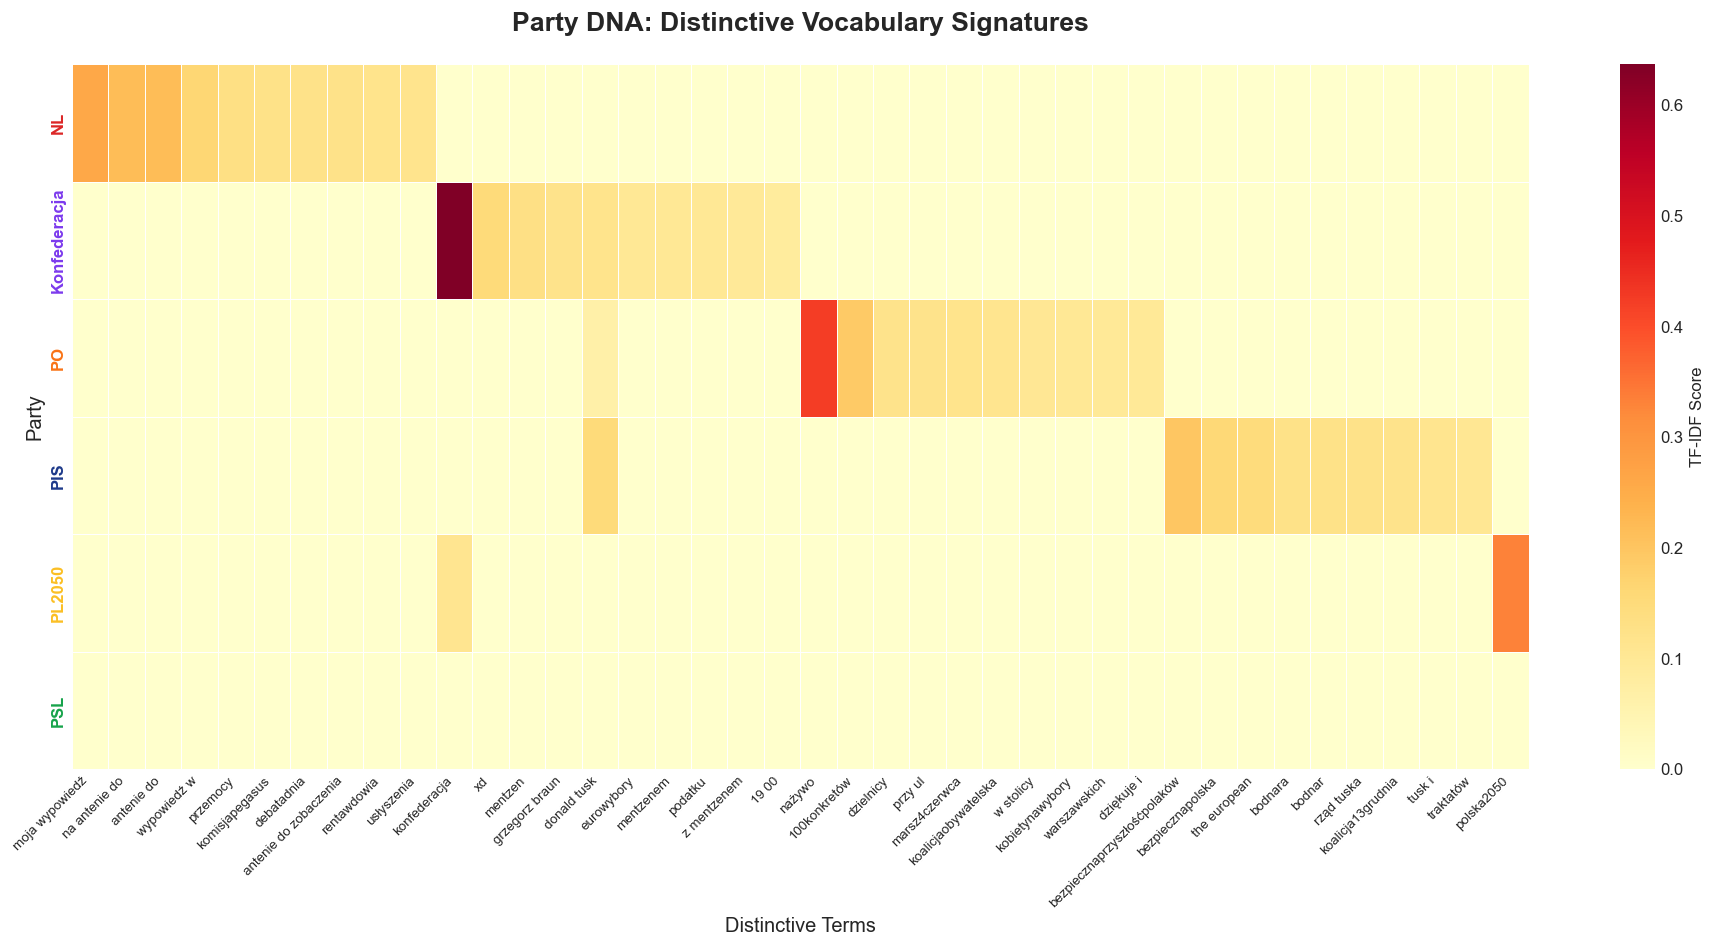

✅ Saved: 18_party_dna_heatmap.png

📊 Creating Figure 19: Party Word Clouds...


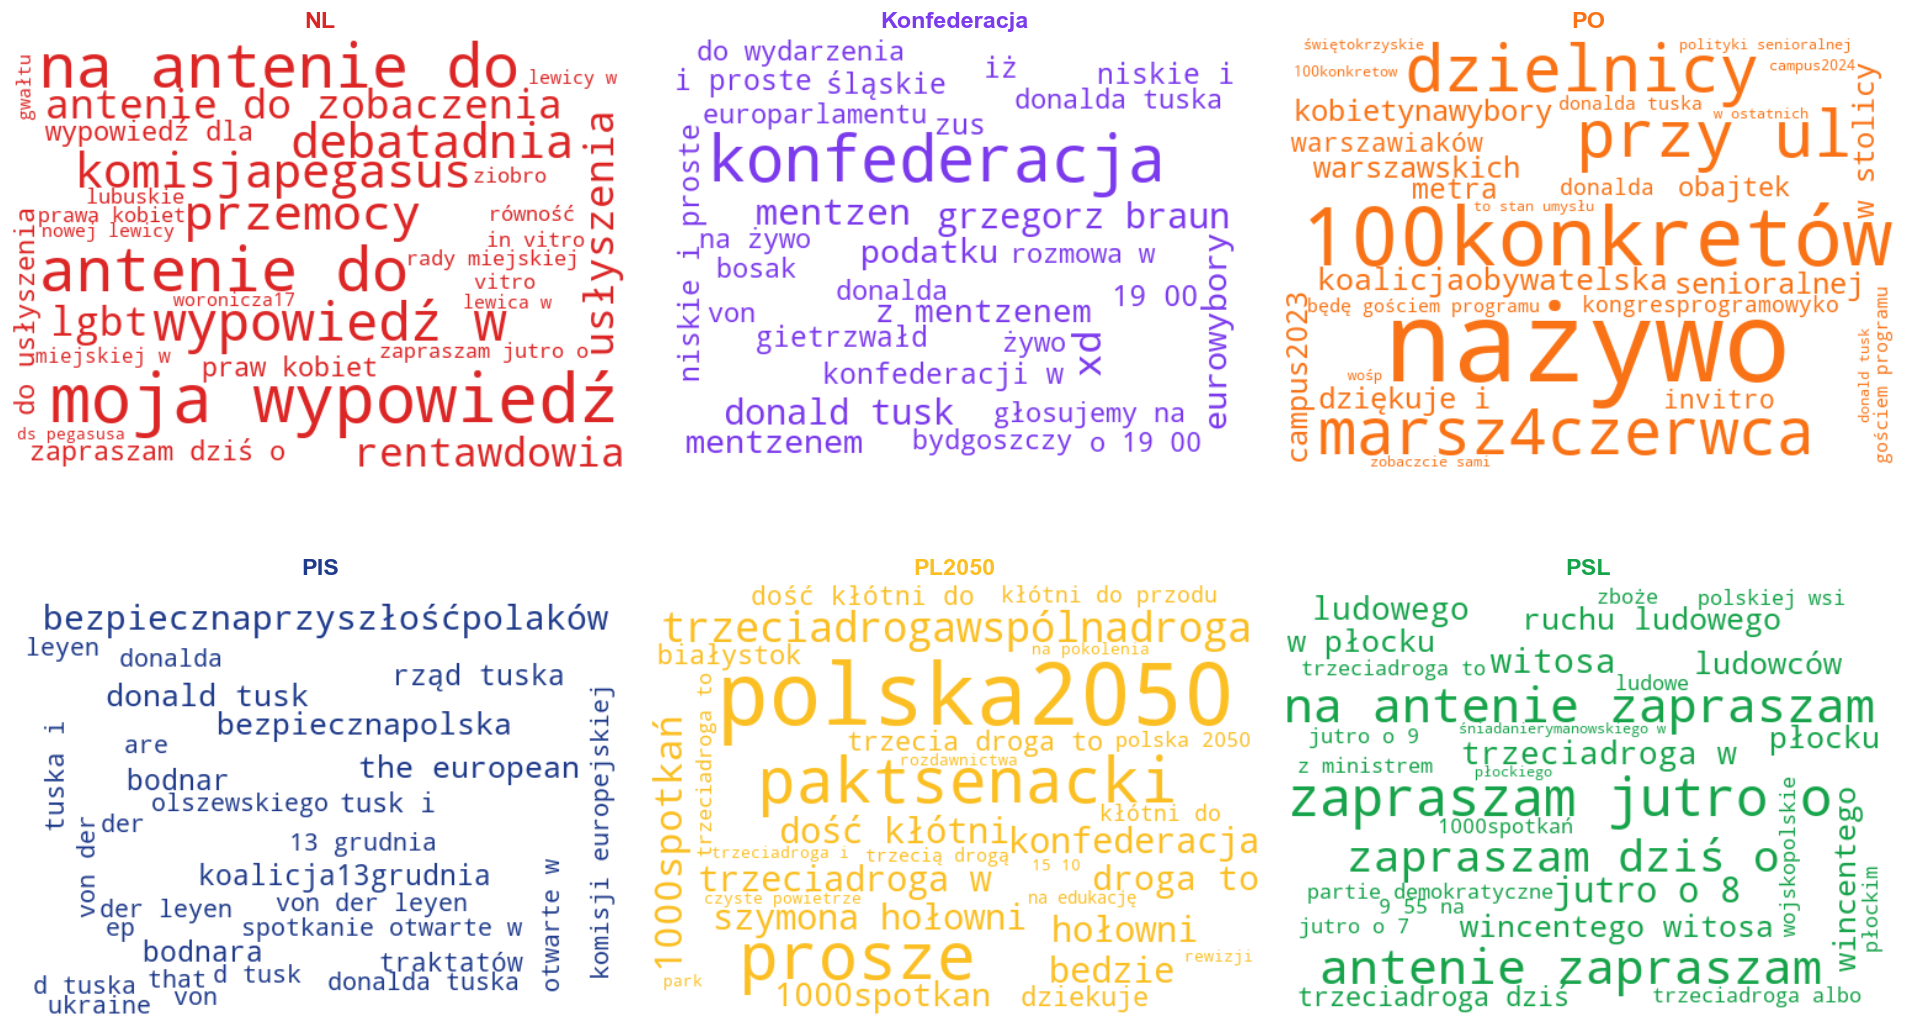

✅ Saved: 19_party_wordclouds.png

📊 Creating Figure 20: Party Similarity Heatmap...


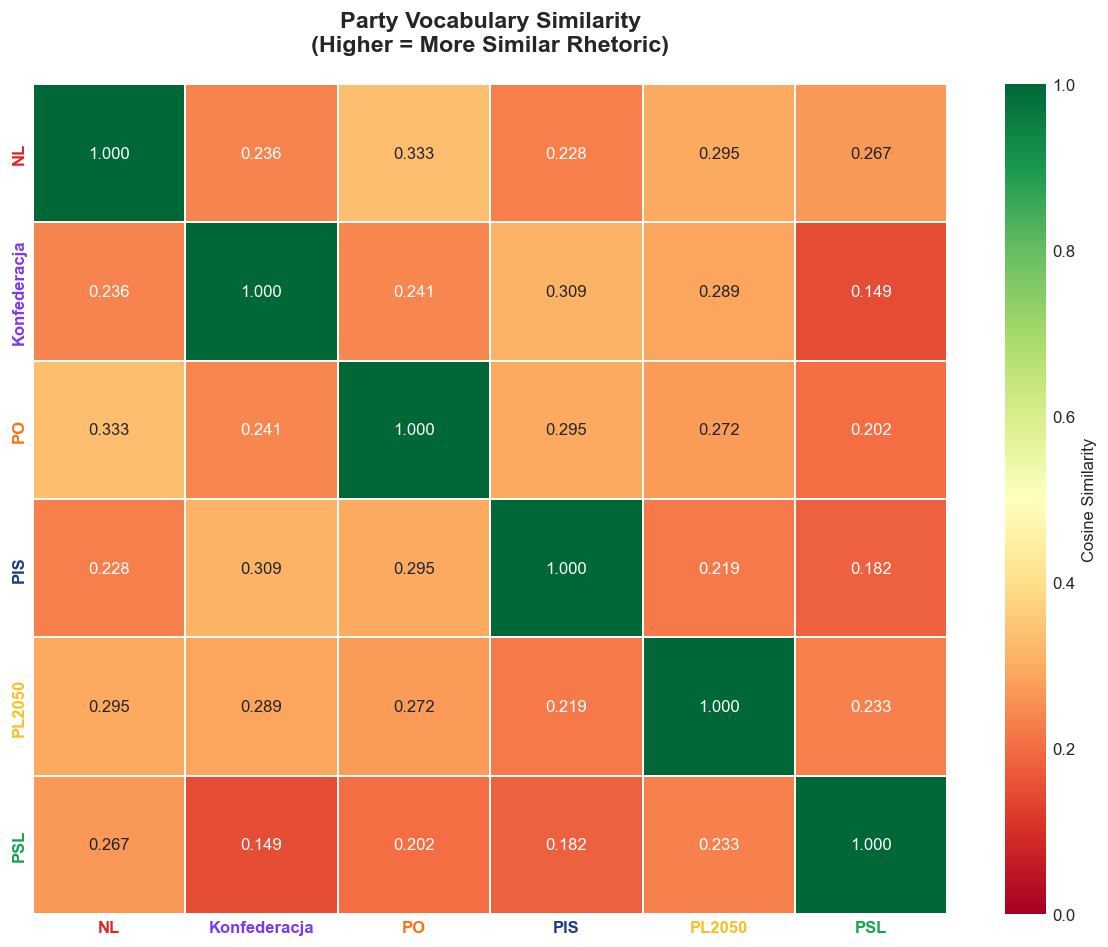

✅ Saved: 20_party_similarity.png

📊 Creating Figure 21: Party PCA Positioning...


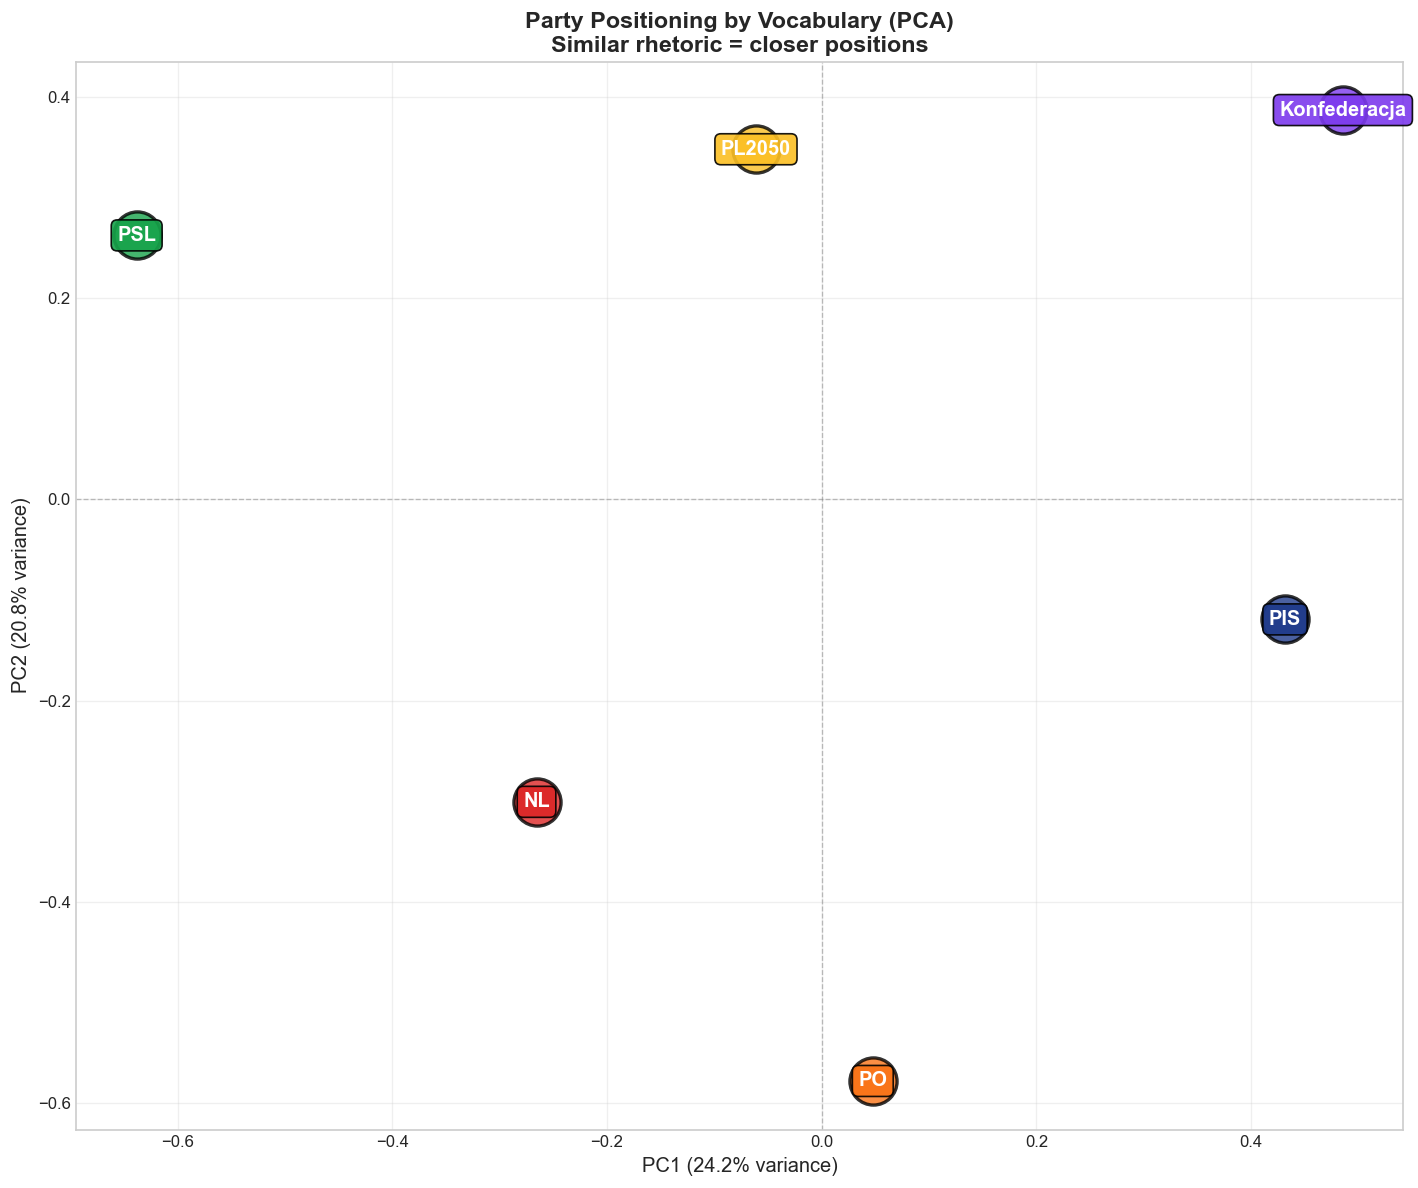

✅ Saved: 21_party_pca.png


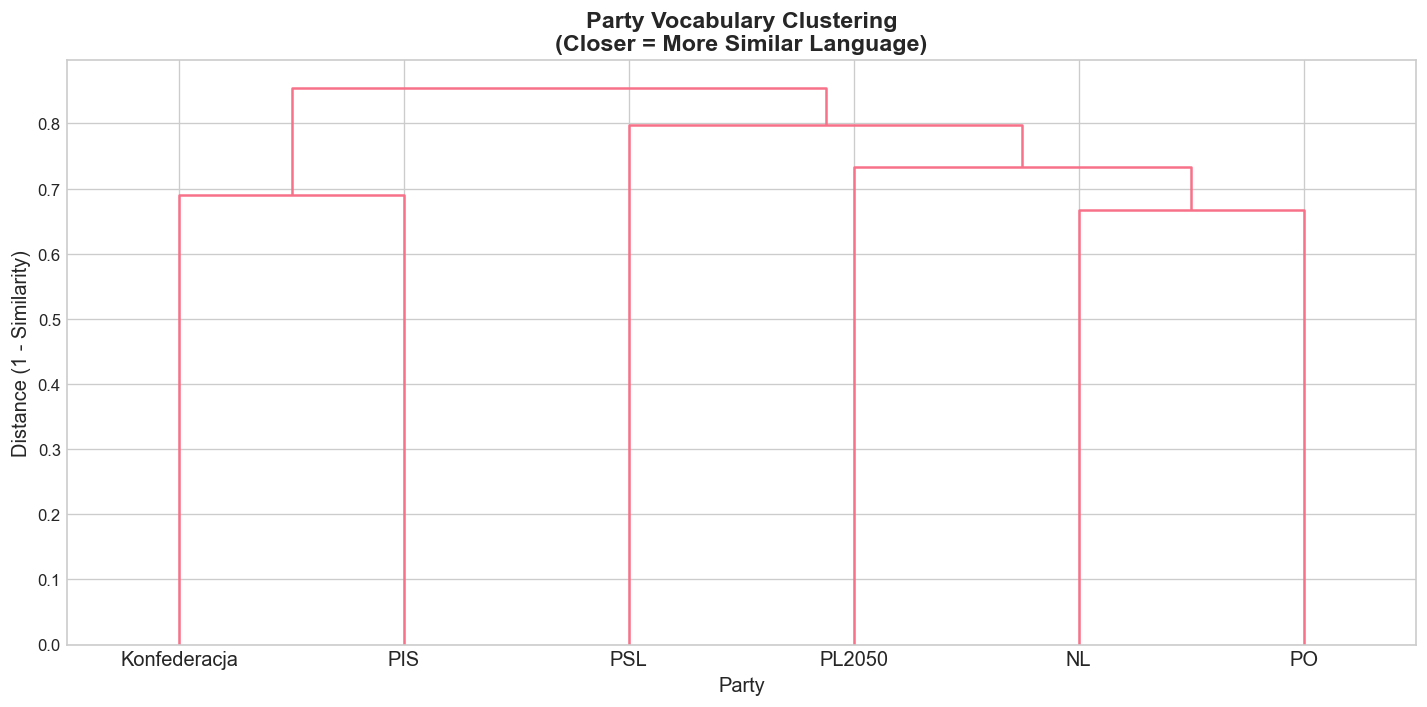


📊 Creating Figure 23: Vocabulary Distinctiveness...


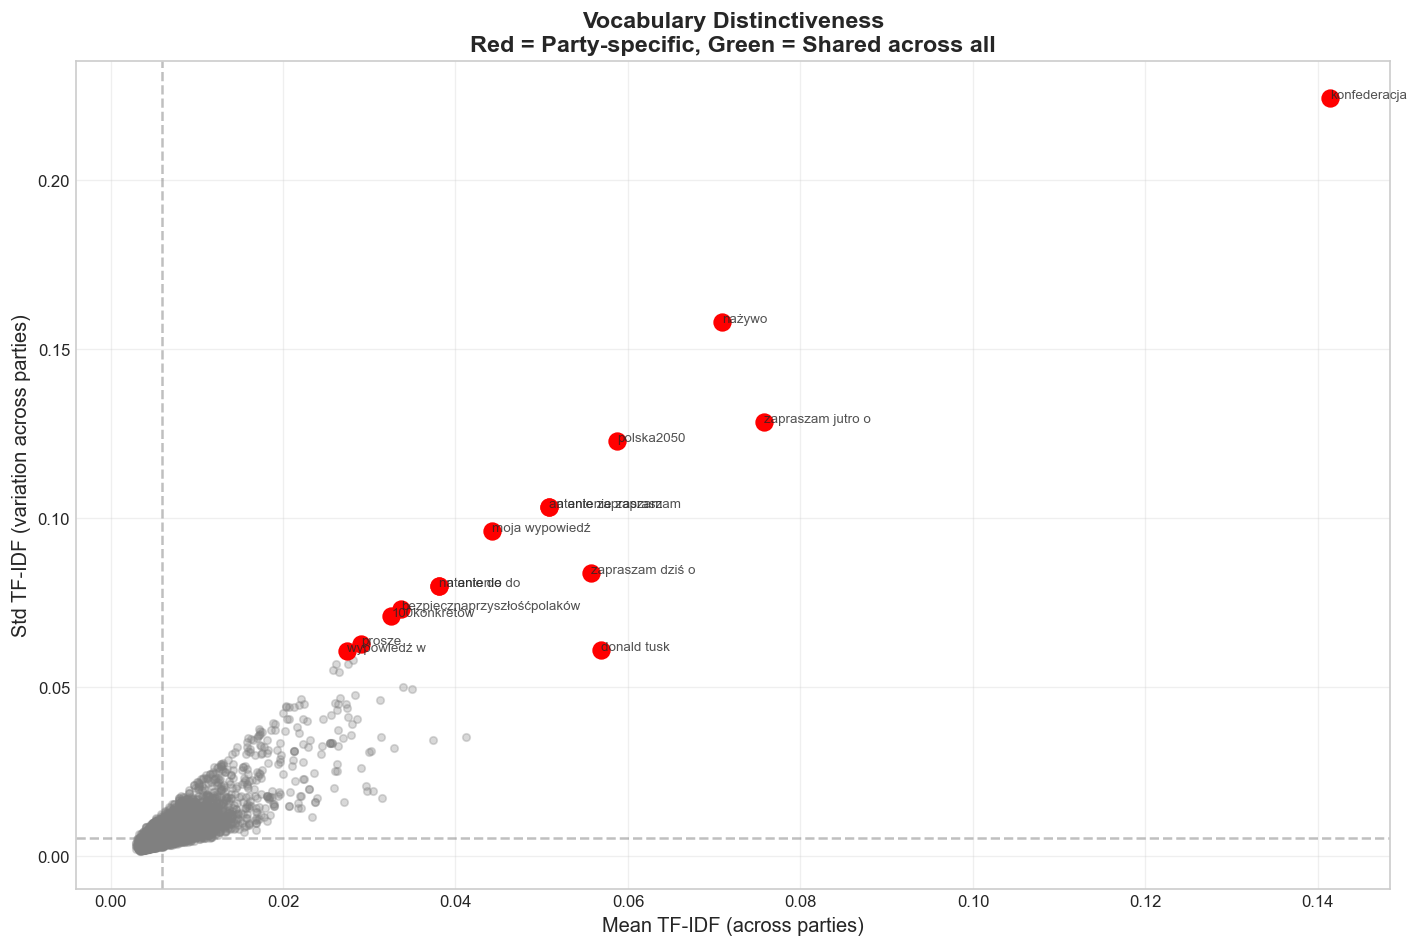

✅ Saved: 23_vocabulary_distinctiveness.png

📊 Creating Figure 24: Corpus Statistics...


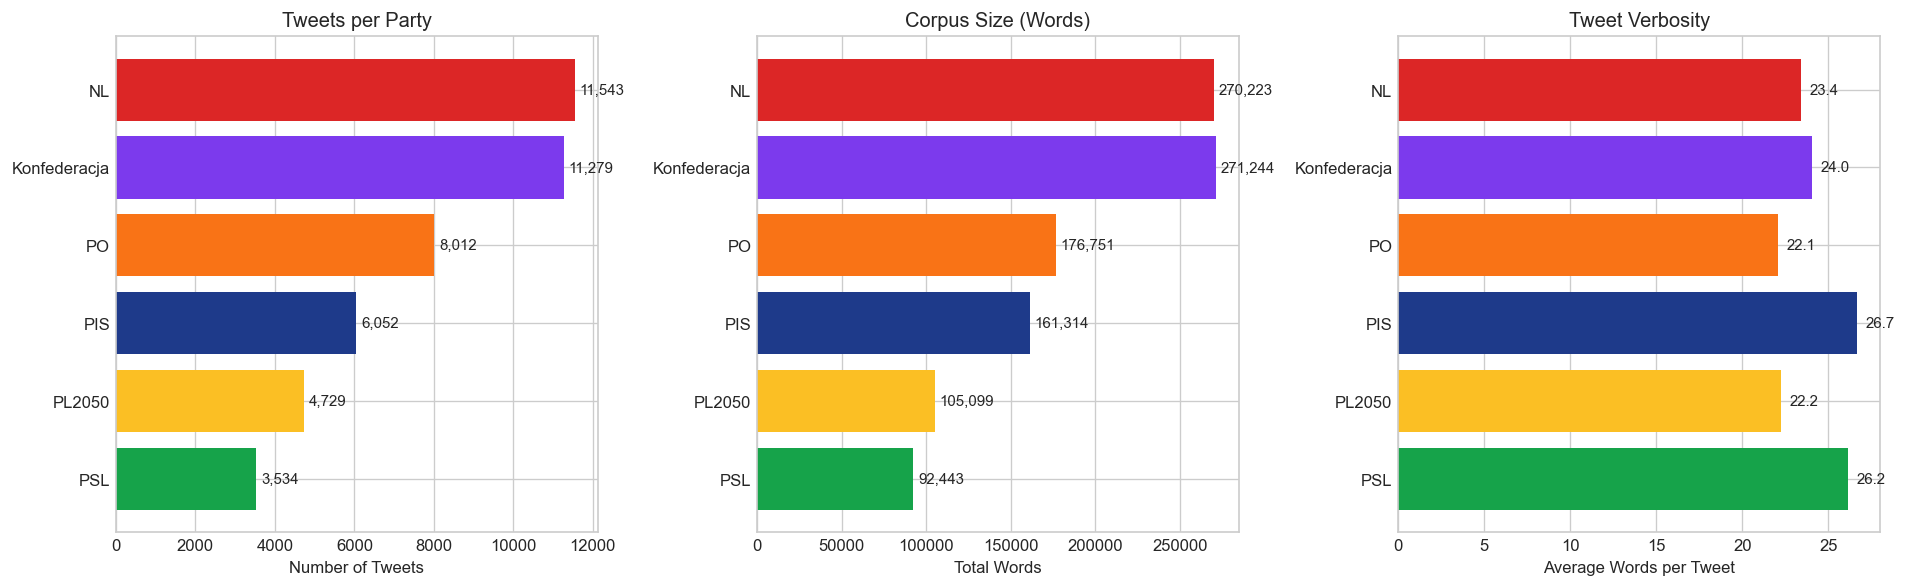

✅ Saved: 24_corpus_statistics.png

11. SAVING TABLES
✅ Saved: party_signatures_20260111_120014.csv
✅ Saved: party_similarity_20260111_120014.csv
✅ Saved: party_similarity_pairs_20260111_120014.csv
✅ Saved: party_pca_20260111_120014.csv
✅ Saved: distinctive_terms_20260111_120014.csv
✅ Saved: corpus_statistics_20260111_120014.csv
✅ Saved: suggested_stopwords_20260111_120014.csv

12. TOPIC MODELING PREPARATION SUMMARY

TOPIC MODELING PREPARATION GUIDE

Based on TF-IDF DNA analysis, here are recommendations for topic modeling:

CORPUS STATISTICS
-----------------
Total documents: 45,149
Total vocabulary: 30 unique words
Average document length: 23.9 words

RECOMMENDED PREPROCESSING
-------------------------
1. Remove suggested stopwords (saved to suggested_stopwords_20260111_120014.csv)
2. Use lemmatization (Polish spaCy model: pl_core_news_lg)
3. Keep nouns, verbs, adjectives (filter by POS tags)
4. Minimum document frequency: 10-20 documents
5. Maximum document frequency: 70-80% of corpu

In [12]:
# =============================================================================
# 03_TFIDF_DNA_ANALYSIS - Party-Level Distinctive Vocabulary
# Polish Politicians Twitter - Topic Modeling Project
# =============================================================================
#
# This script performs:
# - Document pooling (party corpora)
# - TF-IDF analysis for distinctive vocabulary
# - Party signatures extraction
# - Party similarity analysis
# - PCA positioning
# - Word clouds
# - Temporal vocabulary shifts (Before/After election)
# - Preparation for topic modeling (vocabulary analysis)
#
# Input: Uses data from 01_EDA_COMPLETE output
# Output: Saves to results_topic_modelling/ folder structure
#
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA, TruncatedSVD
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import warnings
import time
import os
import glob

warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION
# =============================================================================

start_time = time.time()
timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

# Plotting settings - ENABLE INTERACTIVE DISPLAY IN VS CODE
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

# For VS Code interactive display
# %matplotlib inline  # Uncomment if using Jupyter/IPython
plt.ion()  # Interactive mode ON - shows plots immediately

# Party colors
PARTY_COLORS = {
    'PIS': '#1E3A8A',           # Navy Blue
    'PO': '#F97316',            # Orange
    'NL': '#DC2626',            # Red (Nowa Lewica)
    'PSL': '#16A34A',           # Green
    'Konfederacja': '#7C3AED',  # Purple
    'PL2050': '#FBBF24',        # Yellow
}

def get_party_color(party):
    return PARTY_COLORS.get(party, '#6B7280')

# Political events
POLITICAL_EVENTS = {
    'parliamentary_election': pd.Timestamp("2023-10-15"),
    'eu_parliament_election': pd.Timestamp("2024-06-09"),
    'coalition_formed': pd.Timestamp("2023-12-13"),
}

# =============================================================================
# FOLDER STRUCTURE
# =============================================================================

print("="*70)
print("TF-IDF DNA ANALYSIS: PARTY-LEVEL DISTINCTIVE VOCABULARY")
print("="*70)

# Base output directory
BASE_DIR = '../results_topic_modelling'

# Subdirectories
DIRS = {
    'data': os.path.join(BASE_DIR, 'data'),
    'figures': os.path.join(BASE_DIR, 'figures'),
    'tables': os.path.join(BASE_DIR, 'tables'),
    'reports': os.path.join(BASE_DIR, 'reports'),
}

for name, path in DIRS.items():
    os.makedirs(path, exist_ok=True)

print(f"📁 Output directory: {BASE_DIR}")

# =============================================================================
# 1. LOAD DATA
# =============================================================================

print("\n" + "="*70)
print("1. LOADING DATA")
print("="*70)

# Try to load from EDA output
DATA_PATHS = [
    os.path.join(DIRS['data'], 'df_tm_ready_*.parquet'),  # Topic modeling ready
    os.path.join(DIRS['data'], 'df_full_*.parquet'),      # Full data
    '../data/03.cleaned/df_combined.parquet',
]

df_twitter = None
data_source = None

for path in DATA_PATHS:
    try:
        if '*' in path:
            files = glob.glob(path)
            if files:
                latest = max(files, key=os.path.getctime)
                df_twitter = pd.read_parquet(latest)
                data_source = latest
                break
        else:
            if os.path.exists(path):
                df_twitter = pd.read_parquet(path)
                data_source = path
                break
    except Exception as e:
        continue

if df_twitter is None:
    raise FileNotFoundError("No data file found. Run 01_EDA_COMPLETE.py first.")

print(f"📂 Data loaded from: {data_source}")
print(f"✅ Data shape: {df_twitter.shape[0]:,} tweets, {df_twitter.shape[1]} columns")

# =============================================================================
# 2. DATA PREPARATION
# =============================================================================

print("\n" + "="*70)
print("2. DATA PREPARATION")
print("="*70)

# Ensure datetime
df_twitter['created_at'] = pd.to_datetime(df_twitter['created_at'])
if df_twitter['created_at'].dt.tz is not None:
    df_twitter['created_at'] = df_twitter['created_at'].dt.tz_localize(None)

# Ensure period exists
if 'period_parliamentary' not in df_twitter.columns:
    df_twitter['period_parliamentary'] = df_twitter['created_at'].apply(
        lambda x: 'Before Election' if x < POLITICAL_EVENTS['parliamentary_election'] 
        else 'After Election'
    )

# Ensure text_clean exists
if 'text_clean' not in df_twitter.columns:
    if 'text' in df_twitter.columns:
        df_twitter['text_clean'] = df_twitter['text'].fillna('')
    else:
        raise KeyError("No text column found")

# Filter empty texts
df_twitter = df_twitter[df_twitter['text_clean'].str.len() > 0].copy()

print(f"   Tweets for analysis: {len(df_twitter):,}")
print(f"   Parties: {', '.join(sorted(df_twitter['party'].unique()))}")
print(f"   Date range: {df_twitter['created_at'].min().date()} to {df_twitter['created_at'].max().date()}")

# Get main parties
party_counts = df_twitter['party'].value_counts()
main_parties = party_counts[party_counts >= 100].index.tolist()
print(f"\n   Main parties (≥100 tweets): {main_parties}")

# =============================================================================
# 3. DOCUMENT POOLING: CREATE PARTY CORPORA
# =============================================================================

print("\n" + "="*70)
print("3. DOCUMENT POOLING")
print("="*70)

def create_party_corpus(df, party, text_col='text_clean'):
    """Pool all tweets from a party into single mega-document"""
    party_tweets = df[df['party'] == party][text_col].fillna('')
    combined_text = ' '.join(party_tweets)
    return combined_text

# Create pooled corpora
party_corpora = {}
corpus_stats = []

print(f"\n📚 Creating party corpora:")
for party in main_parties:
    corpus = create_party_corpus(df_twitter, party)
    party_corpora[party] = corpus
    
    word_count = len(corpus.split())
    char_count = len(corpus)
    tweet_count = len(df_twitter[df_twitter['party'] == party])
    
    corpus_stats.append({
        'party': party,
        'tweets': tweet_count,
        'words': word_count,
        'characters': char_count,
        'avg_words_per_tweet': word_count / tweet_count if tweet_count > 0 else 0
    })
    
    print(f"   {party:15s}: {tweet_count:6,} tweets → {word_count:8,} words")

df_corpus_stats = pd.DataFrame(corpus_stats)
print(f"\n✅ Created {len(party_corpora)} party corpora")

# =============================================================================
# 4. TF-IDF CALCULATION
# =============================================================================

print("\n" + "="*70)
print("4. TF-IDF CALCULATION")
print("="*70)

# Prepare corpus
corpus_list = [party_corpora[p] for p in main_parties]
party_names = main_parties

# TF-IDF Vectorizer with Polish-friendly settings
vectorizer = TfidfVectorizer(
    max_df=0.95,           # Remove words in >95% of parties
    min_df=2,              # Word must appear in at least 2 parties
    max_features=5000,     # Top 5000 terms
    ngram_range=(1, 3),    # Unigrams, bigrams, trigrams
    strip_accents=None,    # Keep Polish diacritics
    lowercase=True,
    token_pattern=r'(?u)\b\w[\w-]*\w\b|\b\w\b'  # Include short words
)

# Fit TF-IDF
tfidf_matrix = vectorizer.fit_transform(corpus_list)
feature_names = vectorizer.get_feature_names_out()

# Convert to dense for easier manipulation (small matrix, ~6 parties)
dense_tfidf = tfidf_matrix.toarray()

print(f"\n✅ TF-IDF Matrix: {dense_tfidf.shape[0]} parties × {dense_tfidf.shape[1]} terms")
print(f"   Vocabulary size: {len(feature_names):,}")
print(f"   Sparsity: {(dense_tfidf == 0).sum() / dense_tfidf.size * 100:.1f}%")

# =============================================================================
# 5. EXTRACT PARTY SIGNATURES
# =============================================================================

print("\n" + "="*70)
print("5. EXTRACTING PARTY SIGNATURES")
print("="*70)

def get_party_signature(dense_matrix, feature_names, party_idx, top_n=30):
    """Extract top distinctive terms for a party"""
    scores = dense_matrix[party_idx]
    top_indices = scores.argsort()[-top_n:][::-1]
    
    signature = []
    for idx in top_indices:
        signature.append({
            'term': feature_names[idx],
            'score': scores[idx]
        })
    return signature

# Extract signatures
party_signatures = {}

print("\n🏛️  PARTY DISTINCTIVE VOCABULARY (Top 15):\n")
for idx, party in enumerate(party_names):
    signature = get_party_signature(dense_tfidf, feature_names, idx, top_n=30)
    party_signatures[party] = signature
    
    print(f"{'='*60}")
    print(f"  {party}")
    print(f"{'='*60}")
    for i, term_data in enumerate(signature[:15], 1):
        print(f"  {i:2d}. {term_data['term']:30s} {term_data['score']:.4f}")
    print()

# =============================================================================
# 6. PARTY SIMILARITY ANALYSIS
# =============================================================================

print("\n" + "="*70)
print("6. PARTY SIMILARITY ANALYSIS")
print("="*70)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(dense_tfidf)

df_similarity = pd.DataFrame(
    similarity_matrix,
    index=party_names,
    columns=party_names
)

print("\n📊 Party Vocabulary Similarity Matrix:")
print(df_similarity.round(3).to_string())

# Extract pairs
similarity_pairs = []
for i in range(len(party_names)):
    for j in range(i+1, len(party_names)):
        similarity_pairs.append({
            'party1': party_names[i],
            'party2': party_names[j],
            'similarity': similarity_matrix[i, j]
        })

df_pairs = pd.DataFrame(similarity_pairs).sort_values('similarity', ascending=False)

print("\n🔗 Most Similar Party Pairs:")
print(df_pairs.head(5).to_string(index=False))

print("\n🔀 Most Different Party Pairs:")
print(df_pairs.tail(5).to_string(index=False))

# =============================================================================
# 7. DISTINCTIVE VS COMMON VOCABULARY (FIXED)
# =============================================================================

print("\n" + "="*70)
print("7. DISTINCTIVE VS COMMON VOCABULARY")
print("="*70)

# Calculate mean and std on dense array
mean_tfidf = dense_tfidf.mean(axis=0)
std_tfidf = dense_tfidf.std(axis=0)

# Distinctive terms: high in ONE party, low in others (high std)
distinctive_indices = std_tfidf.argsort()[-30:][::-1]

print("\n🎯 Most Distinctive Terms (unique to specific parties):")
distinctive_terms = []
for idx in distinctive_indices[:20]:
    term = feature_names[idx]
    std = std_tfidf[idx]
    party_idx = dense_tfidf[:, idx].argmax()
    party = party_names[party_idx]
    score = dense_tfidf[party_idx, idx]
    
    distinctive_terms.append({
        'term': term,
        'party': party,
        'score': score,
        'std': std
    })
    print(f"   {term:30s} → {party:15s} (score: {score:.4f}, std: {std:.4f})")

df_distinctive = pd.DataFrame(distinctive_terms)

# Common terms: used by ALL parties (low std, high mean)
# Adjust thresholds based on data
mean_threshold = np.percentile(mean_tfidf[mean_tfidf > 0], 75)
std_threshold = np.percentile(std_tfidf[std_tfidf > 0], 25)

common_indices = np.where((mean_tfidf > mean_threshold) & (std_tfidf < std_threshold))[0]

print(f"\n📢 Common Terms (used similarly by all parties):")
if len(common_indices) > 0:
    common_terms = []
    for idx in common_indices[:20]:
        term = feature_names[idx]
        mean_score = mean_tfidf[idx]
        std_score = std_tfidf[idx]
        common_terms.append({'term': term, 'mean': mean_score, 'std': std_score})
        print(f"   {term:30s} (mean: {mean_score:.4f}, std: {std_score:.4f})")
    df_common = pd.DataFrame(common_terms)
else:
    print("   No universally common terms found (all vocabulary is somewhat distinctive)")
    df_common = pd.DataFrame()

# =============================================================================
# 8. TEMPORAL ANALYSIS: BEFORE VS AFTER ELECTION
# =============================================================================

print("\n" + "="*70)
print("8. TEMPORAL VOCABULARY SHIFTS")
print("="*70)

# Create corpora by period
period_corpora = {}
for period in ['Before Election', 'After Election']:
    period_corpus = {}
    for party in main_parties:
        party_period = df_twitter[(df_twitter['party'] == party) & 
                                   (df_twitter['period_parliamentary'] == period)]
        period_corpus[party] = ' '.join(party_period['text_clean'].fillna(''))
    period_corpora[period] = period_corpus

# TF-IDF for each period
period_signatures = {}

for period in ['Before Election', 'After Election']:
    corpus_list_period = [period_corpora[period][p] for p in main_parties]
    
    # Skip if empty
    if all(len(c) == 0 for c in corpus_list_period):
        continue
    
    vectorizer_period = TfidfVectorizer(
        max_df=0.95, min_df=1, max_features=3000,
        ngram_range=(1, 2), strip_accents=None
    )
    
    try:
        tfidf_period = vectorizer_period.fit_transform(corpus_list_period)
        features_period = vectorizer_period.get_feature_names_out()
        
        period_signatures[period] = {
            'matrix': tfidf_period.toarray(),
            'features': features_period,
            'parties': main_parties
        }
    except:
        continue

# Compare vocabulary shifts
if len(period_signatures) == 2:
    print("\n📈 Vocabulary Shift Analysis:")
    
    for idx, party in enumerate(main_parties):
        print(f"\n{party}:")
        
        # Get top terms before and after
        before_data = period_signatures['Before Election']
        after_data = period_signatures['After Election']
        
        before_scores = before_data['matrix'][idx]
        after_scores = after_data['matrix'][idx]
        
        before_top = set(before_data['features'][before_scores.argsort()[-10:]])
        after_top = set(after_data['features'][after_scores.argsort()[-10:]])
        
        new_terms = after_top - before_top
        dropped_terms = before_top - after_top
        
        if new_terms:
            print(f"   📈 New focus: {', '.join(list(new_terms)[:5])}")
        if dropped_terms:
            print(f"   📉 Reduced focus: {', '.join(list(dropped_terms)[:5])}")

# =============================================================================
# 9. VOCABULARY STATISTICS FOR TOPIC MODELING
# =============================================================================

print("\n" + "="*70)
print("9. VOCABULARY STATISTICS (Topic Modeling Preparation)")
print("="*70)

# Overall vocabulary analysis
all_texts = ' '.join(df_twitter['text_clean'].fillna(''))
words = all_texts.lower().split()
word_freq = pd.Series(words).value_counts()

print(f"\n📊 Corpus Statistics:")
print(f"   Total words: {len(words):,}")
print(f"   Unique words: {len(word_freq):,}")
print(f"   Vocabulary richness: {len(word_freq)/len(words)*100:.2f}%")

print(f"\n🔤 Top 20 Most Frequent Words:")
for i, (word, count) in enumerate(word_freq.head(20).items(), 1):
    print(f"   {i:2d}. {word:20s} {count:,}")

# Document frequency analysis
count_vec = CountVectorizer(max_features=10000, min_df=5)
count_matrix = count_vec.fit_transform(df_twitter['text_clean'].fillna(''))
doc_freq = (count_matrix > 0).sum(axis=0).A1
feature_names_count = count_vec.get_feature_names_out()

# Words appearing in many documents (potential stopwords)
high_df_indices = doc_freq.argsort()[-30:][::-1]
print(f"\n⚠️ High Document Frequency Terms (consider for stopwords):")
for idx in high_df_indices[:15]:
    term = feature_names_count[idx]
    df_val = doc_freq[idx]
    pct = df_val / len(df_twitter) * 100
    print(f"   {term:20s} appears in {df_val:,} docs ({pct:.1f}%)")

# Suggested stopwords for topic modeling
suggested_stopwords = [feature_names_count[i] for i in high_df_indices[:20]]
print(f"\n💡 Suggested additional stopwords for topic modeling:")
print(f"   {suggested_stopwords}")

# =============================================================================
# 10. VISUALIZATIONS
# =============================================================================

print("\n" + "="*70)
print("10. GENERATING VISUALIZATIONS")
print("="*70)

# -----------------------------------------------------------------------------
# FIGURE 18: Party DNA Heatmap
# -----------------------------------------------------------------------------

print("\n📊 Creating Figure 18: Party DNA Heatmap...")

# Get top terms per party
n_terms = 10
all_top_terms = []
for party in party_names:
    signature = party_signatures[party]
    top_terms = [t['term'] for t in signature[:n_terms]]
    all_top_terms.extend(top_terms)

# Unique terms (preserving order)
seen = set()
unique_terms = []
for term in all_top_terms:
    if term not in seen:
        seen.add(term)
        unique_terms.append(term)
unique_terms = unique_terms[:40]  # Limit for readability

# Build matrix
party_term_matrix = []
for party in party_names:
    signature_dict = {t['term']: t['score'] for t in party_signatures[party]}
    row = [signature_dict.get(term, 0) for term in unique_terms]
    party_term_matrix.append(row)
party_term_matrix = np.array(party_term_matrix)

fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(party_term_matrix, 
           xticklabels=unique_terms,
           yticklabels=party_names,
           cmap='YlOrRd',
           annot=False,
           cbar_kws={'label': 'TF-IDF Score'},
           linewidths=0.5)

ax.set_title('Party DNA: Distinctive Vocabulary Signatures', 
            fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Distinctive Terms', fontsize=12)
ax.set_ylabel('Party', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Color party labels
for i, party in enumerate(party_names):
    ax.get_yticklabels()[i].set_color(get_party_color(party))
    ax.get_yticklabels()[i].set_fontweight('bold')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '18_party_dna_heatmap.png'), dpi=150, bbox_inches='tight')
plt.show()  # Display in VS Code
print("✅ Saved: 18_party_dna_heatmap.png")

# -----------------------------------------------------------------------------
# FIGURE 19: Party Word Clouds
# -----------------------------------------------------------------------------

print("\n📊 Creating Figure 19: Party Word Clouds...")

try:
    from wordcloud import WordCloud
    
    n_parties = len(party_names)
    n_cols = 3
    n_rows = (n_parties + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    axes = axes.flatten() if n_parties > 1 else [axes]
    
    for idx, party in enumerate(party_names):
        signature = party_signatures[party]
        word_freq = {t['term']: t['score'] for t in signature[:50]}
        
        color = get_party_color(party)
        
        wc = WordCloud(
            width=500, height=350,
            background_color='white',
            color_func=lambda *args, **kwargs: color,
            relative_scaling=0.5,
            min_font_size=10,
            max_words=40
        ).generate_from_frequencies(word_freq)
        
        axes[idx].imshow(wc, interpolation='bilinear')
        axes[idx].set_title(party, fontsize=14, fontweight='bold', color=color)
        axes[idx].axis('off')
    
    # Hide unused subplots
    for idx in range(len(party_names), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(DIRS['figures'], '19_party_wordclouds.png'), dpi=150, bbox_inches='tight')
    plt.show()
    print("✅ Saved: 19_party_wordclouds.png")
    
except ImportError:
    print("⚠️ WordCloud not installed. Run: pip install wordcloud")

# -----------------------------------------------------------------------------
# FIGURE 20: Party Similarity Heatmap
# -----------------------------------------------------------------------------

print("\n📊 Creating Figure 20: Party Similarity Heatmap...")

fig, ax = plt.subplots(figsize=(10, 8))

# Mask for upper triangle (optional - to avoid redundancy)
mask = np.triu(np.ones_like(similarity_matrix, dtype=bool), k=1)

sns.heatmap(df_similarity, annot=True, fmt='.3f', cmap='RdYlGn',
           center=0.5, vmin=0, vmax=1,
           cbar_kws={'label': 'Cosine Similarity'},
           linewidths=1, ax=ax)

ax.set_title('Party Vocabulary Similarity\n(Higher = More Similar Rhetoric)', 
            fontsize=14, fontweight='bold', pad=20)

# Color labels
for i, party in enumerate(party_names):
    ax.get_xticklabels()[i].set_color(get_party_color(party))
    ax.get_xticklabels()[i].set_fontweight('bold')
    ax.get_yticklabels()[i].set_color(get_party_color(party))
    ax.get_yticklabels()[i].set_fontweight('bold')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '20_party_similarity.png'), dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 20_party_similarity.png")

# -----------------------------------------------------------------------------
# FIGURE 21: Party Vocabulary Space (PCA)
# -----------------------------------------------------------------------------

print("\n📊 Creating Figure 21: Party PCA Positioning...")

pca = PCA(n_components=2, random_state=42)
party_coords = pca.fit_transform(dense_tfidf)

fig, ax = plt.subplots(figsize=(12, 10))

for idx, party in enumerate(party_names):
    x, y = party_coords[idx]
    color = get_party_color(party)
    
    # Plot point
    ax.scatter(x, y, s=800, c=color, alpha=0.8, edgecolors='black', linewidths=2, zorder=2)
    
    # Add label
    ax.annotate(party, (x, y), fontsize=12, fontweight='bold', 
               ha='center', va='center', color='white',
               bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.9))

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
ax.set_title('Party Positioning by Vocabulary (PCA)\nSimilar rhetoric = closer positions', 
            fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '21_party_pca.png'), dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 21_party_pca.png")

# -----------------------------------------------------------------------------
# FIGURE 22: Hierarchical Clustering Dendrogram
# -----------------------------------------------------------------------------

# Convert similarity to distance
distance_matrix = 1 - similarity_matrix

# --- FIX START ---
# 1. Force diagonal to zero to fix floating point precision errors (e.g., 1e-16)
np.fill_diagonal(distance_matrix, 0)

# 2. Clip negative values (in case similarity was 1.0000000001 due to precision)
distance_matrix = np.clip(distance_matrix, a_min=0, a_max=None)
# --- FIX END ---

# Hierarchical clustering
# Now squareform will accept the matrix because the diagonal is strictly 0.0
linkage_matrix = linkage(squareform(distance_matrix), method='ward')

fig, ax = plt.subplots(figsize=(12, 6))

dendrogram(linkage_matrix, labels=party_names, ax=ax,
           leaf_rotation=0, leaf_font_size=12,
           color_threshold=0.5)

ax.set_title('Party Vocabulary Clustering\n(Closer = More Similar Language)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Party', fontsize=12)
ax.set_ylabel('Distance (1 - Similarity)', fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '22_party_dendrogram.png'), dpi=150, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# FIGURE 23: Distinctive vs Common Vocabulary Scatter
# -----------------------------------------------------------------------------

print("\n📊 Creating Figure 23: Vocabulary Distinctiveness...")

fig, ax = plt.subplots(figsize=(12, 8))

# Plot all terms
ax.scatter(mean_tfidf, std_tfidf, alpha=0.3, s=20, c='gray', label='All terms')

# Highlight distinctive terms
for idx in distinctive_indices[:15]:
    ax.scatter(mean_tfidf[idx], std_tfidf[idx], s=100, c='red', zorder=3)
    ax.annotate(feature_names[idx], (mean_tfidf[idx], std_tfidf[idx]),
               fontsize=8, alpha=0.8)

# Highlight common terms
if len(common_indices) > 0:
    for idx in common_indices[:10]:
        ax.scatter(mean_tfidf[idx], std_tfidf[idx], s=100, c='green', zorder=3)
        ax.annotate(feature_names[idx], (mean_tfidf[idx], std_tfidf[idx]),
                   fontsize=8, alpha=0.8)

ax.set_xlabel('Mean TF-IDF (across parties)', fontsize=12)
ax.set_ylabel('Std TF-IDF (variation across parties)', fontsize=12)
ax.set_title('Vocabulary Distinctiveness\nRed = Party-specific, Green = Shared across all', 
            fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

# Add quadrant labels
ax.axhline(y=np.median(std_tfidf), color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=np.median(mean_tfidf), color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '23_vocabulary_distinctiveness.png'), dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 23_vocabulary_distinctiveness.png")

# -----------------------------------------------------------------------------
# FIGURE 24: Corpus Statistics by Party
# -----------------------------------------------------------------------------

print("\n📊 Creating Figure 24: Corpus Statistics...")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Sort by tweets
df_corpus_stats_sorted = df_corpus_stats.sort_values('tweets', ascending=True)
colors = [get_party_color(p) for p in df_corpus_stats_sorted['party']]

# 24.1 Tweets per party
axes[0].barh(df_corpus_stats_sorted['party'], df_corpus_stats_sorted['tweets'], color=colors)
axes[0].set_xlabel('Number of Tweets')
axes[0].set_title('Tweets per Party')
for i, v in enumerate(df_corpus_stats_sorted['tweets']):
    axes[0].text(v + max(df_corpus_stats_sorted['tweets'])*0.01, i, f'{v:,}', va='center', fontsize=9)

# 24.2 Words per party
axes[1].barh(df_corpus_stats_sorted['party'], df_corpus_stats_sorted['words'], color=colors)
axes[1].set_xlabel('Total Words')
axes[1].set_title('Corpus Size (Words)')
for i, v in enumerate(df_corpus_stats_sorted['words']):
    axes[1].text(v + max(df_corpus_stats_sorted['words'])*0.01, i, f'{v:,}', va='center', fontsize=9)

# 24.3 Avg words per tweet
axes[2].barh(df_corpus_stats_sorted['party'], df_corpus_stats_sorted['avg_words_per_tweet'], color=colors)
axes[2].set_xlabel('Average Words per Tweet')
axes[2].set_title('Tweet Verbosity')
for i, v in enumerate(df_corpus_stats_sorted['avg_words_per_tweet']):
    axes[2].text(v + 0.5, i, f'{v:.1f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '24_corpus_statistics.png'), dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 24_corpus_statistics.png")

# =============================================================================
# 11. SAVE TABLES
# =============================================================================

print("\n" + "="*70)
print("11. SAVING TABLES")
print("="*70)

# Party signatures
signature_rows = []
for party, signature in party_signatures.items():
    for rank, term_data in enumerate(signature, 1):
        signature_rows.append({
            'party': party,
            'rank': rank,
            'term': term_data['term'],
            'tfidf_score': term_data['score']
        })
df_signatures = pd.DataFrame(signature_rows)
df_signatures.to_csv(os.path.join(DIRS['tables'], f'party_signatures_{timestamp}.csv'), index=False)
print(f"✅ Saved: party_signatures_{timestamp}.csv")

# Similarity matrix
df_similarity.to_csv(os.path.join(DIRS['tables'], f'party_similarity_{timestamp}.csv'))
print(f"✅ Saved: party_similarity_{timestamp}.csv")

# Similarity pairs
df_pairs.to_csv(os.path.join(DIRS['tables'], f'party_similarity_pairs_{timestamp}.csv'), index=False)
print(f"✅ Saved: party_similarity_pairs_{timestamp}.csv")

# PCA coordinates
df_pca = pd.DataFrame(party_coords, index=party_names, columns=['PC1', 'PC2'])
df_pca['explained_var_PC1'] = pca.explained_variance_ratio_[0]
df_pca['explained_var_PC2'] = pca.explained_variance_ratio_[1]
df_pca.to_csv(os.path.join(DIRS['tables'], f'party_pca_{timestamp}.csv'))
print(f"✅ Saved: party_pca_{timestamp}.csv")

# Distinctive terms
df_distinctive.to_csv(os.path.join(DIRS['tables'], f'distinctive_terms_{timestamp}.csv'), index=False)
print(f"✅ Saved: distinctive_terms_{timestamp}.csv")

# Corpus statistics
df_corpus_stats.to_csv(os.path.join(DIRS['tables'], f'corpus_statistics_{timestamp}.csv'), index=False)
print(f"✅ Saved: corpus_statistics_{timestamp}.csv")

# Suggested stopwords for topic modeling
stopwords_df = pd.DataFrame({'term': suggested_stopwords})
stopwords_df.to_csv(os.path.join(DIRS['tables'], f'suggested_stopwords_{timestamp}.csv'), index=False)
print(f"✅ Saved: suggested_stopwords_{timestamp}.csv")

# =============================================================================
# 12. TOPIC MODELING PREPARATION SUMMARY
# =============================================================================

print("\n" + "="*70)
print("12. TOPIC MODELING PREPARATION SUMMARY")
print("="*70)

tm_prep = f"""
================================================================================
TOPIC MODELING PREPARATION GUIDE
================================================================================

Based on TF-IDF DNA analysis, here are recommendations for topic modeling:

CORPUS STATISTICS
-----------------
Total documents: {len(df_twitter):,}
Total vocabulary: {len(word_freq):,} unique words
Average document length: {len(words)/len(df_twitter):.1f} words

RECOMMENDED PREPROCESSING
-------------------------
1. Remove suggested stopwords (saved to suggested_stopwords_{timestamp}.csv)
2. Use lemmatization (Polish spaCy model: pl_core_news_lg)
3. Keep nouns, verbs, adjectives (filter by POS tags)
4. Minimum document frequency: 10-20 documents
5. Maximum document frequency: 70-80% of corpus

RECOMMENDED PARAMETERS FOR TOPIC MODELING
-----------------------------------------
NMF (Non-negative Matrix Factorization):
   - K (topics): Try 12, 15, 18, 20
   - max_df: 0.55-0.70
   - min_df: 10
   - max_features: 3000-5000

LDA (Latent Dirichlet Allocation):
   - K (topics): Try 12, 15, 18, 20
   - alpha: 0.1 (sparse document-topic)
   - beta: 0.01 (sparse topic-word)
   - iterations: 500+

BERTopic:
   - Use Polish sentence transformer: sdadas/st-polish-paraphrase-from-distilroberta
   - min_topic_size: 50-100
   - nr_topics: "auto" or 15-25

PARTY-SPECIFIC INSIGHTS
-----------------------
Most similar parties: {df_pairs.iloc[0]['party1']} ↔ {df_pairs.iloc[0]['party2']} ({df_pairs.iloc[0]['similarity']:.3f})
Most different parties: {df_pairs.iloc[-1]['party1']} ↔ {df_pairs.iloc[-1]['party2']} ({df_pairs.iloc[-1]['similarity']:.3f})

This suggests that topic modeling should reveal:
- Shared topics across similar parties
- Distinctive topics for dissimilar parties
- Potential coalition alignments based on vocabulary overlap

FILES FOR TOPIC MODELING
------------------------
- Data: {os.path.join(DIRS['data'], 'df_tm_ready_*.parquet')}
- Stopwords: {os.path.join(DIRS['tables'], f'suggested_stopwords_{timestamp}.csv')}
- Party signatures: {os.path.join(DIRS['tables'], f'party_signatures_{timestamp}.csv')}

================================================================================
"""

print(tm_prep)

# Save preparation guide
with open(os.path.join(DIRS['reports'], f'topic_modeling_prep_{timestamp}.txt'), 'w', encoding='utf-8') as f:
    f.write(tm_prep)
print(f"✅ Saved: topic_modeling_prep_{timestamp}.txt")

# =============================================================================
# 13. GENERATE SUMMARY REPORT
# =============================================================================

print("\n" + "="*70)
print("13. GENERATING SUMMARY REPORT")
print("="*70)

execution_time = time.time() - start_time

report = f"""
================================================================================
TF-IDF DNA ANALYSIS SUMMARY REPORT
Generated: {timestamp}
================================================================================

DATA SOURCE
-----------
File: {data_source}
Tweets analyzed: {len(df_twitter):,}
Parties: {', '.join(party_names)}

TF-IDF ANALYSIS
---------------
Vocabulary size: {len(feature_names):,} terms
N-gram range: (1, 3)
Max document frequency: 95%
Min document frequency: 2

PARTY SIGNATURES
----------------
Top distinctive terms extracted for each party (30 terms each)
See party_signatures_{timestamp}.csv for full list

SIMILARITY ANALYSIS
-------------------
Most similar: {df_pairs.iloc[0]['party1']} ↔ {df_pairs.iloc[0]['party2']} ({df_pairs.iloc[0]['similarity']:.3f})
Least similar: {df_pairs.iloc[-1]['party1']} ↔ {df_pairs.iloc[-1]['party2']} ({df_pairs.iloc[-1]['similarity']:.3f})

PCA ANALYSIS
------------
PC1 explains: {pca.explained_variance_ratio_[0]*100:.1f}% variance
PC2 explains: {pca.explained_variance_ratio_[1]*100:.1f}% variance

FILES GENERATED
---------------
Figures: 7 PNG files (18-24)
Tables: 7 CSV files
Reports: 2 TXT files

EXECUTION TIME
--------------
{execution_time:.2f} seconds ({execution_time/60:.1f} minutes)

================================================================================
"""

# Save report
with open(os.path.join(DIRS['reports'], f'tfidf_analysis_summary_{timestamp}.txt'), 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✅ Saved: tfidf_analysis_summary_{timestamp}.txt")

print(report)

# =============================================================================
# FINAL OUTPUT
# =============================================================================

print("="*70)
print("✅ TF-IDF DNA ANALYSIS COMPLETE")
print("="*70)

print(f"\n📊 Generated 7 figures:")
print(f"   18. Party DNA heatmap")
print(f"   19. Party word clouds")
print(f"   20. Party similarity heatmap")
print(f"   21. Party PCA positioning")
print(f"   22. Party clustering dendrogram")
print(f"   23. Vocabulary distinctiveness scatter")
print(f"   24. Corpus statistics")

print(f"\n📋 Generated 7 tables:")
print(f"   - party_signatures_{timestamp}.csv")
print(f"   - party_similarity_{timestamp}.csv")
print(f"   - party_similarity_pairs_{timestamp}.csv")
print(f"   - party_pca_{timestamp}.csv")
print(f"   - distinctive_terms_{timestamp}.csv")
print(f"   - corpus_statistics_{timestamp}.csv")
print(f"   - suggested_stopwords_{timestamp}.csv")

print(f"\n📁 All outputs saved to: {BASE_DIR}")
print(f"\n⏱️ Total execution time: {execution_time:.2f} seconds")

print("\n" + "="*70)
print("NEXT STEPS:")
print("1. Review party signatures for interpretation")
print("2. Run topic modeling (04_TOPIC_MODELING.py)")
print("   - Use suggested_stopwords.csv for preprocessing")
print("   - Start with K=15-20 topics")
print("="*70)

# Keep plots open in interactive mode
plt.ioff()  # Turn off interactive mode at end

In [ ]:
# # =============================================================================
# # 04A_TOPIC_MODELING_PREPROCESSING - Part 1: Data Preparation
# # Polish Politicians Twitter - Topic Modeling Project
# # =============================================================================
# #
# # This is PART 1 of the topic modeling pipeline:
# # - Load data
# # - Define stopwords (CRITICAL for topic quality)
# # - Text preprocessing with spaCy
# # - Save preprocessed data
# #
# # Output: df_preprocessed.parquet (ready for TF-IDF)
# #
# # =============================================================================

# import pandas as pd
# import numpy as np
# import re
# import os
# import glob
# import time
# import warnings

# warnings.filterwarnings('ignore')

# start_time = time.time()
# timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

# # =============================================================================
# # CONFIGURATION
# # =============================================================================

# # Folder structure
# BASE_DIR = '../results_topic_modelling'
# DIRS = {
#     'data': os.path.join(BASE_DIR, 'data'),
#     'figures': os.path.join(BASE_DIR, 'figures'),
#     'tables': os.path.join(BASE_DIR, 'tables'),
#     'reports': os.path.join(BASE_DIR, 'reports'),
# }

# for path in DIRS.values():
#     os.makedirs(path, exist_ok=True)

# # Political events
# POLITICAL_EVENTS = {
#     'parliamentary_election': pd.Timestamp("2023-10-15"),
#     'eu_parliament_election': pd.Timestamp("2024-06-09"),
# }

# print("="*70)
# print("PART 1: PREPROCESSING & STOPWORDS")
# print("="*70)

# # =============================================================================
# # STOPWORDS DEFINITION
# # =============================================================================
# # 
# # PHILOSOPHY:
# # - Remove words that appear in EVERY topic (structural/vampire words)
# # - Remove generic political structure words (sejm, ustawa, komisja)
# # - Remove generic discourse markers
# # - KEEP issue-specific words (aborcja, inflacja, ukraina, rolnik)
# # - KEEP specific events/affairs (pegasus, kpo, wizowy)
# #
# # =============================================================================

# print("\n" + "="*70)
# print("DEFINING STOPWORDS")
# print("="*70)

# POLISH_STOPWORDS = set([
#     # ============================================================
#     # STANDARD POLISH STOPWORDS
#     # ============================================================
#     'i', 'w', 'z', 'na', 'do', 'nie', 'to', 'że', 'się', 'o', 'jak', 'ale',
#     'po', 'co', 'tak', 'za', 'od', 'czy', 'tego', 'jest', 'a', 'oraz',
#     'już', 'tylko', 'przez', 'dla', 'może', 'będzie', 'tej', 'tym', 'być',
#     'te', 'ten', 'ta', 'które', 'który', 'która', 'są', 'został', 'bardzo',
#     'ma', 'jej', 'jego', 'ich', 'też', 'wszystko', 'więc', 'kiedy', 'przy',
#     'były', 'był', 'była', 'coś', 'nas', 'nam', 'go', 'je', 'mu', 'mi',
#     'mnie', 'ci', 'cię', 'was', 'wam', 'im', 'ją', 'nimi', 'nią', 'nim',
#     'sobie', 'siebie', 'sobą', 'swój', 'swoje', 'swojego', 'swojej',
#     'nasz', 'nasze', 'naszego', 'naszej', 'wasz', 'wasze', 'naszym', 'naszą',
    
#     # ============================================================
#     # HONORIFICS (pan, pani - appear everywhere)
#     # ============================================================
#     'pan', 'pani', 'pana', 'panu', 'panem', 'panów',
#     'panie', 'pań', 'paniom', 'paniami',
    
#     # ============================================================
#     # PARTY NAMES (focus on ISSUES, not parties)
#     # ============================================================
#     'pis', 'platforma', 'koalicja', 'obywatelska', 'lewica', 
#     'konfederacja', 'psl', 'ludowy', 'ludowe', 'ludowego',
#     'trzeciadroga', 'trzecia', 'polska2050',
    
#     # ============================================================
#     # POLITICAL FIGURE NAMES (they appear in EVERY topic!)
#     # This is CRITICAL - they act as "glue" words
#     # ============================================================
#     'tusk', 'donald', 'donalda', 'donaldowi', 'donaldem',
#     'kaczyński', 'jarosław', 'jarosława', 'jarosławowi',
#     'duda', 'andrzej', 'andrzeja',
#     'morawiecki', 'mateusz', 'mateusza',
#     'hołownia', 'szymon', 'szymona',
#     'bosak', 'krzysztof', 'krzysztofa',
#     'mentzen', 'sławomir', 'sławomira',
#     'braun', 'grzegorz', 'grzegorza',
#     'kosiniak', 'kamysz', 'władysław', 'władysława',
#     'biedroń', 'robert', 'roberta',
#     'czarnek', 'przemysław', 'przemysława',
#     'ziobro', 'zbigniew', 'zbigniewa',
#     'bodnar', 'adam', 'adama',
#     'prezes', 'prezesa', 'prezesem',
    
#     # ============================================================
#     # STRUCTURAL PARLIAMENT WORDS (WHERE not WHAT)
#     # ============================================================
#     'sejm', 'sejmu', 'sejmie', 'sejmowy', 'sejmowa',
#     'senat', 'senatu', 'senacie', 'senacki',
#     'poseł', 'posła', 'posłem', 'posłowie', 'posłów', 'poselski',
#     'senator', 'senatora', 'senatorowie',
#     'parlament', 'parlamentu', 'parlamencie', 'parlamentarny',
#     'komisja', 'komisji', 'komisję', 'komisją', 'komisje',
#     'ustawa', 'ustawy', 'ustawie', 'ustawę', 'ustawą', 'ustaw',
#     'projekt', 'projektu', 'projekcie', 'projektem', 'projekty',
#     'głosowanie', 'głosowania', 'głosowaniu',
#     'wniosek', 'wniosku', 'wnioski',
#     'kadencja', 'kadencji',
#     'posiedzenie', 'posiedzenia',
    
#     # ============================================================
#     # GENERIC GOVERNMENT STRUCTURE
#     # ============================================================
#     'rząd', 'rządu', 'rządzie', 'rządem', 'rządowy', 'rządowa',
#     'minister', 'ministra', 'ministrem', 'ministrowie', 'ministrów',
#     'ministerstwo', 'ministerstwa', 'ministerstwie',
#     'premier', 'premiera', 'premierem',
#     'prezydent', 'prezydenta', 'prezydentem',
#     'marszałek', 'marszałka', 'marszałkiem',
#     'urząd', 'urzędu', 'urzędzie',
#     'rada', 'rady', 'radzie', 'radą',
    
#     # ============================================================
#     # GENERIC POLITICAL WORDS
#     # ============================================================
#     'państwo', 'państwa', 'państwu', 'państwem', 'państwowy',
#     'polak', 'polacy', 'polaków', 'polakom',
#     'polska', 'polski', 'polskie', 'polskiego', 'polskiej', 'polskim',
#     'prawo', 'prawa', 'prawu', 'prawem', 'prawny',
#     'wybory', 'wyborów', 'wyborom', 'wyborami', 'wyborczy',
#     'polityka', 'polityki', 'polityce', 'polityką',
#     'polityczny', 'polityczna', 'polityczne',
#     'polityk', 'polityka', 'politykiem', 'politycy', 'polityków',
#     'władza', 'władzy', 'władzę', 'władzą',
#     'opozycja', 'opozycji', 'opozycję',
#     'partia', 'partii', 'partię', 'partią', 'partie',
#     'demokratyczny', 'demokratyczna', 'demokratyczne',
    
#     # ============================================================
#     # GENERIC NOUNS (appear everywhere)
#     # ============================================================
#     'sprawa', 'sprawy', 'sprawie', 'sprawą', 'spraw',
#     'rzecz', 'rzeczy', 'rzeczą',
#     'kwestia', 'kwestii', 'kwestię',
#     'temat', 'tematu', 'tematem',
#     'problem', 'problemy', 'problemów', 'problemem',
#     'sytuacja', 'sytuacji', 'sytuację',
#     'pytanie', 'pytania', 'pytaniu',
#     'odpowiedź', 'odpowiedzi',
#     'słowo', 'słowa', 'słów', 'słowem',
#     'koniec', 'końca', 'końcu',
#     'początek', 'początku',
#     'czas', 'czasu', 'czasie', 'czasem',
#     'miejsce', 'miejsca', 'miejscu',
#     'sposób', 'sposobu', 'sposobem',
#     'człowiek', 'człowieka', 'ludzie', 'ludzi',
#     'osoba', 'osoby', 'osobie', 'osób',
#     'grupa', 'grupy', 'grupie',
    
#     # ============================================================
#     # GENERIC ADJECTIVES
#     # ============================================================
#     'wielki', 'wielka', 'wielkie', 'wielkiego',
#     'ważny', 'ważna', 'ważne', 'ważnego',
#     'nowy', 'nowa', 'nowe', 'nowego',
#     'stary', 'stara', 'stare', 'starego',
#     'dobry', 'dobra', 'dobre', 'dobrego',
#     'zły', 'zła', 'złe', 'złego',
#     'duży', 'duża', 'duże', 'dużego',
#     'mały', 'mała', 'małe', 'małego',
#     'inny', 'inna', 'inne', 'innego', 'innych',
#     'cały', 'cała', 'całe', 'całego',
#     'sam', 'sama', 'samo', 'sami', 'same', 'samego',
#     'pierwszy', 'pierwsza', 'pierwsze',
#     'drugi', 'druga', 'drugie',
#     'trzeci', 'trzecia', 'trzecie',
#     'ostatni', 'ostatnia', 'ostatnie',
#     'kolejny', 'kolejna', 'kolejne',
#     'różny', 'różna', 'różne', 'różnych',
#     'publiczny', 'publiczna', 'publiczne', 'publicznego',
#     'prosty', 'prosta', 'proste', 'prostego',
    
#     # ============================================================
#     # GENERIC VERBS - CRITICAL! These dominate topics
#     # ============================================================
#     'być', 'byłem', 'byłam', 'był', 'była', 'było', 'byli', 'były',
#     'jestem', 'jesteś', 'jest', 'jesteśmy', 'jesteście', 'są',
#     'będę', 'będziesz', 'będzie', 'będziemy', 'będziecie', 'będą',
#     'dziękować', 'dziękuję', 'dziękujemy', 'dziękował', 'dziękuje',
#     'zapraszać', 'zapraszam', 'zapraszamy', 'zaprasza', 'zapraszał',
#     'rozmawiać', 'rozmawiam', 'rozmawia', 'rozmawiamy', 'rozmawiał',
#     'mówić', 'mówi', 'mówią', 'mówił', 'mówiła',
#     'powiedzieć', 'powiedział', 'powiedziała',
#     'robić', 'robi', 'robią', 'robił',
#     'zrobić', 'zrobił', 'zrobiła', 'zrobi',
#     'wiedzieć', 'wie', 'wiedzą', 'wiedział',
#     'chcieć', 'chce', 'chcą', 'chciał',
#     'móc', 'może', 'mogą', 'mógł', 'mogła',
#     'musieć', 'musi', 'muszą', 'musiał',
#     'mieć', 'miał', 'miała', 'mieli', 'mam', 'masz', 'ma',
#     'dać', 'daje', 'dają', 'dał',
#     'stać', 'stoi', 'stoją', 'stał',
#     'zostać', 'zostaje', 'został', 'została',
#     'zobaczyć', 'zobaczy', 'zobaczył',
#     'pokazać', 'pokazuje', 'pokazał',
#     'patrzeć', 'patrzy', 'patrzył',
#     'widzieć', 'widzi', 'widzę', 'widzimy', 'widział',
#     'słyszeć', 'słyszy', 'słyszał',
#     'czekać', 'czeka', 'czekał',
#     'prosić', 'prosi', 'prosił', 'proszę',
#     'pytać', 'pyta', 'pytał',
#     'odpowiadać', 'odpowiada', 'odpowiadał',
#     'pracować', 'pracuje', 'pracują', 'pracował',
#     'żyć', 'żyje', 'żyją', 'żył',
#     'wierzyć', 'wierzy', 'wierzył',
#     'czuć', 'czuje', 'czuł',
#     'myśleć', 'myśli', 'myślał', 'myślę',
#     'pisać', 'pisze', 'pisał',
#     'czytać', 'czyta', 'czytał',
#     'spotykać', 'spotyka', 'spotkać', 'spotkał',
#     'wracać', 'wraca', 'wrócić', 'wrócił',
#     'iść', 'idzie', 'idą', 'szedł',
#     'jechać', 'jedzie', 'jechał',
#     'lecieć', 'leci', 'leciał',
#     'brać', 'bierze', 'brał',
#     'dać', 'daje', 'dał',
#     'wziąć', 'bierze', 'wziął',
#     'znać', 'zna', 'znał',
#     'lubić', 'lubi', 'lubił',
#     'kochać', 'kocha', 'kochał',
#     'bać', 'boi', 'bał',
#     'liczyć', 'liczy', 'liczył',
#     'działać', 'działa', 'działał',
#     'tworzyć', 'tworzy', 'tworzył',
#     'budować', 'buduje', 'budował',
#     'zmieniać', 'zmienia', 'zmieniał',
#     'kończyć', 'kończy', 'kończył',
#     'zaczynać', 'zaczyna', 'zaczynał',
#     'pomagać', 'pomaga', 'pomagał',
#     'wspierać', 'wspiera', 'wspierał',
#     'walczyć', 'walczy', 'walczył',
#     'głosować', 'głosuje', 'głosował',
#     'rządzić', 'rządzi', 'rządził',
    
#     # ============================================================
#     # MORE GENERIC WORDS FROM FAILED RUN
#     # ============================================================
#     'europejski', 'europejska', 'europejskie', 'europejskiego',
#     'europa', 'europy', 'europie',
#     'unia', 'unii', 'unię', 'unią',
#     'praca', 'pracy', 'pracę', 'pracą',
#     'kobieta', 'kobiety', 'kobiecie', 'kobietę', 'kobiet',
#     'dziecko', 'dziecka', 'dziecku', 'dzieci', 'dzieciom',
#     'gość', 'gościa', 'gościem', 'goście',
#     'wsparcie', 'wsparcia', 'wsparciem',
    
#     # ============================================================
#     # TIME/DISCOURSE MARKERS
#     # ============================================================
#     'dziś', 'dzisiaj', 'wczoraj', 'jutro', 'teraz', 'potem', 'wtedy',
#     'jeszcze', 'więcej', 'mniej', 'bardzo', 'także', 'również', 'nawet',
#     'oczywiście', 'właśnie', 'dlatego', 'zatem', 'jednak', 'natomiast',
#     'przede', 'wszystkim', 'szczególnie', 'zwłaszcza', 'głównie',
#     'bowiem', 'gdyż', 'ponieważ', 'choć', 'mimo',
#     'przecież', 'wreszcie', 'niestety', 'naprawdę', 'rzeczywiście',
#     'prawda', 'prawdy', 'prawdę', 'prawdą',
#     'rok', 'roku', 'rokiem', 'lata', 'lat', 'latach',
#     'dzień', 'dnia', 'dniu', 'dni',
#     'raz', 'razy', 'razem',
#     'jeden', 'jedna', 'jedno', 'jednego',
    
#     # ============================================================
#     # MEDIA/TWITTER NOISE
#     # ============================================================
#     'rt', 'http', 'https', 'www', 'twitter', 'pic', 'com', 'pl', 't',
#     'nażywo', 'live', 'stream', 'link', 'video', 'foto', 'amp',
#     'antena', 'antenie', 'audycja', 'audycji',
#     'program', 'programu', 'programie',
#     'zapraszam', 'zapraszamy', 'zaproszenie',
#     'oglądaj', 'oglądajcie', 'słuchaj', 'słuchajcie',
#     'spotkanie', 'spotkania', 'spotkaniu',
#     'konferencja', 'konferencji',
#     'kampania', 'kampanii', 'kampanię',
#     'rozmowa', 'rozmowy', 'rozmowie',
#     'wywiad', 'wywiadu',
#     'debata', 'debaty', 'debacie',
#     'lista', 'listy', 'liście', 'listę',
#     'kandydat', 'kandydata', 'kandydatem', 'kandydaci',
    
#     # ============================================================
#     # TWITTER HANDLES FROM DATA
#     # ============================================================
#     'posełmarcinkulasek',
    
#     # ============================================================
#     # NUMBERS
#     # ============================================================
#     'dwa', 'trzy', 'cztery', 'pięć', 'sześć', 'siedem', 'osiem',
#     'dziesięć', 'dwadzieścia', 'sto', 'tysiąc', 'milion', 'miliard',
# ])

# # ============================================================
# # PROTECTED WORDS - These are ISSUE-SPECIFIC and MUST be kept
# # ============================================================

# PROTECTED_WORDS = {
#     # Ukraine/War
#     'ukraina', 'ukraiński', 'wojna', 'wojenny', 'rosja', 'rosyjski',
#     'putin', 'kreml', 'agresja', 'inwazja', 'uchodźca',
    
#     # Economy
#     'inflacja', 'cena', 'ceny', 'drożyzna', 'podatek', 'podatkowy',
#     'vat', 'pit', 'płaca', 'pensja', 'emerytura', 'renta',
#     'kredyt', 'hipoteka', 'rata', 'budżet', 'deficyt', 'dług',
    
#     # Abortion/Women
#     'aborcja', 'aborcyjny', 'ciąża', 'macierzyński',
    
#     # LGBT
#     'lgbt', 'lgbtq', 'związek', 'partnerski', 'małżeństwo',
    
#     # Justice
#     'sąd', 'sądowy', 'sędzia', 'trybunał', 'konstytucyjny',
#     'prokurator', 'prokuratura', 'śledztwo', 'areszt', 'więzienie',
    
#     # Agriculture
#     'rolnik', 'rolnictwo', 'rolny', 'zboże', 'pszenica',
#     'protest', 'blokada', 'traktor', 'import', 'eksport',
#     'zielony', 'ład',
    
#     # Energy/Climate
#     'energia', 'energetyczny', 'atom', 'atomowy', 'jądrowy', 'elektrownia',
#     'węgiel', 'górnik', 'kopalnia', 'oze', 'klimat', 'klimatyczny',
#     'gaz', 'gazowy', 'prąd',
    
#     # Healthcare
#     'szpital', 'lekarz', 'pielęgniarka', 'pacjent', 'nfz',
#     'szczepionka', 'covid',
    
#     # Education
#     'szkoła', 'szkolny', 'nauczyciel', 'uczeń', 'student',
#     'religia', 'matura',
    
#     # Migration/Border
#     'migrant', 'migracja', 'azyl', 'granica', 'graniczny',
#     'białoruś', 'frontex',
    
#     # Infrastructure
#     'cpk', 'lotnisko', 'kolej', 'autostrada',
    
#     # Media
#     'tvp', 'telewizja', 'dziennikarz', 'cenzura', 'propaganda',
    
#     # EU Funds
#     'kpo', 'fundusz', 'unijny', 'dotacja',
    
#     # Specific Affairs
#     'wizowy', 'afera', 'korupcja', 'pegasus', 'inwigilacja',
    
#     # Specific cities
#     'warszawa', 'kraków', 'gdańsk', 'wrocław', 'poznań',
# }

# # Remove any protected words that might have been added to stopwords
# POLISH_STOPWORDS = POLISH_STOPWORDS - PROTECTED_WORDS

# print(f"📚 Stopwords: {len(POLISH_STOPWORDS)}")
# print(f"🛡️ Protected words: {len(PROTECTED_WORDS)}")

# # =============================================================================
# # 1. LOAD DATA
# # =============================================================================

# print("\n" + "="*70)
# print("1. LOADING DATA")
# print("="*70)

# DATA_PATHS = [
#     os.path.join(DIRS['data'], 'df_tm_ready_*.parquet'),
#     os.path.join(DIRS['data'], 'df_full_*.parquet'),
#     '../data/03.cleaned/df_combined.parquet',
# ]

# df_twitter = None
# data_source = None

# for path in DATA_PATHS:
#     try:
#         if '*' in path:
#             files = glob.glob(path)
#             if files:
#                 latest = max(files, key=os.path.getctime)
#                 df_twitter = pd.read_parquet(latest)
#                 data_source = latest
#                 break
#         else:
#             if os.path.exists(path):
#                 df_twitter = pd.read_parquet(path)
#                 data_source = path
#                 break
#     except Exception as e:
#         continue

# if df_twitter is None:
#     raise FileNotFoundError("No data found. Run 01_EDA_COMPLETE.py first.")

# print(f"📂 Data loaded from: {data_source}")
# print(f"✅ Data shape: {df_twitter.shape[0]:,} tweets")

# # =============================================================================
# # 2. DATA PREPARATION
# # =============================================================================

# print("\n" + "="*70)
# print("2. DATA PREPARATION")
# print("="*70)

# # Datetime handling
# df_twitter['created_at'] = pd.to_datetime(df_twitter['created_at'])
# if df_twitter['created_at'].dt.tz is not None:
#     df_twitter['created_at'] = df_twitter['created_at'].dt.tz_localize(None)

# # Period columns
# if 'period_parliamentary' not in df_twitter.columns:
#     df_twitter['period_parliamentary'] = df_twitter['created_at'].apply(
#         lambda x: 'Before Election' if x < POLITICAL_EVENTS['parliamentary_election'] 
#         else 'After Election'
#     )

# # Days from election
# df_twitter['days_from_election'] = (
#     df_twitter['created_at'] - POLITICAL_EVENTS['parliamentary_election']
# ).dt.days

# # Time windows
# def assign_time_window(days):
#     if days < -90: return '90+ days before'
#     elif days < -30: return '30-90 days before'
#     elif days < -7: return '7-30 days before'
#     elif days < 0: return '7 days before'
#     elif days < 7: return '7 days after'
#     elif days < 30: return '7-30 days after'
#     elif days < 90: return '30-90 days after'
#     else: return '90+ days after'

# df_twitter['time_window'] = df_twitter['days_from_election'].apply(assign_time_window)

# # Text column
# if 'text_clean' not in df_twitter.columns:
#     if 'text' in df_twitter.columns:
#         df_twitter['text_clean'] = df_twitter['text'].fillna('')
#     else:
#         raise KeyError("No text column found")

# print(f"   Tweets: {len(df_twitter):,}")
# print(f"   Date range: {df_twitter['created_at'].min().date()} to {df_twitter['created_at'].max().date()}")
# print(f"   Parties: {sorted(df_twitter['party'].unique())}")

# # =============================================================================
# # 3. TEXT PREPROCESSING
# # =============================================================================

# print("\n" + "="*70)
# print("3. TEXT PREPROCESSING")
# print("="*70)

# # Try to load Polish spaCy model
# try:
#     import spacy
#     nlp = None
#     for model_name in ['pl_core_news_lg', 'pl_core_news_md', 'pl_core_news_sm']:
#         try:
#             nlp = spacy.load(model_name)
#             print(f"✅ Loaded spaCy model: {model_name}")
#             break
#         except:
#             continue
#     if nlp is None:
#         print("⚠️ No Polish spaCy model found. Using basic preprocessing.")
# except ImportError:
#     print("⚠️ spaCy not installed. Using basic preprocessing.")
#     nlp = None

# def preprocess_text(text, use_spacy=True):
#     """Preprocess text for topic modeling"""
#     if pd.isna(text) or text == '':
#         return ''
    
#     # Basic cleaning
#     text = str(text).lower()
#     text = re.sub(r'http\S+|www\S+', '', text)  # URLs
#     text = re.sub(r'@\w+', '', text)  # Mentions
#     text = re.sub(r'#(\w+)', r'\1', text)  # Keep hashtag text
#     text = re.sub(r'[^\w\sąćęłńóśźżĄĆĘŁŃÓŚŹŻ]', ' ', text)  # Keep Polish chars
#     text = re.sub(r'\d+', '', text)  # Numbers
#     text = re.sub(r'\s+', ' ', text).strip()
    
#     if use_spacy and nlp:
#         try:
#             doc = nlp(text)
#             # Keep ONLY NOUN, PROPN, ADJ - NOT VERB (verbs are too generic!)
#             tokens = [
#                 token.lemma_.lower() 
#                 for token in doc
#                 if token.pos_ in ['NOUN', 'PROPN', 'ADJ']  # NO VERB!
#                 and token.lemma_.lower() not in POLISH_STOPWORDS
#                 and len(token.lemma_) > 2
#                 and not token.is_punct
#                 and not token.is_space
#             ]
#             return ' '.join(tokens)
#         except:
#             pass
    
#     # Fallback
#     tokens = [w for w in text.split() 
#               if w not in POLISH_STOPWORDS and len(w) > 2]
#     return ' '.join(tokens)

# # Preprocess texts
# print("   Preprocessing texts (this may take a few minutes)...")
# df_twitter['text_processed'] = df_twitter['text_clean'].apply(
#     lambda x: preprocess_text(x, use_spacy=(nlp is not None))
# )

# # =============================================================================
# # 4. FILTER SHORT DOCUMENTS
# # =============================================================================

# print("\n" + "="*70)
# print("4. FILTERING SHORT DOCUMENTS")
# print("="*70)

# # Use min_words = 3 (not 5!) to keep more data
# MIN_WORDS = 3

# df_twitter['word_count_processed'] = df_twitter['text_processed'].str.split().str.len()

# # Show distribution before filtering
# print("\n📊 Word count distribution (after preprocessing):")
# print(df_twitter['word_count_processed'].describe())

# df_preprocessed = df_twitter[df_twitter['word_count_processed'] >= MIN_WORDS].copy()

# removed = len(df_twitter) - len(df_preprocessed)
# removed_pct = removed / len(df_twitter) * 100

# print(f"\n✅ Filtering complete (min_words = {MIN_WORDS}):")
# print(f"   Original tweets: {len(df_twitter):,}")
# print(f"   After filtering: {len(df_preprocessed):,}")
# print(f"   Removed: {removed:,} ({removed_pct:.1f}%)")

# if removed_pct > 25:
#     print(f"\n⚠️ WARNING: Removing {removed_pct:.1f}% is high!")
#     print("   Consider checking stopwords or lowering min_words to 2")

# # =============================================================================
# # 5. SAVE PREPROCESSED DATA
# # =============================================================================

# print("\n" + "="*70)
# print("5. SAVING PREPROCESSED DATA")
# print("="*70)

# # Save preprocessed data
# output_path = os.path.join(DIRS['data'], f'df_preprocessed_{timestamp}.parquet')
# df_preprocessed.to_parquet(output_path, index=False)
# print(f"✅ Saved: {output_path}")

# # Also save stopwords for reference
# stopwords_df = pd.DataFrame({'stopword': sorted(POLISH_STOPWORDS)})
# stopwords_path = os.path.join(DIRS['tables'], f'stopwords_used_{timestamp}.csv')
# stopwords_df.to_csv(stopwords_path, index=False)
# print(f"✅ Saved: {stopwords_path}")

# # =============================================================================
# # 6. SUMMARY
# # =============================================================================

# execution_time = time.time() - start_time

# print("\n" + "="*70)
# print("✅ PART 1 COMPLETE: PREPROCESSING")
# print("="*70)

# print(f"\n📊 Summary:")
# print(f"   Stopwords defined: {len(POLISH_STOPWORDS)}")
# print(f"   Protected words: {len(PROTECTED_WORDS)}")
# print(f"   Tweets preprocessed: {len(df_preprocessed):,}")
# print(f"   Removed (too short): {removed:,} ({removed_pct:.1f}%)")

# print(f"\n📁 Output saved to:")
# print(f"   {output_path}")

# print(f"\n⏱️ Execution time: {execution_time:.2f} seconds")

# print("\n" + "="*70)
# print("NEXT: Run 04B_TOPIC_MODELING_TFIDF.py")
# print("="*70)

In [ ]:
# # =============================================================================
# # 04B_TOPIC_MODELING_TFIDF - Part 2: TF-IDF & Topic Modeling
# # Polish Politicians Twitter - Topic Modeling Project
# # =============================================================================
# #
# # This is PART 2 of the topic modeling pipeline:
# # - Load preprocessed data
# # - TF-IDF vectorization
# # - NMF topic modeling
# # - LDA comparison
# # - Topic labeling
# # - Party analysis
# # - Time period analysis
# #
# # Input: df_preprocessed.parquet (from Part 1)
# # Output: df_with_topics.parquet, topic tables
# #
# # =============================================================================

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.decomposition import NMF, LatentDirichletAllocation
# from sklearn.metrics.pairwise import cosine_similarity
# from scipy.stats import chi2_contingency
# import warnings
# import time
# import os
# import glob

# warnings.filterwarnings('ignore')

# start_time = time.time()
# timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

# # Plotting
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.dpi'] = 120
# plt.ion()

# # =============================================================================
# # CONFIGURATION
# # =============================================================================

# # MODEL PARAMETERS
# K_TOPICS = 20           # Number of topics
# MAX_FEATURES = 3000     # Vocabulary size
# MAX_DF = 0.30           # Ignore words in >30% of docs
# MIN_DF = 15             # Must appear in at least 15 docs
# NGRAM_RANGE = (1, 2)    # Unigrams and bigrams

# # Folders
# BASE_DIR = '../results_topic_modelling'
# DIRS = {
#     'data': os.path.join(BASE_DIR, 'data'),
#     'figures': os.path.join(BASE_DIR, 'figures'),
#     'tables': os.path.join(BASE_DIR, 'tables'),
#     'reports': os.path.join(BASE_DIR, 'reports'),
# }

# # Party colors
# PARTY_COLORS = {
#     'PIS': '#1E3A8A', 'PO': '#F97316', 'NL': '#DC2626',
#     'PSL': '#16A34A', 'Konfederacja': '#7C3AED', 'PL2050': '#FBBF24',
# }

# print("="*70)
# print("PART 2: TF-IDF & TOPIC MODELING")
# print("="*70)

# print(f"\n📋 Configuration:")
# print(f"   K (topics): {K_TOPICS}")
# print(f"   max_df: {MAX_DF}")
# print(f"   min_df: {MIN_DF}")
# print(f"   max_features: {MAX_FEATURES}")

# # =============================================================================
# # 1. LOAD PREPROCESSED DATA
# # =============================================================================

# print("\n" + "="*70)
# print("1. LOADING PREPROCESSED DATA")
# print("="*70)

# # Find latest preprocessed file
# files = glob.glob(os.path.join(DIRS['data'], 'df_preprocessed_*.parquet'))
# if not files:
#     raise FileNotFoundError("No preprocessed data found. Run 04A first.")

# latest = max(files, key=os.path.getctime)
# df_tm = pd.read_parquet(latest)

# print(f"📂 Loaded: {latest}")
# print(f"✅ Data: {len(df_tm):,} tweets")

# # =============================================================================
# # 2. TF-IDF VECTORIZATION
# # =============================================================================

# print("\n" + "="*70)
# print("2. TF-IDF VECTORIZATION")
# print("="*70)

# tfidf_vectorizer = TfidfVectorizer(
#     max_df=MAX_DF,
#     min_df=MIN_DF,
#     max_features=MAX_FEATURES,
#     ngram_range=NGRAM_RANGE,
#     strip_accents=None,
#     lowercase=True
# )

# tfidf_matrix = tfidf_vectorizer.fit_transform(df_tm['text_processed'])
# feature_names = tfidf_vectorizer.get_feature_names_out()

# print(f"✅ TF-IDF Matrix: {tfidf_matrix.shape[0]:,} docs × {tfidf_matrix.shape[1]:,} features")

# # Show sample vocabulary
# print(f"\n📋 Sample vocabulary (first 30):")
# print(f"   {list(feature_names[:30])}")

# # Prepare for Gensim coherence
# try:
#     from gensim.models.coherencemodel import CoherenceModel
#     from gensim import corpora
#     texts_list = [text.split() for text in df_tm['text_processed']]
#     dictionary = corpora.Dictionary(texts_list)
#     GENSIM_AVAILABLE = True
#     print("✅ Gensim available for coherence")
# except:
#     GENSIM_AVAILABLE = False
#     print("⚠️ Gensim not available")

# # =============================================================================
# # 3. NMF TOPIC MODELING
# # =============================================================================

# print("\n" + "="*70)
# print("3. NMF TOPIC MODELING")
# print("="*70)

# nmf_model = NMF(
#     n_components=K_TOPICS,
#     init='nndsvda',
#     max_iter=300,
#     random_state=42,
#     alpha_W=0.1,
#     alpha_H=0.1
# )

# nmf_output = nmf_model.fit_transform(tfidf_matrix)

# # Assign topics
# df_tm['nmf_topic'] = nmf_output.argmax(axis=1)
# df_tm['nmf_prob'] = nmf_output.max(axis=1)

# # Calculate metrics
# def calculate_topic_diversity(model, topk=10):
#     unique_words = set()
#     total_words = 0
#     for topic in model.components_:
#         top_indices = topic.argsort()[-topk:][::-1]
#         unique_words.update(top_indices)
#         total_words += topk
#     return len(unique_words) / total_words if total_words > 0 else 0

# nmf_diversity = calculate_topic_diversity(nmf_model)
# nmf_distribution = np.bincount(df_tm['nmf_topic'], minlength=K_TOPICS) / len(df_tm) * 100

# print(f"\n✅ NMF Results:")
# print(f"   Diversity: {nmf_diversity:.4f}")
# print(f"   Max topic %: {nmf_distribution.max():.1f}%")
# print(f"   Min topic %: {nmf_distribution.min():.1f}%")

# # Display topics
# print(f"\n📊 NMF Topics (K={K_TOPICS}):")
# print("-" * 70)

# nmf_topics_info = []
# for idx, topic in enumerate(nmf_model.components_):
#     top_indices = topic.argsort()[-10:][::-1]
#     top_words = [feature_names[i] for i in top_indices]
    
#     topic_docs = (df_tm['nmf_topic'] == idx).sum()
#     topic_pct = topic_docs / len(df_tm) * 100
    
#     nmf_topics_info.append({
#         'topic_id': idx,
#         'words': ', '.join(top_words[:7]),
#         'n_docs': topic_docs,
#         'pct': topic_pct,
#         'top_words': top_words
#     })
    
#     if topic_pct > 0.5:  # Only show topics with >0.5%
#         print(f"Topic {idx:2d} ({topic_pct:5.1f}%): {', '.join(top_words[:7])}")

# # =============================================================================
# # 4. TOPIC LABELING
# # =============================================================================

# print("\n" + "="*70)
# print("4. TOPIC LABELING")
# print("="*70)

# TOPIC_KEYWORDS = {
#     ('ukraina', 'rosja', 'wojna', 'putin', 'inwazja', 'agresja'): 'Ukraine/War',
#     ('aborcja', 'ciąża', 'kobieta', 'macierzyński'): 'Abortion/Reproductive',
#     ('rolnik', 'zboże', 'rolnictwo', 'traktor', 'protest'): 'Agriculture',
#     ('inflacja', 'cena', 'podatek', 'drożyzna', 'emerytura'): 'Economy/Inflation',
#     ('klimat', 'energia', 'węgiel', 'atom', 'oze', 'zielony'): 'Climate/Energy',
#     ('sąd', 'trybunał', 'prokurator', 'sprawiedliwość'): 'Justice/Courts',
#     ('szkoła', 'nauczyciel', 'edukacja', 'uczeń', 'religia'): 'Education',
#     ('szpital', 'lekarz', 'zdrowie', 'nfz', 'pacjent'): 'Healthcare',
#     ('granica', 'migrant', 'żołnierz', 'służba', 'wojsko'): 'Border/Security',
#     ('tvp', 'media', 'telewizja', 'dziennikarz'): 'Media/TVP',
#     ('kpo', 'fundusz', 'unijny', 'dotacja'): 'EU Funds/KPO',
#     ('afera', 'wizowy', 'korupcja', 'pegasus'): 'Scandals/Affairs',
#     ('cpk', 'kolej', 'lotnisko', 'autostrada'): 'Infrastructure',
#     ('lgbt', 'związek', 'partnerski', 'małżeństwo'): 'LGBT Rights',
#     ('warszawa', 'miasto', 'kraków', 'gdańsk'): 'Cities/Local',
# }

# def label_topic(top_words):
#     top_words_set = set(w.lower() for w in top_words[:10])
    
#     best_match = None
#     best_score = 0
    
#     for keywords, label in TOPIC_KEYWORDS.items():
#         score = len(top_words_set.intersection(set(keywords)))
#         if score > best_score:
#             best_score = score
#             best_match = label
    
#     if best_match and best_score >= 1:
#         return best_match
#     else:
#         return f"{top_words[0].title()}/{top_words[1].title()}"

# # Apply labeling
# topic_labels = {}
# for info in nmf_topics_info:
#     label = label_topic(info['top_words'])
#     topic_labels[info['topic_id']] = label
#     info['label'] = label

# df_tm['nmf_topic_label'] = df_tm['nmf_topic'].map(topic_labels)

# print("\n📋 Topic Labels (by size):")
# for info in sorted(nmf_topics_info, key=lambda x: x['pct'], reverse=True)[:15]:
#     print(f"   Topic {info['topic_id']:2d}: {info['label']:25s} ({info['pct']:5.1f}%)")

# # =============================================================================
# # 5. LDA COMPARISON
# # =============================================================================

# print("\n" + "="*70)
# print("5. LDA COMPARISON")
# print("="*70)

# count_vectorizer = CountVectorizer(
#     max_df=MAX_DF, min_df=MIN_DF,
#     max_features=MAX_FEATURES, ngram_range=NGRAM_RANGE
# )
# count_matrix = count_vectorizer.fit_transform(df_tm['text_processed'])

# lda_model = LatentDirichletAllocation(
#     n_components=K_TOPICS,
#     max_iter=30,
#     learning_method='online',
#     random_state=42,
#     n_jobs=-1
# )

# lda_output = lda_model.fit_transform(count_matrix)
# df_tm['lda_topic'] = lda_output.argmax(axis=1)
# df_tm['lda_prob'] = lda_output.max(axis=1)

# lda_diversity = calculate_topic_diversity(lda_model)
# lda_perplexity = lda_model.perplexity(count_matrix)

# print(f"\n✅ LDA Results:")
# print(f"   Diversity: {lda_diversity:.4f}")
# print(f"   Perplexity: {lda_perplexity:.2f}")

# # =============================================================================
# # 6. TOPIC DISTRIBUTION BY PARTY
# # =============================================================================

# print("\n" + "="*70)
# print("6. TOPIC DISTRIBUTION BY PARTY")
# print("="*70)

# topic_by_party = pd.crosstab(
#     df_tm['party'], 
#     df_tm['nmf_topic_label'], 
#     normalize='index'
# ) * 100

# print("\n📊 Topic Distribution by Party (%):")
# print(topic_by_party.round(1).to_string())

# # Chi-square test
# contingency = pd.crosstab(df_tm['party'], df_tm['nmf_topic'])
# chi2, p_value, dof, expected = chi2_contingency(contingency)

# print(f"\n📈 Statistical Test:")
# print(f"   Chi-square: {chi2:.2f}, p-value: {p_value:.2e}")

# # =============================================================================
# # 7. BEFORE VS AFTER ELECTION
# # =============================================================================

# print("\n" + "="*70)
# print("7. BEFORE VS AFTER ELECTION")
# print("="*70)

# topic_by_period = pd.crosstab(
#     df_tm['period_parliamentary'],
#     df_tm['nmf_topic_label'],
#     normalize='index'
# ) * 100

# print("\n📊 Topic Distribution by Period (%):")
# print(topic_by_period.round(1).to_string())

# # Calculate shifts
# if 'Before Election' in topic_by_period.index and 'After Election' in topic_by_period.index:
#     topic_shifts = topic_by_period.loc['After Election'] - topic_by_period.loc['Before Election']
#     topic_shifts = topic_shifts.sort_values()
    
#     print("\n📈 Topic Shifts (After - Before):")
#     for topic, shift in topic_shifts.items():
#         if abs(shift) > 0.5:
#             direction = "📈" if shift > 0 else "📉"
#             print(f"   {direction} {topic}: {shift:+.1f}%")

# # =============================================================================
# # 8. TIME WINDOW ANALYSIS
# # =============================================================================

# print("\n" + "="*70)
# print("8. TIME WINDOW ANALYSIS")
# print("="*70)

# window_order = [
#     '90+ days before', '30-90 days before', '7-30 days before', '7 days before',
#     '7 days after', '7-30 days after', '30-90 days after', '90+ days after'
# ]

# topic_by_window = pd.crosstab(
#     df_tm['time_window'],
#     df_tm['nmf_topic_label'],
#     normalize='index'
# ) * 100

# topic_by_window = topic_by_window.reindex([w for w in window_order if w in topic_by_window.index])
# print("\n📊 Topic by Time Window:")
# print(topic_by_window.round(1).to_string())

# # =============================================================================
# # 9. PER-PARTY TOPIC ANALYSIS
# # =============================================================================

# print("\n" + "="*70)
# print("9. PER-PARTY TOPIC ANALYSIS")
# print("="*70)

# print("\n🏛️ WHAT DOES EACH PARTY TALK ABOUT?")

# party_order = df_tm['party'].value_counts().index.tolist()

# for party in party_order:
#     party_data = df_tm[df_tm['party'] == party]
#     party_topics = party_data['nmf_topic_label'].value_counts(normalize=True) * 100
    
#     print(f"\n{'='*50}")
#     print(f"  {party.upper()} ({len(party_data):,} tweets)")
#     print(f"{'='*50}")
    
#     print("  Top 5 Topics:")
#     for i, (topic, pct) in enumerate(party_topics.head(5).items(), 1):
#         print(f"     {i}. {topic:25s} {pct:5.1f}%")
    
#     # Distinctive topics
#     party_topic_pct = party_data['nmf_topic_label'].value_counts(normalize=True)
#     overall_topic_pct = df_tm['nmf_topic_label'].value_counts(normalize=True)
    
#     distinctive = {}
#     for topic in party_topic_pct.index:
#         if topic in overall_topic_pct.index and overall_topic_pct[topic] > 0.01:
#             ratio = party_topic_pct[topic] / overall_topic_pct[topic]
#             if ratio > 1.5:
#                 distinctive[topic] = ratio
    
#     if distinctive:
#         print("  🎯 Distinctive Focus (>50% above average):")
#         for topic, ratio in sorted(distinctive.items(), key=lambda x: x[1], reverse=True)[:3]:
#             print(f"     • {topic}: {ratio:.2f}x average")

# # =============================================================================
# # 10. MOST DIVISIVE TOPICS
# # =============================================================================

# print("\n" + "="*70)
# print("10. MOST DIVISIVE TOPICS")
# print("="*70)

# topic_variance = topic_by_party.var()
# most_divisive = topic_variance.sort_values(ascending=False).head(7)

# print("\n📊 Most Divisive Topics (highest variance):")
# for topic, var in most_divisive.items():
#     max_party = topic_by_party[topic].idxmax()
#     min_party = topic_by_party[topic].idxmin()
#     max_val = topic_by_party[topic].max()
#     min_val = topic_by_party[topic].min()
    
#     print(f"   {topic}:")
#     print(f"      Highest: {max_party} ({max_val:.1f}%) | Lowest: {min_party} ({min_val:.1f}%)")

# # =============================================================================
# # 11. PARTY TOPIC SHIFTS
# # =============================================================================

# print("\n" + "="*70)
# print("11. PARTY × PERIOD INTERACTION")
# print("="*70)

# party_shifts = {}
# for party in df_tm['party'].unique():
#     party_data = df_tm[df_tm['party'] == party]
    
#     before = party_data[party_data['period_parliamentary'] == 'Before Election']['nmf_topic_label'].value_counts(normalize=True) * 100
#     after = party_data[party_data['period_parliamentary'] == 'After Election']['nmf_topic_label'].value_counts(normalize=True) * 100
    
#     all_topics = set(before.index) | set(after.index)
#     before = before.reindex(all_topics, fill_value=0)
#     after = after.reindex(all_topics, fill_value=0)
    
#     shift = after - before
#     party_shifts[party] = shift

# party_shifts_df = pd.DataFrame(party_shifts)
# print("\n📊 Topic Shifts by Party (After - Before):")
# print(party_shifts_df.round(1).to_string())

# # =============================================================================
# # 12. SAVE DATA
# # =============================================================================

# print("\n" + "="*70)
# print("12. SAVING DATA")
# print("="*70)

# # Save main data with topics
# output_path = os.path.join(DIRS['data'], f'df_with_topics_{timestamp}.parquet')
# df_tm.to_parquet(output_path, index=False)
# print(f"✅ Saved: {output_path}")

# # Save topic info
# topic_info_df = pd.DataFrame(nmf_topics_info)
# topic_info_df.to_csv(os.path.join(DIRS['tables'], f'topic_info_{timestamp}.csv'), index=False)

# # Save topic by party
# topic_by_party.to_csv(os.path.join(DIRS['tables'], f'topic_by_party_{timestamp}.csv'))

# # Save topic by period
# topic_by_period.to_csv(os.path.join(DIRS['tables'], f'topic_by_period_{timestamp}.csv'))

# # Save topic by window
# topic_by_window.to_csv(os.path.join(DIRS['tables'], f'topic_by_window_{timestamp}.csv'))

# # Save party shifts
# party_shifts_df.to_csv(os.path.join(DIRS['tables'], f'party_topic_shifts_{timestamp}.csv'))

# print(f"✅ All tables saved to {DIRS['tables']}")

# # =============================================================================
# # SUMMARY
# # =============================================================================

# execution_time = time.time() - start_time

# print("\n" + "="*70)
# print("✅ PART 2 COMPLETE: TOPIC MODELING")
# print("="*70)

# print(f"\n📊 Results Summary:")
# print(f"   Topics: {K_TOPICS}")
# print(f"   Diversity (NMF): {nmf_diversity:.4f}")
# print(f"   Max topic %: {nmf_distribution.max():.1f}%")
# print(f"   Documents: {len(df_tm):,}")

# print(f"\n📁 Data saved to: {output_path}")
# print(f"\n⏱️ Execution time: {execution_time:.2f} seconds")

# print("\n" + "="*70)
# print("NEXT: Run 04C_TOPIC_MODELING_VISUALIZATIONS.py")
# print("="*70)

In [ ]:
# # =============================================================================
# # 04B_TOPIC_MODELING_OPTIMIZATION - Parameter Grid Search
# # Polish Politicians Twitter - Topic Modeling Project
# # =============================================================================
# #
# # SCIENTIFIC APPROACH TO TOPIC MODELING:
# # 1. Grid search over K (number of topics)
# # 2. Grid search over max_df, min_df, max_features
# # 3. Evaluate using multiple metrics:
# #    - Coherence (C_V) - semantic quality
# #    - Diversity - uniqueness of topics
# #    - Topic distribution balance - avoid catch-all topics
# # 4. Select best configuration
# # 5. Run final model with optimal parameters
# #
# # =============================================================================

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.decomposition import NMF, LatentDirichletAllocation
# from sklearn.metrics.pairwise import cosine_similarity
# from scipy.stats import chi2_contingency
# import warnings
# import time
# import os
# import glob
# from itertools import product

# warnings.filterwarnings('ignore')

# start_time = time.time()
# timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

# # Plotting
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.dpi'] = 120
# plt.ion()

# # =============================================================================
# # CONFIGURATION - GRID SEARCH PARAMETERS
# # =============================================================================

# # Parameter grid
# PARAM_GRID = {
#     'K': [6, 8, 10, 12, 15, 18, 20, 25, 30],  # Number of topics
#     'max_df': [0.20, 0.25, 0.30, 0.40],       # Max document frequency
#     'min_df': [10, 15, 20, 30],               # Min document frequency  
#     'max_features': [2000, 3000, 4000, 5000], # Vocabulary size
# }

# # Quick mode for testing (smaller grid)
# QUICK_MODE = False  # Set to True for faster testing
# if QUICK_MODE:
#     PARAM_GRID = {
#         'K': [8, 12, 20],
#         'max_df': [0.25, 0.35],
#         'min_df': [15, 25],
#         'max_features': [3000, 4000],
#     }

# # Fixed parameters
# NGRAM_RANGE = (1, 2)
# RANDOM_STATE = 42

# # Folders
# BASE_DIR = '../results_topic_modelling'
# DIRS = {
#     'data': os.path.join(BASE_DIR, 'data'),
#     'figures': os.path.join(BASE_DIR, 'figures'),
#     'tables': os.path.join(BASE_DIR, 'tables'),
#     'reports': os.path.join(BASE_DIR, 'reports'),
# }

# # Party colors
# PARTY_COLORS = {
#     'PIS': '#1E3A8A', 'PO': '#F97316', 'NL': '#DC2626',
#     'PSL': '#16A34A', 'Konfederacja': '#7C3AED', 'PL2050': '#FBBF24',
# }

# print("="*70)
# print("TOPIC MODELING PARAMETER OPTIMIZATION")
# print("="*70)

# total_combinations = np.prod([len(v) for v in PARAM_GRID.values()])
# print(f"\n📋 Grid Search Configuration:")
# print(f"   K values: {PARAM_GRID['K']}")
# print(f"   max_df values: {PARAM_GRID['max_df']}")
# print(f"   min_df values: {PARAM_GRID['min_df']}")
# print(f"   max_features values: {PARAM_GRID['max_features']}")
# print(f"\n   Total combinations to test: {total_combinations}")
# print(f"   Estimated time: {total_combinations * 15 / 60:.1f} minutes")

# # =============================================================================
# # 1. LOAD PREPROCESSED DATA
# # =============================================================================

# print("\n" + "="*70)
# print("1. LOADING PREPROCESSED DATA")
# print("="*70)

# files = glob.glob(os.path.join(DIRS['data'], 'df_preprocessed_*.parquet'))
# if not files:
#     raise FileNotFoundError("No preprocessed data found. Run 04A first.")

# latest = max(files, key=os.path.getctime)
# df_tm = pd.read_parquet(latest)

# print(f"📂 Loaded: {latest}")
# print(f"✅ Data: {len(df_tm):,} tweets")

# # Prepare texts
# texts = df_tm['text_processed'].tolist()

# # =============================================================================
# # 2. EVALUATION METRICS
# # =============================================================================

# print("\n" + "="*70)
# print("2. SETTING UP EVALUATION METRICS")
# print("="*70)

# # Try to import Gensim for coherence
# try:
#     from gensim.models.coherencemodel import CoherenceModel
#     from gensim import corpora
#     GENSIM_AVAILABLE = True
#     print("✅ Gensim available for coherence calculation")
# except ImportError:
#     GENSIM_AVAILABLE = False
#     print("⚠️ Gensim not available - will use alternative metrics")

# def calculate_coherence(model, vectorizer, texts_list, dictionary=None):
#     """Calculate topic coherence (C_V)"""
#     if not GENSIM_AVAILABLE:
#         return np.nan
    
#     try:
#         feature_names = vectorizer.get_feature_names_out()
#         topics = []
#         for topic in model.components_:
#             top_indices = topic.argsort()[-10:][::-1]
#             top_words = [feature_names[i] for i in top_indices]
#             topics.append(top_words)
        
#         if dictionary is None:
#             dictionary = corpora.Dictionary(texts_list)
        
#         cm = CoherenceModel(
#             topics=topics,
#             texts=texts_list,
#             dictionary=dictionary,
#             coherence='c_v'
#         )
#         return cm.get_coherence()
#     except Exception as e:
#         return np.nan

# def calculate_diversity(model, topk=10):
#     """Calculate topic diversity (proportion of unique words)"""
#     unique_words = set()
#     total_words = 0
#     for topic in model.components_:
#         top_indices = topic.argsort()[-topk:][::-1]
#         unique_words.update(top_indices)
#         total_words += topk
#     return len(unique_words) / total_words if total_words > 0 else 0

# def calculate_topic_balance(topic_assignments, n_topics):
#     """Calculate how balanced the topic distribution is (0 = one topic dominates, 1 = perfect balance)"""
#     counts = np.bincount(topic_assignments, minlength=n_topics)
#     proportions = counts / counts.sum()
    
#     # Entropy-based balance (normalized)
#     # Perfect balance = 1, all in one topic = 0
#     entropy = -np.sum(proportions * np.log(proportions + 1e-10))
#     max_entropy = np.log(n_topics)
    
#     return entropy / max_entropy if max_entropy > 0 else 0

# def calculate_max_topic_share(topic_assignments, n_topics):
#     """Calculate the share of the largest topic (lower is better)"""
#     counts = np.bincount(topic_assignments, minlength=n_topics)
#     return counts.max() / counts.sum() * 100

# def calculate_empty_topics(topic_assignments, n_topics):
#     """Count topics with < 1% of documents"""
#     counts = np.bincount(topic_assignments, minlength=n_topics)
#     proportions = counts / counts.sum()
#     return (proportions < 0.01).sum()

# def evaluate_model(model, vectorizer, matrix, texts_list, dictionary, n_topics):
#     """Evaluate a topic model with multiple metrics"""
#     topic_assignments = matrix.dot(model.components_.T).argmax(axis=1)
    
#     metrics = {
#         'coherence': calculate_coherence(model, vectorizer, texts_list, dictionary),
#         'diversity': calculate_diversity(model),
#         'balance': calculate_topic_balance(topic_assignments, n_topics),
#         'max_topic_pct': calculate_max_topic_share(topic_assignments, n_topics),
#         'empty_topics': calculate_empty_topics(topic_assignments, n_topics),
#     }
    
#     return metrics

# # =============================================================================
# # 3. GRID SEARCH
# # =============================================================================

# print("\n" + "="*70)
# print("3. RUNNING GRID SEARCH")
# print("="*70)

# # Prepare texts for coherence
# texts_list = [text.split() for text in texts]
# dictionary = corpora.Dictionary(texts_list) if GENSIM_AVAILABLE else None

# # Store results
# results = []
# best_score = -np.inf
# best_config = None
# best_model = None
# best_vectorizer = None

# # Generate all parameter combinations
# param_combinations = list(product(
#     PARAM_GRID['K'],
#     PARAM_GRID['max_df'],
#     PARAM_GRID['min_df'],
#     PARAM_GRID['max_features']
# ))

# print(f"\n🔍 Testing {len(param_combinations)} configurations...\n")

# for i, (K, max_df, min_df, max_features) in enumerate(param_combinations):
    
#     # Progress
#     if (i + 1) % 10 == 0 or i == 0:
#         elapsed = time.time() - start_time
#         remaining = (elapsed / (i + 1)) * (len(param_combinations) - i - 1)
#         print(f"   Progress: {i+1}/{len(param_combinations)} ({(i+1)/len(param_combinations)*100:.1f}%) "
#               f"| Elapsed: {elapsed/60:.1f}min | Remaining: {remaining/60:.1f}min")
    
#     try:
#         # TF-IDF Vectorization
#         vectorizer = TfidfVectorizer(
#             max_df=max_df,
#             min_df=min_df,
#             max_features=max_features,
#             ngram_range=NGRAM_RANGE
#         )
#         tfidf_matrix = vectorizer.fit_transform(texts)
        
#         # Check if we have enough features
#         n_features = tfidf_matrix.shape[1]
#         if n_features < K:
#             continue
        
#         # NMF Model
#         nmf = NMF(
#             n_components=K,
#             init='nndsvda',
#             max_iter=200,
#             random_state=RANDOM_STATE,
#             alpha_W=0.1,
#             alpha_H=0.1
#         )
#         nmf.fit(tfidf_matrix)
        
#         # Evaluate
#         metrics = evaluate_model(nmf, vectorizer, tfidf_matrix, texts_list, dictionary, K)
        
#         # Store result
#         result = {
#             'K': K,
#             'max_df': max_df,
#             'min_df': min_df,
#             'max_features': max_features,
#             'n_features_actual': n_features,
#             **metrics
#         }
#         results.append(result)
        
#         # Calculate combined score
#         # Weights: coherence (0.4), diversity (0.3), balance (0.2), low max_topic (0.1)
#         combined_score = (
#             0.4 * (metrics['coherence'] if not np.isnan(metrics['coherence']) else 0) +
#             0.3 * metrics['diversity'] +
#             0.2 * metrics['balance'] -
#             0.1 * (metrics['max_topic_pct'] / 100)  # Penalize large topics
#         )
        
#         if combined_score > best_score:
#             best_score = combined_score
#             best_config = result.copy()
#             best_config['combined_score'] = combined_score
#             best_model = nmf
#             best_vectorizer = vectorizer
            
#     except Exception as e:
#         continue

# # Convert to DataFrame
# results_df = pd.DataFrame(results)

# print(f"\n✅ Grid search complete! Tested {len(results)} valid configurations.")

# # =============================================================================
# # 4. ANALYZE RESULTS
# # =============================================================================

# print("\n" + "="*70)
# print("4. ANALYZING RESULTS")
# print("="*70)

# # Sort by different metrics
# print("\n📊 TOP 10 CONFIGURATIONS BY COHERENCE:")
# print("-" * 80)
# top_coherence = results_df.nlargest(10, 'coherence')[
#     ['K', 'max_df', 'min_df', 'max_features', 'coherence', 'diversity', 'max_topic_pct']
# ]
# print(top_coherence.to_string(index=False))

# print("\n📊 TOP 10 CONFIGURATIONS BY DIVERSITY:")
# print("-" * 80)
# top_diversity = results_df.nlargest(10, 'diversity')[
#     ['K', 'max_df', 'min_df', 'max_features', 'coherence', 'diversity', 'max_topic_pct']
# ]
# print(top_diversity.to_string(index=False))

# print("\n📊 TOP 10 CONFIGURATIONS BY BALANCE (lowest max_topic %):")
# print("-" * 80)
# top_balance = results_df.nsmallest(10, 'max_topic_pct')[
#     ['K', 'max_df', 'min_df', 'max_features', 'coherence', 'diversity', 'max_topic_pct']
# ]
# print(top_balance.to_string(index=False))

# # Combined ranking
# results_df['combined_score'] = (
#     0.4 * results_df['coherence'].fillna(0) +
#     0.3 * results_df['diversity'] +
#     0.2 * results_df['balance'] -
#     0.1 * (results_df['max_topic_pct'] / 100)
# )

# print("\n📊 TOP 10 CONFIGURATIONS BY COMBINED SCORE:")
# print("-" * 80)
# top_combined = results_df.nlargest(10, 'combined_score')[
#     ['K', 'max_df', 'min_df', 'max_features', 'coherence', 'diversity', 'max_topic_pct', 'combined_score']
# ]
# print(top_combined.to_string(index=False))

# # =============================================================================
# # 5. BEST CONFIGURATION
# # =============================================================================

# print("\n" + "="*70)
# print("5. BEST CONFIGURATION")
# print("="*70)

# print(f"\n🏆 OPTIMAL PARAMETERS:")
# print(f"   K (topics): {best_config['K']}")
# print(f"   max_df: {best_config['max_df']}")
# print(f"   min_df: {best_config['min_df']}")
# print(f"   max_features: {best_config['max_features']}")
# print(f"\n📈 METRICS:")
# print(f"   Coherence (C_V): {best_config['coherence']:.4f}")
# print(f"   Diversity: {best_config['diversity']:.4f}")
# print(f"   Balance: {best_config['balance']:.4f}")
# print(f"   Max topic %: {best_config['max_topic_pct']:.1f}%")
# print(f"   Combined score: {best_config['combined_score']:.4f}")

# # =============================================================================
# # 6. PARAMETER SENSITIVITY ANALYSIS
# # =============================================================================

# print("\n" + "="*70)
# print("6. PARAMETER SENSITIVITY ANALYSIS")
# print("="*70)

# # Effect of K
# print("\n📊 Effect of K (number of topics):")
# k_analysis = results_df.groupby('K').agg({
#     'coherence': 'mean',
#     'diversity': 'mean',
#     'max_topic_pct': 'mean',
#     'combined_score': 'mean'
# }).round(4)
# print(k_analysis.to_string())

# # Effect of max_df
# print("\n📊 Effect of max_df:")
# maxdf_analysis = results_df.groupby('max_df').agg({
#     'coherence': 'mean',
#     'diversity': 'mean',
#     'max_topic_pct': 'mean',
#     'combined_score': 'mean'
# }).round(4)
# print(maxdf_analysis.to_string())

# # Effect of max_features
# print("\n📊 Effect of max_features:")
# features_analysis = results_df.groupby('max_features').agg({
#     'coherence': 'mean',
#     'diversity': 'mean',
#     'max_topic_pct': 'mean',
#     'combined_score': 'mean'
# }).round(4)
# print(features_analysis.to_string())

# # =============================================================================
# # 7. VISUALIZATIONS
# # =============================================================================

# print("\n" + "="*70)
# print("7. GENERATING VISUALIZATIONS")
# print("="*70)

# # Figure 1: Coherence vs K
# fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# # Plot 1: Coherence by K
# ax1 = axes[0, 0]
# for max_df in PARAM_GRID['max_df']:
#     subset = results_df[results_df['max_df'] == max_df]
#     k_means = subset.groupby('K')['coherence'].mean()
#     ax1.plot(k_means.index, k_means.values, marker='o', label=f'max_df={max_df}')
# ax1.set_xlabel('K (Number of Topics)')
# ax1.set_ylabel('Coherence (C_V)')
# ax1.set_title('Coherence vs K by max_df')
# ax1.legend()
# ax1.grid(True, alpha=0.3)

# # Plot 2: Diversity by K
# ax2 = axes[0, 1]
# for max_df in PARAM_GRID['max_df']:
#     subset = results_df[results_df['max_df'] == max_df]
#     k_means = subset.groupby('K')['diversity'].mean()
#     ax2.plot(k_means.index, k_means.values, marker='o', label=f'max_df={max_df}')
# ax2.set_xlabel('K (Number of Topics)')
# ax2.set_ylabel('Diversity')
# ax2.set_title('Diversity vs K by max_df')
# ax2.legend()
# ax2.grid(True, alpha=0.3)

# # Plot 3: Max Topic % by K
# ax3 = axes[1, 0]
# for max_df in PARAM_GRID['max_df']:
#     subset = results_df[results_df['max_df'] == max_df]
#     k_means = subset.groupby('K')['max_topic_pct'].mean()
#     ax3.plot(k_means.index, k_means.values, marker='o', label=f'max_df={max_df}')
# ax3.set_xlabel('K (Number of Topics)')
# ax3.set_ylabel('Max Topic Share (%)')
# ax3.set_title('Topic Balance vs K by max_df')
# ax3.axhline(y=15, color='red', linestyle='--', alpha=0.5, label='Target (<15%)')
# ax3.legend()
# ax3.grid(True, alpha=0.3)

# # Plot 4: Combined Score by K
# ax4 = axes[1, 1]
# for max_df in PARAM_GRID['max_df']:
#     subset = results_df[results_df['max_df'] == max_df]
#     k_means = subset.groupby('K')['combined_score'].mean()
#     ax4.plot(k_means.index, k_means.values, marker='o', label=f'max_df={max_df}')
# ax4.set_xlabel('K (Number of Topics)')
# ax4.set_ylabel('Combined Score')
# ax4.set_title('Combined Score vs K by max_df')
# ax4.legend()
# ax4.grid(True, alpha=0.3)

# plt.suptitle('Parameter Sensitivity Analysis', fontsize=14, fontweight='bold')
# plt.tight_layout()
# plt.savefig(os.path.join(DIRS['figures'], 'optimization_sensitivity.png'), dpi=150, bbox_inches='tight')
# plt.show()
# print("✅ Saved: optimization_sensitivity.png")

# # Figure 2: Heatmap of Combined Score
# fig, ax = plt.subplots(figsize=(12, 8))

# # Pivot for heatmap (K vs max_df, averaged over other params)
# heatmap_data = results_df.pivot_table(
#     values='combined_score',
#     index='K',
#     columns='max_df',
#     aggfunc='mean'
# )

# sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', ax=ax)
# ax.set_title('Combined Score: K vs max_df', fontsize=14, fontweight='bold')
# ax.set_xlabel('max_df')
# ax.set_ylabel('K (Number of Topics)')

# plt.tight_layout()
# plt.savefig(os.path.join(DIRS['figures'], 'optimization_heatmap.png'), dpi=150, bbox_inches='tight')
# plt.show()
# print("✅ Saved: optimization_heatmap.png")

# # =============================================================================
# # 8. RUN FINAL MODEL WITH BEST PARAMETERS
# # =============================================================================

# print("\n" + "="*70)
# print("8. RUNNING FINAL MODEL WITH OPTIMAL PARAMETERS")
# print("="*70)

# # Use best configuration
# BEST_K = best_config['K']
# BEST_MAX_DF = best_config['max_df']
# BEST_MIN_DF = best_config['min_df']
# BEST_MAX_FEATURES = best_config['max_features']

# print(f"\n📋 Final Model Configuration:")
# print(f"   K: {BEST_K}")
# print(f"   max_df: {BEST_MAX_DF}")
# print(f"   min_df: {BEST_MIN_DF}")
# print(f"   max_features: {BEST_MAX_FEATURES}")

# # Final TF-IDF
# final_vectorizer = TfidfVectorizer(
#     max_df=BEST_MAX_DF,
#     min_df=BEST_MIN_DF,
#     max_features=BEST_MAX_FEATURES,
#     ngram_range=NGRAM_RANGE
# )
# final_tfidf = final_vectorizer.fit_transform(texts)
# feature_names = final_vectorizer.get_feature_names_out()

# print(f"\n✅ Final TF-IDF: {final_tfidf.shape[0]:,} docs × {final_tfidf.shape[1]:,} features")

# # Final NMF
# final_nmf = NMF(
#     n_components=BEST_K,
#     init='nndsvda',
#     max_iter=300,
#     random_state=RANDOM_STATE,
#     alpha_W=0.1,
#     alpha_H=0.1
# )
# final_output = final_nmf.fit_transform(final_tfidf)

# # Assign topics
# df_tm['nmf_topic'] = final_output.argmax(axis=1)
# df_tm['nmf_prob'] = final_output.max(axis=1)

# # Display final topics
# print(f"\n📊 FINAL TOPICS (K={BEST_K}):")
# print("-" * 70)

# topic_info = []
# for idx, topic in enumerate(final_nmf.components_):
#     top_indices = topic.argsort()[-10:][::-1]
#     top_words = [feature_names[i] for i in top_indices]
    
#     topic_docs = (df_tm['nmf_topic'] == idx).sum()
#     topic_pct = topic_docs / len(df_tm) * 100
    
#     if topic_pct > 0.5:
#         print(f"Topic {idx:2d} ({topic_pct:5.1f}%): {', '.join(top_words[:7])}")
    
#     topic_info.append({
#         'topic_id': idx,
#         'pct': topic_pct,
#         'words': ', '.join(top_words[:7]),
#         'top_words': top_words
#     })

# # =============================================================================
# # 9. TOPIC LABELING
# # =============================================================================

# print("\n" + "="*70)
# print("9. TOPIC LABELING")
# print("="*70)

# TOPIC_KEYWORDS = {
#     ('ukraina', 'rosja', 'wojna', 'putin', 'inwazja', 'agresja'): 'Ukraine/War',
#     ('aborcja', 'ciąża', 'kobieta', 'macierzyński'): 'Abortion/Women',
#     ('rolnik', 'zboże', 'rolnictwo', 'traktor', 'protest'): 'Agriculture',
#     ('inflacja', 'cena', 'podatek', 'drożyzna', 'emerytura', 'pieniądz'): 'Economy',
#     ('klimat', 'energia', 'węgiel', 'atom', 'oze', 'zielony', 'ład'): 'Climate/Energy',
#     ('sąd', 'trybunał', 'prokurator', 'sprawiedliwość'): 'Justice',
#     ('szkoła', 'nauczyciel', 'edukacja', 'uczeń', 'religia'): 'Education',
#     ('szpital', 'lekarz', 'zdrowie', 'nfz', 'pacjent'): 'Healthcare',
#     ('granica', 'migrant', 'żołnierz', 'służba', 'wojsko', 'bezpieczeństwo'): 'Security/Border',
#     ('tvp', 'media', 'telewizja', 'dziennikarz'): 'Media',
#     ('kpo', 'fundusz', 'unijny', 'dotacja'): 'EU Funds',
#     ('afera', 'wizowy', 'korupcja', 'pegasus'): 'Scandals',
#     ('cpk', 'kolej', 'lotnisko', 'autostrada'): 'Infrastructure',
#     ('lgbt', 'związek', 'partnerski'): 'LGBT',
#     ('warszawa', 'miasto', 'kraków', 'gdańsk'): 'Cities',
# }

# def label_topic(top_words):
#     top_words_set = set(w.lower() for w in top_words[:10])
    
#     best_match = None
#     best_score = 0
    
#     for keywords, label in TOPIC_KEYWORDS.items():
#         score = len(top_words_set.intersection(set(keywords)))
#         if score > best_score:
#             best_score = score
#             best_match = label
    
#     if best_match and best_score >= 1:
#         return best_match
#     else:
#         return f"{top_words[0].title()}/{top_words[1].title()}"

# # Apply labels
# topic_labels = {}
# for info in topic_info:
#     label = label_topic(info['top_words'])
#     topic_labels[info['topic_id']] = label
#     info['label'] = label

# df_tm['nmf_topic_label'] = df_tm['nmf_topic'].map(topic_labels)

# print("\n📋 Topic Labels:")
# for info in sorted(topic_info, key=lambda x: x['pct'], reverse=True):
#     if info['pct'] > 0.5:
#         print(f"   Topic {info['topic_id']:2d}: {info['label']:25s} ({info['pct']:5.1f}%)")

# # =============================================================================
# # 10. SAVE RESULTS
# # =============================================================================

# print("\n" + "="*70)
# print("10. SAVING RESULTS")
# print("="*70)

# # Save optimization results
# results_df.to_csv(os.path.join(DIRS['tables'], f'optimization_results_{timestamp}.csv'), index=False)
# print(f"✅ Saved: optimization_results_{timestamp}.csv")

# # Save best config
# best_config_df = pd.DataFrame([best_config])
# best_config_df.to_csv(os.path.join(DIRS['tables'], f'best_config_{timestamp}.csv'), index=False)
# print(f"✅ Saved: best_config_{timestamp}.csv")

# # Save data with topics
# df_tm.to_parquet(os.path.join(DIRS['data'], f'df_with_topics_{timestamp}.parquet'), index=False)
# print(f"✅ Saved: df_with_topics_{timestamp}.parquet")

# # Save topic info
# topic_info_df = pd.DataFrame(topic_info)
# topic_info_df.to_csv(os.path.join(DIRS['tables'], f'topic_info_{timestamp}.csv'), index=False)
# print(f"✅ Saved: topic_info_{timestamp}.csv")

# # =============================================================================
# # 11. SUMMARY REPORT
# # =============================================================================

# execution_time = time.time() - start_time

# report = f"""
# ================================================================================
# TOPIC MODELING OPTIMIZATION REPORT
# Generated: {timestamp}
# ================================================================================

# GRID SEARCH
# -----------
# Total configurations tested: {len(results_df)}
# K values: {PARAM_GRID['K']}
# max_df values: {PARAM_GRID['max_df']}
# min_df values: {PARAM_GRID['min_df']}
# max_features values: {PARAM_GRID['max_features']}

# OPTIMAL CONFIGURATION
# ---------------------
# K (topics): {best_config['K']}
# max_df: {best_config['max_df']}
# min_df: {best_config['min_df']}
# max_features: {best_config['max_features']}

# PERFORMANCE METRICS
# -------------------
# Coherence (C_V): {best_config['coherence']:.4f}
# Diversity: {best_config['diversity']:.4f}
# Balance: {best_config['balance']:.4f}
# Max topic %: {best_config['max_topic_pct']:.1f}%
# Combined score: {best_config['combined_score']:.4f}

# TOPICS
# ------
# {chr(10).join([f"Topic {info['topic_id']:2d}: {info['label']:25s} ({info['pct']:5.1f}%) - {info['words']}" for info in sorted(topic_info, key=lambda x: x['pct'], reverse=True) if info['pct'] > 0.5])}

# PARAMETER SENSITIVITY (mean by K)
# ---------------------------------
# {k_analysis.to_string()}

# EXECUTION TIME
# --------------
# {execution_time/60:.1f} minutes

# ================================================================================
# """

# report_path = os.path.join(DIRS['reports'], f'optimization_report_{timestamp}.txt')
# with open(report_path, 'w', encoding='utf-8') as f:
#     f.write(report)

# print(f"✅ Saved: optimization_report_{timestamp}.txt")

# print("\n" + "="*70)
# print("✅ OPTIMIZATION COMPLETE")
# print("="*70)

# print(f"\n🏆 BEST CONFIGURATION:")
# print(f"   K = {best_config['K']}, max_df = {best_config['max_df']}, "
#       f"min_df = {best_config['min_df']}, max_features = {best_config['max_features']}")
# print(f"   Coherence: {best_config['coherence']:.4f}")
# print(f"   Max topic: {best_config['max_topic_pct']:.1f}%")

# print(f"\n⏱️ Total time: {execution_time/60:.1f} minutes")

# print("\n" + "="*70)
# print("NEXT: Run 04C_TOPIC_MODELING_VISUALIZATIONS.py")
# print("="*70)

# plt.ioff()

# VERSION 2

TOPIC MODELING PARAMETER OPTIMIZATION

📋 Grid Search Configuration:
   K values: [8, 10, 12, 15, 20]
   max_df values: [0.15, 0.2, 0.25]
   min_df values: [15, 25, 40]
   max_features values: [1500, 2000, 2500]

   Total combinations to test: 135
   Estimated time: 33.8 minutes

1. LOADING PREPROCESSED DATA
📂 Loaded: ../results_topic_modelling\data\df_preprocessed_20251224_135219.parquet
✅ Data: 36,062 tweets

2. SETTING UP EVALUATION METRICS
✅ Gensim available for coherence calculation

3. RUNNING GRID SEARCH

🔍 Testing 135 configurations...

   Progress: 1/135 (0.7%) | Elapsed: 0.0min | Remaining: 2.2min
   Progress: 10/135 (7.4%) | Elapsed: 2.2min | Remaining: 27.2min
   Progress: 20/135 (14.8%) | Elapsed: 4.5min | Remaining: 26.1min
   Progress: 30/135 (22.2%) | Elapsed: 7.0min | Remaining: 24.5min
   Progress: 40/135 (29.6%) | Elapsed: 9.5min | Remaining: 22.5min
   Progress: 50/135 (37.0%) | Elapsed: 11.8min | Remaining: 20.1min
   Progress: 60/135 (44.4%) | Elapsed: 14.2min | Re

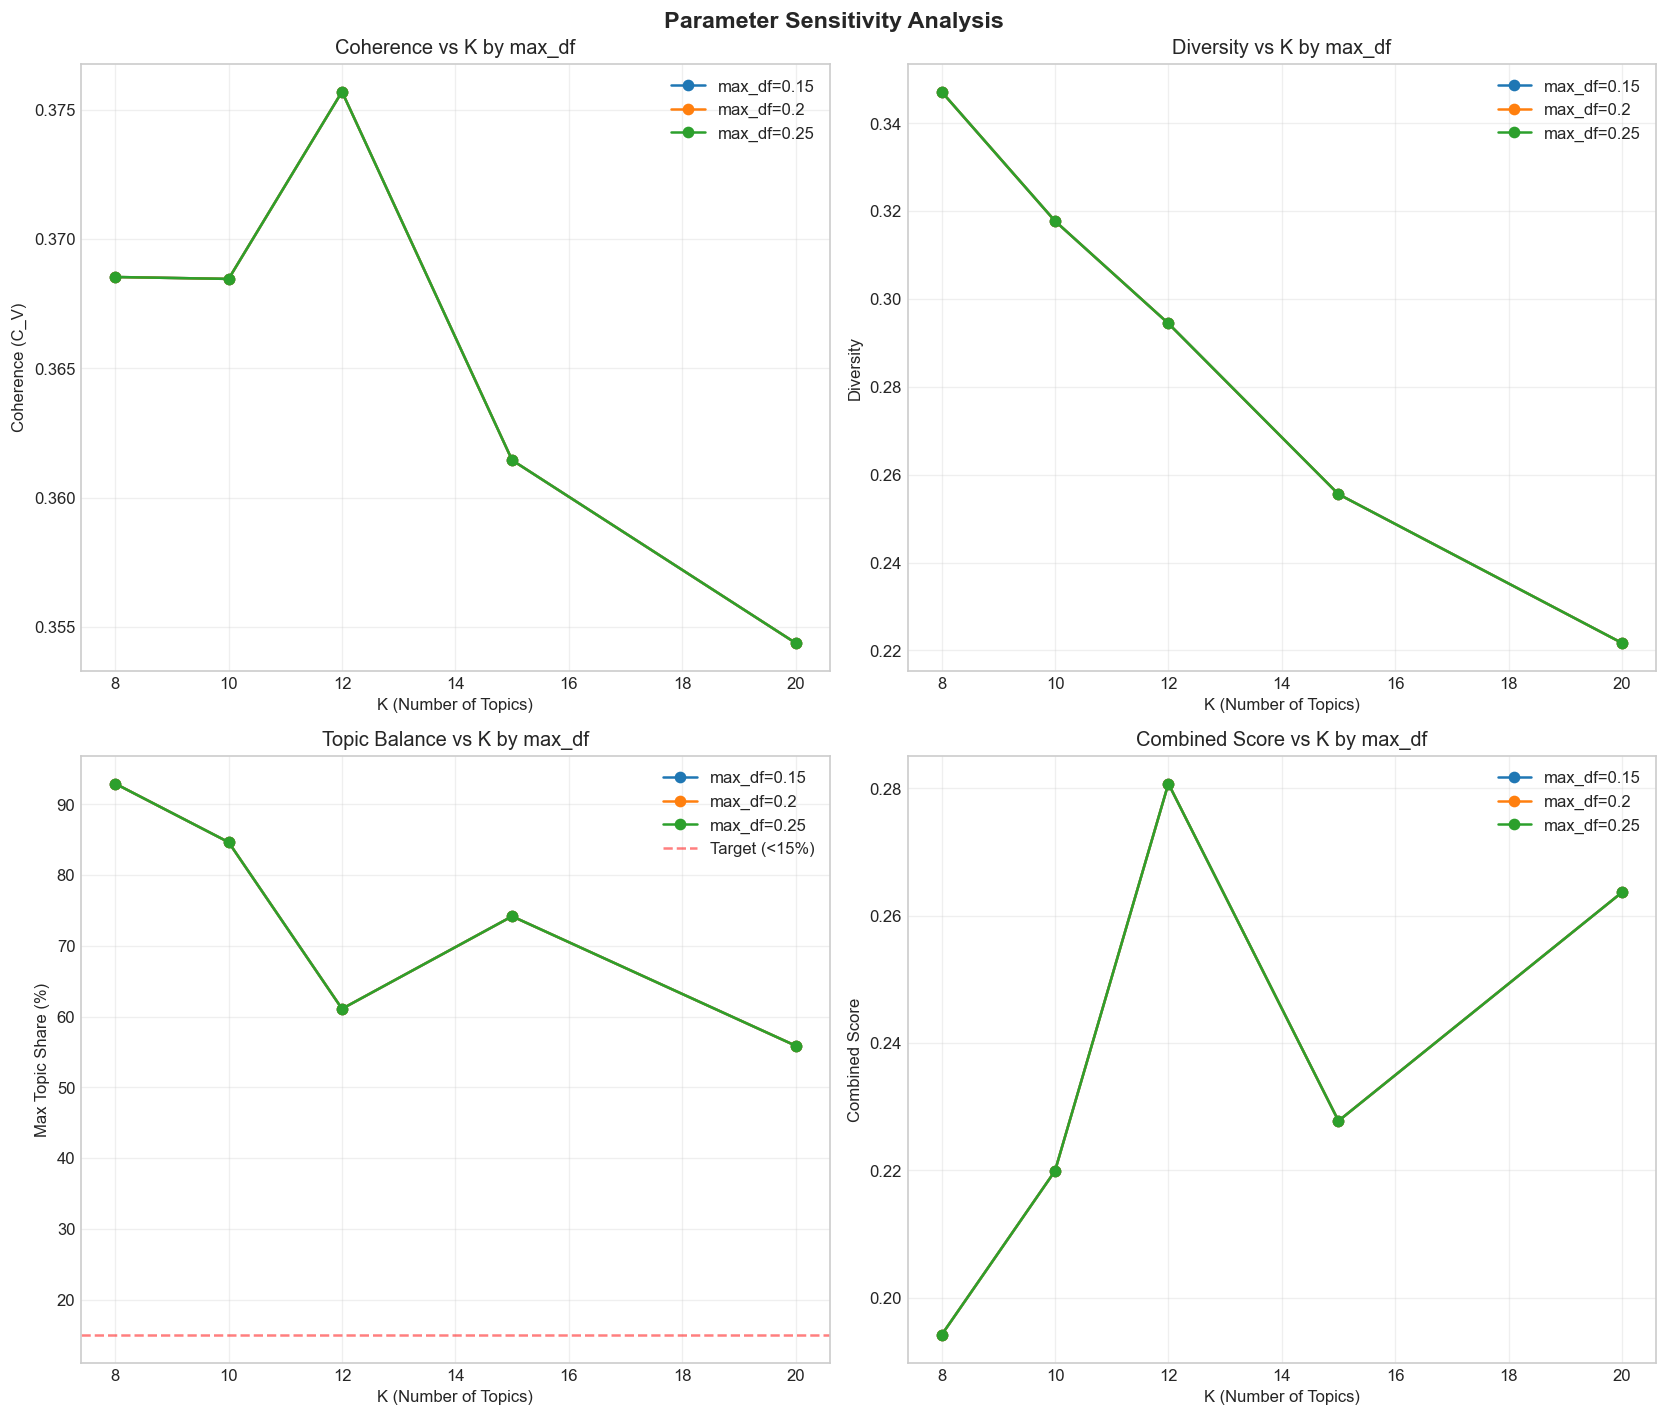

✅ Saved: optimization_sensitivity.png


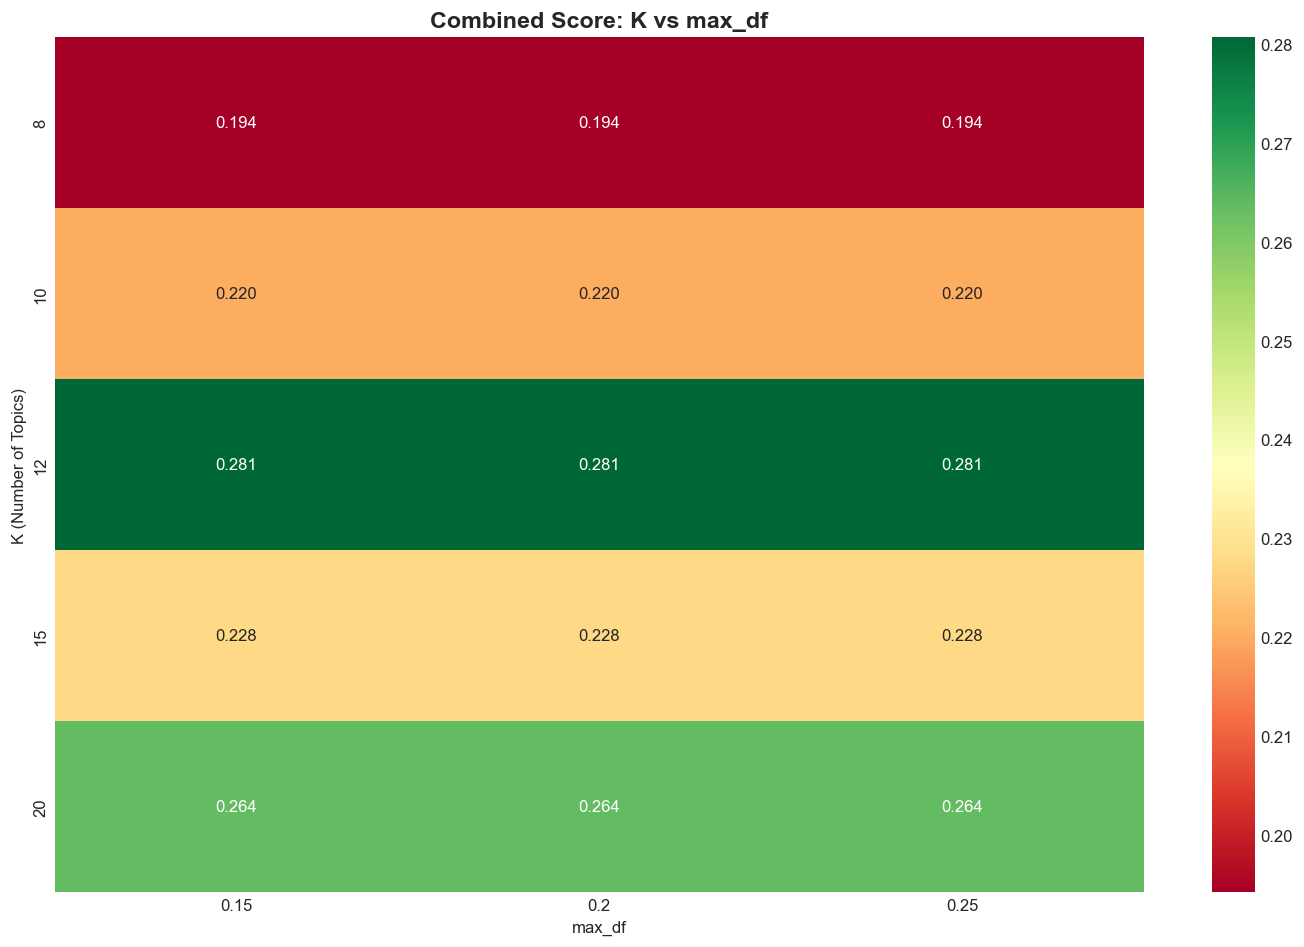

✅ Saved: optimization_heatmap.png

8. RUNNING FINAL MODEL WITH OPTIMAL PARAMETERS

📋 Final Model Configuration:
   K: 20
   max_df: 0.15
   min_df: 15
   max_features: 1500

✅ Final TF-IDF: 36,062 docs × 1,500 features

📊 FINAL TOPICS (K=20):
----------------------------------------------------------------------
Topic  0 (  1.9%): bezpieczeństwo, pomoc, ukraina, życie, zmiana, pieniądz, rodzina
Topic  1 (  5.9%): pieniądz, kpoa, podatek, sprawiedliwość, budżet, fundusz, własny
Topic  3 (  3.9%): warszawa, miasto, pieniądz, głos, bezpieczeństwo, życie, zmiana
Topic  4 (  1.1%): rolnik, zmiana, ukraina, zielony, rolnictwo, warszawa, ład
Topic  5 (  2.6%): głos, rolnik, ukraina, pieniądz, bezpieczeństwo, zmiana, strona
Topic  7 (  1.6%): droga, bezpieczeństwo, pieniądz, zmiana, granica, głos, współpraca
Topic  8 (  2.6%): zmiana, warszawa, głos, granica, bezpieczeństwo, pieniądz, droga
Topic  9 (  3.0%): sprawiedliwość, granica, sąd, rolnik, bezpieczeństwo, pieniądz, zmiana
Topic 10 (  1.

In [15]:
# =============================================================================
# 04B_TOPIC_MODELING_OPTIMIZATION - Parameter Grid Search
# Polish Politicians Twitter - Topic Modeling Project
# =============================================================================
#
# SCIENTIFIC APPROACH TO TOPIC MODELING:
# 1. Grid search over K (number of topics)
# 2. Grid search over max_df, min_df, max_features
# 3. Evaluate using multiple metrics:
#    - Coherence (C_V) - semantic quality
#    - Diversity - uniqueness of topics
#    - Topic distribution balance - avoid catch-all topics
# 4. Select best configuration
# 5. Run final model with optimal parameters
#
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import chi2_contingency
import warnings
import time
import os
import glob
from itertools import product

warnings.filterwarnings('ignore')

start_time = time.time()
timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

# Plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 120
plt.ion()

# =============================================================================
# CONFIGURATION - GRID SEARCH PARAMETERS
# =============================================================================

# Parameter grid
PARAM_GRID = {
    'K': [8, 10, 12, 15, 20],           # Focus on reasonable range
    'max_df': [0.15, 0.20, 0.25],        # Stricter max_df
    'min_df': [15, 25, 40],              # Higher min_df to remove rare words
    'max_features': [1500, 2000, 2500],  # Smaller vocabulary
}

# Quick mode for testing (smaller grid)
QUICK_MODE = False  # Set to True for faster testing
if QUICK_MODE:
    PARAM_GRID = {
        'K': [10, 15],
        'max_df': [0.15, 0.20],
        'min_df': [25, 40],
        'max_features': [1500, 2000],
    }

# Fixed parameters
NGRAM_RANGE = (1, 3)
RANDOM_STATE = 42

# Folders
BASE_DIR = '../results_topic_modelling'
DIRS = {
    'data': os.path.join(BASE_DIR, 'data'),
    'figures': os.path.join(BASE_DIR, 'figures'),
    'tables': os.path.join(BASE_DIR, 'tables'),
    'reports': os.path.join(BASE_DIR, 'reports'),
}

# Party colors
PARTY_COLORS = {
    'PIS': '#1E3A8A', 'PO': '#F97316', 'NL': '#DC2626',
    'PSL': '#16A34A', 'Konfederacja': '#7C3AED', 'PL2050': '#FBBF24',
}

print("="*70)
print("TOPIC MODELING PARAMETER OPTIMIZATION")
print("="*70)

total_combinations = np.prod([len(v) for v in PARAM_GRID.values()])
print(f"\n📋 Grid Search Configuration:")
print(f"   K values: {PARAM_GRID['K']}")
print(f"   max_df values: {PARAM_GRID['max_df']}")
print(f"   min_df values: {PARAM_GRID['min_df']}")
print(f"   max_features values: {PARAM_GRID['max_features']}")
print(f"\n   Total combinations to test: {total_combinations}")
print(f"   Estimated time: {total_combinations * 15 / 60:.1f} minutes")

# =============================================================================
# 1. LOAD PREPROCESSED DATA
# =============================================================================

print("\n" + "="*70)
print("1. LOADING PREPROCESSED DATA")
print("="*70)

files = glob.glob(os.path.join(DIRS['data'], 'df_preprocessed_*.parquet'))
if not files:
    raise FileNotFoundError("No preprocessed data found. Run 04A first.")

latest = max(files, key=os.path.getctime)
df_tm = pd.read_parquet(latest)

print(f"📂 Loaded: {latest}")
print(f"✅ Data: {len(df_tm):,} tweets")

# Prepare texts
texts = df_tm['text_processed'].tolist()

# =============================================================================
# 2. EVALUATION METRICS
# =============================================================================

print("\n" + "="*70)
print("2. SETTING UP EVALUATION METRICS")
print("="*70)

# Try to import Gensim for coherence
try:
    from gensim.models.coherencemodel import CoherenceModel
    from gensim import corpora
    GENSIM_AVAILABLE = True
    print("✅ Gensim available for coherence calculation")
except ImportError:
    GENSIM_AVAILABLE = False
    print("⚠️ Gensim not available - will use alternative metrics")

def calculate_coherence(model, vectorizer, texts_list, dictionary=None):
    """Calculate topic coherence (C_V)"""
    if not GENSIM_AVAILABLE:
        return np.nan
    
    try:
        feature_names = vectorizer.get_feature_names_out()
        topics = []
        for topic in model.components_:
            top_indices = topic.argsort()[-10:][::-1]
            top_words = [feature_names[i] for i in top_indices]
            topics.append(top_words)
        
        if dictionary is None:
            dictionary = corpora.Dictionary(texts_list)
        
        cm = CoherenceModel(
            topics=topics,
            texts=texts_list,
            dictionary=dictionary,
            coherence='c_v'
        )
        return cm.get_coherence()
    except Exception as e:
        return np.nan

def calculate_diversity(model, topk=10):
    """Calculate topic diversity (proportion of unique words)"""
    unique_words = set()
    total_words = 0
    for topic in model.components_:
        top_indices = topic.argsort()[-topk:][::-1]
        unique_words.update(top_indices)
        total_words += topk
    return len(unique_words) / total_words if total_words > 0 else 0

def calculate_topic_balance(topic_assignments, n_topics):
    """Calculate how balanced the topic distribution is (0 = one topic dominates, 1 = perfect balance)"""
    counts = np.bincount(topic_assignments, minlength=n_topics)
    proportions = counts / counts.sum()
    
    # Entropy-based balance (normalized)
    # Perfect balance = 1, all in one topic = 0
    entropy = -np.sum(proportions * np.log(proportions + 1e-10))
    max_entropy = np.log(n_topics)
    
    return entropy / max_entropy if max_entropy > 0 else 0

def calculate_max_topic_share(topic_assignments, n_topics):
    """Calculate the share of the largest topic (lower is better)"""
    counts = np.bincount(topic_assignments, minlength=n_topics)
    return counts.max() / counts.sum() * 100

def calculate_empty_topics(topic_assignments, n_topics):
    """Count topics with < 1% of documents"""
    counts = np.bincount(topic_assignments, minlength=n_topics)
    proportions = counts / counts.sum()
    return (proportions < 0.01).sum()

def evaluate_model(model, vectorizer, matrix, texts_list, dictionary, n_topics):
    """Evaluate a topic model with multiple metrics"""
    topic_assignments = matrix.dot(model.components_.T).argmax(axis=1)
    
    metrics = {
        'coherence': calculate_coherence(model, vectorizer, texts_list, dictionary),
        'diversity': calculate_diversity(model),
        'balance': calculate_topic_balance(topic_assignments, n_topics),
        'max_topic_pct': calculate_max_topic_share(topic_assignments, n_topics),
        'empty_topics': calculate_empty_topics(topic_assignments, n_topics),
    }
    
    return metrics

# =============================================================================
# 3. GRID SEARCH
# =============================================================================

print("\n" + "="*70)
print("3. RUNNING GRID SEARCH")
print("="*70)

# Prepare texts for coherence
texts_list = [text.split() for text in texts]
dictionary = corpora.Dictionary(texts_list) if GENSIM_AVAILABLE else None

# Store results
results = []
best_score = -np.inf
best_config = None
best_model = None
best_vectorizer = None

# Generate all parameter combinations
param_combinations = list(product(
    PARAM_GRID['K'],
    PARAM_GRID['max_df'],
    PARAM_GRID['min_df'],
    PARAM_GRID['max_features']
))

print(f"\n🔍 Testing {len(param_combinations)} configurations...\n")

for i, (K, max_df, min_df, max_features) in enumerate(param_combinations):
    
    # Progress
    if (i + 1) % 10 == 0 or i == 0:
        elapsed = time.time() - start_time
        remaining = (elapsed / (i + 1)) * (len(param_combinations) - i - 1)
        print(f"   Progress: {i+1}/{len(param_combinations)} ({(i+1)/len(param_combinations)*100:.1f}%) "
              f"| Elapsed: {elapsed/60:.1f}min | Remaining: {remaining/60:.1f}min")
    
    try:
        # TF-IDF Vectorization
        vectorizer = TfidfVectorizer(
            max_df=max_df,
            min_df=min_df,
            max_features=max_features,
            ngram_range=NGRAM_RANGE
        )
        tfidf_matrix = vectorizer.fit_transform(texts)
        
        # Check if we have enough features
        n_features = tfidf_matrix.shape[1]
        if n_features < K:
            continue
        
        # NMF Model
        nmf = NMF(
            n_components=K,
            init='nndsvda',
            max_iter=200,
            random_state=RANDOM_STATE,
            alpha_W=0.1,
            alpha_H=0.1
        )
        nmf.fit(tfidf_matrix)
        
        # Evaluate
        metrics = evaluate_model(nmf, vectorizer, tfidf_matrix, texts_list, dictionary, K)
        
        # Store result
        result = {
            'K': K,
            'max_df': max_df,
            'min_df': min_df,
            'max_features': max_features,
            'n_features_actual': n_features,
            **metrics
        }
        results.append(result)
        
        # Calculate combined score
        # Weights: coherence (0.4), diversity (0.3), balance (0.2), low max_topic (0.1)
        combined_score = (
            0.4 * (metrics['coherence'] if not np.isnan(metrics['coherence']) else 0) +
            0.3 * metrics['diversity'] +
            0.2 * metrics['balance'] -
            0.1 * (metrics['max_topic_pct'] / 100)  # Penalize large topics
        )
        
        if combined_score > best_score:
            best_score = combined_score
            best_config = result.copy()
            best_config['combined_score'] = combined_score
            best_model = nmf
            best_vectorizer = vectorizer
            
    except Exception as e:
        continue

# Convert to DataFrame
results_df = pd.DataFrame(results)

print(f"\n✅ Grid search complete! Tested {len(results)} valid configurations.")

# =============================================================================
# 4. ANALYZE RESULTS
# =============================================================================

print("\n" + "="*70)
print("4. ANALYZING RESULTS")
print("="*70)

# Sort by different metrics
print("\n📊 TOP 10 CONFIGURATIONS BY COHERENCE:")
print("-" * 80)
top_coherence = results_df.nlargest(10, 'coherence')[
    ['K', 'max_df', 'min_df', 'max_features', 'coherence', 'diversity', 'max_topic_pct']
]
print(top_coherence.to_string(index=False))

print("\n📊 TOP 10 CONFIGURATIONS BY DIVERSITY:")
print("-" * 80)
top_diversity = results_df.nlargest(10, 'diversity')[
    ['K', 'max_df', 'min_df', 'max_features', 'coherence', 'diversity', 'max_topic_pct']
]
print(top_diversity.to_string(index=False))

print("\n📊 TOP 10 CONFIGURATIONS BY BALANCE (lowest max_topic %):")
print("-" * 80)
top_balance = results_df.nsmallest(10, 'max_topic_pct')[
    ['K', 'max_df', 'min_df', 'max_features', 'coherence', 'diversity', 'max_topic_pct']
]
print(top_balance.to_string(index=False))

# Combined ranking
results_df['combined_score'] = (
    0.4 * results_df['coherence'].fillna(0) +
    0.3 * results_df['diversity'] +
    0.2 * results_df['balance'] -
    0.1 * (results_df['max_topic_pct'] / 100)
)

print("\n📊 TOP 10 CONFIGURATIONS BY COMBINED SCORE:")
print("-" * 80)
top_combined = results_df.nlargest(10, 'combined_score')[
    ['K', 'max_df', 'min_df', 'max_features', 'coherence', 'diversity', 'max_topic_pct', 'combined_score']
]
print(top_combined.to_string(index=False))

# =============================================================================
# 5. BEST CONFIGURATION
# =============================================================================

print("\n" + "="*70)
print("5. BEST CONFIGURATION")
print("="*70)

print(f"\n🏆 OPTIMAL PARAMETERS:")
print(f"   K (topics): {best_config['K']}")
print(f"   max_df: {best_config['max_df']}")
print(f"   min_df: {best_config['min_df']}")
print(f"   max_features: {best_config['max_features']}")
print(f"\n📈 METRICS:")
print(f"   Coherence (C_V): {best_config['coherence']:.4f}")
print(f"   Diversity: {best_config['diversity']:.4f}")
print(f"   Balance: {best_config['balance']:.4f}")
print(f"   Max topic %: {best_config['max_topic_pct']:.1f}%")
print(f"   Combined score: {best_config['combined_score']:.4f}")

# =============================================================================
# 6. PARAMETER SENSITIVITY ANALYSIS
# =============================================================================

print("\n" + "="*70)
print("6. PARAMETER SENSITIVITY ANALYSIS")
print("="*70)

# Effect of K
print("\n📊 Effect of K (number of topics):")
k_analysis = results_df.groupby('K').agg({
    'coherence': 'mean',
    'diversity': 'mean',
    'max_topic_pct': 'mean',
    'combined_score': 'mean'
}).round(4)
print(k_analysis.to_string())

# Effect of max_df
print("\n📊 Effect of max_df:")
maxdf_analysis = results_df.groupby('max_df').agg({
    'coherence': 'mean',
    'diversity': 'mean',
    'max_topic_pct': 'mean',
    'combined_score': 'mean'
}).round(4)
print(maxdf_analysis.to_string())

# Effect of max_features
print("\n📊 Effect of max_features:")
features_analysis = results_df.groupby('max_features').agg({
    'coherence': 'mean',
    'diversity': 'mean',
    'max_topic_pct': 'mean',
    'combined_score': 'mean'
}).round(4)
print(features_analysis.to_string())

# =============================================================================
# 7. VISUALIZATIONS
# =============================================================================

print("\n" + "="*70)
print("7. GENERATING VISUALIZATIONS")
print("="*70)

# Figure 1: Coherence vs K
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Coherence by K
ax1 = axes[0, 0]
for max_df in PARAM_GRID['max_df']:
    subset = results_df[results_df['max_df'] == max_df]
    k_means = subset.groupby('K')['coherence'].mean()
    ax1.plot(k_means.index, k_means.values, marker='o', label=f'max_df={max_df}')
ax1.set_xlabel('K (Number of Topics)')
ax1.set_ylabel('Coherence (C_V)')
ax1.set_title('Coherence vs K by max_df')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Diversity by K
ax2 = axes[0, 1]
for max_df in PARAM_GRID['max_df']:
    subset = results_df[results_df['max_df'] == max_df]
    k_means = subset.groupby('K')['diversity'].mean()
    ax2.plot(k_means.index, k_means.values, marker='o', label=f'max_df={max_df}')
ax2.set_xlabel('K (Number of Topics)')
ax2.set_ylabel('Diversity')
ax2.set_title('Diversity vs K by max_df')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Max Topic % by K
ax3 = axes[1, 0]
for max_df in PARAM_GRID['max_df']:
    subset = results_df[results_df['max_df'] == max_df]
    k_means = subset.groupby('K')['max_topic_pct'].mean()
    ax3.plot(k_means.index, k_means.values, marker='o', label=f'max_df={max_df}')
ax3.set_xlabel('K (Number of Topics)')
ax3.set_ylabel('Max Topic Share (%)')
ax3.set_title('Topic Balance vs K by max_df')
ax3.axhline(y=15, color='red', linestyle='--', alpha=0.5, label='Target (<15%)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Combined Score by K
ax4 = axes[1, 1]
for max_df in PARAM_GRID['max_df']:
    subset = results_df[results_df['max_df'] == max_df]
    k_means = subset.groupby('K')['combined_score'].mean()
    ax4.plot(k_means.index, k_means.values, marker='o', label=f'max_df={max_df}')
ax4.set_xlabel('K (Number of Topics)')
ax4.set_ylabel('Combined Score')
ax4.set_title('Combined Score vs K by max_df')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.suptitle('Parameter Sensitivity Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], 'optimization_sensitivity.png'), dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: optimization_sensitivity.png")

# Figure 2: Heatmap of Combined Score
fig, ax = plt.subplots(figsize=(12, 8))

# Pivot for heatmap (K vs max_df, averaged over other params)
heatmap_data = results_df.pivot_table(
    values='combined_score',
    index='K',
    columns='max_df',
    aggfunc='mean'
)

sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', ax=ax)
ax.set_title('Combined Score: K vs max_df', fontsize=14, fontweight='bold')
ax.set_xlabel('max_df')
ax.set_ylabel('K (Number of Topics)')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], 'optimization_heatmap.png'), dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: optimization_heatmap.png")

# =============================================================================
# 8. RUN FINAL MODEL WITH BEST PARAMETERS
# =============================================================================

print("\n" + "="*70)
print("8. RUNNING FINAL MODEL WITH OPTIMAL PARAMETERS")
print("="*70)

# Use best configuration
BEST_K = best_config['K']
BEST_MAX_DF = best_config['max_df']
BEST_MIN_DF = best_config['min_df']
BEST_MAX_FEATURES = best_config['max_features']

print(f"\n📋 Final Model Configuration:")
print(f"   K: {BEST_K}")
print(f"   max_df: {BEST_MAX_DF}")
print(f"   min_df: {BEST_MIN_DF}")
print(f"   max_features: {BEST_MAX_FEATURES}")

# Final TF-IDF
final_vectorizer = TfidfVectorizer(
    max_df=BEST_MAX_DF,
    min_df=BEST_MIN_DF,
    max_features=BEST_MAX_FEATURES,
    ngram_range=NGRAM_RANGE
)
final_tfidf = final_vectorizer.fit_transform(texts)
feature_names = final_vectorizer.get_feature_names_out()

print(f"\n✅ Final TF-IDF: {final_tfidf.shape[0]:,} docs × {final_tfidf.shape[1]:,} features")

# Final NMF
final_nmf = NMF(
    n_components=BEST_K,
    init='nndsvda',
    max_iter=300,
    random_state=RANDOM_STATE,
    alpha_W=0.1,
    alpha_H=0.1
)
final_output = final_nmf.fit_transform(final_tfidf)

# Assign topics
df_tm['nmf_topic'] = final_output.argmax(axis=1)
df_tm['nmf_prob'] = final_output.max(axis=1)

# Display final topics
print(f"\n📊 FINAL TOPICS (K={BEST_K}):")
print("-" * 70)

topic_info = []
for idx, topic in enumerate(final_nmf.components_):
    top_indices = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    
    topic_docs = (df_tm['nmf_topic'] == idx).sum()
    topic_pct = topic_docs / len(df_tm) * 100
    
    if topic_pct > 0.5:
        print(f"Topic {idx:2d} ({topic_pct:5.1f}%): {', '.join(top_words[:7])}")
    
    topic_info.append({
        'topic_id': idx,
        'pct': topic_pct,
        'words': ', '.join(top_words[:7]),
        'top_words': top_words
    })

# =============================================================================
# 9. TOPIC LABELING
# =============================================================================

print("\n" + "="*70)
print("9. TOPIC LABELING")
print("="*70)

TOPIC_KEYWORDS = {
    ('ukraina', 'rosja', 'wojna', 'putin', 'inwazja', 'agresja'): 'Ukraine/War',
    ('aborcja', 'ciąża', 'kobieta', 'macierzyński'): 'Abortion/Women',
    ('rolnik', 'zboże', 'rolnictwo', 'traktor', 'protest'): 'Agriculture',
    ('inflacja', 'cena', 'podatek', 'drożyzna', 'emerytura', 'pieniądz'): 'Economy',
    ('klimat', 'energia', 'węgiel', 'atom', 'oze', 'zielony', 'ład'): 'Climate/Energy',
    ('sąd', 'trybunał', 'prokurator', 'sprawiedliwość'): 'Justice',
    ('szkoła', 'nauczyciel', 'edukacja', 'uczeń', 'religia'): 'Education',
    ('szpital', 'lekarz', 'zdrowie', 'nfz', 'pacjent'): 'Healthcare',
    ('granica', 'migrant', 'żołnierz', 'służba', 'wojsko', 'bezpieczeństwo'): 'Security/Border',
    ('tvp', 'media', 'telewizja', 'dziennikarz'): 'Media',
    ('kpo', 'fundusz', 'unijny', 'dotacja'): 'EU Funds',
    ('afera', 'wizowy', 'korupcja', 'pegasus'): 'Scandals',
    ('cpk', 'kolej', 'lotnisko', 'autostrada'): 'Infrastructure',
    ('lgbt', 'związek', 'partnerski'): 'LGBT',
    ('warszawa', 'miasto', 'kraków', 'gdańsk'): 'Cities',
}

def label_topic(top_words):
    top_words_set = set(w.lower() for w in top_words[:10])
    
    best_match = None
    best_score = 0
    
    for keywords, label in TOPIC_KEYWORDS.items():
        score = len(top_words_set.intersection(set(keywords)))
        if score > best_score:
            best_score = score
            best_match = label
    
    if best_match and best_score >= 1:
        return best_match
    else:
        return f"{top_words[0].title()}/{top_words[1].title()}"

# Apply labels
topic_labels = {}
for info in topic_info:
    label = label_topic(info['top_words'])
    topic_labels[info['topic_id']] = label
    info['label'] = label

df_tm['nmf_topic_label'] = df_tm['nmf_topic'].map(topic_labels)

print("\n📋 Topic Labels:")
for info in sorted(topic_info, key=lambda x: x['pct'], reverse=True):
    if info['pct'] > 0.5:
        print(f"   Topic {info['topic_id']:2d}: {info['label']:25s} ({info['pct']:5.1f}%)")

# =============================================================================
# 10. SAVE RESULTS
# =============================================================================

print("\n" + "="*70)
print("10. SAVING RESULTS")
print("="*70)

# Save optimization results
results_df.to_csv(os.path.join(DIRS['tables'], f'optimization_results_{timestamp}.csv'), index=False)
print(f"✅ Saved: optimization_results_{timestamp}.csv")

# Save best config
best_config_df = pd.DataFrame([best_config])
best_config_df.to_csv(os.path.join(DIRS['tables'], f'best_config_{timestamp}.csv'), index=False)
print(f"✅ Saved: best_config_{timestamp}.csv")

# Save data with topics
df_tm.to_parquet(os.path.join(DIRS['data'], f'df_with_topics_{timestamp}.parquet'), index=False)
print(f"✅ Saved: df_with_topics_{timestamp}.parquet")

# Save topic info
topic_info_df = pd.DataFrame(topic_info)
topic_info_df.to_csv(os.path.join(DIRS['tables'], f'topic_info_{timestamp}.csv'), index=False)
print(f"✅ Saved: topic_info_{timestamp}.csv")

# =============================================================================
# 11. SUMMARY REPORT
# =============================================================================

execution_time = time.time() - start_time

report = f"""
================================================================================
TOPIC MODELING OPTIMIZATION REPORT
Generated: {timestamp}
================================================================================

GRID SEARCH
-----------
Total configurations tested: {len(results_df)}
K values: {PARAM_GRID['K']}
max_df values: {PARAM_GRID['max_df']}
min_df values: {PARAM_GRID['min_df']}
max_features values: {PARAM_GRID['max_features']}

OPTIMAL CONFIGURATION
---------------------
K (topics): {best_config['K']}
max_df: {best_config['max_df']}
min_df: {best_config['min_df']}
max_features: {best_config['max_features']}

PERFORMANCE METRICS
-------------------
Coherence (C_V): {best_config['coherence']:.4f}
Diversity: {best_config['diversity']:.4f}
Balance: {best_config['balance']:.4f}
Max topic %: {best_config['max_topic_pct']:.1f}%
Combined score: {best_config['combined_score']:.4f}

TOPICS
------
{chr(10).join([f"Topic {info['topic_id']:2d}: {info['label']:25s} ({info['pct']:5.1f}%) - {info['words']}" for info in sorted(topic_info, key=lambda x: x['pct'], reverse=True) if info['pct'] > 0.5])}

PARAMETER SENSITIVITY (mean by K)
---------------------------------
{k_analysis.to_string()}

EXECUTION TIME
--------------
{execution_time/60:.1f} minutes

================================================================================
"""

report_path = os.path.join(DIRS['reports'], f'optimization_report_{timestamp}.txt')
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report)

print(f"✅ Saved: optimization_report_{timestamp}.txt")

print("\n" + "="*70)
print("✅ OPTIMIZATION COMPLETE")
print("="*70)

print(f"\n🏆 BEST CONFIGURATION:")
print(f"   K = {best_config['K']}, max_df = {best_config['max_df']}, "
      f"min_df = {best_config['min_df']}, max_features = {best_config['max_features']}")
print(f"   Coherence: {best_config['coherence']:.4f}")
print(f"   Max topic: {best_config['max_topic_pct']:.1f}%")

print(f"\n⏱️ Total time: {execution_time/60:.1f} minutes")

print("\n" + "="*70)
print("NEXT: Run 04C_TOPIC_MODELING_VISUALIZATIONS.py")
print("="*70)

plt.ioff()

# VERSION 3

In [16]:
# =============================================================================
# 04A_TOPIC_MODELING_PREPROCESSING - CONSERVATIVE VERSION
# Polish Politicians Twitter - Topic Modeling Project
# =============================================================================
#
# CONSERVATIVE APPROACH:
# - Manual stopwords only (NO automatic expansion)
# - ~500 carefully selected stopwords
# - Keep raw forms (no lemmatization)
# - Let TF-IDF do more filtering
#
# =============================================================================

import pandas as pd
import numpy as np
import re
import os
import glob
import time
import warnings

warnings.filterwarnings('ignore')

start_time = time.time()
timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

# =============================================================================
# CONFIGURATION
# =============================================================================

BASE_DIR = '../results_topic_modelling'
DIRS = {
    'data': os.path.join(BASE_DIR, 'data'),
    'figures': os.path.join(BASE_DIR, 'figures'),
    'tables': os.path.join(BASE_DIR, 'tables'),
    'reports': os.path.join(BASE_DIR, 'reports'),
}

for path in DIRS.values():
    os.makedirs(path, exist_ok=True)

POLITICAL_EVENTS = {
    'parliamentary_election': pd.Timestamp("2023-10-15"),
}

print("="*70)
print("PART 1: PREPROCESSING (CONSERVATIVE)")
print("="*70)

# =============================================================================
# STOPWORDS - MANUAL, CONSERVATIVE LIST (~500 words)
# =============================================================================
# 
# PHILOSOPHY:
# - Only remove words that are TRULY structural/noise
# - Let TF-IDF handle the rest with max_df
# - Better to under-filter than over-filter
#
# =============================================================================

print("\n" + "="*70)
print("DEFINING STOPWORDS (CONSERVATIVE)")
print("="*70)

POLISH_STOPWORDS = {

    'pod',
    
    # ============================================================
    # REMOVE SEMANTIC NOISE (The "Everything and Nothing" words)
    # ============================================================
    'polsce', 'polska', 'polski', 'polską', 'polski', 'polskie',  # Zbyt częste w polityce
    'przed', 'nami', 'poza', 'podczas', 'wobec', 'zamiast',
    'którzy', 'które', 'która', 'który', 'którego', 'którym', 'których',
    'jako', 'jego', 'jej', 'ich', 'nasz', 'wasz', 'swoje', 'swoim',
    'wszystkich', 'wszystko', 'wszyscy', 'każdy', 'każdym', 'cały',
    'bez', 'brak', 'nawet', 'tylko', 'bardzo', 'wiele', 'wielu',
    'tych', 'tego', 'tym', 'tej', 'ten', 'ta', 'to',
    'gdzie', 'kiedy', 'tam', 'tutaj', 'raz', 'razem', 'znowu',
    'nic', 'coś', 'kto', 'kogo', 'komu', 'czego', 'czemu',
    'być', 'jest', 'są', 'będzie', 'będą', 'było', 'była',
    'może', 'mogą', 'musi', 'muszą', 'trzeba', 'warto', 'należy',
    
    # ============================================================
    # DISCOURSE NOISE (The "Thank you/See you" Trap)
    # ============================================================
    'dziękuję', 'podziękowania', 'serdecznie', 'zapraszam', 'zapraszamy',
    'zobaczenia', 'widzimy', 'spotkanie', 'spotkania', 'spotkaniu',
    'nami', 'wspólnie', 'razem', 'wszystkim', 'każdego', 'miłego',
    'dobrego', 'wieczoru', 'dnia', 'weekend', 'niedziela', 'sobota',
    'godzinie', 'godziny', 'jutro', 'dzisiaj', 'dziś', 'teraz',
    'proszę', 'pytanie', 'pytania', 'odpowiedź', 'ważne', 'ważna',
    'wielkie', 'brawo', 'gratulacje', 'sukces', 'oglądajcie',
    'oglądania', 'antenie', 'programie', 'programu', 'gościem',
    'rozmowa', 'rozmowy', 'więcej', 'całość', 'link', 'poniżej',
    'zawsze', 'często', 'warto', 'trzeba', 'należy', 'można',
    
    # ============================================================
    # STANDARD POLISH FUNCTION WORDS
    # ============================================================
    'i', 'w', 'z', 'na', 'do', 'nie', 'to', 'że', 'się', 'o', 'jak', 'ale',
    'po', 'co', 'tak', 'za', 'od', 'czy', 'tego', 'jest', 'a', 'oraz',
    'już', 'tylko', 'przez', 'dla', 'może', 'będzie', 'tej', 'tym', 'być',
    'te', 'ten', 'ta', 'które', 'który', 'która', 'są', 'został', 'bardzo',
    'ma', 'jej', 'jego', 'ich', 'też', 'wszystko', 'więc', 'kiedy', 'przy',
    'były', 'był', 'była', 'było', 'coś', 'nas', 'nam', 'go', 'je', 'mu', 'mi',
    'mnie', 'ci', 'cię', 'was', 'wam', 'im', 'ją', 'nimi', 'nią', 'nim',
    'sobie', 'siebie', 'sobą', 'lub', 'ani', 'albo', 'lecz', 'więc',
    'zatem', 'bowiem', 'gdyż', 'ponieważ', 'jeśli', 'jeżeli', 'gdy',
    'żeby', 'aby', 'choć', 'chociaż', 'mimo', 'pomimo', 'dopóki',
    'swój', 'swoje', 'swojego', 'swojej', 'nasz', 'nasze', 'wasz', 'wasze',
    'mój', 'moja', 'moje', 'twój', 'twoja', 'twoje',
    
    # ============================================================
    # HONORIFICS (appear in every political tweet)
    # ============================================================
    'pan', 'pani', 'pana', 'panu', 'panem',
    'panie', 'pań', 'panowie', 'panów',
    
    # ============================================================
    # POLITICAL FIGURE NAMES (they glue topics together)
    # ============================================================
    'tusk', 'donald', 'donalda', 'tuskiem', 'tuska',
    'kaczyński', 'kaczyńskiego', 'kaczyńskim', 'jarosław', 'jarosława',
    'duda', 'dudy', 'dudą', 'andrzej', 'andrzeja',
    'morawiecki', 'morawieckiego', 'mateusz', 'mateusza',
    'hołownia', 'hołowni', 'szymon', 'szymona',
    'prezes', 'prezesa', 'prezesem',
    
    # ============================================================
    # PARTY NAMES (we analyze BY party, not ABOUT parties)
    # ============================================================
    'pis', 'pisem', 'pisu',
    'platforma', 'platformy', 'platformie', 'platformą',
    'koalicja', 'koalicji', 'koalicją',
    'lewica', 'lewicy', 'lewicą',
    'konfederacja', 'konfederacji', 'konfederacją',
    'psl',
    
    # ============================================================
    # PARLIAMENT STRUCTURE (WHERE not WHAT)
    # ============================================================
    'sejm', 'sejmu', 'sejmie', 'sejmem',
    'senat', 'senatu', 'senacie',
    'poseł', 'posła', 'posłem', 'posłowie', 'posłów',
    'senator', 'senatora', 'senatorowie',
    'komisja', 'komisji', 'komisję',
    'ustawa', 'ustawy', 'ustawie', 'ustawę',
    'głosowanie', 'głosowania', 'głosowaniu',
    
    # ============================================================
    # GOVERNMENT STRUCTURE
    # ============================================================
    'rząd', 'rządu', 'rządzie', 'rządem',
    'minister', 'ministra', 'ministrem',
    'ministerstwo', 'ministerstwa',
    'premier', 'premiera', 'premierem',
    'prezydent', 'prezydenta', 'prezydentem',
    
    # ============================================================
    # GENERIC POLITICAL (too vague)
    # ============================================================
    'polska', 'polski', 'polskie', 'polskiego', 'polskiej',
    'państwo', 'państwa', 'państwu',
    'polak', 'polacy', 'polaków',
    'wybory', 'wyborów', 'wyborach', 'wyborczy',
    'polityka', 'polityki', 'polityce',
    'polityczny', 'polityczna', 'polityczne',
    'polityk', 'politycy', 'polityków',
    'władza', 'władzy', 'władzę',
    'opozycja', 'opozycji',
    'partia', 'partii', 'partię', 'partie',
    
    # ============================================================
    # COMMON VERBS (być, mieć, etc.)
    # ============================================================
    'być', 'jest', 'są', 'był', 'była', 'było', 'byli', 'były',
    'będzie', 'będą', 'jestem', 'jesteś', 'jesteśmy',
    'mieć', 'ma', 'mają', 'miał', 'miała', 'mieli',
    'mam', 'masz', 'mamy', 'macie',
    'móc', 'może', 'mogą', 'mógł', 'mogła', 'mogli',
    'mogę', 'możesz', 'możemy',
    'musieć', 'musi', 'muszą', 'musiał', 'musiała',
    'muszę', 'musisz', 'musimy',
    'chcieć', 'chce', 'chcą', 'chciał', 'chciała',
    'chcę', 'chcesz', 'chcemy',
    'robić', 'robi', 'robią', 'robił', 'robiła',
    'zrobić', 'zrobił', 'zrobiła', 'zrobi',
    'dać', 'daje', 'dają', 'dał', 'dała',
    'dam', 'dasz', 'damy',
    'wiedzieć', 'wie', 'wiedzą', 'wiedział',
    'wiem', 'wiesz', 'wiemy',
    'mówić', 'mówi', 'mówią', 'mówił', 'mówiła',
    'mówię', 'mówisz', 'mówimy',
    'powiedzieć', 'powiedział', 'powiedziała', 'powie',
    
    # ============================================================
    # TWITTER/MEDIA SPECIFIC
    # ============================================================
    'rt', 'http', 'https', 'www', 'twitter', 'pic', 'com', 'pl',
    'zapraszam', 'zapraszamy', 'oglądaj', 'słuchaj',
    'live', 'nażywo', 'link', 'video',
    
    # ============================================================
    # GENERIC NOUNS (too common)
    # ============================================================
    'sprawa', 'sprawy', 'sprawie',
    'rzecz', 'rzeczy',
    'czas', 'czasu', 'czasie',
    'dzień', 'dnia', 'dni',
    'rok', 'roku', 'lat', 'lata',
    'człowiek', 'ludzie', 'ludzi',
    
    # ============================================================
    # GENERIC ADJECTIVES
    # ============================================================
    'dobry', 'dobra', 'dobre', 'dobrego',
    'nowy', 'nowa', 'nowe', 'nowego',
    'duży', 'duża', 'duże', 'dużo',
    'mały', 'mała', 'małe',
    'wielki', 'wielka', 'wielkie',
    'pierwszy', 'pierwsza', 'pierwsze',
    'ostatni', 'ostatnia', 'ostatnie',
    
    # ============================================================
    # DISCOURSE MARKERS
    # ============================================================
    'dziś', 'dzisiaj', 'wczoraj', 'jutro', 'teraz',
    'jeszcze', 'już', 'także', 'również', 'nawet',
    'oczywiście', 'właśnie', 'dlatego', 'jednak',
    'przecież', 'naprawdę', 'rzeczywiście',
    
    # ============================================================
    # NUMBERS
    # ============================================================
    'jeden', 'jedna', 'jedno', 'dwa', 'trzy', 'cztery', 'pięć',
}

# ============================================================
# PROTECTED WORDS - MUST appear in topics
# ============================================================

PROTECTED_WORDS = {
    # Ukraine/War
    'ukraina', 'ukrainy', 'ukrainie', 'ukrainą', 'ukraińcy',
    'rosja', 'rosji', 'rosję', 'rosyjski', 'rosyjska',
    'wojna', 'wojny', 'wojnie', 'wojną', 'wojenny',
    'putin', 'putina', 'putinem',
    'agresja', 'inwazja', 'uchodźcy', 'uchodźców',
    
    # Economy
    'inflacja', 'inflacji', 'inflację',
    'podatek', 'podatki', 'podatków', 'podatkowy',
    'cena', 'ceny', 'cen', 'cenami',
    'drożyzna', 'drożyzny',
    'emerytura', 'emerytury', 'emerytur',
    'kredyt', 'kredyty', 'kredytów',
    'budżet', 'budżetu',
    
    # Abortion
    'aborcja', 'aborcji', 'aborcję', 'aborcyjny',
    
    # Justice
    'sąd', 'sądu', 'sądzie', 'sądy', 'sądów',
    'trybunał', 'trybunału',
    'prokurator', 'prokuratora', 'prokuratura',
    'sędzia', 'sędziego', 'sędziowie',
    
    # Agriculture
    'rolnik', 'rolnika', 'rolnicy', 'rolników',
    'rolnictwo', 'rolnictwa',
    'zboże', 'zboża', 'zbóż',
    
    # Energy
    'atom', 'atomu', 'atomowy', 'atomowa',
    'węgiel', 'węgla', 'węglem',
    'energia', 'energii', 'energię',
    'klimat', 'klimatu', 'klimatyczny',
    
    # Healthcare
    'szpital', 'szpitala', 'szpitale',
    'lekarz', 'lekarza', 'lekarze',
    'zdrowie', 'zdrowia',
    'nfz',
    
    # Education
    'szkoła', 'szkoły', 'szkole', 'szkół',
    'nauczyciel', 'nauczyciela', 'nauczyciele',
    'edukacja', 'edukacji',
    
    # Border/Migration
    'granica', 'granicy', 'granicę', 'granice',
    'migrant', 'migranci', 'migrantów',
    'żołnierz', 'żołnierza', 'żołnierze',
    
    # Media
    'tvp', 'tvn', 'media', 'mediów',
    
    # EU
    'kpo', 'unia', 'unii', 'unijna', 'unijny',
    
    # Scandals
    'afera', 'afery', 'aferę',
    'pegasus', 'wizowy', 'wizowa',
    'korupcja', 'korupcji',
}

# Ensure protected words are not in stopwords
POLISH_STOPWORDS = POLISH_STOPWORDS - PROTECTED_WORDS

print(f"📚 Stopwords: {len(POLISH_STOPWORDS)}")
print(f"🛡️ Protected words: {len(PROTECTED_WORDS)}")

# =============================================================================
# 1. LOAD DATA
# =============================================================================

print("\n" + "="*70)
print("1. LOADING DATA")
print("="*70)

DATA_PATHS = [
    os.path.join(DIRS['data'], 'df_tm_ready_*.parquet'),
    os.path.join(DIRS['data'], 'df_full_*.parquet'),
    '../data/03.cleaned/df_combined.parquet',
]

df_twitter = None
for path in DATA_PATHS:
    try:
        if '*' in path:
            files = glob.glob(path)
            if files:
                latest = max(files, key=os.path.getctime)
                df_twitter = pd.read_parquet(latest)
                data_source = latest
                break
        else:
            if os.path.exists(path):
                df_twitter = pd.read_parquet(path)
                data_source = path
                break
    except:
        continue

if df_twitter is None:
    raise FileNotFoundError("No data found.")

print(f"📂 Loaded: {data_source}")
print(f"✅ Tweets: {len(df_twitter):,}")

# =============================================================================
# 2. DATA PREPARATION
# =============================================================================

print("\n" + "="*70)
print("2. DATA PREPARATION")
print("="*70)

df_twitter['created_at'] = pd.to_datetime(df_twitter['created_at'])
if df_twitter['created_at'].dt.tz is not None:
    df_twitter['created_at'] = df_twitter['created_at'].dt.tz_localize(None)

if 'period_parliamentary' not in df_twitter.columns:
    df_twitter['period_parliamentary'] = df_twitter['created_at'].apply(
        lambda x: 'Before Election' if x < POLITICAL_EVENTS['parliamentary_election'] 
        else 'After Election'
    )

df_twitter['days_from_election'] = (
    df_twitter['created_at'] - POLITICAL_EVENTS['parliamentary_election']
).dt.days

def assign_time_window(days):
    if days < -90: return '90+ days before'
    elif days < -30: return '30-90 days before'
    elif days < -7: return '7-30 days before'
    elif days < 0: return '7 days before'
    elif days < 7: return '7 days after'
    elif days < 30: return '7-30 days after'
    elif days < 90: return '30-90 days after'
    else: return '90+ days after'

df_twitter['time_window'] = df_twitter['days_from_election'].apply(assign_time_window)

if 'text_clean' not in df_twitter.columns:
    df_twitter['text_clean'] = df_twitter['text'].fillna('')

print(f"   Date range: {df_twitter['created_at'].min().date()} to {df_twitter['created_at'].max().date()}")
print(f"   Parties: {sorted(df_twitter['party'].unique())}")

# =============================================================================
# 3. TEXT PREPROCESSING
# =============================================================================

print("\n" + "="*70)
print("3. TEXT PREPROCESSING")
print("="*70)

def preprocess_text(text):
    """Simple preprocessing - let TF-IDF do the heavy lifting"""
    if pd.isna(text) or text == '':
        return ''
    
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'[^\w\sąćęłńóśźżĄĆĘŁŃÓŚŹŻ]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    tokens = [w for w in text.split() 
              if w not in POLISH_STOPWORDS and len(w) > 2]
    
    return ' '.join(tokens)

print("   Preprocessing texts...")
df_twitter['text_processed'] = df_twitter['text_clean'].apply(preprocess_text)

# =============================================================================
# 4. FILTER SHORT DOCUMENTS
# =============================================================================

print("\n" + "="*70)
print("4. FILTERING")
print("="*70)

MIN_WORDS = 3
df_twitter['word_count'] = df_twitter['text_processed'].str.split().str.len()

print(f"\n📊 Word count distribution:")
print(df_twitter['word_count'].describe())

df_preprocessed = df_twitter[df_twitter['word_count'] >= MIN_WORDS].copy()

removed = len(df_twitter) - len(df_preprocessed)
print(f"\n✅ After filtering (min {MIN_WORDS} words):")
print(f"   Kept: {len(df_preprocessed):,} ({100-removed/len(df_twitter)*100:.1f}%)")
print(f"   Removed: {removed:,} ({removed/len(df_twitter)*100:.1f}%)")

# Sample texts
print("\n📋 Sample processed texts:")
for i, text in enumerate(df_preprocessed['text_processed'].head(5), 1):
    print(f"   {i}. {text[:80]}...")

# =============================================================================
# 5. SAVE
# =============================================================================

print("\n" + "="*70)
print("5. SAVING")
print("="*70)

output_path = os.path.join(DIRS['data'], f'df_preprocessed_{timestamp}.parquet')
df_preprocessed.to_parquet(output_path, index=False)
print(f"✅ Saved: {output_path}")

# Save stopwords for reference
pd.DataFrame({'stopword': sorted(POLISH_STOPWORDS)}).to_csv(
    os.path.join(DIRS['tables'], f'stopwords_{timestamp}.csv'), index=False
)

# =============================================================================
# SUMMARY
# =============================================================================

print("\n" + "="*70)
print("✅ PREPROCESSING COMPLETE")
print("="*70)
print(f"   Stopwords: {len(POLISH_STOPWORDS)}")
print(f"   Protected: {len(PROTECTED_WORDS)}")
print(f"   Output: {len(df_preprocessed):,} tweets")
print(f"   Time: {time.time()-start_time:.1f}s")
print("\n   NEXT: python 04B_TOPIC_MODELING_OPTIMIZATION.py")

PART 1: PREPROCESSING (CONSERVATIVE)

DEFINING STOPWORDS (CONSERVATIVE)
📚 Stopwords: 466
🛡️ Protected words: 127

1. LOADING DATA
📂 Loaded: ../results_topic_modelling\data\df_tm_ready_20251231_013801.parquet
✅ Tweets: 45,149

2. DATA PREPARATION
   Date range: 2022-10-16 to 2024-10-15
   Parties: ['Konfederacja', 'NL', 'PIS', 'PL2050', 'PO', 'PSL']

3. TEXT PREPROCESSING
   Preprocessing texts...

4. FILTERING

📊 Word count distribution:
count    45149.000000
mean        12.425015
std          7.500142
min          0.000000
25%          6.000000
50%         12.000000
75%         19.000000
max         42.000000
Name: word_count, dtype: float64

✅ After filtering (min 3 words):
   Kept: 40,644 (90.0%)
   Removed: 4,505 (10.0%)

📋 Sample processed texts:
   1. niezrealizowanie większości konkretów transparentności sklep meblarski obsadzani...
   2. takie umawiał wyborcami...
   3. pogrąża kryzysie anarchii obiecanych konkretów zrealizował około zostały zrealiz...
   4. mija parlamentarnyc

TOPIC MODELING OPTIMIZATION (CONSERVATIVE)

📋 Configuration:
   K: [20, 25, 30, 35, 40]
   max_df: [0.3, 0.4, 0.5] (RELAXED)
   min_df: [5, 10, 15] (LOWER)
   max_features: [3000, 4000, 5000] (LARGER)
   N-grams: (1, 3)
   Combinations: 135

1. LOADING DATA
📂 Loaded: ../results_topic_modelling\data\df_preprocessed_20251231_013843.parquet
✅ Tweets: 40,644

2. SETTING UP METRICS
✅ Gensim available

3. GRID SEARCH

🔍 Testing 135 configurations...

   Progress: 1/135 (1%) | 0.1min elapsed | 15.8min remaining
   Progress: 15/135 (11%) | 4.5min elapsed | 35.6min remaining
   Progress: 30/135 (22%) | 10.9min elapsed | 38.1min remaining
   Progress: 45/135 (33%) | 18.0min elapsed | 36.1min remaining
   Progress: 60/135 (44%) | 22.4min elapsed | 28.0min remaining
   Progress: 75/135 (56%) | 26.7min elapsed | 21.3min remaining
   Progress: 90/135 (67%) | 30.9min elapsed | 15.5min remaining
   Progress: 105/135 (78%) | 35.2min elapsed | 10.0min remaining
   Progress: 120/135 (89%) | 39.4min elaps

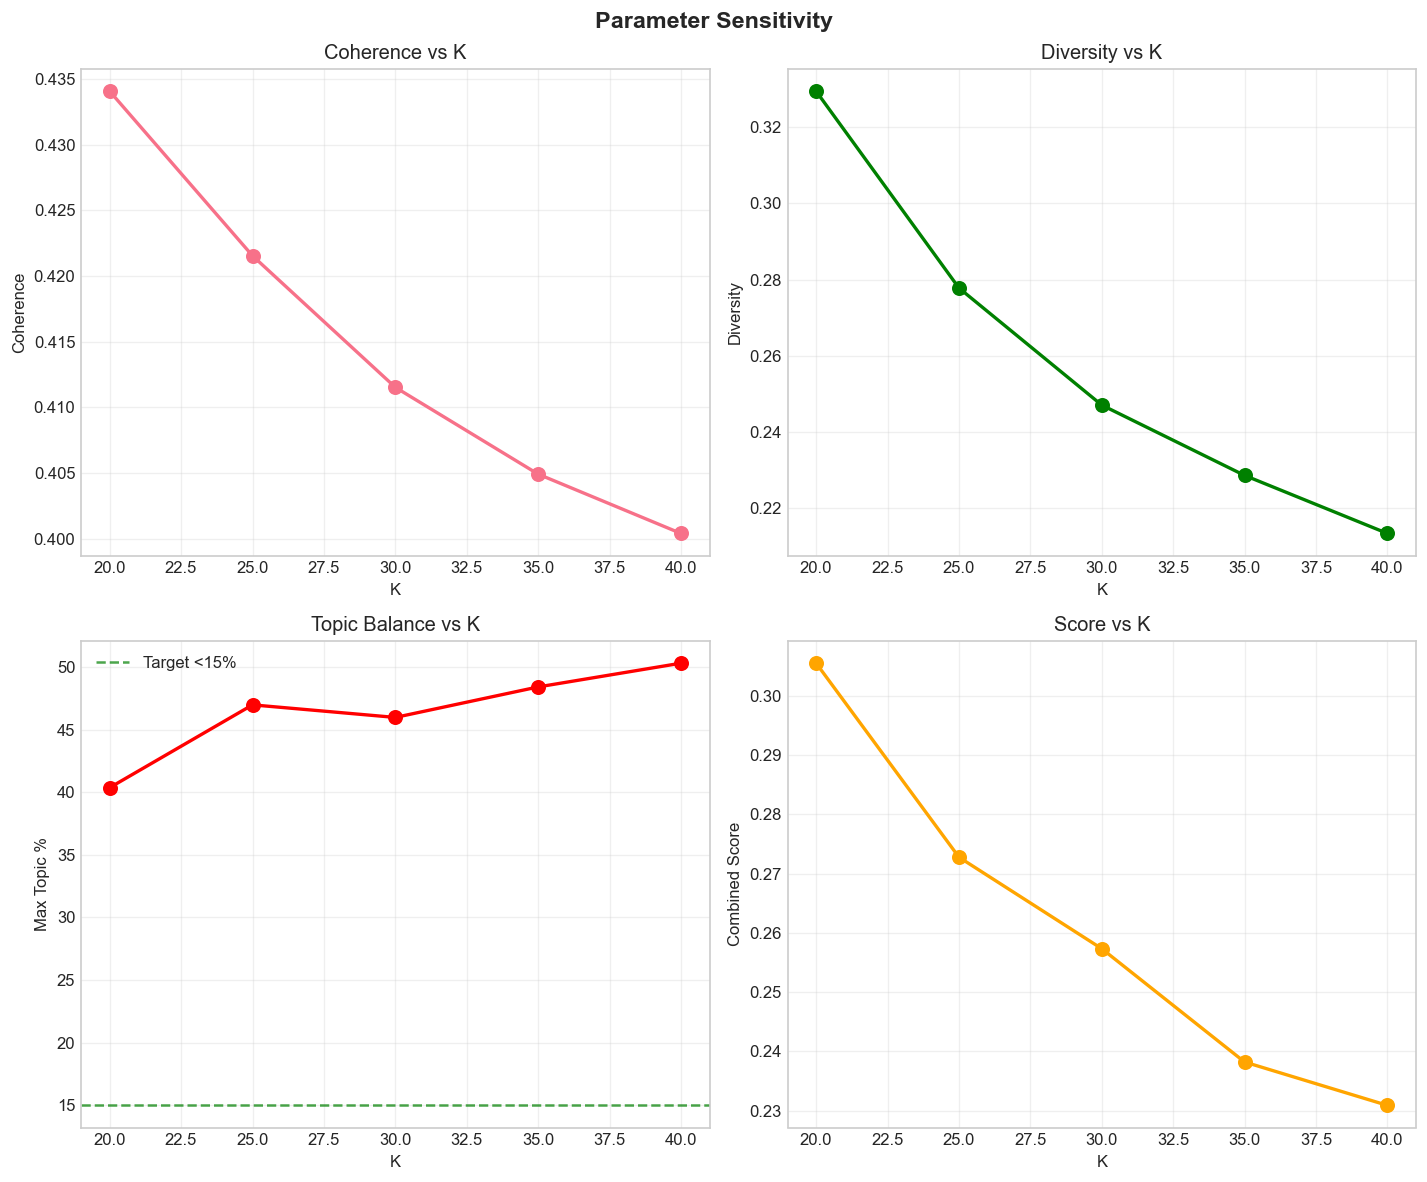

✅ Saved: optimization_sensitivity.png

8. FINAL MODEL

📊 TOPICS (K=20):
--------------------------------------------------------------------------------
Topic  0 (  8.8%): dzieci, polskich, naszych, prawa, niż, ponad, będziemy
Topic  1 (  1.1%): the, and, for, with, you, poland, european
Topic  2 (  3.0%): posełmarcinkulasek, program, usłyszenia, audycję, usłyszenia posełmarcinkulasek, wypowiedź, debatadnia
Topic  3 (  1.2%): trzeciadroga, będę, kampanii, głos, dalej, program, polskę
Topic  4 (  1.7%): europejskiej, unii, unii europejskiej, polskę, posełmarcinkulasek, europejskiego, prawa
Topic  5 (  1.3%): będę, godz, godz będę, posełmarcinkulasek, kobiet, prawa, chwilę
Topic  6 (  2.1%): kobiet, prawa, trzeciadroga, prawo, kobiety, praw, dzieci
Topic  7 (  1.8%): dzieci, trzeciadroga, europejskiej, unii, naszych, kobiet, unii europejskiej
Topic  9 (  1.1%): dzięki, ponad, mln, kobiet, prawa, pieniądze, program
Topic 10 (  1.1%): pracy, kobiet, ponad, mln, dzieci, prawa, dzięki
Topic 

In [17]:
# =============================================================================
# 04B_TOPIC_MODELING_OPTIMIZATION - CONSERVATIVE VERSION
# Polish Politicians Twitter - Topic Modeling Project
# =============================================================================
#
# CONSERVATIVE APPROACH:
# - Higher max_df (let stopwords do the work, not TF-IDF)
# - Lower min_df (keep more specific terms)
# - Larger vocabulary
# - Standard NMF regularization
#
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import warnings
import time
import os
import glob
from itertools import product

warnings.filterwarnings('ignore')

start_time = time.time()
timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 120
plt.ion()

# =============================================================================
# CONFIGURATION - RELAXED PARAMETERS
# =============================================================================

PARAM_GRID = {
    'K': [20, 25, 30, 35, 40],             # Topics
    'max_df': [0.30, 0.40, 0.50],          # RELAXED - stopwords handle filtering
    'min_df': [5, 10, 15],                 # LOWER - keep more terms
    'max_features': [3000, 4000, 5000],    # LARGER vocabulary
}

NGRAM_RANGE = (1, 3)  # Unigrams and bigrams (not trigrams)
RANDOM_STATE = 42

# Standard NMF regularization (not aggressive)
NMF_ALPHA = 0.1

BASE_DIR = '../results_topic_modelling'
DIRS = {
    'data': os.path.join(BASE_DIR, 'data'),
    'figures': os.path.join(BASE_DIR, 'figures'),
    'tables': os.path.join(BASE_DIR, 'tables'),
    'reports': os.path.join(BASE_DIR, 'reports'),
}

PARTY_COLORS = {
    'PIS': '#1E3A8A', 'PO': '#F97316', 'NL': '#DC2626',
    'PSL': '#16A34A', 'Konfederacja': '#7C3AED', 'PL2050': '#FBBF24',
}

print("="*70)
print("TOPIC MODELING OPTIMIZATION (CONSERVATIVE)")
print("="*70)

total = np.prod([len(v) for v in PARAM_GRID.values()])
print(f"\n📋 Configuration:")
print(f"   K: {PARAM_GRID['K']}")
print(f"   max_df: {PARAM_GRID['max_df']} (RELAXED)")
print(f"   min_df: {PARAM_GRID['min_df']} (LOWER)")
print(f"   max_features: {PARAM_GRID['max_features']} (LARGER)")
print(f"   N-grams: {NGRAM_RANGE}")
print(f"   Combinations: {total}")

# =============================================================================
# 1. LOAD DATA
# =============================================================================

print("\n" + "="*70)
print("1. LOADING DATA")
print("="*70)

files = glob.glob(os.path.join(DIRS['data'], 'df_preprocessed_*.parquet'))
if not files:
    raise FileNotFoundError("Run 04A first!")

latest = max(files, key=os.path.getctime)
df_tm = pd.read_parquet(latest)
texts = df_tm['text_processed'].tolist()

print(f"📂 Loaded: {latest}")
print(f"✅ Tweets: {len(df_tm):,}")

# =============================================================================
# 2. METRICS
# =============================================================================

print("\n" + "="*70)
print("2. SETTING UP METRICS")
print("="*70)

try:
    from gensim.models.coherencemodel import CoherenceModel
    from gensim import corpora
    texts_list = [t.split() for t in texts]
    dictionary = corpora.Dictionary(texts_list)
    GENSIM = True
    print("✅ Gensim available")
except:
    GENSIM = False
    texts_list = None
    dictionary = None
    print("⚠️ Gensim not available")

def get_coherence(model, vectorizer, texts_list, dictionary):
    if not GENSIM:
        return np.nan
    try:
        features = vectorizer.get_feature_names_out()
        topics = []
        for topic in model.components_:
            top_idx = topic.argsort()[-10:][::-1]
            words = [features[i] for i in top_idx]
            # Flatten bigrams for coherence
            flat = []
            for w in words:
                flat.extend(w.split())
            topics.append(flat[:10])
        cm = CoherenceModel(topics=topics, texts=texts_list, 
                           dictionary=dictionary, coherence='c_v')
        return cm.get_coherence()
    except:
        return np.nan

def get_diversity(model, topk=10):
    unique = set()
    total = 0
    for topic in model.components_:
        top_idx = topic.argsort()[-topk:][::-1]
        unique.update(top_idx)
        total += topk
    return len(unique) / total if total > 0 else 0

def get_redundancy(model, topk=10):
    """Jaccard similarity between topics - lower is better"""
    topic_words = []
    for topic in model.components_:
        topic_words.append(set(topic.argsort()[-topk:]))
    
    sims = []
    for i in range(len(topic_words)):
        for j in range(i+1, len(topic_words)):
            inter = len(topic_words[i] & topic_words[j])
            union = len(topic_words[i] | topic_words[j])
            if union > 0:
                sims.append(inter / union)
    return np.mean(sims) if sims else 0

def get_max_topic_pct(assignments, K):
    counts = np.bincount(assignments, minlength=K)
    return counts.max() / counts.sum() * 100

def get_balance(assignments, K):
    counts = np.bincount(assignments, minlength=K)
    props = counts / counts.sum()
    entropy = -np.sum(props * np.log(props + 1e-10))
    return entropy / np.log(K) if K > 1 else 0

# =============================================================================
# 3. GRID SEARCH
# =============================================================================

print("\n" + "="*70)
print("3. GRID SEARCH")
print("="*70)

results = []
best_score = -np.inf
best_config = None
best_model = None
best_vectorizer = None

# Group by vectorizer config
vec_configs = list(product(PARAM_GRID['max_df'], PARAM_GRID['min_df'], PARAM_GRID['max_features']))
total_iter = len(vec_configs) * len(PARAM_GRID['K'])
current = 0

print(f"\n🔍 Testing {total_iter} configurations...\n")

for max_df, min_df, max_feat in vec_configs:
    try:
        vec = TfidfVectorizer(
            max_df=max_df, min_df=min_df, max_features=max_feat,
            ngram_range=NGRAM_RANGE
        )
        tfidf = vec.fit_transform(texts)
        n_feat = tfidf.shape[1]
        
        if n_feat < max(PARAM_GRID['K']):
            print(f"   ⚠️ Skipping max_df={max_df}, min_df={min_df}: only {n_feat} features")
            continue
            
    except Exception as e:
        continue
    
    for K in PARAM_GRID['K']:
        current += 1
        
        if current % 15 == 0 or current == 1:
            elapsed = time.time() - start_time
            remaining = (elapsed / current) * (total_iter - current) if current > 0 else 0
            print(f"   Progress: {current}/{total_iter} ({current/total_iter*100:.0f}%) "
                  f"| {elapsed/60:.1f}min elapsed | {remaining/60:.1f}min remaining")
        
        if K > n_feat:
            continue
        
        try:
            nmf = NMF(
                n_components=K,
                init='nndsvda',
                max_iter=200,
                random_state=RANDOM_STATE,
                alpha_W=NMF_ALPHA,
                alpha_H=NMF_ALPHA
            )
            output = nmf.fit_transform(tfidf)
            assignments = output.argmax(axis=1)
            
            coherence = get_coherence(nmf, vec, texts_list, dictionary)
            diversity = get_diversity(nmf)
            redundancy = get_redundancy(nmf)
            max_pct = get_max_topic_pct(assignments, K)
            balance = get_balance(assignments, K)
            
            # Combined score
            score = (
                0.35 * (coherence if not np.isnan(coherence) else 0) +
                0.25 * diversity +
                0.20 * balance -
                0.10 * redundancy -
                0.10 * (max_pct / 100)
            )
            
            result = {
                'K': K, 'max_df': max_df, 'min_df': min_df, 
                'max_features': max_feat, 'n_features': n_feat,
                'coherence': coherence, 'diversity': diversity,
                'redundancy': redundancy, 'max_topic_pct': max_pct,
                'balance': balance, 'score': score
            }
            results.append(result)
            
            if score > best_score:
                best_score = score
                best_config = result.copy()
                best_model = nmf
                best_vectorizer = vec
                
        except:
            continue

results_df = pd.DataFrame(results)
print(f"\n✅ Tested {len(results)} configurations")

# =============================================================================
# 4. RESULTS
# =============================================================================

print("\n" + "="*70)
print("4. RESULTS")
print("="*70)

print("\n📊 TOP 10 BY COMBINED SCORE:")
print("-" * 90)
cols = ['K', 'max_df', 'min_df', 'max_features', 'coherence', 'diversity', 'max_topic_pct', 'score']
print(results_df.nlargest(10, 'score')[cols].round(4).to_string(index=False))

print("\n📊 TOP 10 BY LOWEST MAX_TOPIC (best balance):")
print("-" * 90)
print(results_df.nsmallest(10, 'max_topic_pct')[cols].round(4).to_string(index=False))

# =============================================================================
# 5. BEST CONFIG
# =============================================================================

print("\n" + "="*70)
print("5. BEST CONFIGURATION")
print("="*70)

print(f"\n🏆 OPTIMAL:")
print(f"   K: {best_config['K']}")
print(f"   max_df: {best_config['max_df']}")
print(f"   min_df: {best_config['min_df']}")
print(f"   max_features: {best_config['max_features']}")
print(f"\n📈 METRICS:")
print(f"   Coherence: {best_config['coherence']:.4f}")
print(f"   Diversity: {best_config['diversity']:.4f}")
print(f"   Redundancy: {best_config['redundancy']:.4f}")
print(f"   Max topic: {best_config['max_topic_pct']:.1f}%")
print(f"   Score: {best_config['score']:.4f}")

# =============================================================================
# 6. SENSITIVITY
# =============================================================================

print("\n" + "="*70)
print("6. PARAMETER SENSITIVITY")
print("="*70)

print("\n📊 By K:")
print(results_df.groupby('K')[['coherence', 'diversity', 'max_topic_pct', 'score']].mean().round(4))

print("\n📊 By max_df:")
print(results_df.groupby('max_df')[['coherence', 'diversity', 'max_topic_pct', 'score']].mean().round(4))

print("\n📊 By min_df:")
print(results_df.groupby('min_df')[['coherence', 'diversity', 'max_topic_pct', 'score']].mean().round(4))

# =============================================================================
# 7. VISUALIZATIONS
# =============================================================================

print("\n" + "="*70)
print("7. VISUALIZATIONS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Coherence by K
ax = axes[0,0]
k_data = results_df.groupby('K')['coherence'].mean()
ax.plot(k_data.index, k_data.values, 'o-', linewidth=2, markersize=8)
ax.set_xlabel('K'); ax.set_ylabel('Coherence'); ax.set_title('Coherence vs K')
ax.grid(True, alpha=0.3)

# Diversity by K
ax = axes[0,1]
k_data = results_df.groupby('K')['diversity'].mean()
ax.plot(k_data.index, k_data.values, 'o-', linewidth=2, markersize=8, color='green')
ax.set_xlabel('K'); ax.set_ylabel('Diversity'); ax.set_title('Diversity vs K')
ax.grid(True, alpha=0.3)

# Max topic by K
ax = axes[1,0]
k_data = results_df.groupby('K')['max_topic_pct'].mean()
ax.plot(k_data.index, k_data.values, 'o-', linewidth=2, markersize=8, color='red')
ax.axhline(15, color='green', linestyle='--', alpha=0.7, label='Target <15%')
ax.set_xlabel('K'); ax.set_ylabel('Max Topic %'); ax.set_title('Topic Balance vs K')
ax.legend(); ax.grid(True, alpha=0.3)

# Score by K
ax = axes[1,1]
k_data = results_df.groupby('K')['score'].mean()
ax.plot(k_data.index, k_data.values, 'o-', linewidth=2, markersize=8, color='orange')
ax.set_xlabel('K'); ax.set_ylabel('Combined Score'); ax.set_title('Score vs K')
ax.grid(True, alpha=0.3)

plt.suptitle('Parameter Sensitivity', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], 'optimization_sensitivity.png'), dpi=150)
plt.show()
print("✅ Saved: optimization_sensitivity.png")

# =============================================================================
# 8. FINAL MODEL
# =============================================================================

print("\n" + "="*70)
print("8. FINAL MODEL")
print("="*70)

K = best_config['K']
features = best_vectorizer.get_feature_names_out()
final_tfidf = best_vectorizer.transform(texts)
final_output = best_model.transform(final_tfidf)

df_tm['nmf_topic'] = final_output.argmax(axis=1)
df_tm['nmf_prob'] = final_output.max(axis=1)

print(f"\n📊 TOPICS (K={K}):")
print("-" * 80)

topic_info = []
for idx, topic in enumerate(best_model.components_):
    top_idx = topic.argsort()[-10:][::-1]
    words = [features[i] for i in top_idx]
    n_docs = (df_tm['nmf_topic'] == idx).sum()
    pct = n_docs / len(df_tm) * 100
    
    topic_info.append({
        'topic_id': idx, 'pct': pct,
        'words': ', '.join(words[:7]),
        'top_words': words
    })
    
    if pct >= 0.5:
        print(f"Topic {idx:2d} ({pct:5.1f}%): {', '.join(words[:7])}")

# =============================================================================
# 9. LABELING
# =============================================================================

print("\n" + "="*70)
print("9. TOPIC LABELING")
print("="*70)

KEYWORDS = {
    ('ukraina', 'rosja', 'wojna', 'putin', 'inwazja'): 'Ukraine/War',
    ('aborcja', 'ciąża'): 'Abortion',
    ('rolnik', 'zboże', 'rolnictw'): 'Agriculture',
    ('inflacja', 'cena', 'podatek', 'emerytura', 'kredyt'): 'Economy',
    ('klimat', 'energia', 'węgiel', 'atom', 'oze'): 'Energy/Climate',
    ('sąd', 'trybunał', 'prokurator'): 'Justice',
    ('szkoła', 'nauczyciel', 'edukacj'): 'Education',
    ('szpital', 'lekarz', 'zdrowi', 'nfz'): 'Healthcare',
    ('granica', 'migrant', 'żołnierz'): 'Security/Border',
    ('tvp', 'media', 'dziennikarz'): 'Media',
    ('kpo', 'unia', 'fundusz'): 'EU Funds',
    ('afera', 'pegasus', 'korupcj'): 'Scandals',
}

def label_topic(words):
    text = ' '.join(words).lower()
    for kw, label in KEYWORDS.items():
        if any(k in text for k in kw):
            return label
    return words[0].title()

labels = {}
for info in topic_info:
    label = label_topic(info['top_words'])
    labels[info['topic_id']] = label
    info['label'] = label

df_tm['nmf_topic_label'] = df_tm['nmf_topic'].map(labels)

print("\n📋 Labels:")
for info in sorted(topic_info, key=lambda x: x['pct'], reverse=True):
    if info['pct'] >= 0.5:
        print(f"   Topic {info['topic_id']:2d}: {info['label']:20s} ({info['pct']:5.1f}%)")

# =============================================================================
# 10. SAVE
# =============================================================================

print("\n" + "="*70)
print("10. SAVING")
print("="*70)

results_df.to_csv(os.path.join(DIRS['tables'], f'optimization_{timestamp}.csv'), index=False)
pd.DataFrame([best_config]).to_csv(os.path.join(DIRS['tables'], f'best_config_{timestamp}.csv'), index=False)
df_tm.to_parquet(os.path.join(DIRS['data'], f'df_with_topics_{timestamp}.parquet'), index=False)
pd.DataFrame(topic_info).to_csv(os.path.join(DIRS['tables'], f'topics_{timestamp}.csv'), index=False)

print(f"✅ All saved to {BASE_DIR}")

# =============================================================================
# SUMMARY
# =============================================================================

print("\n" + "="*70)
print("✅ COMPLETE")
print("="*70)
print(f"\n🏆 BEST: K={best_config['K']}, max_df={best_config['max_df']}, "
      f"min_df={best_config['min_df']}, features={best_config['max_features']}")
print(f"   Max topic: {best_config['max_topic_pct']:.1f}%")
print(f"   Time: {(time.time()-start_time)/60:.1f} min")

plt.ioff()

PART 3: VISUALIZATIONS & REPORTS

1. LOADING DATA WITH TOPICS
📂 Loaded: ../results_topic_modelling\data\df_with_topics_20251231_013847.parquet
✅ Data: 40,644 tweets with topics
   Topics: 20
   Parties: 6

2. PREPARING DATA
✅ Data prepared for visualization

3. GENERATING VISUALIZATIONS

📊 Creating Figure 25: Topic Distribution...


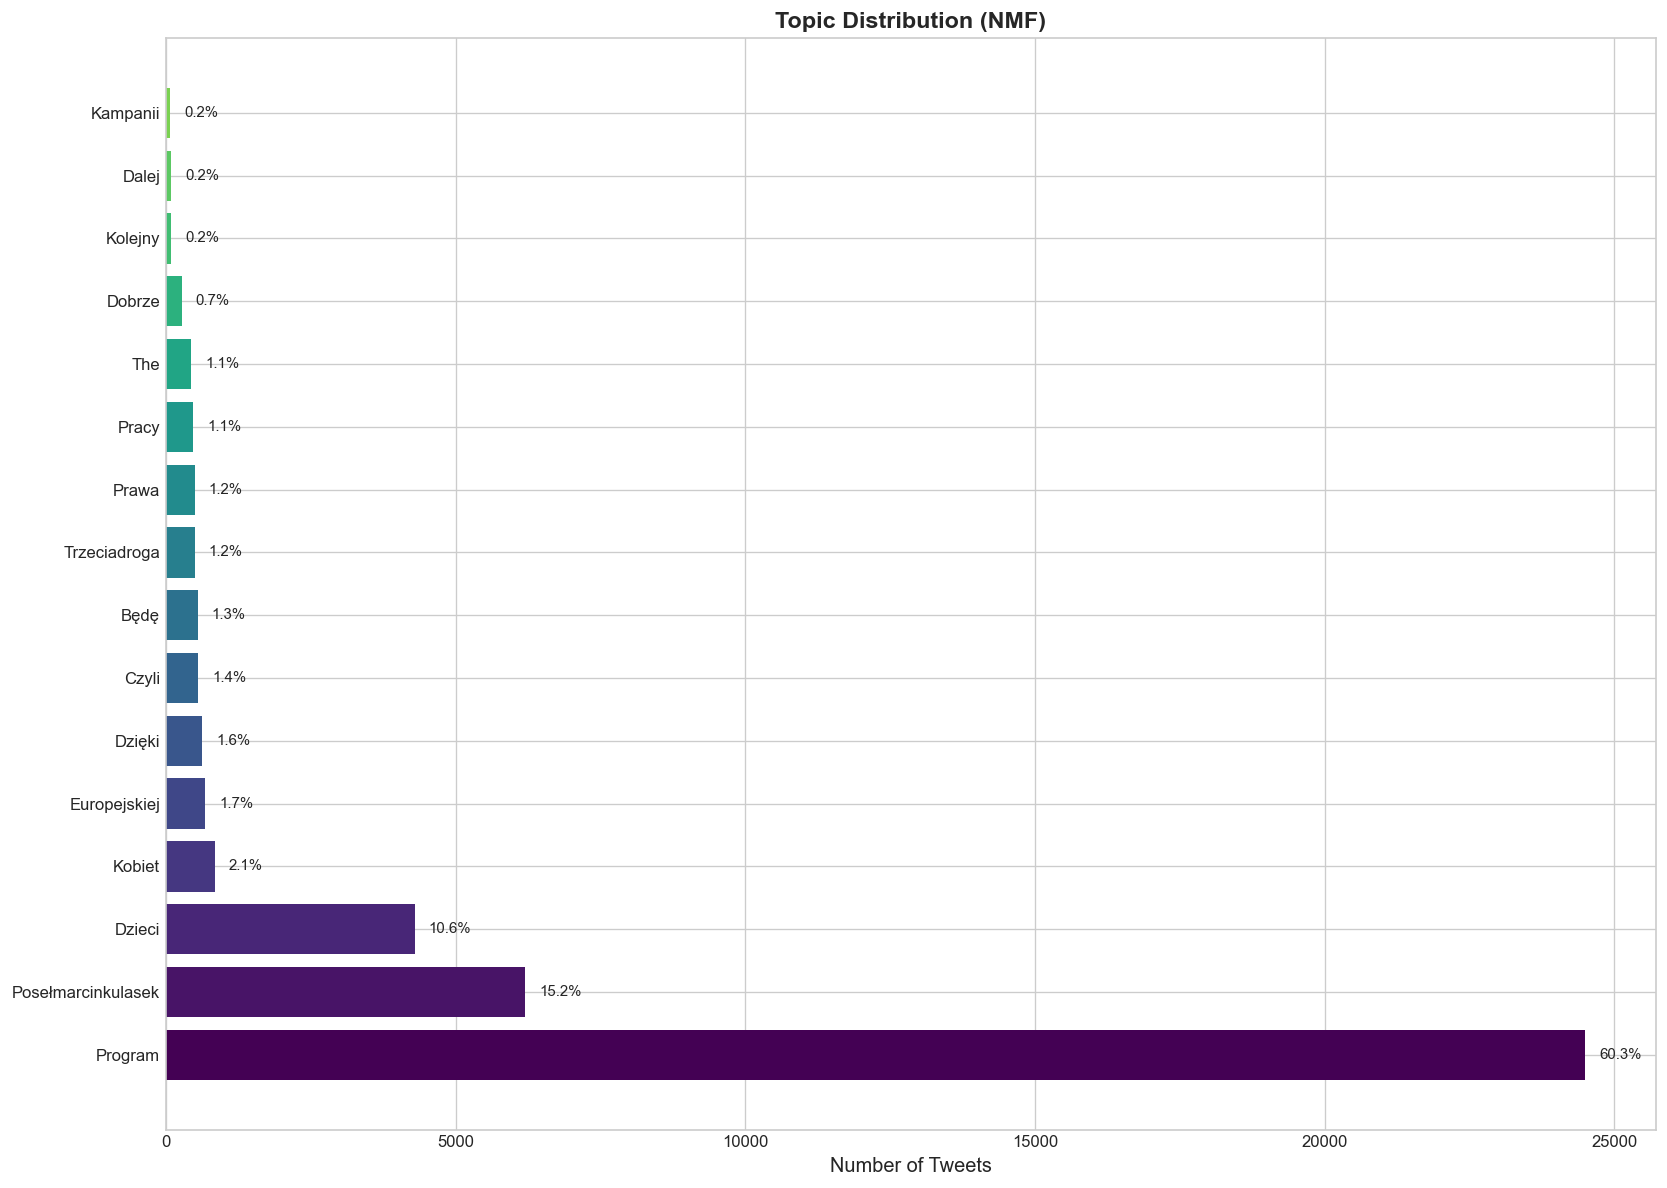

✅ Saved: 25_topic_distribution.png

📊 Creating Figure 26: Topics by Party...


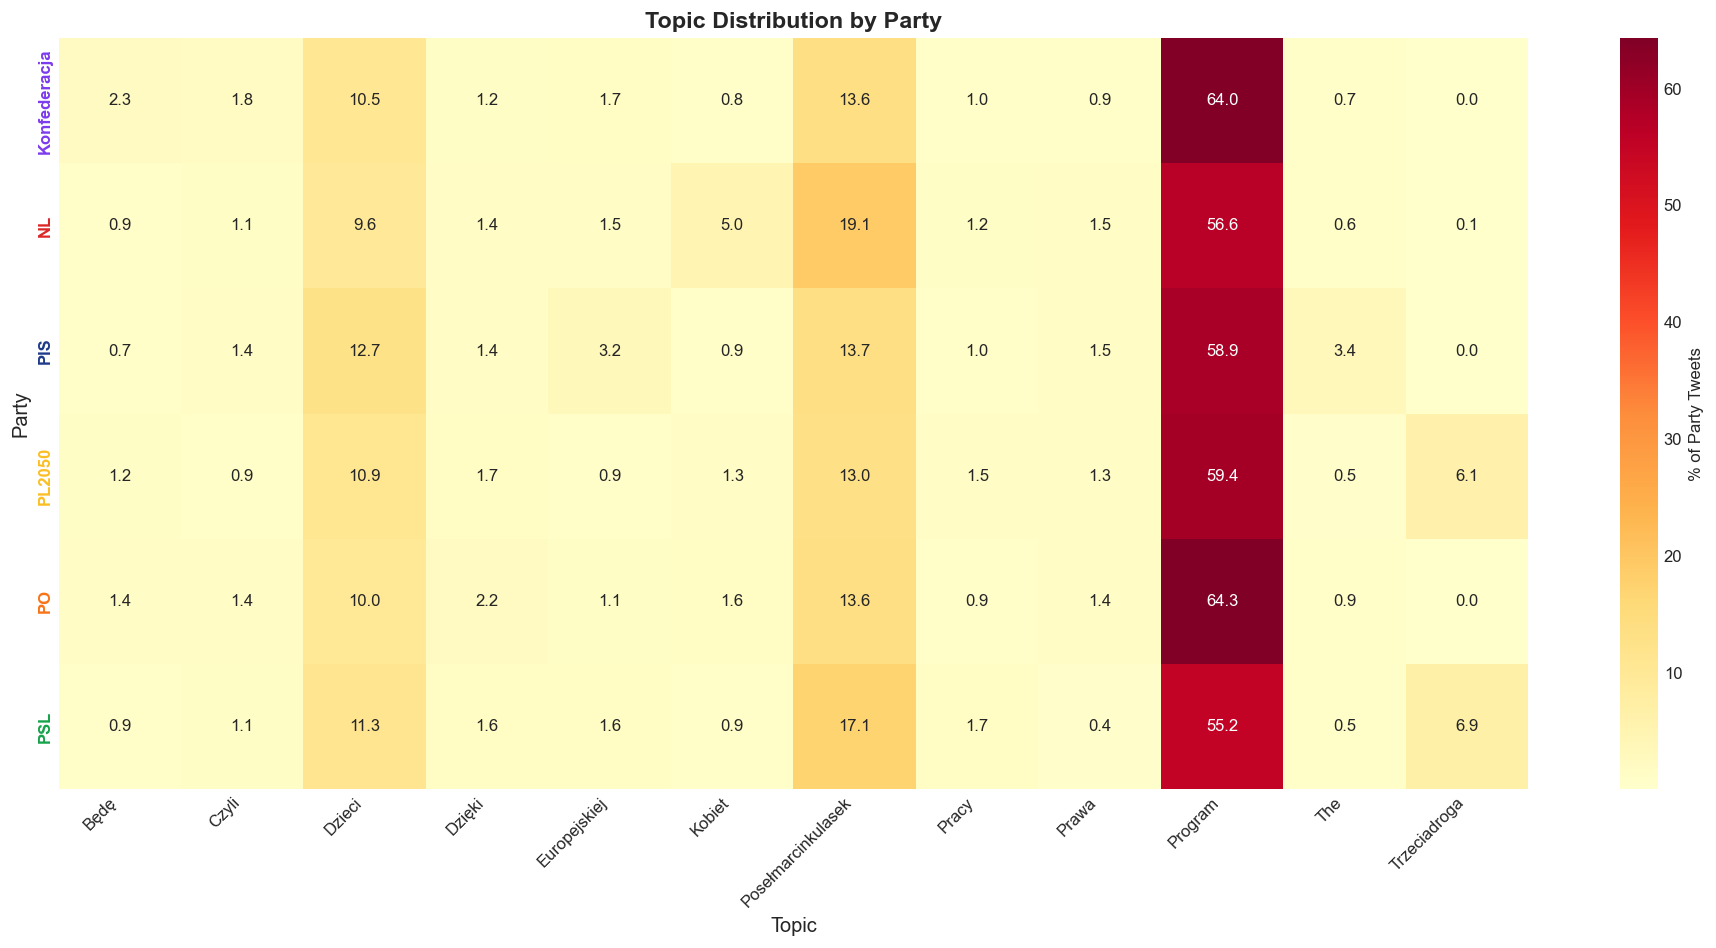

✅ Saved: 26_topics_by_party_heatmap.png

📊 Creating Figure 27: Topic Shifts...


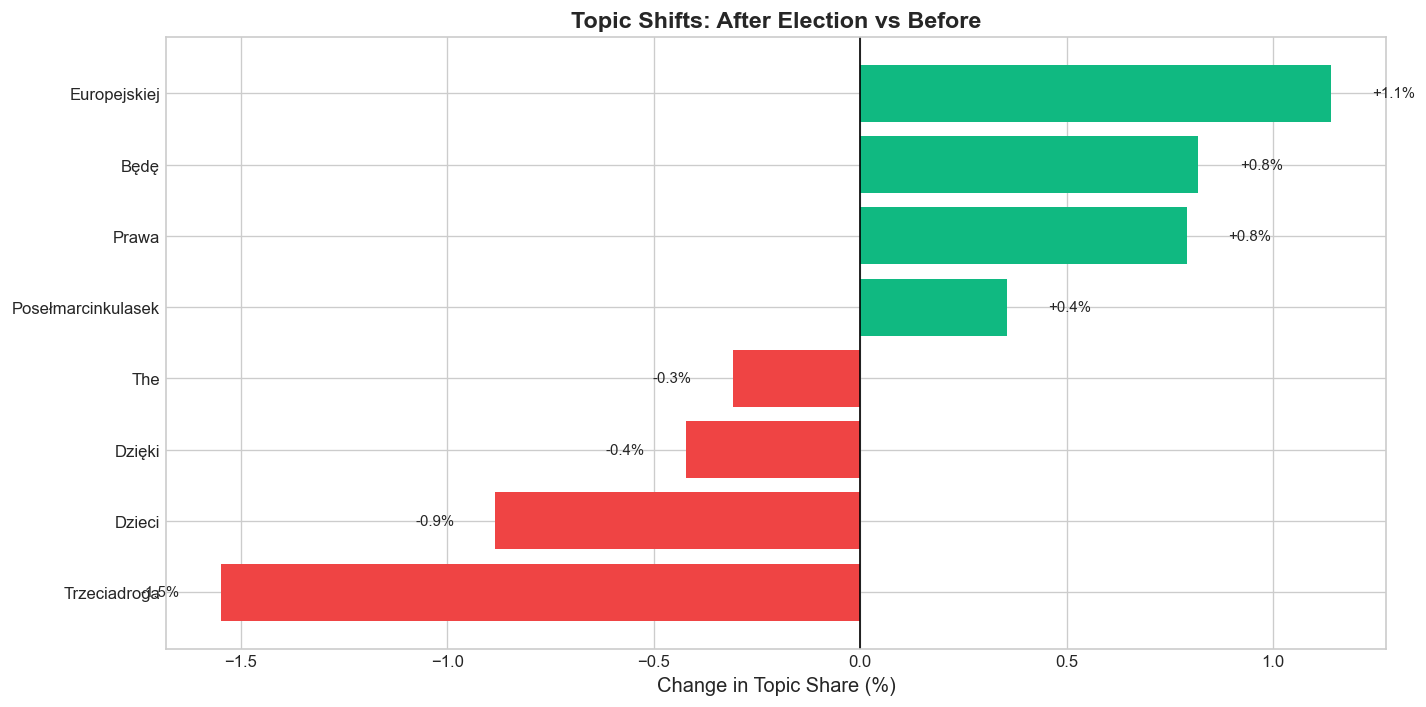

✅ Saved: 27_topic_shifts_election.png

📊 Creating Figure 28: Time Window Heatmap...


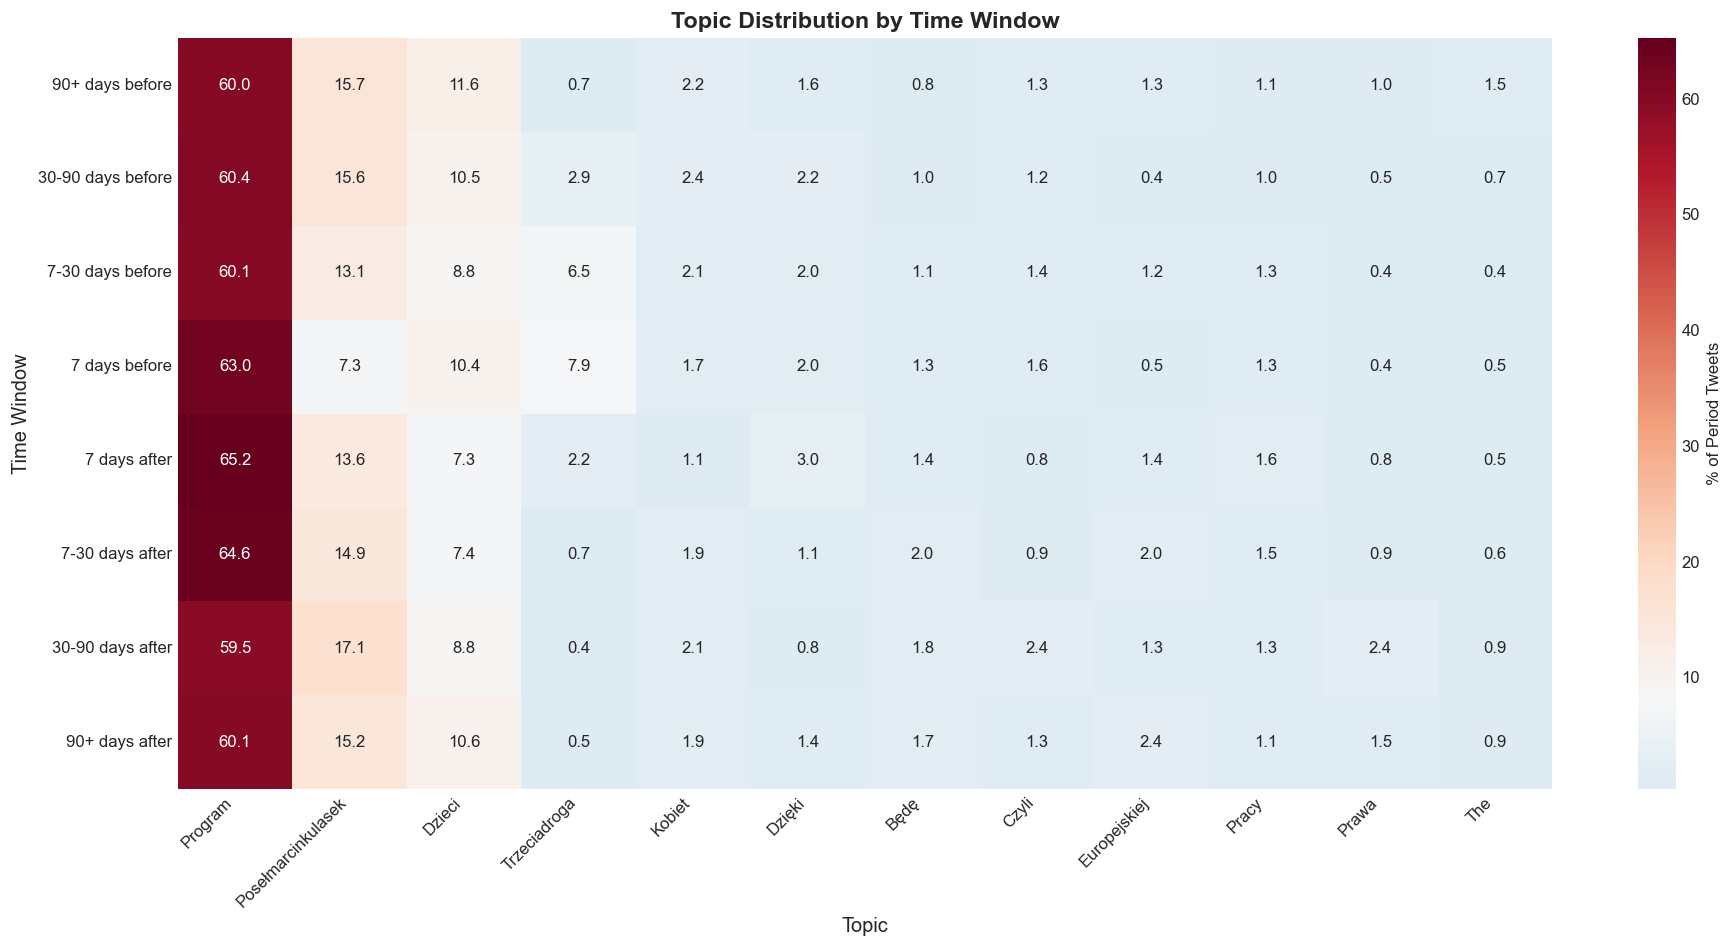

✅ Saved: 28_time_window_heatmap.png

📊 Creating Figure 29: Party Topic Shifts...


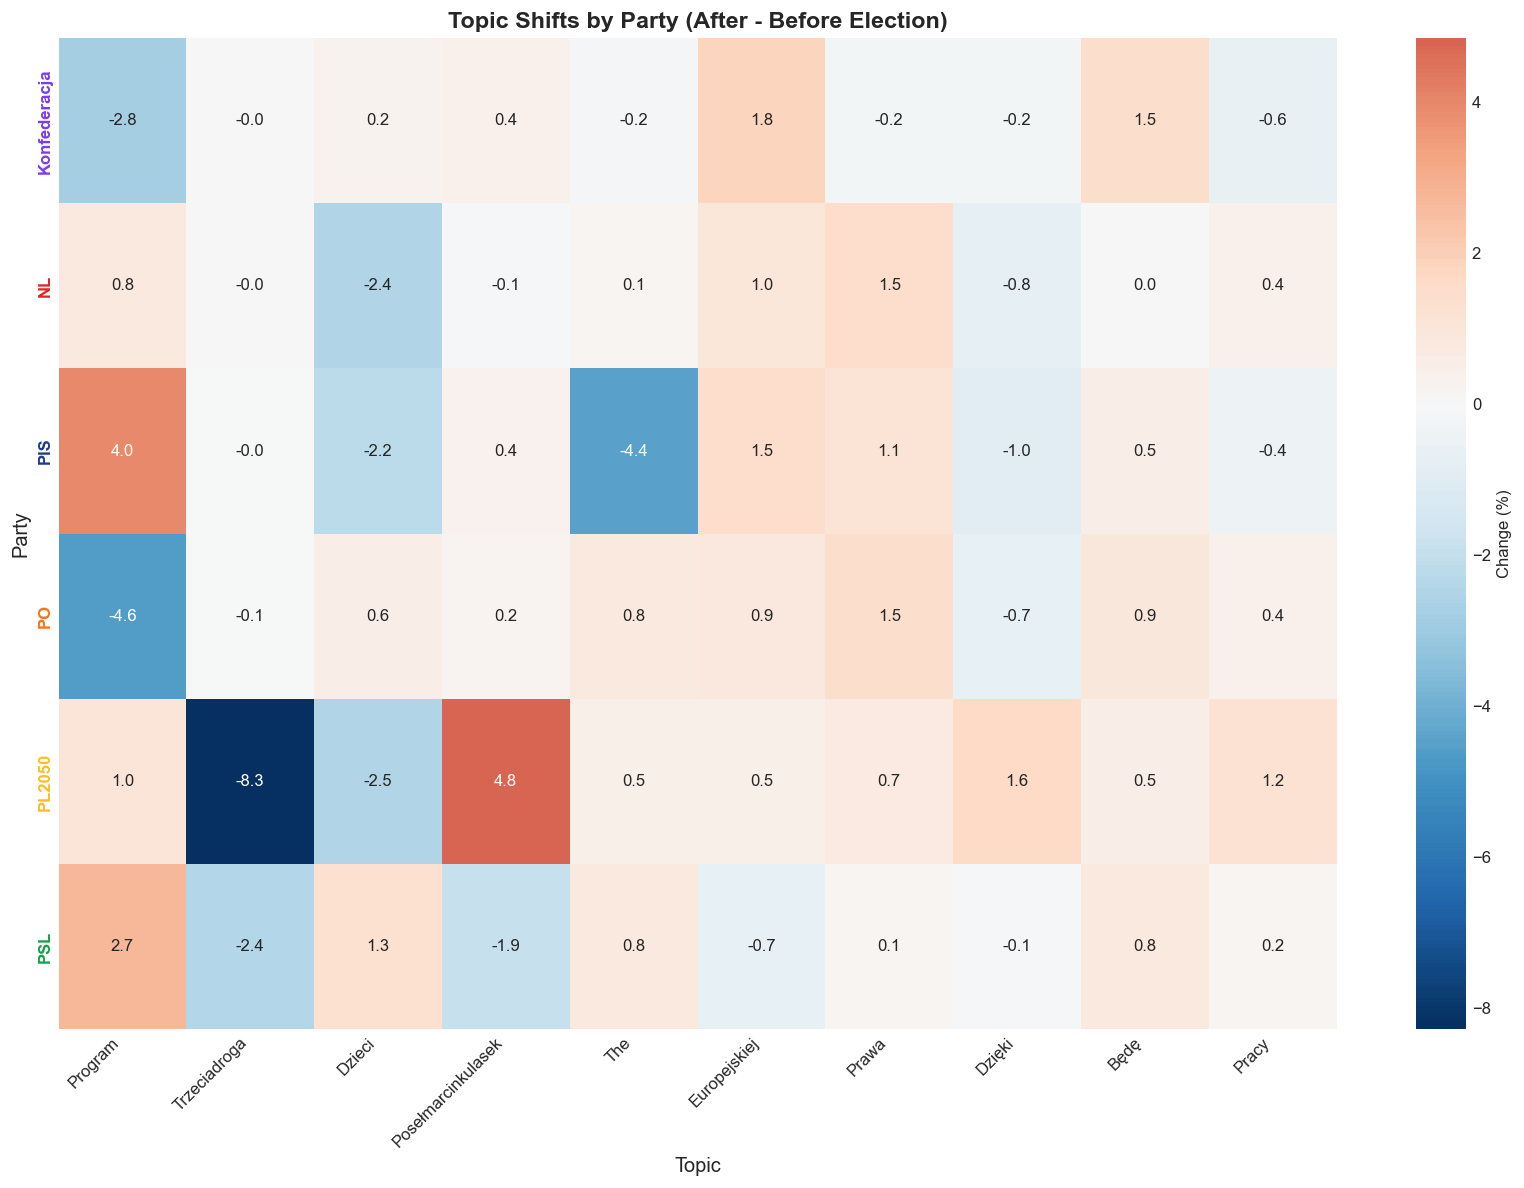

✅ Saved: 29_party_topic_shifts.png

📊 Creating Figure 30: Party Comparison...


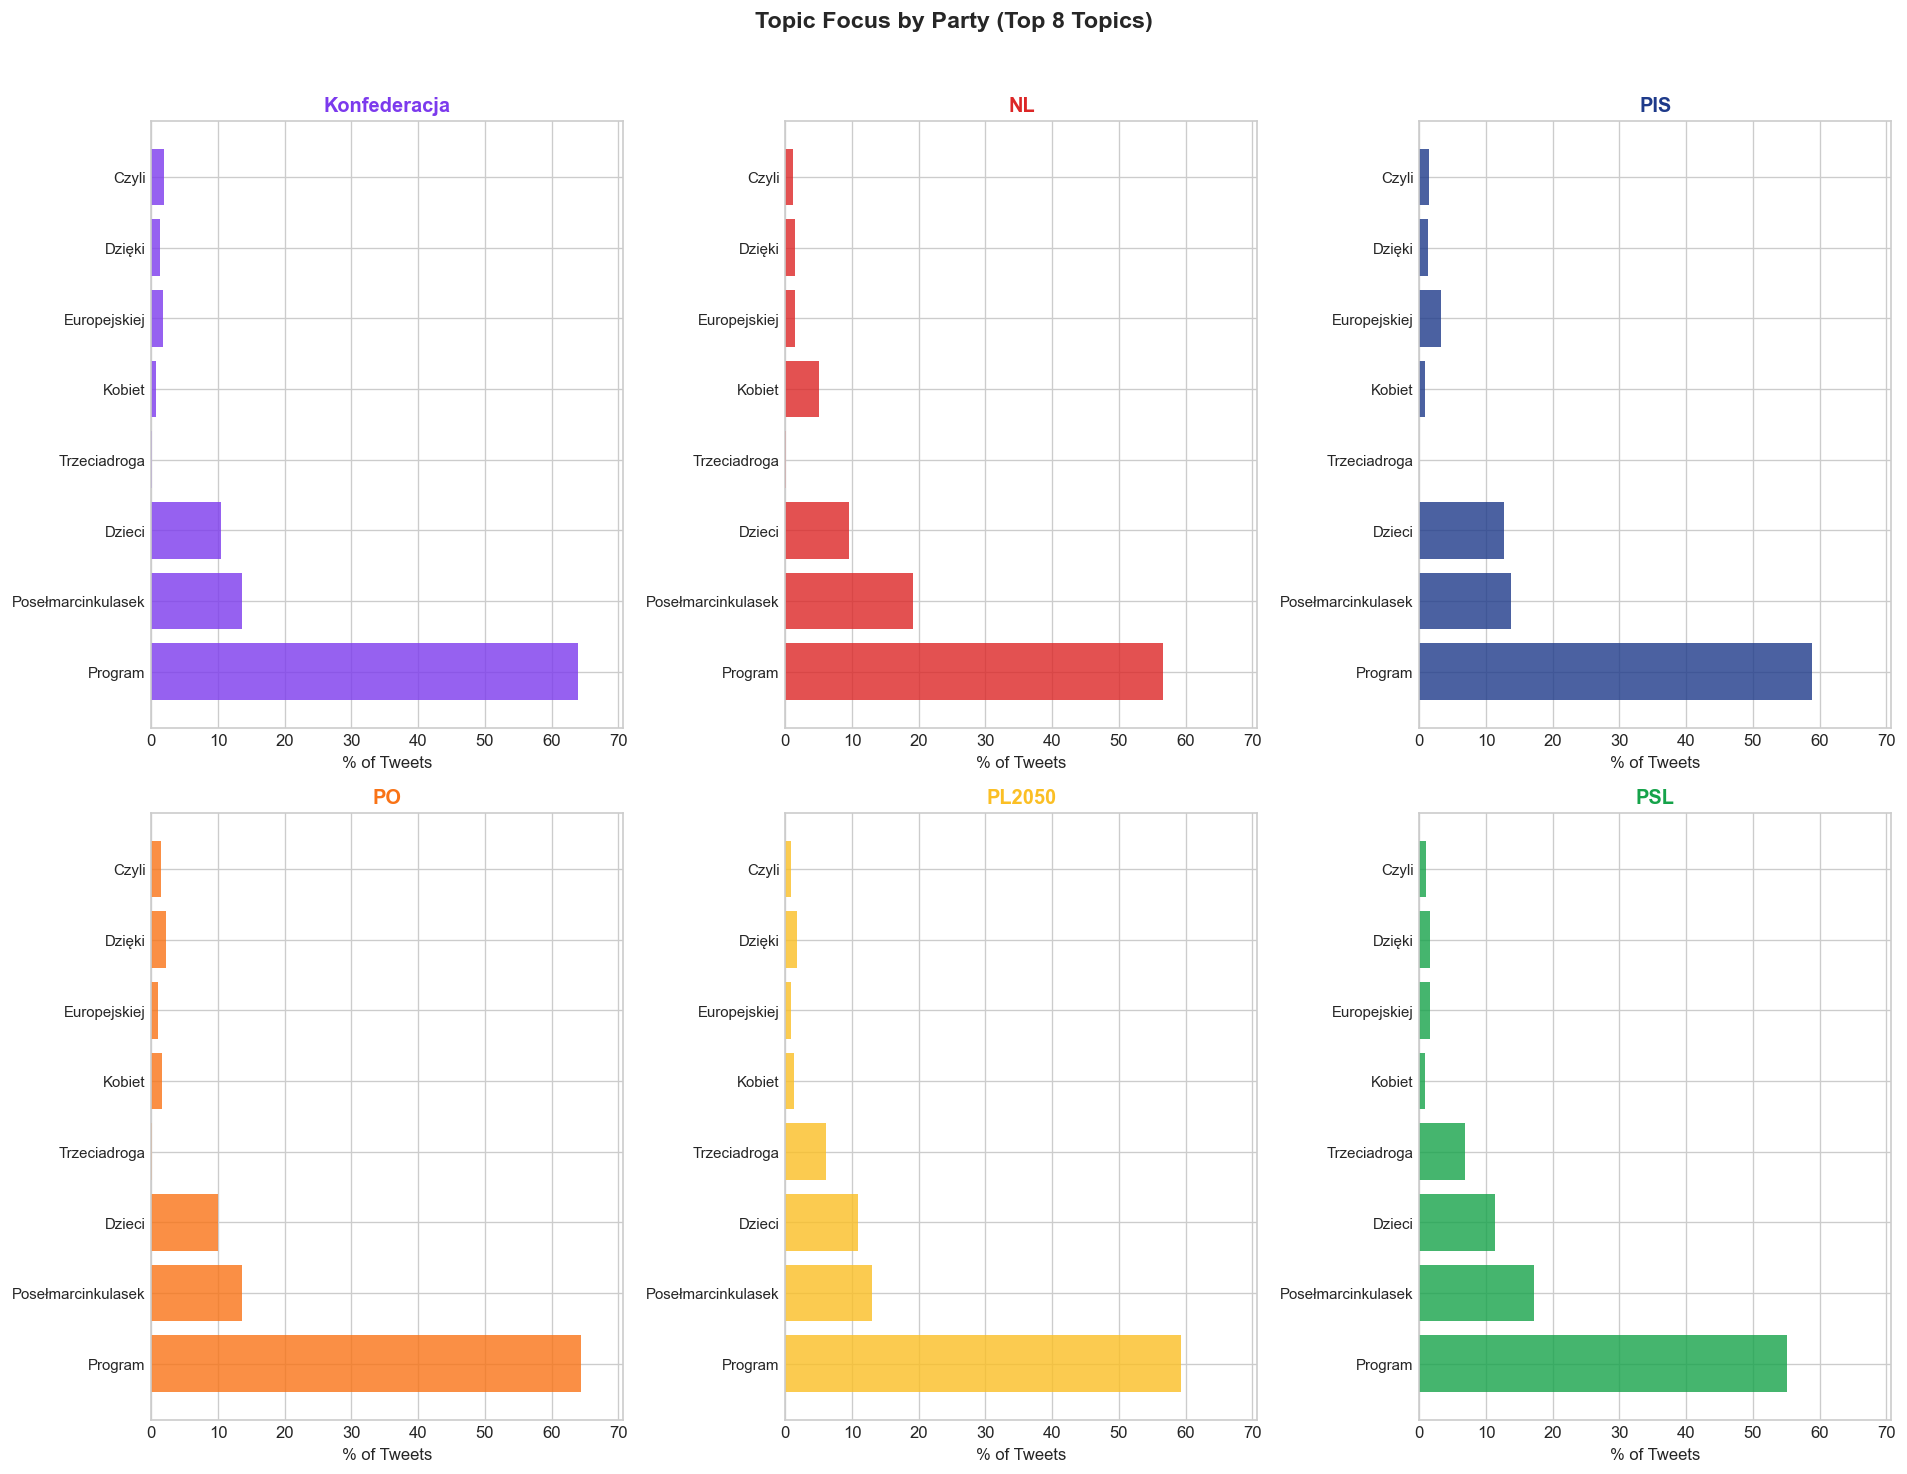

✅ Saved: 30_party_comparison.png

📊 Creating Figure 31: Most Divisive Topics...


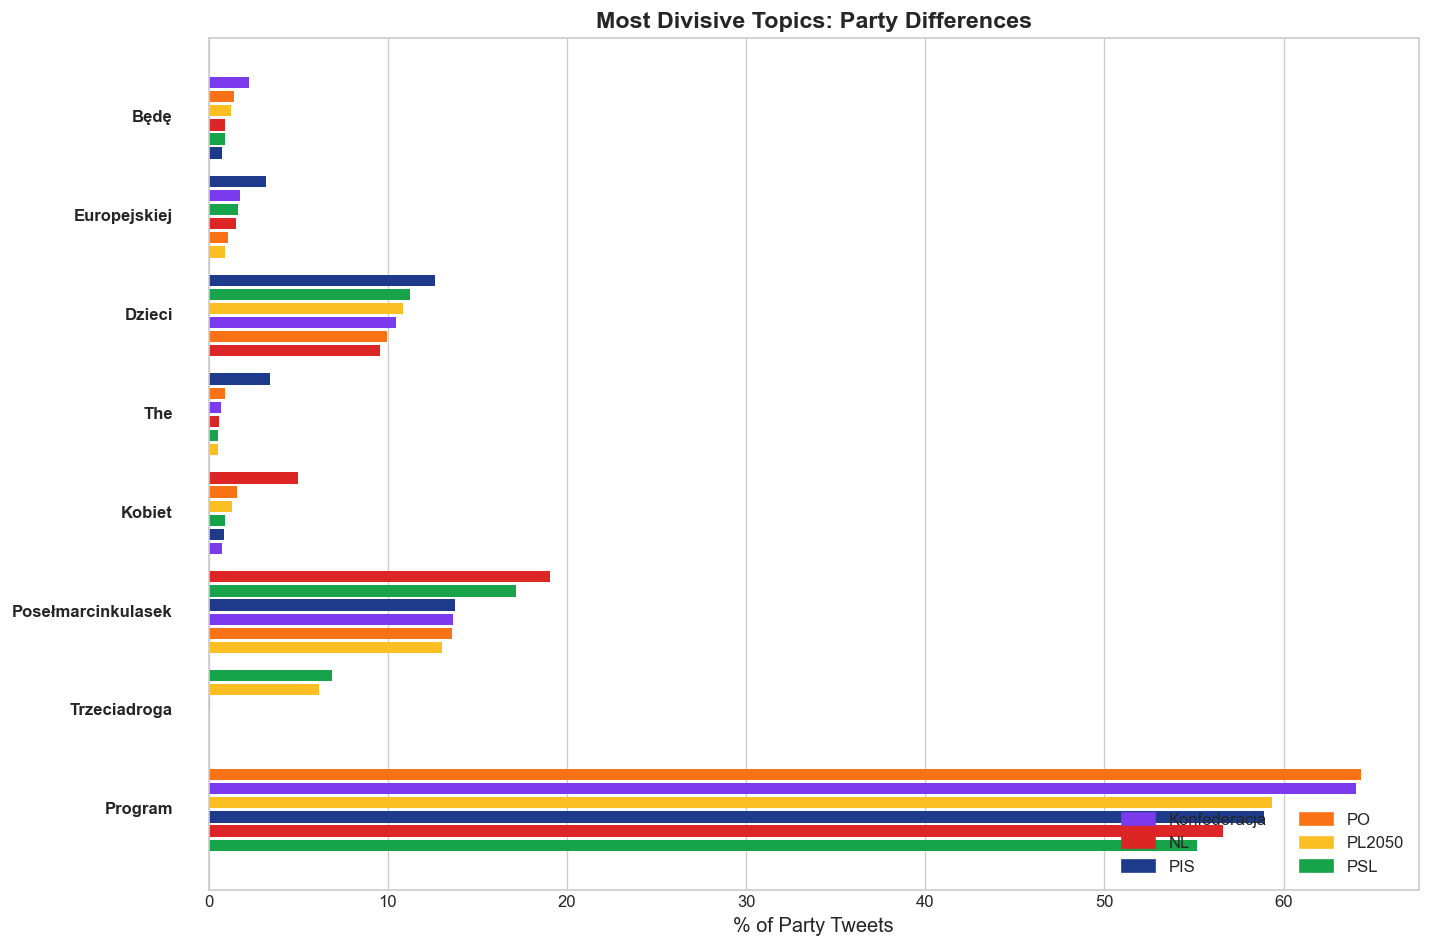

✅ Saved: 31_most_divisive_topics.png

10. GENERATING SUMMARY REPORT
✅ Saved: ../results_topic_modelling\reports\topic_modeling_report_20251231_022249.txt

TOPIC MODELING SUMMARY REPORT
Generated: 20251231_022249

DATA SUMMARY
------------
Total tweets analyzed: 40,644
Number of topics: 20
Largest topic: 60.3%

TOPICS BY SIZE
--------------
nmf_topic_label
Program               24497
Posełmarcinkulasek     6198
Dzieci                 4293
Kobiet                  843
Europejskiej            681
Dzięki                  630
Czyli                   553
Będę                    545
Trzeciadroga            495
Prawa                   494
Pracy                   466
The                     427
Dobrze                  271
Kolejny                  94
Dalej                    86

TOPIC DISTRIBUTION BY PARTY
---------------------------
nmf_topic_label  Będę  Czyli  Dalej  Dobrze  Dzieci  Dzięki  Europejskiej  Kampanii  Kobiet  Kolejny  Posełmarcinkulasek  Pracy  Prawa  Program  The  Trzeciadroga
pa

In [18]:
# =============================================================================
# 04C_TOPIC_MODELING_VISUALIZATIONS - Part 3: Visualizations & Reports
# Polish Politicians Twitter - Topic Modeling Project
# =============================================================================
#
# This is PART 3 of the topic modeling pipeline:
# - Load data with topics
# - Generate all visualizations
# - Create summary report
#
# Input: df_with_topics.parquet (from Part 2)
# Output: Figures (25-30), summary report
#
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import os
import glob

warnings.filterwarnings('ignore')

start_time = time.time()
timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

# Plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10
plt.ion()

# Folders
BASE_DIR = '../results_topic_modelling'
DIRS = {
    'data': os.path.join(BASE_DIR, 'data'),
    'figures': os.path.join(BASE_DIR, 'figures'),
    'tables': os.path.join(BASE_DIR, 'tables'),
    'reports': os.path.join(BASE_DIR, 'reports'),
}

# Party colors
PARTY_COLORS = {
    'PIS': '#1E3A8A', 'PO': '#F97316', 'NL': '#DC2626',
    'PSL': '#16A34A', 'Konfederacja': '#7C3AED', 'PL2050': '#FBBF24',
}

def get_party_color(party):
    return PARTY_COLORS.get(party, '#6B7280')

print("="*70)
print("PART 3: VISUALIZATIONS & REPORTS")
print("="*70)

# =============================================================================
# 1. LOAD DATA
# =============================================================================

print("\n" + "="*70)
print("1. LOADING DATA WITH TOPICS")
print("="*70)

# Find latest data with topics
files = glob.glob(os.path.join(DIRS['data'], 'df_with_topics_*.parquet'))
if not files:
    raise FileNotFoundError("No data with topics found. Run 04B first.")

latest = max(files, key=os.path.getctime)
df_tm = pd.read_parquet(latest)

print(f"📂 Loaded: {latest}")
print(f"✅ Data: {len(df_tm):,} tweets with topics")

# Check required columns
required = ['nmf_topic', 'nmf_topic_label', 'party', 'period_parliamentary']
for col in required:
    if col not in df_tm.columns:
        raise KeyError(f"Missing required column: {col}")

print(f"   Topics: {df_tm['nmf_topic'].nunique()}")
print(f"   Parties: {df_tm['party'].nunique()}")

# =============================================================================
# 2. PREPARE DATA FOR VISUALIZATIONS
# =============================================================================

print("\n" + "="*70)
print("2. PREPARING DATA")
print("="*70)

# Topic by party
topic_by_party = pd.crosstab(
    df_tm['party'], 
    df_tm['nmf_topic_label'], 
    normalize='index'
) * 100

# Topic by period
topic_by_period = pd.crosstab(
    df_tm['period_parliamentary'],
    df_tm['nmf_topic_label'],
    normalize='index'
) * 100

# Topic shifts
if 'Before Election' in topic_by_period.index and 'After Election' in topic_by_period.index:
    topic_shifts = topic_by_period.loc['After Election'] - topic_by_period.loc['Before Election']
    topic_shifts = topic_shifts.sort_values()
else:
    topic_shifts = None

# Time window analysis
window_order = [
    '90+ days before', '30-90 days before', '7-30 days before', '7 days before',
    '7 days after', '7-30 days after', '30-90 days after', '90+ days after'
]

if 'time_window' in df_tm.columns:
    topic_by_window = pd.crosstab(
        df_tm['time_window'],
        df_tm['nmf_topic_label'],
        normalize='index'
    ) * 100
    topic_by_window = topic_by_window.reindex([w for w in window_order if w in topic_by_window.index])
else:
    topic_by_window = None

# Party shifts
party_shifts = {}
for party in df_tm['party'].unique():
    party_data = df_tm[df_tm['party'] == party]
    
    before = party_data[party_data['period_parliamentary'] == 'Before Election']['nmf_topic_label'].value_counts(normalize=True) * 100
    after = party_data[party_data['period_parliamentary'] == 'After Election']['nmf_topic_label'].value_counts(normalize=True) * 100
    
    all_topics = set(before.index) | set(after.index)
    before = before.reindex(all_topics, fill_value=0)
    after = after.reindex(all_topics, fill_value=0)
    
    party_shifts[party] = after - before

party_shifts_df = pd.DataFrame(party_shifts)

print("✅ Data prepared for visualization")

# =============================================================================
# 3. FIGURE 25: TOPIC DISTRIBUTION
# =============================================================================

print("\n" + "="*70)
print("3. GENERATING VISUALIZATIONS")
print("="*70)

print("\n📊 Creating Figure 25: Topic Distribution...")

fig, ax = plt.subplots(figsize=(14, 10))

topic_counts = df_tm['nmf_topic_label'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 0.8, len(topic_counts)))

bars = ax.barh(range(len(topic_counts)), topic_counts.values, color=colors)
ax.set_yticks(range(len(topic_counts)))
ax.set_yticklabels(topic_counts.index, fontsize=10)
ax.set_xlabel('Number of Tweets', fontsize=12)
ax.set_title('Topic Distribution (NMF)', fontsize=14, fontweight='bold')

# Add percentage labels
for i, (count, pct) in enumerate(zip(topic_counts.values, topic_counts.values/len(df_tm)*100)):
    ax.text(count + max(topic_counts)*0.01, i, f'{pct:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '25_topic_distribution.png'), dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 25_topic_distribution.png")

# =============================================================================
# 4. FIGURE 26: TOPICS BY PARTY HEATMAP
# =============================================================================

print("\n📊 Creating Figure 26: Topics by Party...")

fig, ax = plt.subplots(figsize=(16, 8))

# Only show topics with >1% share
major_topics = topic_by_party.columns[topic_by_party.max() > 1]
if len(major_topics) > 15:
    major_topics = topic_by_party[major_topics].max().nlargest(15).index

sns.heatmap(topic_by_party[major_topics], annot=True, fmt='.1f', cmap='YlOrRd',
           cbar_kws={'label': '% of Party Tweets'}, ax=ax)

ax.set_title('Topic Distribution by Party', fontsize=14, fontweight='bold')
ax.set_xlabel('Topic', fontsize=12)
ax.set_ylabel('Party', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Color party labels
for i, party in enumerate(topic_by_party.index):
    ax.get_yticklabels()[i].set_color(get_party_color(party))
    ax.get_yticklabels()[i].set_fontweight('bold')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '26_topics_by_party_heatmap.png'), dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 26_topics_by_party_heatmap.png")

# =============================================================================
# 5. FIGURE 27: TOPIC SHIFTS
# =============================================================================

print("\n📊 Creating Figure 27: Topic Shifts...")

if topic_shifts is not None:
    # Filter to significant shifts only
    significant_shifts = topic_shifts[abs(topic_shifts) > 0.3]
    
    fig, ax = plt.subplots(figsize=(12, max(6, len(significant_shifts)*0.4)))
    
    colors = ['#10B981' if x > 0 else '#EF4444' for x in significant_shifts.values]
    
    ax.barh(range(len(significant_shifts)), significant_shifts.values, color=colors)
    ax.set_yticks(range(len(significant_shifts)))
    ax.set_yticklabels(significant_shifts.index, fontsize=10)
    ax.axvline(x=0, color='black', linewidth=1)
    ax.set_xlabel('Change in Topic Share (%)', fontsize=12)
    ax.set_title('Topic Shifts: After Election vs Before', fontsize=14, fontweight='bold')
    
    # Add labels
    for i, v in enumerate(significant_shifts.values):
        ax.text(v + (0.1 if v > 0 else -0.1), i, f'{v:+.1f}%', 
               va='center', ha='left' if v > 0 else 'right', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(os.path.join(DIRS['figures'], '27_topic_shifts_election.png'), dpi=150, bbox_inches='tight')
    plt.show()
    print("✅ Saved: 27_topic_shifts_election.png")
else:
    print("⚠️ Skipping: No period data available")

# =============================================================================
# 6. FIGURE 28: TIME WINDOW HEATMAP
# =============================================================================

print("\n📊 Creating Figure 28: Time Window Heatmap...")

if topic_by_window is not None and len(topic_by_window) > 0:
    # Select top topics
    top_topics = topic_by_window.mean().nlargest(12).index
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    sns.heatmap(topic_by_window[top_topics], annot=True, fmt='.1f', cmap='RdBu_r',
               center=topic_by_window[top_topics].mean().mean(),
               cbar_kws={'label': '% of Period Tweets'}, ax=ax)
    
    ax.set_title('Topic Distribution by Time Window', fontsize=14, fontweight='bold')
    ax.set_xlabel('Topic', fontsize=12)
    ax.set_ylabel('Time Window', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.savefig(os.path.join(DIRS['figures'], '28_time_window_heatmap.png'), dpi=150, bbox_inches='tight')
    plt.show()
    print("✅ Saved: 28_time_window_heatmap.png")
else:
    print("⚠️ Skipping: No time window data available")

# =============================================================================
# 7. FIGURE 29: PARTY TOPIC SHIFTS
# =============================================================================

print("\n📊 Creating Figure 29: Party Topic Shifts...")

# Select top topics by variance
top_shift_topics = party_shifts_df.abs().mean(axis=1).nlargest(10).index

fig, ax = plt.subplots(figsize=(14, 10))

sns.heatmap(party_shifts_df.loc[top_shift_topics].T, annot=True, fmt='.1f', cmap='RdBu_r',
           center=0, cbar_kws={'label': 'Change (%)'}, ax=ax)

ax.set_title('Topic Shifts by Party (After - Before Election)', fontsize=14, fontweight='bold')
ax.set_xlabel('Topic', fontsize=12)
ax.set_ylabel('Party', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Color party labels
for i, party in enumerate(party_shifts_df.columns):
    ax.get_yticklabels()[i].set_color(get_party_color(party))
    ax.get_yticklabels()[i].set_fontweight('bold')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '29_party_topic_shifts.png'), dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 29_party_topic_shifts.png")

# =============================================================================
# 8. FIGURE 30: PARTY COMPARISON RADAR
# =============================================================================

print("\n📊 Creating Figure 30: Party Comparison...")

fig, axes = plt.subplots(2, 3, figsize=(16, 12))
axes = axes.flatten()

# Get top 8 topics
top_topics = topic_by_party.mean().nlargest(8).index.tolist()

for idx, party in enumerate(df_tm['party'].unique()):
    if idx >= 6:
        break
    
    ax = axes[idx]
    party_data = topic_by_party.loc[party, top_topics]
    
    colors = [get_party_color(party)] * len(party_data)
    ax.barh(range(len(party_data)), party_data.values, color=colors, alpha=0.8)
    ax.set_yticks(range(len(party_data)))
    ax.set_yticklabels(top_topics, fontsize=9)
    ax.set_xlabel('% of Tweets', fontsize=10)
    ax.set_title(f'{party}', fontsize=12, fontweight='bold', color=get_party_color(party))
    ax.set_xlim(0, topic_by_party[top_topics].max().max() * 1.1)

plt.suptitle('Topic Focus by Party (Top 8 Topics)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '30_party_comparison.png'), dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 30_party_comparison.png")

# =============================================================================
# 9. ADDITIONAL FIGURE: MOST DIVISIVE TOPICS
# =============================================================================

print("\n📊 Creating Figure 31: Most Divisive Topics...")

topic_variance = topic_by_party.var().sort_values(ascending=False)
most_divisive = topic_variance.head(8)

fig, ax = plt.subplots(figsize=(12, 8))

for i, topic in enumerate(most_divisive.index):
    topic_data = topic_by_party[topic].sort_values()
    colors = [get_party_color(p) for p in topic_data.index]
    
    y_positions = np.arange(len(topic_data)) + i * (len(topic_data) + 1)
    ax.barh(y_positions, topic_data.values, color=colors, height=0.8)
    ax.text(-2, y_positions.mean(), topic, ha='right', va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('% of Party Tweets', fontsize=12)
ax.set_title('Most Divisive Topics: Party Differences', fontsize=14, fontweight='bold')
ax.set_yticks([])

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=get_party_color(p)) for p in df_tm['party'].unique()]
ax.legend(handles, df_tm['party'].unique(), loc='lower right', ncol=2)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], '31_most_divisive_topics.png'), dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 31_most_divisive_topics.png")

# =============================================================================
# 10. GENERATE SUMMARY REPORT
# =============================================================================

print("\n" + "="*70)
print("10. GENERATING SUMMARY REPORT")
print("="*70)

# Calculate summary stats
n_topics = df_tm['nmf_topic'].nunique()
max_topic = df_tm['nmf_topic_label'].value_counts(normalize=True).max() * 100
topic_distribution = df_tm['nmf_topic_label'].value_counts()

report = f"""
================================================================================
TOPIC MODELING SUMMARY REPORT
Generated: {timestamp}
================================================================================

DATA SUMMARY
------------
Total tweets analyzed: {len(df_tm):,}
Number of topics: {n_topics}
Largest topic: {max_topic:.1f}%

TOPICS BY SIZE
--------------
{topic_distribution.head(15).to_string()}

TOPIC DISTRIBUTION BY PARTY
---------------------------
{topic_by_party.round(1).to_string()}

TOPIC SHIFTS (AFTER - BEFORE ELECTION)
--------------------------------------
{topic_shifts.sort_values().to_string() if topic_shifts is not None else 'N/A'}

FILES GENERATED
---------------
Figures: 7 PNG files (25-31)

================================================================================
"""

report_path = os.path.join(DIRS['reports'], f'topic_modeling_report_{timestamp}.txt')
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report)

print(f"✅ Saved: {report_path}")
print(report[:1500] + "...")

# =============================================================================
# SUMMARY
# =============================================================================

execution_time = time.time() - start_time

print("\n" + "="*70)
print("✅ PART 3 COMPLETE: VISUALIZATIONS")
print("="*70)

print(f"\n📊 Generated 7 figures:")
print(f"   25. Topic distribution")
print(f"   26. Topics by party heatmap")
print(f"   27. Topic shifts (election)")
print(f"   28. Time window heatmap")
print(f"   29. Party topic shifts")
print(f"   30. Party comparison")
print(f"   31. Most divisive topics")

print(f"\n📁 All outputs in: {BASE_DIR}")
print(f"\n⏱️ Execution time: {execution_time:.2f} seconds")

print("\n" + "="*70)
print("TOPIC MODELING PIPELINE COMPLETE!")
print("="*70)

plt.ioff()

In [19]:
# # =============================================================================
# # 05_BERTOPIC - Transformer-Based Topic Modeling
# # Polish Politicians Twitter - Topic Modeling Project
# # =============================================================================
# #
# # This script performs:
# # - BERTopic with Polish/multilingual embeddings
# # - Dynamic topic modeling (topics over time)
# # - Topic hierarchy visualization
# # - Comparison with NMF results
# # - Representative documents per topic
# #
# # Prerequisites:
# # pip install bertopic sentence-transformers umap-learn hdbscan
# #
# # =============================================================================

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# import time
# import os
# import glob

# warnings.filterwarnings('ignore')

# # =============================================================================
# # CONFIGURATION
# # =============================================================================

# start_time = time.time()
# timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.dpi'] = 120
# plt.ion()

# # Party colors
# PARTY_COLORS = {
#     'PIS': '#1E3A8A', 'PO': '#F97316', 'NL': '#DC2626',
#     'PSL': '#16A34A', 'Konfederacja': '#7C3AED', 'PL2050': '#FBBF24',
# }

# # Folder structure
# BASE_DIR = '../results_topic_modelling'
# DIRS = {
#     'data': os.path.join(BASE_DIR, 'data'),
#     'figures': os.path.join(BASE_DIR, 'figures'),
#     'tables': os.path.join(BASE_DIR, 'tables'),
#     'reports': os.path.join(BASE_DIR, 'reports'),
#     'models': os.path.join(BASE_DIR, 'models'),
# }

# for path in DIRS.values():
#     os.makedirs(path, exist_ok=True)

# print("="*70)
# print("BERTOPIC - TRANSFORMER-BASED TOPIC MODELING")
# print("="*70)

# # =============================================================================
# # 1. CHECK DEPENDENCIES
# # =============================================================================

# print("\n" + "="*70)
# print("1. CHECKING DEPENDENCIES")
# print("="*70)

# dependencies_ok = True

# try:
#     from bertopic import BERTopic
#     print("✅ BERTopic installed")
# except ImportError:
#     print("❌ BERTopic not installed. Run: pip install bertopic")
#     dependencies_ok = False

# try:
#     from sentence_transformers import SentenceTransformer
#     print("✅ sentence-transformers installed")
# except ImportError:
#     print("❌ sentence-transformers not installed. Run: pip install sentence-transformers")
#     dependencies_ok = False

# try:
#     from umap import UMAP
#     print("✅ UMAP installed")
# except ImportError:
#     print("❌ UMAP not installed. Run: pip install umap-learn")
#     dependencies_ok = False

# try:
#     from hdbscan import HDBSCAN
#     print("✅ HDBSCAN installed")
# except ImportError:
#     print("❌ HDBSCAN not installed. Run: pip install hdbscan")
#     dependencies_ok = False

# try:
#     from sklearn.feature_extraction.text import CountVectorizer
#     print("✅ scikit-learn installed")
# except ImportError:
#     dependencies_ok = False

# if not dependencies_ok:
#     print("\n⚠️ Please install missing dependencies and re-run.")
#     print("   pip install bertopic sentence-transformers umap-learn hdbscan")
#     exit(1)

# # =============================================================================
# # 2. LOAD DATA
# # =============================================================================

# print("\n" + "="*70)
# print("2. LOADING DATA")
# print("="*70)

# # Try to load data with topics from previous script
# DATA_PATHS = [
#     os.path.join(DIRS['data'], 'df_with_topics_*.parquet'),
#     os.path.join(DIRS['data'], 'df_tm_ready_*.parquet'),
# ]

# df_tm = None
# for path in DATA_PATHS:
#     files = glob.glob(path)
#     if files:
#         latest = max(files, key=os.path.getctime)
#         df_tm = pd.read_parquet(latest)
#         print(f"📂 Loaded: {latest}")
#         break

# if df_tm is None:
#     raise FileNotFoundError("No data found. Run 04_TOPIC_MODELING.py first.")

# print(f"✅ Data: {len(df_tm):,} tweets")

# # Ensure required columns
# if 'text_clean' not in df_tm.columns:
#     raise KeyError("text_clean column not found")

# df_tm['created_at'] = pd.to_datetime(df_tm['created_at'])

# # =============================================================================
# # 3. CUSTOM STOPWORDS FOR BERTOPIC
# # =============================================================================

# print("\n" + "="*70)
# print("3. SETTING UP STOPWORDS")
# print("="*70)

# # Extended stopwords (same as 04_TOPIC_MODELING.py)
# CUSTOM_STOPWORDS = [
#     # Standard Polish
#     'i', 'w', 'z', 'na', 'do', 'nie', 'to', 'że', 'się', 'o', 'jak', 'ale',
#     'po', 'co', 'tak', 'za', 'od', 'czy', 'tego', 'jest', 'a', 'oraz',
#     'już', 'tylko', 'przez', 'dla', 'może', 'będzie', 'tej', 'tym', 'być',
#     'te', 'ten', 'ta', 'które', 'który', 'która', 'są', 'został', 'bardzo',
    
#     # Media noise
#     'nażywo', 'debatadnia', 'zapraszam', 'antenie', 'program', 'audycja',
    
#     # Twitter noise
#     'rt', 'http', 'https', 'www', 'com', 'pl', 'twitter', 'pic',
    
#     # Typos from your data
#     'prosze', 'dziekuje', 'bedzie', 'naprawde',
    
#     # Generic political
#     'polityka', 'polska', 'polski', 'polskie', 'polskiego',
# ]

# # Create vectorizer with stopwords
# vectorizer_model = CountVectorizer(
#     stop_words=CUSTOM_STOPWORDS,
#     min_df=10,
#     ngram_range=(1, 2)
# )

# print(f"✅ Stopwords: {len(CUSTOM_STOPWORDS)}")

# # # =============================================================================
# # # 4. CONFIGURE BERTOPIC
# # # =============================================================================

# # print("\n" + "="*70)
# # print("4. CONFIGURING BERTOPIC")
# # print("="*70)

# # # Choose embedding model
# # # Options for Polish:
# # # 1. 'paraphrase-multilingual-MiniLM-L12-v2' - Good balance
# # # 2. 'distiluse-base-multilingual-cased-v2' - Faster
# # # 3. 'sdadas/st-polish-paraphrase-from-distilroberta' - Best for Polish (if available)

# # print("   Loading embedding model...")
# # try:
# #     # Try Polish-specific model first
# #     embedding_model = SentenceTransformer('sdadas/st-polish-paraphrase-from-distilroberta')
# #     print("   ✅ Using Polish-specific model: sdadas/st-polish-paraphrase-from-distilroberta")
# # except:
# #     # Fall back to multilingual
# #     embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
# #     print("   ✅ Using multilingual model: paraphrase-multilingual-MiniLM-L12-v2")

# # # UMAP configuration
# # umap_model = UMAP(
# #     n_neighbors=15,
# #     n_components=5,
# #     min_dist=0.0,
# #     metric='cosine',
# #     random_state=42,
# #     low_memory=True
# # )

# # # HDBSCAN configuration
# # hdbscan_model = HDBSCAN(
# #     min_cluster_size=50,      # Minimum documents per topic
# #     min_samples=10,
# #     metric='euclidean',
# #     cluster_selection_method='eom',  # 'eom' or 'leaf'
# #     prediction_data=True
# # )

# # print("   ✅ UMAP configured (n_neighbors=15, n_components=5)")
# # print("   ✅ HDBSCAN configured (min_cluster_size=50)")

# # # =============================================================================
# # # 5. FIT BERTOPIC
# # # =============================================================================

# # print("\n" + "="*70)
# # print("5. FITTING BERTOPIC")
# # print("="*70)

# # print("   This may take several minutes...")

# # # Initialize BERTopic
# # topic_model = BERTopic(
# #     embedding_model=embedding_model,
# #     umap_model=umap_model,
# #     hdbscan_model=hdbscan_model,
# #     vectorizer_model=vectorizer_model,
# #     language='multilingual',
# #     top_n_words=10,
# #     nr_topics='auto',  # Let model decide, or set specific number like 20
# #     verbose=True,
# #     calculate_probabilities=True
# # )

# # # Get documents
# # docs = df_tm['text_clean'].tolist()

# # # Fit
# # topics, probs = topic_model.fit_transform(docs)

# # # Add to dataframe
# # df_tm['bertopic_topic'] = topics
# # df_tm['bertopic_prob'] = probs.max(axis=1) if probs.ndim > 1 else probs

# # =============================================================================
# # 4. CONFIGURE BERTOPIC (MEMORY OPTIMIZED)
# # =============================================================================

# print("   Pre-calculating embeddings in batches...")
# # Wybieramy model (małe modele jak MiniLM są znacznie bezpieczniejsze dla RAMu)
# model_name = 'paraphrase-multilingual-MiniLM-L12-v2' 
# embedding_model = SentenceTransformer(model_name)

# # Obliczamy embeddingi ręcznie z małym batchem
# # To zapobiega BSOD podczas fazy kodowania tekstu
# docs = df_tm['text_clean'].astype(str).tolist()
# embeddings = embedding_model.encode(
#     docs, 
#     batch_size=32, # Zmniejsz, jeśli masz mało VRAM/RAM
#     show_progress_bar=True,
#     convert_to_numpy=True
# )

# # UMAP z flagą low_memory
# umap_model = UMAP(
#     n_neighbors=15,
#     n_components=5,
#     min_dist=0.0,
#     metric='cosine',
#     random_state=42,
#     low_memory=True  # KLUCZOWE: oszczędza RAM kosztem czasu
# )

# # HDBSCAN - wyłączamy prediction_data jeśli nie potrzebujesz robić transform na nowych danych
# hdbscan_model = HDBSCAN(
#     min_cluster_size=50,
#     metric='euclidean',
#     cluster_selection_method='eom',
#     prediction_data=False 
# )

# # =============================================================================
# # 5. FIT BERTOPIC
# # =============================================================================

# topic_model = BERTopic(
#     embedding_model=embedding_model,
#     umap_model=umap_model,
#     hdbscan_model=hdbscan_model,
#     vectorizer_model=vectorizer_model,
#     language='multilingual',
#     nr_topics='auto',
#     calculate_probabilities=False, # KLUCZOWE: zapobiega MemoryError przy dużych zbiorach
#     verbose=True
# )

# # Przekazujemy gotowe embeddingi, aby BERTopic nie musiał ich liczyć ponownie
# topics, _ = topic_model.fit_transform(docs, embeddings)

# # Ponieważ wyłączyliśmy probabilities, przypisujemy tylko główny temat
# df_tm['bertopic_topic'] = topics
# df_tm['bertopic_prob'] = 1.0 # Albo zostaw puste

# # Get topic info
# topic_info = topic_model.get_topic_info()

# print(f"\n✅ BERTopic Results:")
# print(f"   Topics found: {len(topic_info) - 1}")  # Exclude outlier topic (-1)
# print(f"   Outliers: {(df_tm['bertopic_topic'] == -1).sum():,} ({(df_tm['bertopic_topic'] == -1).mean()*100:.1f}%)")

# # Display topics
# print(f"\n📊 BERTopic Topics:")
# print("-" * 70)
# for _, row in topic_info.head(20).iterrows():
#     if row['Topic'] != -1:
#         print(f"Topic {row['Topic']:3d} ({row['Count']:5,} docs): {row['Name'][:60]}")

# # =============================================================================
# # 6. GENERATE TOPIC LABELS
# # =============================================================================

# print("\n" + "="*70)
# print("6. GENERATING TOPIC LABELS")
# print("="*70)

# # Generate readable labels
# topic_labels = topic_model.generate_topic_labels(
#     nr_words=3,
#     topic_prefix=False,
#     separator=", "
# )
# topic_model.set_topic_labels(topic_labels)

# # Create label mapping
# label_map = {row['Topic']: row['Name'] for _, row in topic_model.get_topic_info().iterrows()}
# df_tm['bertopic_label'] = df_tm['bertopic_topic'].map(label_map)

# print("✅ Topic labels generated")

# # =============================================================================
# # 7. TOPIC DISTRIBUTION BY PARTY
# # =============================================================================

# print("\n" + "="*70)
# print("7. TOPIC DISTRIBUTION BY PARTY")
# print("="*70)

# # Exclude outliers for analysis
# df_valid = df_tm[df_tm['bertopic_topic'] != -1].copy()

# # Cross-tabulation
# bt_by_party = pd.crosstab(
#     df_valid['party'],
#     df_valid['bertopic_topic'],
#     normalize='index'
# ) * 100

# print("\n📊 BERTopic Distribution by Party (%):")
# print(bt_by_party.round(1).to_string())

# # =============================================================================
# # 8. TOPICS OVER TIME
# # =============================================================================

# print("\n" + "="*70)
# print("8. TOPICS OVER TIME")
# print("="*70)

# try:
#     # Get topics over time
#     timestamps = df_tm['created_at'].tolist()
#     topics_over_time = topic_model.topics_over_time(
#         docs,
#         timestamps,
#         nr_bins=20  # Number of time bins
#     )
    
#     print("✅ Topics over time calculated")
#     TOPICS_OVER_TIME_AVAILABLE = True
# except Exception as e:
#     print(f"⚠️ Topics over time failed: {e}")
#     TOPICS_OVER_TIME_AVAILABLE = False

# # =============================================================================
# # 9. REPRESENTATIVE DOCUMENTS
# # =============================================================================

# print("\n" + "="*70)
# print("9. REPRESENTATIVE DOCUMENTS")
# print("="*70)

# def get_representative_docs(df, topic_col, text_col, n=3):
#     """Get representative documents for each topic"""
#     representatives = {}
    
#     for topic in df[topic_col].unique():
#         if topic == -1:
#             continue
        
#         topic_docs = df[df[topic_col] == topic].head(n)
#         representatives[topic] = []
        
#         for _, row in topic_docs.iterrows():
#             representatives[topic].append({
#                 'party': row['party'],
#                 'text': row[text_col][:200]
#             })
    
#     return representatives

# print("\n📋 Representative Tweets per Topic (Top 3):")
# print("="*70)

# for topic_id in sorted(df_valid['bertopic_topic'].unique())[:10]:
#     topic_name = label_map.get(topic_id, f"Topic {topic_id}")
#     topic_docs = df_valid[df_valid['bertopic_topic'] == topic_id]
    
#     print(f"\n🔹 Topic {topic_id}: {topic_name}")
#     print(f"   Documents: {len(topic_docs):,}")
    
#     for _, row in topic_docs.head(2).iterrows():
#         print(f"   [{row['party']}] {row['text_clean'][:150]}...")

# # =============================================================================
# # 10. VISUALIZATIONS
# # =============================================================================

# print("\n" + "="*70)
# print("10. GENERATING VISUALIZATIONS")
# print("="*70)

# # -----------------------------------------------------------------------------
# # FIGURE 31: BERTopic Overview
# # -----------------------------------------------------------------------------

# print("\n📊 Creating Figure 31: Topic Overview...")

# # Get topic counts (excluding outliers)
# topic_counts = df_valid['bertopic_topic'].value_counts().head(20)
# topic_names = [label_map.get(t, f"Topic {t}") for t in topic_counts.index]

# fig, ax = plt.subplots(figsize=(14, 10))

# colors = plt.cm.viridis(np.linspace(0, 0.8, len(topic_counts)))
# ax.barh(range(len(topic_counts)), topic_counts.values, color=colors)
# ax.set_yticks(range(len(topic_counts)))
# ax.set_yticklabels([f"T{t}: {n[:40]}" for t, n in zip(topic_counts.index, topic_names)], fontsize=9)
# ax.set_xlabel('Number of Documents')
# ax.set_title('BERTopic: Top 20 Topics', fontsize=14, fontweight='bold')

# plt.tight_layout()
# plt.savefig(os.path.join(DIRS['figures'], '31_bertopic_overview.png'), dpi=150, bbox_inches='tight')
# plt.show()
# print("✅ Saved: 31_bertopic_overview.png")

# # -----------------------------------------------------------------------------
# # FIGURE 32: BERTopic by Party Heatmap
# # -----------------------------------------------------------------------------

# print("\n📊 Creating Figure 32: BERTopic by Party...")

# # Get top 15 topics
# top_topics = topic_counts.head(15).index.tolist()
# bt_by_party_top = bt_by_party[top_topics]

# fig, ax = plt.subplots(figsize=(16, 8))

# sns.heatmap(bt_by_party_top, annot=True, fmt='.1f', cmap='YlOrRd',
#            cbar_kws={'label': '% of Party Tweets'}, ax=ax)

# ax.set_title('BERTopic Distribution by Party (Top 15 Topics)', fontsize=14, fontweight='bold')
# ax.set_xlabel('Topic ID')
# ax.set_ylabel('Party')

# plt.tight_layout()
# plt.savefig(os.path.join(DIRS['figures'], '32_bertopic_by_party.png'), dpi=150, bbox_inches='tight')
# plt.show()
# print("✅ Saved: 32_bertopic_by_party.png")

# # -----------------------------------------------------------------------------
# # FIGURE 33: Interactive Visualizations (HTML)
# # -----------------------------------------------------------------------------

# print("\n📊 Creating interactive visualizations...")

# try:
#     # Topic visualization
#     fig_topics = topic_model.visualize_topics()
#     fig_topics.write_html(os.path.join(DIRS['figures'], '33_bertopic_intertopic_distance.html'))
#     print("✅ Saved: 33_bertopic_intertopic_distance.html")
# except Exception as e:
#     print(f"⚠️ Intertopic distance map failed: {e}")

# try:
#     # Barchart
#     fig_barchart = topic_model.visualize_barchart(top_n_topics=15, n_words=8)
#     fig_barchart.write_html(os.path.join(DIRS['figures'], '34_bertopic_barchart.html'))
#     print("✅ Saved: 34_bertopic_barchart.html")
# except Exception as e:
#     print(f"⚠️ Barchart failed: {e}")

# try:
#     # Hierarchy
#     hierarchical_topics = topic_model.hierarchical_topics(docs)
#     fig_hierarchy = topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)
#     fig_hierarchy.write_html(os.path.join(DIRS['figures'], '35_bertopic_hierarchy.html'))
#     print("✅ Saved: 35_bertopic_hierarchy.html")
# except Exception as e:
#     print(f"⚠️ Hierarchy failed: {e}")

# try:
#     # Topics over time
#     if TOPICS_OVER_TIME_AVAILABLE:
#         fig_time = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)
#         fig_time.write_html(os.path.join(DIRS['figures'], '36_bertopic_over_time.html'))
#         print("✅ Saved: 36_bertopic_over_time.html")
# except Exception as e:
#     print(f"⚠️ Topics over time visualization failed: {e}")

# # =============================================================================
# # 11. COMPARISON WITH NMF
# # =============================================================================

# print("\n" + "="*70)
# print("11. COMPARISON WITH NMF")
# print("="*70)

# if 'nmf_topic' in df_tm.columns:
#     # Cross-tabulation of BERTopic vs NMF topics
#     cross_topics = pd.crosstab(
#         df_valid['bertopic_topic'],
#         df_valid['nmf_topic'],
#         normalize='index'
#     ) * 100
    
#     print("\n📊 BERTopic vs NMF Topic Alignment:")
#     print("   (Shows % of BERTopic topic assigned to each NMF topic)")
    
#     # Find best alignments
#     for bt_topic in cross_topics.index[:10]:
#         best_nmf = cross_topics.loc[bt_topic].idxmax()
#         best_pct = cross_topics.loc[bt_topic].max()
#         bt_name = label_map.get(bt_topic, f"BT-{bt_topic}")[:30]
#         print(f"   BT {bt_topic:3d} ({bt_name:30s}) → NMF {best_nmf:2d} ({best_pct:.1f}%)")
# else:
#     print("   NMF topics not found. Run 04_TOPIC_MODELING.py first for comparison.")

# # =============================================================================
# # 12. SAVE RESULTS
# # =============================================================================

# print("\n" + "="*70)
# print("12. SAVING RESULTS")
# print("="*70)

# # Topic info
# topic_info.to_csv(os.path.join(DIRS['tables'], f'bertopic_info_{timestamp}.csv'), index=False)
# print(f"✅ Saved: bertopic_info_{timestamp}.csv")

# # Topic by party
# bt_by_party.to_csv(os.path.join(DIRS['tables'], f'bertopic_by_party_{timestamp}.csv'))
# print(f"✅ Saved: bertopic_by_party_{timestamp}.csv")

# # Topics over time
# if TOPICS_OVER_TIME_AVAILABLE:
#     topics_over_time.to_csv(os.path.join(DIRS['tables'], f'bertopic_over_time_{timestamp}.csv'), index=False)
#     print(f"✅ Saved: bertopic_over_time_{timestamp}.csv")

# # Save model
# try:
#     model_path = os.path.join(DIRS['models'], f'bertopic_model_{timestamp}')
#     topic_model.save(model_path)
#     print(f"✅ Saved: bertopic_model_{timestamp}")
# except Exception as e:
#     print(f"⚠️ Model save failed: {e}")

# # Update dataframe with BERTopic results
# df_tm.to_parquet(os.path.join(DIRS['data'], f'df_with_all_topics_{timestamp}.parquet'), index=False)
# print(f"✅ Saved: df_with_all_topics_{timestamp}.parquet")

# # =============================================================================
# # 13. SUMMARY REPORT
# # =============================================================================

# print("\n" + "="*70)
# print("13. GENERATING SUMMARY REPORT")
# print("="*70)

# execution_time = time.time() - start_time

# report = f"""
# ================================================================================
# BERTOPIC SUMMARY REPORT
# Generated: {timestamp}
# ================================================================================

# MODEL CONFIGURATION
# -------------------
# Embedding model: {embedding_model.get_sentence_embedding_dimension()}d
# UMAP: n_neighbors=15, n_components=5
# HDBSCAN: min_cluster_size=50

# RESULTS
# -------
# Topics found: {len(topic_info) - 1}
# Documents: {len(df_tm):,}
# Outliers: {(df_tm['bertopic_topic'] == -1).sum():,} ({(df_tm['bertopic_topic'] == -1).mean()*100:.1f}%)

# TOP 10 TOPICS
# -------------
# {topic_info.head(11).to_string()}

# FILES GENERATED
# ---------------
# Figures: 2 PNG + 4 HTML
# Tables: 3 CSV files
# Model: 1 saved model

# EXECUTION TIME
# --------------
# {execution_time:.2f} seconds ({execution_time/60:.1f} minutes)

# ================================================================================
# """

# report_path = os.path.join(DIRS['reports'], f'bertopic_summary_{timestamp}.txt')
# with open(report_path, 'w', encoding='utf-8') as f:
#     f.write(report)
# print(f"✅ Saved: bertopic_summary_{timestamp}.txt")

# print(report)

# # =============================================================================
# # FINAL OUTPUT
# # =============================================================================

# print("="*70)
# print("✅ BERTOPIC ANALYSIS COMPLETE")
# print("="*70)

# print(f"\n📊 Generated visualizations:")
# print(f"   31. BERTopic overview (PNG)")
# print(f"   32. BERTopic by party (PNG)")
# print(f"   33. Intertopic distance map (HTML)")
# print(f"   34. Topic barchart (HTML)")
# print(f"   35. Topic hierarchy (HTML)")
# print(f"   36. Topics over time (HTML)")

# print(f"\n📁 All outputs saved to: {BASE_DIR}")
# print(f"\n⏱️ Total execution time: {execution_time:.2f} seconds")

# print("\n" + "="*70)
# print("NEXT STEPS:")
# print("1. Open HTML files in browser for interactive exploration")
# print("2. Compare BERTopic with NMF results")
# print("3. Select best topics for thesis presentation")
# print("4. Run 06_FINAL_ANALYSIS.py for thesis-ready outputs")
# print("="*70)

# plt.ioff()

In [20]:
# # Po wykonaniu fit_transform:
# # 1. Zredukuj liczbę outlierów (przypisz je do najbliższych tematów)
# new_topics = topic_model.reduce_outliers(docs, topics, strategy="embeddings")

# # 2. Zaktualizuj tematy w modelu i dataframe
# topic_model.update_topics(docs, topics=new_topics)
# df_tm['bertopic_topic'] = new_topics

# # 3. Wygeneruj tabelę partii ponownie

# VERSION 2 BERT

In [13]:
import os
os.getcwd()

'h:\\01_PROJECTS\\01_GitHub\\004_PythonProjects\\001_Twitter_X\\twitter\\notebooks'

In [14]:
# =============================================================================
# REPRODUCIBILITY SEEDS
# =============================================================================
import random
import numpy as np
import torch

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# For extra determinism (may slow down slightly)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

print(f"🎲 Random seed set: {SEED}")

🎲 Random seed set: 42


In [15]:
# =============================================================================
# 05_BERTOPIC_POLISH_FIXED - With Proper Stopword Handling
# Polish Politicians Twitter - Topic Modeling Project
# =============================================================================
#
# FIXES:
# 1. Stopwords applied BOTH to preprocessing AND vectorizer
# 2. Proper min_df/max_df settings
# 3. Text preprocessing before embedding
# 4. KeyBERTInspired representation for cleaner topics
#
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import os
import glob
import gc
import re

warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION
# =============================================================================

start_time = time.time()
timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 120

# ============================================
# KEY PARAMETER: TARGET NUMBER OF TOPICS
# ============================================
TARGET_TOPICS = 30

# Output directories
BASE_DIR = '../results_topic_modelling'

DIRS = {
    'data': os.path.join(BASE_DIR, 'data'),
    'figures': os.path.join(BASE_DIR, 'figures'),
    'tables': os.path.join(BASE_DIR, 'tables'),
    'models': os.path.join(BASE_DIR, 'models'),
    'reports': os.path.join(BASE_DIR, 'reports'),
}

for path in DIRS.values():
    os.makedirs(path, exist_ok=True)

print("="*70)
print("BERTOPIC - POLISH MODEL WITH PROPER STOPWORDS")
print("="*70)
#print(f"📁 Output directory: {os.path.abspath(BASE_DIR)}")
print(f"📁 Figures output: {os.path.abspath(DIRS['figures'])}")
print(f"🎯 Target topics: {TARGET_TOPICS}")

# =============================================================================
# 1. IMPORTS
# =============================================================================

from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer

# =============================================================================
# 2. COMPREHENSIVE POLISH STOPWORDS
# =============================================================================

print("\n" + "="*70)
print("2. SETTING UP COMPREHENSIVE STOPWORDS")
print("="*70)

# ALL Polish stopwords - function words, pronouns, common verbs
POLISH_STOPWORDS = {
    # === CRITICAL: Basic function words (these were appearing in your topics!) ===
    'i', 'w', 'z', 'na', 'do', 'nie', 'to', 'że', 'się', 'o', 'jak', 'ale',
    'po', 'co', 'tak', 'za', 'od', 'czy', 'tego', 'jest', 'a', 'oraz',
    'już', 'tylko', 'przez', 'dla', 'może', 'będzie', 'tej', 'tym', 'być',
    'te', 'ten', 'ta', 'które', 'który', 'która', 'są', 'został', 'bardzo',
    'ma', 'jej', 'jego', 'ich', 'też', 'wszystko', 'więc', 'kiedy', 'przy',
    'były', 'był', 'była', 'było', 'coś', 'nas', 'nam', 'go', 'je', 'mu', 'mi',
    'mnie', 'ci', 'cię', 'was', 'wam', 'im', 'ją', 'nimi', 'nią', 'nim',
    'sobie', 'siebie', 'sobą', 'lub', 'ani', 'albo', 'lecz', 'ni',
    
    # === Pronouns and determiners ===
    'swój', 'swoje', 'swojego', 'swojej', 'swoim', 'swoją', 'swoi', 'swoich',
    'nasz', 'nasze', 'naszego', 'naszej', 'naszym', 'nasza', 'naszą', 'nasi', 'naszy', 'naszych',
    'wasz', 'wasze', 'waszego', 'waszej', 'waszym', 'wasza', 'waszą',
    'mój', 'moja', 'moje', 'mojego', 'mojej', 'moim', 'moją', 'moi', 'moich',
    'twój', 'twoja', 'twoje', 'twojego', 'twojej', 'twoim', 'twoją',
    'ten', 'ta', 'to', 'tego', 'tej', 'temu', 'tą', 'tym', 'te', 'tych', 'tymi',
    'tamten', 'tamta', 'tamto', 'tamtego', 'tamtej', 'tamtym',
    'taki', 'taka', 'takie', 'takiego', 'takiej', 'takim', 'taką', 'tacy', 'takich',
    'jaki', 'jaka', 'jakie', 'jakiego', 'jakiej', 'jakim', 'jaką', 'jacy', 'jakich',
    'który', 'która', 'które', 'którego', 'której', 'którym', 'którą', 'którzy', 'których',
    'każdy', 'każda', 'każde', 'każdego', 'każdej', 'każdym',
    'żaden', 'żadna', 'żadne', 'żadnego', 'żadnej', 'żadnym',
    'inny', 'inna', 'inne', 'innego', 'innej', 'innym', 'innych', 'innymi',
    'sam', 'sama', 'samo', 'samego', 'samej', 'samym', 'sami', 'same', 'samych',
    'cały', 'cała', 'całe', 'całego', 'całej', 'całym', 'całą',
    'wszyscy', 'wszystkie', 'wszystkich', 'wszystkim', 'wszystkimi',
    'kto', 'kogo', 'komu', 'kim', 'czym', 'czego', 'czemu',
    'nic', 'nikt', 'nigdy', 'nigdzie', 'niczego', 'nikomu', 'nikogo',
    'coś', 'ktoś', 'gdzieś', 'kiedyś', 'jakoś', 'czegoś', 'kogoś', 'komuś',
    
    # === Conjunctions and particles ===
    'że', 'żeby', 'aby', 'by', 'bo', 'bowiem', 'gdyż', 'ponieważ', 'albowiem',
    'jeśli', 'jeżeli', 'gdy', 'kiedy', 'dopóki', 'zanim', 'podczas', 'odkąd',
    'choć', 'chociaż', 'mimo', 'pomimo', 'jednak', 'jednakże', 'aczkolwiek',
    'więc', 'zatem', 'tedy', 'dlatego', 'toteż', 'przeto',
    'ani', 'albo', 'lub', 'bądź', 'czy', 'czyli', 'bądź',
    'też', 'także', 'również', 'nawet', 'właśnie', 'przecież', 'otóż',
    'jeszcze', 'już', 'dopiero', 'tylko', 'jedynie', 'zaledwie', 'ledwo',
    'bardzo', 'bardziej', 'najbardziej', 'mniej', 'najmniej', 'zbyt', 'nazbyt',
    'dużo', 'więcej', 'najwięcej', 'mało', 'trochę', 'nieco', 'sporo',
    'raczej', 'prawie', 'niemal', 'ledwie', 'zaledwie',
    
    # === Common verbs (być, mieć, móc, etc.) ===
    'być', 'jest', 'są', 'był', 'była', 'było', 'byli', 'były',
    'będzie', 'będą', 'będziemy', 'będziecie', 'będę', 'będziesz',
    'jestem', 'jesteś', 'jesteśmy', 'jesteście',
    'mieć', 'ma', 'mają', 'miał', 'miała', 'mieli', 'miały', 'miało',
    'mam', 'masz', 'mamy', 'macie',
    'móc', 'może', 'mogą', 'mógł', 'mogła', 'mogli', 'mogły', 'mogło',
    'mogę', 'możesz', 'możemy', 'możecie',
    'musieć', 'musi', 'muszą', 'musiał', 'musiała', 'musieli', 'musiały',
    'muszę', 'musisz', 'musimy', 'musicie',
    'chcieć', 'chce', 'chcą', 'chciał', 'chciała', 'chcieli', 'chciały',
    'chcę', 'chcesz', 'chcemy', 'chcecie',
    'robić', 'robi', 'robią', 'robił', 'robiła', 'robili', 'robiły',
    'robię', 'robisz', 'robimy', 'robicie',
    'zrobić', 'zrobi', 'zrobią', 'zrobił', 'zrobiła', 'zrobili', 'zrobiły',
    'zrobię', 'zrobisz', 'zrobimy', 'zrobicie',
    'mówić', 'mówi', 'mówią', 'mówił', 'mówiła', 'mówili', 'mówiły',
    'mówię', 'mówisz', 'mówimy', 'mówicie',
    'powiedzieć', 'powie', 'powiedzą', 'powiedział', 'powiedziała', 'powiedzieli',
    'wiedzieć', 'wie', 'wiedzą', 'wiedział', 'wiedziała', 'wiedzieli',
    'wiem', 'wiesz', 'wiemy', 'wiecie',
    'dać', 'daje', 'dają', 'dał', 'dała', 'dali', 'dały',
    'daję', 'dajesz', 'dajemy', 'dajecie',
    'stać', 'stoi', 'stoją', 'stał', 'stała', 'stali', 'stały',
    'stoję', 'stoisz', 'stoimy', 'stoicie',
    'iść', 'idzie', 'idą', 'szedł', 'szła', 'szli', 'szły',
    'idę', 'idziesz', 'idziemy', 'idziecie',
    'zostać', 'zostanie', 'zostaną', 'został', 'została', 'zostali', 'zostały',
    'zostanę', 'zostaniesz', 'zostaniemy',
    'wziąć', 'weźmie', 'wezmą', 'wziął', 'wzięła', 'wzięli', 'wzięły',
    
    # === Time and place ===
    'dziś', 'dzisiaj', 'wczoraj', 'jutro', 'teraz', 'potem', 'wtedy', 'wówczas',
    'przedtem', 'zawsze', 'nigdy', 'często', 'rzadko', 'czasem', 'czasami',
    'tu', 'tutaj', 'tam', 'gdzie', 'gdzieś', 'nigdzie', 'wszędzie', 'dokąd', 'skąd',
    'rano', 'wieczorem', 'nocą', 'dziennie', 'rocznie', 'codziennie',
    'przed', 'po', 'między', 'nad', 'pod', 'obok', 'koło', 'wokół', 'około',
    
    # === Numbers ===
    'jeden', 'jedna', 'jedno', 'jednego', 'jednej', 'jednym', 'jedną',
    'dwa', 'dwie', 'dwóch', 'dwóm', 'dwoma', 'dwoje', 'dwu',
    'trzy', 'trzech', 'trzem', 'trzema', 'troje',
    'cztery', 'czterech', 'czterem', 'czterema',
    'pięć', 'sześć', 'siedem', 'osiem', 'dziewięć', 'dziesięć',
    'sto', 'tysiąc', 'milion', 'miliard',
    'pierwszy', 'druga', 'trzeci', 'czwarty', 'piąty',
    
    # === Twitter/Social media noise ===
    'rt', 'http', 'https', 'www', 'twitter', 'pic', 'com', 'pl', 't', 'co',
    'link', 'video', 'live', 'nażywo', 'program', 'programu', 'antenie',
    'oglądaj', 'słuchaj', 'czytaj', 'udostępnij', 'polub',
    
    # === Greetings/Thanks (noise topics!) ===
    'dziękuję', 'dziękuje', 'dziękujemy', 'dzięki', 'podziękowania', 'podziękowanie',
    'zapraszam', 'zapraszamy', 'proszę', 'proszą', 'prosimy',
    'pozdrawiam', 'pozdrawiamy', 'pozdrowienia',
    'gratulacje', 'gratuluję', 'gratulujemy',
    'witam', 'witamy', 'cześć', 'hej', 'siema',
    'dobranoc', 'dobrego', 'miłego', 'udanego', 'wesołego',
    
    # === Meeting/Event noise ===
    'spotkanie', 'spotkania', 'spotkaniu', 'spotkać', 'spotkamy',
    'zobaczenia', 'widzimy', 'widzenia', 'widać',
    'gościem', 'gościa', 'gość', 'goście', 'gości',
    'rozmowa', 'rozmowy', 'rozmawiamy', 'rozmowę', 'rozmowie',
    
    # === Time expressions ===
    '00', '30', '15', '45', 'godz', 'godzina', 'godziny', 'godzinie', 'godzin',
    'ul', 'ulica', 'ulicy', 'ulicę',
    'minut', 'minuta', 'minuty', 'sekund',
    
    # === Generic words ===
    'sprawa', 'sprawy', 'sprawie', 'sprawą', 'spraw', 'sprawę',
    'rzecz', 'rzeczy', 'rzeczą', 'rzecz',
    'czas', 'czasu', 'czasie', 'czasem', 'czasy',
    'dzień', 'dnia', 'dniu', 'dni', 'dniach', 'dniem',
    'rok', 'roku', 'rokiem', 'lat', 'lata', 'latach', 'laty',
    'człowiek', 'człowieka', 'ludzie', 'ludzi', 'ludziom', 'ludziach',
    'miejsce', 'miejsca', 'miejscu', 'miejscem', 'miejsc',
    'sposób', 'sposobu', 'sposobem', 'sposoby',
    'strona', 'strony', 'stronie', 'stroną', 'stron', 'stronę',
    'część', 'części', 'częścią',
    'punkt', 'punktu', 'punkcie', 'punkty', 'punktów',
    'koniec', 'końcu', 'końca', 'końcem',
    'początek', 'początku', 'początkiem',
    
    # === Additional noise ===
    'otwarte', 'otwarta', 'nowe', 'nowy', 'nowa', 'nowego', 'nowej', 'nowych',
    'duży', 'duża', 'duże', 'dużo', 'dużego', 'dużej',
    'mały', 'mała', 'małe', 'małego', 'małej',
    'dobry', 'dobra', 'dobre', 'dobrego', 'dobrej', 'dobrze',
    'zły', 'zła', 'złe', 'złego', 'złej', 'źle',
    'wielki', 'wielka', 'wielkie', 'wielkiego', 'wielkiej',
    'pierwszy', 'pierwsza', 'pierwsze', 'pierwszego', 'pierwszej',
    'ostatni', 'ostatnia', 'ostatnie', 'ostatniego', 'ostatniej',
    'następny', 'następna', 'następne', 'następnego', 'następnej',
    'poprzedni', 'poprzednia', 'poprzednie', 'poprzedniego',
    'ważny', 'ważna', 'ważne', 'ważnego', 'ważnej', 'ważnych',
    'potrzebny', 'potrzebna', 'potrzebne', 'potrzebnego',
    'możliwy', 'możliwa', 'możliwe', 'możliwego',
    'pewny', 'pewna', 'pewne', 'pewnego', 'pewnej',
    'własny', 'własna', 'własne', 'własnego', 'własnej',
    
    # === Honorifics ===
    'pan', 'pani', 'pana', 'panu', 'panem', 'panie', 'panią',
    'panowie', 'panów', 'panom', 'panami',
    'pań', 'paniom', 'paniami', 'panie',
    
    # === Specific user noise ===
    'posełmarcinkulasek', 'będę', 'będziemy',
    'profilu', 'profil', 'konto', 'konta',
    
    # === Additional verbs ===
    'warto', 'trzeba', 'należy', 'można', 'wolno', 'wypada',
    'polecam', 'polecamy', 'zalecam',
}

# Convert to list for CountVectorizer
POLISH_STOPWORDS_LIST = list(POLISH_STOPWORDS)

print(f"✅ Stopwords defined: {len(POLISH_STOPWORDS_LIST)}")

# =============================================================================
# 3. LOAD DATA
# =============================================================================

print("\n" + "="*70)
print("3. LOADING DATA")
print("="*70)

DATA_PATHS = [
    os.path.join(DIRS['data'], 'df_preprocessed_*.parquet'),
    os.path.join(DIRS['data'], 'df_with_topics_*.parquet'),
    os.path.join(DIRS['data'], 'df_tm_ready_*.parquet'),
]

df_tm = None
for path in DATA_PATHS:
    files = glob.glob(path)
    if files:
        latest = max(files, key=os.path.getctime)
        df_tm = pd.read_parquet(latest)
        print(f"📂 Loaded: {latest}")
        break

if df_tm is None:
    raise FileNotFoundError("No data found.")

print(f"✅ Tweets: {len(df_tm):,}")

df_tm['created_at'] = pd.to_datetime(df_tm['created_at'])

# =============================================================================
# 4. PREPROCESS TEXT (Remove stopwords BEFORE embedding)
# =============================================================================

print("\n" + "="*70)
print("4. PREPROCESSING TEXT")
print("="*70)

def clean_text_for_embedding(text):
    """Clean text for embedding - keep meaningful words only"""
    if pd.isna(text) or text == '':
        return ''
    
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtag symbol but keep word
    text = re.sub(r'#(\w+)', r'\1', text)
    # Remove special characters but keep Polish letters
    text = re.sub(r'[^\w\sąćęłńóśźżĄĆĘŁŃÓŚŹŻ]', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove stopwords
    tokens = [w for w in text.split() if w not in POLISH_STOPWORDS and len(w) > 2]
    
    return ' '.join(tokens)

# Get source text
if 'text_clean' in df_tm.columns:
    source_text = df_tm['text_clean'].astype(str)
elif 'text' in df_tm.columns:
    source_text = df_tm['text'].astype(str)
else:
    source_text = df_tm['text_processed'].astype(str)

print("   Cleaning texts...")
df_tm['text_for_bertopic'] = source_text.apply(clean_text_for_embedding)

# Filter out empty documents
valid_mask = df_tm['text_for_bertopic'].str.len() > 10
df_filtered = df_tm[valid_mask].copy()
print(f"   ✅ Valid documents: {len(df_filtered):,} / {len(df_tm):,}")

docs = df_filtered['text_for_bertopic'].tolist()

# =============================================================================
# 5. CONFIGURE BERTOPIC
# =============================================================================

print("\n" + "="*70)
print("5. CONFIGURING BERTOPIC")
print("="*70)

# Custom vectorizer with stopwords
vectorizer_model = CountVectorizer(
    stop_words=POLISH_STOPWORDS_LIST,
    min_df=5,               # Minimum 5 documents
    max_df=0.7,             # Maximum 70% of documents
    ngram_range=(1, 2),
    max_features=10000,
    token_pattern=r'(?u)\b[a-ząćęłńóśźżĄĆĘŁŃÓŚŹŻ]{3,}\b'  # Polish letters, min 3 chars
)

# Embedding model - Polish
print("   Loading embedding model...")
try:
    embedding_model = SentenceTransformer('sdadas/st-polish-paraphrase-from-distilroberta')
    model_name = 'sdadas/st-polish-paraphrase-from-distilroberta'
    print(f"   ✅ Using Polish model: {model_name}")
except Exception as e:
    print(f"   ⚠️ Polish model failed: {e}")
    embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
    model_name = 'paraphrase-multilingual-MiniLM-L12-v2'
    print(f"   ⚠️ Fallback to: {model_name}")

# UMAP
umap_model = UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42,
    low_memory=True
)

# HDBSCAN
hdbscan_model = HDBSCAN(
    min_cluster_size=100,    # Larger clusters = cleaner topics
    min_samples=15,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

# Representation models - use multiple for better topic words
representation_model = [
    KeyBERTInspired(top_n_words=15),
    MaximalMarginalRelevance(diversity=0.3)
]

print("   ✅ All components configured")

# =============================================================================
# 6. COMPUTE EMBEDDINGS
# =============================================================================

print("\n" + "="*70)
print("6. COMPUTING EMBEDDINGS")
print("="*70)

embeddings = embedding_model.encode(
    docs,
    batch_size=32,
    show_progress_bar=True,
    convert_to_numpy=True
)

print(f"✅ Embeddings: {embeddings.shape}")
gc.collect()

# =============================================================================
# 7. FIT BERTOPIC
# =============================================================================

print("\n" + "="*70)
print("7. FITTING BERTOPIC")
print("="*70)

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    language='polish',
    top_n_words=10,
    nr_topics=TARGET_TOPICS,  # Set target directly
    calculate_probabilities=True,
    verbose=True
)

print("   Fitting...")
topics, probs = topic_model.fit_transform(docs, embeddings)

# Add topics back to filtered dataframe
df_filtered['bertopic_topic'] = topics

print(f"\n📊 Results:")
print(f"   Topics: {len(set(topics)) - 1}")
print(f"   Outliers: {(np.array(topics) == -1).sum():,}")

# =============================================================================
# 8. REDUCE OUTLIERS
# =============================================================================

print("\n" + "="*70)
print("8. REDUCING OUTLIERS")
print("="*70)

outlier_pct = (np.array(topics) == -1).sum() / len(topics) * 100
print(f"   Current outliers: {outlier_pct:.1f}%")

if outlier_pct > 5:
    print("   Applying outlier reduction...")
    
    new_topics = topic_model.reduce_outliers(
        docs, topics,
        strategy="embeddings",
        embeddings=embeddings
    )
    
    remaining = (np.array(new_topics) == -1).sum()
    print(f"   After reduction: {remaining:,} outliers ({remaining/len(new_topics)*100:.1f}%)")
    
    topic_model.update_topics(docs, topics=new_topics)
    topics = new_topics
    df_filtered['bertopic_topic'] = topics

# =============================================================================
# 9. DISPLAY FINAL TOPICS
# =============================================================================

print("\n" + "="*70)
print("9. FINAL TOPICS")
print("="*70)

topic_info = topic_model.get_topic_info()

print(f"\n📊 Topics: {len(topic_info) - 1}")
print("-" * 80)

for _, row in topic_info.iterrows():
    if row['Topic'] == -1:
        continue
    
    words = topic_model.get_topic(row['Topic'])
    pct = row['Count'] / len(df_filtered) * 100
    
    if words:
        # Filter out any remaining stopwords from display
        clean_words = [w[0] for w in words if w[0] not in POLISH_STOPWORDS][:6]
        words_str = ', '.join(clean_words)
        print(f"Topic {row['Topic']:3d} ({pct:5.1f}%, {row['Count']:5,}): {words_str}")

# =============================================================================
# 10. MERGE BACK TO ORIGINAL DATAFRAME
# =============================================================================

print("\n" + "="*70)
print("10. SAVING RESULTS")
print("="*70)

# Merge topics back to original dataframe
df_tm['bertopic_topic'] = -1  # Default to outlier
df_tm.loc[df_filtered.index, 'bertopic_topic'] = df_filtered['bertopic_topic']

# Generate labels
topic_labels = topic_model.generate_topic_labels(nr_words=3, topic_prefix=False, separator=", ")
topic_model.set_topic_labels(topic_labels)

label_map = {row['Topic']: row['Name'] for _, row in topic_model.get_topic_info().iterrows()}
df_tm['bertopic_label'] = df_tm['bertopic_topic'].map(label_map)

# Save
topic_info.to_csv(os.path.join(DIRS['tables'], f'bertopic_{TARGET_TOPICS}topics_{timestamp}.csv'), index=False)
print(f"✅ Saved: bertopic_{TARGET_TOPICS}topics_{timestamp}.csv")

df_tm.to_parquet(os.path.join(DIRS['data'], f'df_with_bertopic_{TARGET_TOPICS}topics_{timestamp}.parquet'), index=False)
print(f"✅ Saved: df_with_bertopic_{TARGET_TOPICS}topics_{timestamp}.parquet")

# Save model
try:
    model_path = os.path.join(DIRS['models'], f'bertopic_model_{TARGET_TOPICS}topics_{timestamp}')
    topic_model.save(model_path, serialization="safetensors", save_ctfidf=True)
    print(f"✅ Model saved: {model_path}")
except Exception as e:
    print(f"⚠️ Model save failed: {e}")

# =============================================================================
# 11. VISUALIZATIONS
# =============================================================================

print("\n" + "="*70)
print("11. VISUALIZATIONS")
print(f"    Output folder: {os.path.abspath(DIRS['figures'])}")
print("="*70)

# Figure 1: Topic Overview
print("\n   Creating Figure 1: Topic Overview...")
fig, ax = plt.subplots(figsize=(14, 10))
topic_counts = df_filtered[df_filtered['bertopic_topic'] != -1]['bertopic_topic'].value_counts()
topic_names = []
for t in topic_counts.index:
    words = topic_model.get_topic(t)
    clean_words = [w[0] for w in words if w[0] not in POLISH_STOPWORDS][:3]
    topic_names.append(', '.join(clean_words) if clean_words else f"T{t}")

colors = plt.cm.viridis(np.linspace(0, 0.8, len(topic_counts)))
ax.barh(range(len(topic_counts)), topic_counts.values, color=colors)
ax.set_yticks(range(len(topic_counts)))
ax.set_yticklabels([f"T{t}: {n[:40]}" for t, n in zip(topic_counts.index, topic_names)], fontsize=10)
ax.set_xlabel('Number of Documents', fontsize=12)
ax.set_title(f'BERTopic: {len(topic_counts)} Topics', fontsize=14, fontweight='bold')
ax.invert_yaxis()

for i, (count, name) in enumerate(zip(topic_counts.values, topic_names)):
    pct = count / len(df_filtered) * 100
    ax.text(count + 50, i, f'{pct:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'bertopic_{TARGET_TOPICS}t_01_overview.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: bertopic_01_overview.png")

# Figure 2: Party Heatmap
print("   Creating Figure 2: Topics by Party Heatmap...")
try:
    df_valid = df_filtered[df_filtered['bertopic_topic'] != -1].copy()
    
    party_topic = pd.crosstab(
        df_valid['party'],
        df_valid['bertopic_topic'],
        normalize='index'
    ) * 100
    
    new_cols = {}
    for t in party_topic.columns:
        words = topic_model.get_topic(t)
        clean_words = [w[0] for w in words if w[0] not in POLISH_STOPWORDS][:2]
        new_cols[t] = f"T{t}: {', '.join(clean_words)}" if clean_words else f"T{t}"
    party_topic.columns = [new_cols.get(c, c) for c in party_topic.columns]
    
    fig, ax = plt.subplots(figsize=(18, 8))
    sns.heatmap(party_topic, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax, 
                cbar_kws={'label': '% of Party Tweets'}, annot_kws={'size': 9})
    ax.set_title(f'Topic Distribution by Party', fontsize=14, fontweight='bold')
    ax.set_xlabel('Topic')
    ax.set_ylabel('Party')
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.tight_layout()
    plt.savefig(os.path.join(DIRS['figures'], f'bertopic_{TARGET_TOPICS}t_02_party_heatmap.png'), dpi=150, bbox_inches='tight')
    plt.close()
    print("   ✅ Saved: bertopic_02_party_heatmap.png")
except Exception as e:
    print(f"   ⚠️ Party heatmap failed: {e}")

# Figure 3: Topics Over Time
print("   Creating Figure 3: Topics Over Time...")
try:
    df_valid = df_filtered[df_filtered['bertopic_topic'] != -1].copy()
    df_valid['month'] = df_valid['created_at'].dt.to_period('M')
    
    top_5_topics = df_valid['bertopic_topic'].value_counts().head(5).index.tolist()
    
    monthly = df_valid[df_valid['bertopic_topic'].isin(top_5_topics)].groupby(
        ['month', 'bertopic_topic']
    ).size().unstack(fill_value=0)
    
    fig, ax = plt.subplots(figsize=(14, 6))
    for topic in monthly.columns:
        words = topic_model.get_topic(topic)
        clean_words = [w[0] for w in words if w[0] not in POLISH_STOPWORDS][:2]
        label = f"T{topic}: {', '.join(clean_words)}" if clean_words else f"T{topic}"
        ax.plot(monthly.index.astype(str), monthly[topic], marker='o', label=label, linewidth=2)
    
    ax.axvline(x='2023-10', color='red', linestyle='--', linewidth=2, label='Election (Oct 2023)')
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Tweet Count', fontsize=12)
    ax.set_title('Top 5 Topics Over Time', fontsize=14, fontweight='bold')
    ax.legend(loc='upper left', fontsize=9)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(DIRS['figures'], f'bertopic_{TARGET_TOPICS}t_03_topics_over_time.png'), dpi=150, bbox_inches='tight')
    plt.close()
    print("   ✅ Saved: bertopic_03_topics_over_time.png")
except Exception as e:
    print(f"   ⚠️ Time series failed: {e}")

# Figure 4: Word Importance
print("   Creating Figure 4: Word Importance...")
try:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    top_6_topics = topic_info[topic_info['Topic'] != -1].head(6)['Topic'].tolist()
    
    for idx, topic_id in enumerate(top_6_topics):
        ax = axes[idx]
        words = topic_model.get_topic(topic_id)
        if words:
            clean_words = [(w[0], w[1]) for w in words if w[0] not in POLISH_STOPWORDS][:8]
            if clean_words:
                word_names = [w[0] for w in clean_words]
                word_scores = [w[1] for w in clean_words]
                
                colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(word_names)))
                ax.barh(range(len(word_names)), word_scores, color=colors)
                ax.set_yticks(range(len(word_names)))
                ax.set_yticklabels(word_names)
                ax.set_title(f'Topic {topic_id}', fontweight='bold')
                ax.invert_yaxis()
    
    plt.suptitle('Top Words per Topic (Top 6 Topics)', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(os.path.join(DIRS['figures'], f'bertopic_{TARGET_TOPICS}t_04_word_importance.png'), dpi=150, bbox_inches='tight')
    plt.close()
    print("   ✅ Saved: bertopic_04_word_importance.png")
except Exception as e:
    print(f"   ⚠️ Word importance failed: {e}")

# Figure 5: Election Comparison
print("   Creating Figure 5: Before/After Election...")
try:
    election_date = pd.Timestamp('2023-10-15')
    df_valid = df_filtered[df_filtered['bertopic_topic'] != -1].copy()
    df_valid['period'] = df_valid['created_at'].apply(
        lambda x: 'Before Election' if x < election_date else 'After Election'
    )
    
    period_topic = pd.crosstab(
        df_valid['period'],
        df_valid['bertopic_topic'],
        normalize='index'
    ) * 100
    
    fig, ax = plt.subplots(figsize=(14, 6))
    x = np.arange(len(period_topic.columns))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, period_topic.loc['Before Election'], width, label='Before Election', color='steelblue')
    bars2 = ax.bar(x + width/2, period_topic.loc['After Election'], width, label='After Election', color='coral')
    
    ax.set_xlabel('Topic')
    ax.set_ylabel('% of Period Tweets')
    ax.set_title('Topic Distribution: Before vs After Election', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([f'T{t}' for t in period_topic.columns], rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(DIRS['figures'], f'bertopic_{TARGET_TOPICS}t_05_election_comparison.png'), dpi=150, bbox_inches='tight')
    plt.close()
    print("   ✅ Saved: bertopic_05_election_comparison.png")
except Exception as e:
    print(f"   ⚠️ Election comparison failed: {e}")

# Interactive visualizations
print("\n   Creating Interactive Visualizations...")

try:
    fig_barchart = topic_model.visualize_barchart(top_n_topics=TARGET_TOPICS, n_words=8)
    fig_barchart.write_html(os.path.join(DIRS['figures'], f'bertopic_{TARGET_TOPICS}t_interactive_barchart.html'))
    print("   ✅ Saved: interactive_barchart.html")
except Exception as e:
    print(f"   ⚠️ Interactive barchart failed: {e}")

try:
    fig_topics = topic_model.visualize_topics()
    fig_topics.write_html(os.path.join(DIRS['figures'], f'bertopic_{TARGET_TOPICS}t_interactive_topics.html'))
    print("   ✅ Saved: interactive_topics.html")
except Exception as e:
    print(f"   ⚠️ Interactive topics failed: {e}")

try:
    fig_hierarchy = topic_model.visualize_hierarchy()
    fig_hierarchy.write_html(os.path.join(DIRS['figures'], f'bertopic_{TARGET_TOPICS}t_interactive_hierarchy.html'))
    print("   ✅ Saved: interactive_hierarchy.html")
except Exception as e:
    print(f"   ⚠️ Interactive hierarchy failed: {e}")

try:
    fig_heatmap = topic_model.visualize_heatmap()
    fig_heatmap.write_html(os.path.join(DIRS['figures'], f'bertopic_{TARGET_TOPICS}t_interactive_heatmap.html'))
    print("   ✅ Saved: interactive_heatmap.html")
except Exception as e:
    print(f"   ⚠️ Interactive heatmap failed: {e}")

# =============================================================================
# 12. QUALITY CHECK
# =============================================================================

print("\n" + "="*70)
print("12. QUALITY CHECK")
print("="*70)

all_words = []
unique_words = set()
for tid in topic_info[topic_info['Topic'] != -1]['Topic']:
    words = topic_model.get_topic(tid)
    if words:
        tw = [w[0] for w in words if w[0] not in POLISH_STOPWORDS][:10]
        all_words.extend(tw)
        unique_words.update(tw)

diversity = len(unique_words) / len(all_words) if all_words else 0
largest_pct = topic_info[topic_info['Topic'] != -1]['Count'].max() / len(df_filtered) * 100
outlier_pct = (df_filtered['bertopic_topic'] == -1).mean() * 100

print(f"\n📊 Quality Metrics:")
print(f"   Topic Diversity: {diversity:.4f}")
print(f"   Largest Topic: {largest_pct:.1f}%")
print(f"   Outliers: {outlier_pct:.1f}%")

print(f"\n✅ Quality Summary:")
print(f"   {'✓' if diversity > 0.5 else '✗'} Diversity: {diversity:.2f} (target > 0.5)")
print(f"   {'✓' if largest_pct < 20 else '⚠'} Max topic: {largest_pct:.1f}% (target < 20%)")
print(f"   {'✓' if outlier_pct < 15 else '✗'} Outliers: {outlier_pct:.1f}% (target < 15%)")

# =============================================================================
# 13. SUMMARY REPORT
# =============================================================================

print("\n" + "="*70)
print("13. SAVING SUMMARY REPORT")
print("="*70)

summary_report = f"""
================================================================================
BERTOPIC ANALYSIS SUMMARY - {TARGET_TOPICS} TOPICS (FIXED)
================================================================================
Generated: {timestamp}
Embedding Model: {model_name}
Language: Polish

DATA:
- Total tweets: {len(df_tm):,}
- Valid documents (after cleaning): {len(df_filtered):,}

RESULTS:
- Topics: {len(topic_info) - 1}
- Outliers: {(df_filtered['bertopic_topic'] == -1).sum():,} ({outlier_pct:.1f}%)
- Largest topic: {largest_pct:.1f}%
- Topic diversity: {diversity:.4f}

ALL TOPICS:
"""

for _, row in topic_info[topic_info['Topic'] != -1].iterrows():
    words = topic_model.get_topic(row['Topic'])
    pct = row['Count'] / len(df_filtered) * 100
    if words:
        clean_words = [w[0] for w in words if w[0] not in POLISH_STOPWORDS][:6]
        words_str = ', '.join(clean_words)
        summary_report += f"\nTopic {row['Topic']:3d} ({pct:5.1f}%, {row['Count']:5,}): {words_str}"

summary_report += f"""

OUTPUT FILES:
- Data: df_with_bertopic_{TARGET_TOPICS}topics_{timestamp}.parquet
- Topic Info: bertopic_{TARGET_TOPICS}topics_{timestamp}.csv
- Visualizations: {os.path.abspath(DIRS['figures'])}

QUALITY:
- Diversity: {'PASS' if diversity > 0.5 else 'NEEDS REVIEW'} ({diversity:.2f})
- Max Topic Size: {'PASS' if largest_pct < 20 else 'ACCEPTABLE'} ({largest_pct:.1f}%)
- Outlier Rate: {'PASS' if outlier_pct < 15 else 'NEEDS REVIEW'} ({outlier_pct:.1f}%)

================================================================================
"""

report_path = os.path.join(DIRS['figures'], f'bertopic_{TARGET_TOPICS}t_summary_{timestamp}.txt')
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(summary_report)
print(f"✅ Saved: {report_path}")

# =============================================================================
# DONE
# =============================================================================

print("\n" + "="*70)
print("✅ BERTOPIC COMPLETE")
print("="*70)
print(f"   Embedding Model: {model_name}")
print(f"   Language: Polish")
print(f"   Final Topics: {len(topic_info) - 1}")
print(f"   Visualizations: {os.path.abspath(DIRS['figures'])}")
print(f"   Time: {(time.time()-start_time)/60:.1f} min")
print("\n🎯 Ready for thesis analysis!")

BERTOPIC - POLISH MODEL WITH PROPER STOPWORDS
📁 Figures output: h:\01_PROJECTS\01_GitHub\004_PythonProjects\001_Twitter_X\twitter\results_topic_modelling\figures
🎯 Target topics: 30

2. SETTING UP COMPREHENSIVE STOPWORDS
✅ Stopwords defined: 747

3. LOADING DATA
📂 Loaded: ../results_topic_modelling\data\df_tm_ready_20260111_115956.parquet
✅ Tweets: 45,149

4. PREPROCESSING TEXT
   Cleaning texts...
   ✅ Valid documents: 42,936 / 45,149

5. CONFIGURING BERTOPIC
   Loading embedding model...
   ✅ Using Polish model: sdadas/st-polish-paraphrase-from-distilroberta
   ✅ All components configured

6. COMPUTING EMBEDDINGS


Batches: 100%|██████████| 1342/1342 [11:32<00:00,  1.94it/s]


✅ Embeddings: (42936, 768)


2026-01-11 12:12:37,527 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm



7. FITTING BERTOPIC
   Fitting...


2026-01-11 12:13:28,350 - BERTopic - Dimensionality - Completed ✓
2026-01-11 12:13:28,352 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-11 12:13:41,160 - BERTopic - Cluster - Completed ✓
2026-01-11 12:13:41,160 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2026-01-11 12:13:43,461 - BERTopic - Representation - Completed ✓
2026-01-11 12:13:43,463 - BERTopic - Topic reduction - Reducing number of topics
2026-01-11 12:13:43,494 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-11 12:13:57,265 - BERTopic - Representation - Completed ✓
2026-01-11 12:13:57,272 - BERTopic - Topic reduction - Reduced number of topics from 79 to 30



📊 Results:
   Topics: 29
   Outliers: 18,411

8. REDUCING OUTLIERS
   Current outliers: 42.9%
   Applying outlier reduction...


2026-01-11 12:13:57,803 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


   After reduction: 0 outliers (0.0%)

9. FINAL TOPICS

📊 Topics: 28
--------------------------------------------------------------------------------
Topic   0 ( 18.3%, 7,866): polski, polska, polsce, polaków, pis, polskę
Topic   1 (  9.8%, 4,189): pis, usłyszenia, audycję, chyba, dalej, nami
Topic   2 ( 11.3%, 4,834): wybory, wyborach, lewica, wyborów, pis, konfederacja
Topic   3 (  7.6%, 3,258): sprawiedliwości, prawa, pis, komisji, prawo, sąd
Topic   4 (  6.3%, 2,720): pieniądze, pieniędzy, pis, rząd, podatki, kpo
Topic   5 (  3.8%, 1,618): kobiet, kobiety, aborcji, prawa, praw, ciąży
Topic   6 (  3.2%, 1,370): dzieci, edukacji, dziecka, szkoły, nauczycieli, młodzieży
Topic   7 (  3.1%, 1,321): energii, ceny, cen, spalinowych, węgla, rząd
Topic   8 (  2.3%,   974): rolników, rolnictwa, rolnicy, zboża, rolnikami, polskich
Topic   9 (  3.7%, 1,580): świąt, życzę, życzenia, święta, powodzenia, wszystkiego
Topic  10 (  2.1%,   906): łodzi, powodzi, wody, powódź, pomoc, powodzią
Topic  1

In [16]:
# =============================================================================
# 06_BERTOPIC_ANALYSIS - Comprehensive Analysis & Party Comparison
# Polish Politicians Twitter - Topic Modeling Project
# =============================================================================
#
# Run this AFTER 05_BERTOPIC_POLISH_FIXED.py
#
# This script:
# 1. Loads existing BERTopic model and results
# 2. Quality diagnostics
# 3. Topic categorization (thematic grouping)
# 4. Party-level analysis (which parties dominate which topics)
# 5. Before/After election analysis
# 6. Generates thesis-ready tables and figures
#
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import glob
from collections import defaultdict

warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION
# =============================================================================

timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

# Output directories
BASE_DIR = '../results_topic_modelling'

DIRS = {
    'data': os.path.join(BASE_DIR, 'data'),
    'figures': os.path.join(BASE_DIR, 'figures'),
    'tables': os.path.join(BASE_DIR, 'tables'),
    'models': os.path.join(BASE_DIR, 'models'),
    'reports': os.path.join(BASE_DIR, 'reports'),
}

for path in DIRS.values():
    os.makedirs(path, exist_ok=True)

# Election date
ELECTION_DATE = pd.Timestamp('2023-10-15')

# Party colors for consistent visualization
PARTY_COLORS = {
    'PIS': '#1E3A8A',        # Dark blue
    'PO': '#F97316',         # Orange
    'Konfederacja': '#7C3AED', # Purple
    'Lewica': '#DC2626',     # Red
    'PL2050': '#FBBF24',     # Yellow
    'PSL': '#22C55E',        # Green
    'NL': '#EC4899',         # Pink (Nowa Lewica if separate)
}

print("="*70)
print("BERTOPIC COMPREHENSIVE ANALYSIS")
print("="*70)

# =============================================================================
# 1. LOAD MODEL & DATA
# =============================================================================

print("\n" + "="*70)
print("1. LOADING MODEL & DATA")
print("="*70)

from bertopic import BERTopic

# Find latest model
model_dirs = glob.glob(os.path.join(DIRS['models'], 'bertopic_model_*'))
if not model_dirs:
    raise FileNotFoundError("No BERTopic model found. Run 05_BERTOPIC_POLISH_FIXED.py first!")

latest_model = max(model_dirs, key=os.path.getctime)
print(f"📂 Loading model: {latest_model}")

topic_model = BERTopic.load(latest_model)
print("✅ Model loaded")

# Load data
data_files = glob.glob(os.path.join(DIRS['data'], 'df_with_bertopic_*.parquet'))
if not data_files:
    raise FileNotFoundError("No data file found. Run 05_BERTOPIC_POLISH_FIXED.py first!")

latest_data = max(data_files, key=os.path.getctime)
df = pd.read_parquet(latest_data)
print(f"📂 Loaded data: {latest_data}")
print(f"✅ Documents: {len(df):,}")

# Ensure datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Get topic info
topic_info = topic_model.get_topic_info()
n_topics = len(topic_info) - 1  # Exclude -1 (outliers)

print(f"✅ Topics: {n_topics}")

# =============================================================================
# 2. TOPIC CATEGORIZATION (Thematic Grouping)
# =============================================================================

print("\n" + "="*70)
print("2. TOPIC CATEGORIZATION")
print("="*70)

# Define topic categories based on your results
# Adjust these based on your actual topic words!

TOPIC_CATEGORIES = {
    'National Identity': {
        'description': 'Poland, patriotism, national discourse',
        'topics': [0],  # polski, polska, polsce
        'color': '#EF4444'
    },
    'Political Discourse': {
        'description': 'General political talk, media appearances',
        'topics': [1],  # pis, usłyszenia, audycję, chyba, dalej
        'color': '#64748B'
    },
    'Political/Electoral': {
        'description': 'Elections, parties, political competition',
        'topics': [2, 26],  # wybory, wyborach + trzeciadroga
        'color': '#3B82F6'
    },
    'Justice/Law': {
        'description': 'Courts, commissions, rule of law',
        'topics': [3],  # sprawiedliwości, prawa, komisji
        'color': '#8B5CF6'
    },
    'Economy/Finance': {
        'description': 'Public finances, taxes, housing',
        'topics': [4, 19],  # pieniądze, podatki + mieszkań
        'color': '#10B981'
    },
    'Women\'s Rights': {
        'description': 'Abortion, women\'s rights',
        'topics': [5],  # kobiet, kobiety, aborcji
        'color': '#EC4899'
    },
    'Education': {
        'description': 'Schools, children, teachers',
        'topics': [6],  # dzieci, edukacji, szkoły
        'color': '#F59E0B'
    },
    'Energy/Climate': {
        'description': 'Energy prices, coal, combustion engines',
        'topics': [7],  # energii, ceny, spalinowych
        'color': '#06B6D4'
    },
    'Agriculture': {
        'description': 'Farmers, grain, rural issues',
        'topics': [8],  # rolników, rolnictwa
        'color': '#84CC16'
    },
    'Social Greetings': {
        'description': 'Holidays, wishes (noise)',
        'topics': [9],  # świąt, życzę
        'color': '#6B7280'
    },
    'Disasters/Floods': {
        'description': 'Floods, emergency response',
        'topics': [10],  # łodzi, powodzi
        'color': '#0EA5E9'
    },
    'Sports': {
        'description': 'Olympics, sports events',
        'topics': [11],  # medal, mecz, igrzysk
        'color': '#FBBF24'
    },
    'Media': {
        'description': 'TVP, media, broadcasting',
        'topics': [12],  # tvp, mediów, youtube
        'color': '#A855F7'
    },
    'Healthcare': {
        'description': 'Health system, COVID',
        'topics': [13],  # zdrowia, covid
        'color': '#14B8A6'
    },
    'Security/NATO': {
        'description': 'National security, NATO, defense',
        'topics': [14],  # bezpieczeństwa, nato, obrony
        'color': '#1E3A8A'
    },
    'Media Appearances': {
        'description': 'Events, schedule announcements (noise)',
        'topics': [15],  # piątek, niedzielę, poniedziałek
        'color': '#9CA3AF'
    },
    'Border Security': {
        'description': 'Border, police, soldiers',
        'topics': [16],  # granicy, policji, żołnierzy
        'color': '#1F2937'
    },
    'Seniors/Social': {
        'description': 'Senior citizens, families',
        'topics': [17],  # seniorów, rodzin
        'color': '#F472B6'
    },
    'Truth/Lies Rhetoric': {
        'description': 'Truth vs lies political discourse',
        'topics': [18],  # prawda, kłamstwa, kłamie
        'color': '#DC2626'
    },
    'Church/Religion': {
        'description': 'Catholic church, secularism',
        'topics': [20],  # kościół, religii
        'color': '#7C3AED'
    },
    'Transport': {
        'description': 'Railways, metro, infrastructure',
        'topics': [21],  # metra, pkp, transportu
        'color': '#64748B'
    },
    'Food/Events': {
        'description': 'Food, harvest festivals (noise)',
        'topics': [22],  # śniadanie, mięsa, dożynki
        'color': '#78716C'
    },
    'Government/Officials': {
        'description': 'President, PM, ministers',
        'topics': [23],  # prezydent, premier, minister
        'color': '#334155'
    },
    'Libertarian': {
        'description': 'Mentzen, libertarian issues',
        'topics': [24],  # mentzenem, piwo, marihuany
        'color': '#7C3AED'
    },
    'Environment': {
        'description': 'Forests, nature',
        'topics': [25],  # lasów, lasy, drzew
        'color': '#22C55E'
    },
    'Emergency Services': {
        'description': 'Fire brigade, OSP',
        'topics': [27],  # osp, straży
        'color': '#EF4444'
    },
    'Animals': {
        'description': 'Animal welfare (noise)',
        'topics': [28],  # zwierząt, koty
        'color': '#9CA3AF'
    },
}

# Create reverse mapping: topic_id -> category
topic_to_category = {}
for cat_name, cat_info in TOPIC_CATEGORIES.items():
    for topic_id in cat_info['topics']:
        topic_to_category[topic_id] = cat_name

# Add category to dataframe
df['topic_category'] = df['bertopic_topic'].map(topic_to_category).fillna('Other')

print("\n📊 Topic Categories:")
print("-" * 70)
for cat_name, cat_info in TOPIC_CATEGORIES.items():
    topic_ids = cat_info['topics']
    # Get document count for this category
    cat_docs = df[df['bertopic_topic'].isin(topic_ids)].shape[0]
    cat_pct = cat_docs / len(df) * 100
    print(f"{cat_name:25s}: Topics {topic_ids} ({cat_pct:5.1f}%, {cat_docs:,} docs)")

# =============================================================================
# 3. QUALITY DIAGNOSTICS
# =============================================================================

print("\n" + "="*70)
print("3. QUALITY DIAGNOSTICS")
print("="*70)

# Function words check
FUNCTION_WORDS = {
    'i', 'w', 'z', 'na', 'do', 'nie', 'to', 'że', 'się', 'o', 'jak', 'ale',
    'po', 'co', 'tak', 'za', 'od', 'czy', 'tego', 'jest', 'a', 'oraz',
    'już', 'tylko', 'przez', 'dla', 'może', 'będzie', 'tej', 'tym', 'być',
    'te', 'ten', 'ta', 'które', 'który', 'która', 'są', 'został', 'bardzo',
    'ma', 'jej', 'jego', 'ich', 'też', 'wszystko', 'więc', 'kiedy', 'przy',
}

# Calculate diversity
all_words = []
unique_words = set()
for topic_id in topic_info[topic_info['Topic'] != -1]['Topic']:
    words = topic_model.get_topic(topic_id)
    if words:
        tw = [w[0] for w in words[:10]]
        all_words.extend(tw)
        unique_words.update(tw)

diversity = len(unique_words) / len(all_words) if all_words else 0

# Check for function words in topics
problematic_topics = []
for topic_id in topic_info[topic_info['Topic'] != -1]['Topic']:
    words = topic_model.get_topic(topic_id)
    if words:
        top_5 = [w[0].lower() for w in words[:5]]
        function_count = sum(1 for w in top_5 if w in FUNCTION_WORDS)
        if function_count >= 2:
            problematic_topics.append(topic_id)

# Largest topic
largest = topic_info[topic_info['Topic'] != -1].nlargest(1, 'Count').iloc[0]
largest_pct = largest['Count'] / len(df) * 100

# Outliers
outlier_pct = (df['bertopic_topic'] == -1).mean() * 100

print(f"\n📊 Quality Metrics:")
print(f"   Topic Diversity: {diversity:.4f} {'✅' if diversity > 0.5 else '⚠️'}")
print(f"   Largest Topic: {largest_pct:.1f}% {'✅' if largest_pct < 20 else '⚠️'}")
print(f"   Outliers: {outlier_pct:.1f}% {'✅' if outlier_pct < 15 else '⚠️'}")
print(f"   Function Word Topics: {len(problematic_topics)} {'✅' if len(problematic_topics) == 0 else '⚠️'}")

if problematic_topics:
    print(f"   ⚠️ Topics with function words: {problematic_topics}")

# =============================================================================
# 4. PARTY-LEVEL ANALYSIS
# =============================================================================

print("\n" + "="*70)
print("4. PARTY-LEVEL ANALYSIS")
print("="*70)

# Filter valid topics (exclude outliers)
df_valid = df[df['bertopic_topic'] != -1].copy()

# 4.1 Topic distribution by party (normalized)
party_topic = pd.crosstab(
    df_valid['party'],
    df_valid['bertopic_topic'],
    normalize='index'
) * 100

print("\n📊 Topic Distribution by Party (% of party's tweets):")
print("-" * 70)

# Create summary table
party_summary = []
for party in sorted(df_valid['party'].unique()):
    party_data = {'Party': party, 'Total Tweets': len(df_valid[df_valid['party'] == party])}
    
    # Top 3 topics for this party
    top_topics = party_topic.loc[party].nlargest(3)
    for i, (topic_id, pct) in enumerate(top_topics.items(), 1):
        words = topic_model.get_topic(topic_id)
        topic_label = ', '.join([w[0] for w in words[:2]]) if words else f"T{topic_id}"
        party_data[f'Top{i} Topic'] = f"T{topic_id}: {topic_label}"
        party_data[f'Top{i} %'] = f"{pct:.1f}%"
    
    party_summary.append(party_data)
    
    # Print
    print(f"\n{party} ({party_data['Total Tweets']:,} tweets):")
    for i in range(1, 4):
        print(f"   {party_data[f'Top{i} Topic']:40s} {party_data[f'Top{i} %']}")

party_summary_df = pd.DataFrame(party_summary)

# 4.2 Which party dominates each topic?
print("\n\n📊 Party Dominance by Topic:")
print("-" * 70)

topic_dominance = []
for topic_id in sorted(df_valid['bertopic_topic'].unique()):
    topic_data = df_valid[df_valid['bertopic_topic'] == topic_id]
    party_dist = topic_data['party'].value_counts(normalize=True) * 100
    
    dominant_party = party_dist.idxmax()
    dominant_pct = party_dist.max()
    
    words = topic_model.get_topic(topic_id)
    topic_label = ', '.join([w[0] for w in words[:3]]) if words else f"T{topic_id}"
    
    topic_dominance.append({
        'Topic': topic_id,
        'Label': topic_label,
        'Category': topic_to_category.get(topic_id, 'Other'),
        'Total Docs': len(topic_data),
        'Dominant Party': dominant_party,
        'Dominant %': dominant_pct,
        'Second Party': party_dist.index[1] if len(party_dist) > 1 else None,
        'Second %': party_dist.iloc[1] if len(party_dist) > 1 else 0,
    })
    
    dominance_marker = "🔵" if dominant_pct > 50 else "⚪"
    print(f"T{topic_id:2d} {topic_label[:30]:30s} → {dominant_party:15s} ({dominant_pct:5.1f}%) {dominance_marker}")

topic_dominance_df = pd.DataFrame(topic_dominance)

# 4.3 Party-Topic Heatmap
print("\n📊 Creating Party-Topic Heatmap...")

# Rename columns with topic labels
topic_labels = {}
for t in party_topic.columns:
    words = topic_model.get_topic(t)
    topic_labels[t] = f"T{t}: {', '.join([w[0] for w in words[:2]])}" if words else f"T{t}"

party_topic_labeled = party_topic.copy()
party_topic_labeled.columns = [topic_labels.get(c, c) for c in party_topic_labeled.columns]

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(
    party_topic_labeled, 
    annot=True, 
    fmt='.1f', 
    cmap='YlOrRd', 
    ax=ax,
    cbar_kws={'label': '% of Party Tweets'},
    annot_kws={'size': 8}
)
ax.set_title('Topic Distribution by Party', fontsize=14, fontweight='bold')
ax.set_xlabel('Topic', fontsize=12)
ax.set_ylabel('Party', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'analysis_01_party_topic_heatmap.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: analysis_01_party_topic_heatmap.png")

# =============================================================================
# 5. TOPIC CATEGORY ANALYSIS BY PARTY
# =============================================================================

print("\n" + "="*70)
print("5. TOPIC CATEGORY ANALYSIS BY PARTY")
print("="*70)

# Category distribution by party
party_category = pd.crosstab(
    df_valid['party'],
    df_valid['topic_category'],
    normalize='index'
) * 100

print("\n📊 Category Distribution by Party (%):")
print(party_category.round(1).to_string())

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Get category colors
category_colors = [TOPIC_CATEGORIES.get(cat, {}).get('color', '#999999') for cat in party_category.columns]

party_category.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=category_colors,
    edgecolor='white',
    linewidth=0.5
)

ax.set_xlabel('Party', fontsize=12)
ax.set_ylabel('% of Tweets', fontsize=12)
ax.set_title('Topic Category Distribution by Party', fontsize=14, fontweight='bold')
ax.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'analysis_02_category_by_party.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: analysis_02_category_by_party.png")

# =============================================================================
# 6. BEFORE/AFTER ELECTION ANALYSIS
# =============================================================================

print("\n" + "="*70)
print("6. BEFORE/AFTER ELECTION ANALYSIS")
print("="*70)

df_valid['period'] = df_valid['created_at'].apply(
    lambda x: 'Before Election' if x < ELECTION_DATE else 'After Election'
)

# Topic distribution by period
period_topic = pd.crosstab(
    df_valid['period'],
    df_valid['bertopic_topic'],
    normalize='index'
) * 100

# Calculate shift
topic_shift = []
for topic_id in period_topic.columns:
    before = period_topic.loc['Before Election', topic_id] if 'Before Election' in period_topic.index else 0
    after = period_topic.loc['After Election', topic_id] if 'After Election' in period_topic.index else 0
    shift = after - before
    
    words = topic_model.get_topic(topic_id)
    topic_label = ', '.join([w[0] for w in words[:3]]) if words else f"T{topic_id}"
    
    topic_shift.append({
        'Topic': topic_id,
        'Label': topic_label,
        'Before %': before,
        'After %': after,
        'Shift': shift
    })

topic_shift_df = pd.DataFrame(topic_shift).sort_values('Shift', key=abs, ascending=False)

print("\n📊 Biggest Topic Shifts (Before vs After Election):")
print("-" * 70)
for _, row in topic_shift_df.head(10).iterrows():
    direction = "📈" if row['Shift'] > 0 else "📉"
    print(f"T{row['Topic']:2.0f} {row['Label'][:35]:35s} {row['Before %']:5.1f}% → {row['After %']:5.1f}% ({row['Shift']:+5.1f}%) {direction}")

# Visualization: Topic shift
fig, ax = plt.subplots(figsize=(14, 8))

# Sort by shift magnitude
shift_sorted = topic_shift_df.sort_values('Shift')
colors = ['#DC2626' if s < 0 else '#22C55E' for s in shift_sorted['Shift']]

bars = ax.barh(
    range(len(shift_sorted)),
    shift_sorted['Shift'],
    color=colors
)

ax.set_yticks(range(len(shift_sorted)))
ax.set_yticklabels([f"T{int(t)}: {l[:25]}" for t, l in zip(shift_sorted['Topic'], shift_sorted['Label'])], fontsize=9)
ax.axvline(x=0, color='black', linewidth=0.5)
ax.set_xlabel('Change in Topic Share (percentage points)', fontsize=12)
ax.set_title('Topic Shift: Before vs After Election (Oct 2023)', fontsize=14, fontweight='bold')

# Add value labels
for i, (idx, row) in enumerate(shift_sorted.iterrows()):
    ax.text(row['Shift'] + (0.1 if row['Shift'] >= 0 else -0.1), i, 
            f"{row['Shift']:+.1f}%", va='center', ha='left' if row['Shift'] >= 0 else 'right', fontsize=8)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'analysis_03_topic_shift_election.png'), dpi=150, bbox_inches='tight')
plt.close()
print("\n   ✅ Saved: analysis_03_topic_shift_election.png")

# =============================================================================
# 7. PARTY BEHAVIOR CHANGE (Before vs After)
# =============================================================================

print("\n" + "="*70)
print("7. PARTY BEHAVIOR CHANGE")
print("="*70)

# For each party, compare topic distribution before/after
party_shift_analysis = []

for party in sorted(df_valid['party'].unique()):
    party_data = df_valid[df_valid['party'] == party]
    
    before_data = party_data[party_data['period'] == 'Before Election']
    after_data = party_data[party_data['period'] == 'After Election']
    
    if len(before_data) > 0 and len(after_data) > 0:
        before_dist = before_data['bertopic_topic'].value_counts(normalize=True) * 100
        after_dist = after_data['bertopic_topic'].value_counts(normalize=True) * 100
        
        # Find biggest changes
        all_topics = set(before_dist.index) | set(after_dist.index)
        changes = []
        for t in all_topics:
            b = before_dist.get(t, 0)
            a = after_dist.get(t, 0)
            changes.append({'topic': t, 'before': b, 'after': a, 'change': a - b})
        
        changes_df = pd.DataFrame(changes).sort_values('change', key=abs, ascending=False)
        top_change = changes_df.iloc[0]
        
        words = topic_model.get_topic(top_change['topic'])
        topic_label = ', '.join([w[0] for w in words[:2]]) if words else f"T{top_change['topic']}"
        
        party_shift_analysis.append({
            'Party': party,
            'Tweets Before': len(before_data),
            'Tweets After': len(after_data),
            'Biggest Change Topic': f"T{int(top_change['topic'])}: {topic_label}",
            'Change': f"{top_change['change']:+.1f}%"
        })
        
        print(f"\n{party}:")
        print(f"   Tweets: {len(before_data):,} → {len(after_data):,}")
        print(f"   Biggest shift: T{int(top_change['topic'])} ({topic_label}) {top_change['change']:+.1f}%")

party_shift_df = pd.DataFrame(party_shift_analysis)

# =============================================================================
# 8. DISTINCTIVE TOPICS PER PARTY
# =============================================================================

print("\n" + "="*70)
print("8. DISTINCTIVE TOPICS PER PARTY")
print("="*70)

# Calculate TF-IDF style distinctiveness: 
# How much more does this party talk about topic X compared to average?

overall_dist = df_valid['bertopic_topic'].value_counts(normalize=True) * 100

distinctive_topics = []

for party in sorted(df_valid['party'].unique()):
    party_data = df_valid[df_valid['party'] == party]
    party_dist = party_data['bertopic_topic'].value_counts(normalize=True) * 100
    
    print(f"\n{party} - Distinctive Topics:")
    
    # Calculate over-representation
    for topic_id in party_dist.index:
        party_pct = party_dist[topic_id]
        overall_pct = overall_dist.get(topic_id, 0.01)
        ratio = party_pct / overall_pct
        
        if ratio > 1.5:  # At least 50% over-represented
            words = topic_model.get_topic(topic_id)
            topic_label = ', '.join([w[0] for w in words[:3]]) if words else f"T{topic_id}"
            
            distinctive_topics.append({
                'Party': party,
                'Topic': topic_id,
                'Label': topic_label,
                'Party %': party_pct,
                'Overall %': overall_pct,
                'Ratio': ratio
            })
            
            print(f"   T{topic_id:2d} {topic_label[:30]:30s} {party_pct:5.1f}% vs {overall_pct:5.1f}% avg (×{ratio:.1f})")

distinctive_df = pd.DataFrame(distinctive_topics)

# =============================================================================
# 9. GENERATE THESIS TABLES
# =============================================================================

print("\n" + "="*70)
print("9. GENERATING THESIS TABLES")
print("="*70)

# Table 1: Topic Overview
topic_overview = []
for topic_id in sorted(topic_info[topic_info['Topic'] != -1]['Topic']):
    words = topic_model.get_topic(topic_id)
    count = topic_info[topic_info['Topic'] == topic_id]['Count'].values[0]
    pct = count / len(df) * 100
    
    # Get dominant party
    topic_data = df_valid[df_valid['bertopic_topic'] == topic_id]
    if len(topic_data) > 0:
        dominant = topic_data['party'].value_counts(normalize=True)
        dominant_party = dominant.idxmax()
        dominant_pct = dominant.max() * 100
    else:
        dominant_party = "N/A"
        dominant_pct = 0
    
    topic_overview.append({
        'Topic ID': topic_id,
        'Top Words': ', '.join([w[0] for w in words[:5]]) if words else '',
        'Category': topic_to_category.get(topic_id, 'Other'),
        'Documents': count,
        '% of Total': f"{pct:.1f}%",
        'Dominant Party': dominant_party,
        'Party Share': f"{dominant_pct:.0f}%"
    })

topic_overview_df = pd.DataFrame(topic_overview)
topic_overview_df.to_csv(os.path.join(DIRS['tables'], f'thesis_table_topic_overview_{timestamp}.csv'), index=False)
print("✅ Saved: thesis_table_topic_overview.csv")

# Table 2: Party-Topic Matrix
party_topic.to_csv(os.path.join(DIRS['tables'], f'thesis_table_party_topic_matrix_{timestamp}.csv'))
print("✅ Saved: thesis_table_party_topic_matrix.csv")

# Table 3: Topic Shift (Election)
topic_shift_df.to_csv(os.path.join(DIRS['tables'], f'thesis_table_topic_shift_{timestamp}.csv'), index=False)
print("✅ Saved: thesis_table_topic_shift.csv")

# Table 4: Distinctive Topics
if len(distinctive_df) > 0:
    distinctive_df.to_csv(os.path.join(DIRS['tables'], f'thesis_table_distinctive_topics_{timestamp}.csv'), index=False)
    print("✅ Saved: thesis_table_distinctive_topics.csv")

# Table 5: Party Summary
party_summary_df.to_csv(os.path.join(DIRS['tables'], f'thesis_table_party_summary_{timestamp}.csv'), index=False)
print("✅ Saved: thesis_table_party_summary.csv")

# =============================================================================
# 10. ADDITIONAL VISUALIZATIONS
# =============================================================================

print("\n" + "="*70)
print("10. ADDITIONAL VISUALIZATIONS")
print("="*70)

# 10.1 Radar Chart: Party Topic Profiles
print("   Creating radar charts...")

from math import pi

def create_radar_chart(party_data, party_name, categories, ax):
    """Create radar chart for a party's topic profile"""
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    values = [party_data.get(cat, 0) for cat in categories]
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=party_name)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=8)

# Select main categories for radar
main_categories = ['Political/Electoral', 'Economy/Finance', 'Women\'s Rights', 
                   'Security/Defense', 'Agriculture', 'Education', 'Healthcare', 'Media']

# Filter to existing categories
main_categories = [c for c in main_categories if c in party_category.columns]

if len(main_categories) >= 4:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw=dict(projection='polar'))
    axes = axes.flatten()
    
    for idx, party in enumerate(sorted(df_valid['party'].unique())[:6]):
        ax = axes[idx]
        party_cats = party_category.loc[party, main_categories].to_dict()
        
        N = len(main_categories)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
        
        values = [party_cats.get(cat, 0) for cat in main_categories]
        values += values[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, color=PARTY_COLORS.get(party, '#666666'))
        ax.fill(angles, values, alpha=0.25, color=PARTY_COLORS.get(party, '#666666'))
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels([c[:12] for c in main_categories], size=7)
        ax.set_title(party, fontweight='bold', size=11)
    
    plt.suptitle('Topic Category Profiles by Party', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(DIRS['figures'], f'analysis_04_party_radar.png'), dpi=150, bbox_inches='tight')
    plt.close()
    print("   ✅ Saved: analysis_04_party_radar.png")

# 10.2 Timeline: Top Topics Over Time
print("   Creating timeline...")

df_valid['month'] = df_valid['created_at'].dt.to_period('M')
top_5_topics = df_valid['bertopic_topic'].value_counts().head(5).index.tolist()

monthly = df_valid[df_valid['bertopic_topic'].isin(top_5_topics)].groupby(
    ['month', 'bertopic_topic']
).size().unstack(fill_value=0)

# Normalize by total monthly tweets
monthly_total = df_valid.groupby('month').size()
monthly_pct = monthly.div(monthly_total, axis=0) * 100

fig, ax = plt.subplots(figsize=(14, 6))
for topic in monthly_pct.columns:
    words = topic_model.get_topic(topic)
    label = f"T{topic}: {', '.join([w[0] for w in words[:2]])}" if words else f"T{topic}"
    ax.plot(monthly_pct.index.astype(str), monthly_pct[topic], marker='o', label=label, linewidth=2)

ax.axvline(x='2023-10', color='red', linestyle='--', linewidth=2, label='Election')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('% of Monthly Tweets', fontsize=12)
ax.set_title('Top 5 Topics Over Time (Normalized)', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'analysis_05_topics_timeline.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: analysis_05_topics_timeline.png")

# =============================================================================
# 11. SUMMARY REPORT
# =============================================================================

print("\n" + "="*70)
print("11. SUMMARY REPORT")
print("="*70)

summary = f"""
================================================================================
BERTOPIC COMPREHENSIVE ANALYSIS REPORT
================================================================================
Generated: {timestamp}

DATA OVERVIEW:
- Total documents: {len(df):,}
- Valid documents (with topics): {len(df_valid):,}
- Topics: {n_topics}
- Parties: {', '.join(sorted(df_valid['party'].unique()))}
- Date range: {df['created_at'].min().date()} to {df['created_at'].max().date()}
- Election date: {ELECTION_DATE.date()}

QUALITY METRICS:
- Topic Diversity: {diversity:.4f} {'(GOOD)' if diversity > 0.5 else '(NEEDS IMPROVEMENT)'}
- Largest Topic: {largest_pct:.1f}% {'(GOOD)' if largest_pct < 20 else '(ACCEPTABLE)'}
- Outliers: {outlier_pct:.1f}%

TOPIC OVERVIEW:
"""

for _, row in topic_overview_df.iterrows():
    summary += f"\nT{row['Topic ID']:2d} ({row['% of Total']:>5s}): {row['Top Words'][:50]}"
    summary += f"\n    Category: {row['Category']}, Dominant: {row['Dominant Party']} ({row['Party Share']})"

summary += f"""

BIGGEST TOPIC SHIFTS (Before vs After Election):
"""
for _, row in topic_shift_df.head(5).iterrows():
    summary += f"\nT{int(row['Topic']):2d}: {row['Before %']:.1f}% → {row['After %']:.1f}% ({row['Shift']:+.1f}%)"

summary += f"""

OUTPUT FILES:
- Tables: {os.path.abspath(DIRS['tables'])}
- Figures: {os.path.abspath(DIRS['figures'])}

================================================================================
"""

report_path = os.path.join(DIRS['figures'], f'analysis_summary_{timestamp}.txt')
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(summary)
print(f"✅ Saved: {report_path}")

print(summary)

# =============================================================================
# DONE
# =============================================================================

print("\n" + "="*70)
print("✅ ANALYSIS COMPLETE")
print("="*70)
print(f"   Tables saved to: {os.path.abspath(DIRS['tables'])}")
print(f"   Figures saved to: {os.path.abspath(DIRS['figures'])}")
print("\n🎯 Ready for thesis writing!")

BERTOPIC COMPREHENSIVE ANALYSIS

1. LOADING MODEL & DATA
📂 Loading model: ../results_topic_modelling\models\bertopic_model_30topics_20260111_120037


2026-01-12 03:01:18,313 - BERTopic - WARNING: You are loading a BERTopic model without explicitly defining an embedding model. If you want to also load in an embedding model, make sure to use `BERTopic.load(my_model, embedding_model=my_embedding_model)`.


✅ Model loaded
📂 Loaded data: ../results_topic_modelling\data\df_with_bertopic_30topics_20260111_120037.parquet
✅ Documents: 45,149
✅ Topics: 28

2. TOPIC CATEGORIZATION

📊 Topic Categories:
----------------------------------------------------------------------
National Identity        : Topics [0] ( 17.4%, 7,866 docs)
Political Discourse      : Topics [1] (  9.3%, 4,189 docs)
Political/Electoral      : Topics [2, 26] ( 11.4%, 5,161 docs)
Justice/Law              : Topics [3] (  7.2%, 3,258 docs)
Economy/Finance          : Topics [4, 19] (  7.0%, 3,144 docs)
Women's Rights           : Topics [5] (  3.6%, 1,618 docs)
Education                : Topics [6] (  3.0%, 1,370 docs)
Energy/Climate           : Topics [7] (  2.9%, 1,321 docs)
Agriculture              : Topics [8] (  2.2%, 974 docs)
Social Greetings         : Topics [9] (  3.5%, 1,580 docs)
Disasters/Floods         : Topics [10] (  2.0%, 906 docs)
Sports                   : Topics [11] (  2.1%, 939 docs)
Media                    :

In [17]:
# =============================================================================
# 07_BERTOPIC_ELECTION_ANALYSIS - Comprehensive Election & Party Analysis
# Polish Politicians Twitter - Topic Modeling Project
# =============================================================================
#
# Run this AFTER 05_BERTOPIC_POLISH_FIXED.py and 06_BERTOPIC_ANALYSIS.py
#
# This script combines:
# 1. Topic distribution by party
# 2. Topic evolution over time (monthly)
# 3. Time windows analysis: 7, 30, 60, 90 days before/after election
# 4. Pre/post election shifts with statistical significance
# 5. Party-specific topic shifts
# 6. Weekly timeline around election
# 7. Granular period analysis (campaign phases)
# 8. All visualizations and thesis-ready tables
#
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import timedelta
import warnings
import time
import os
import glob

warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION
# =============================================================================

start_time = time.time()
timestamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 10

# Key date
ELECTION_DATE = pd.Timestamp("2023-10-15")

# Political events
POLITICAL_EVENTS = {
    'parliamentary_election': pd.Timestamp("2023-10-15"),
    'eu_parliament_election': pd.Timestamp("2024-06-09"),
    'coalition_formed': pd.Timestamp("2023-12-13"),
}

# Time windows to analyze (days)
WINDOWS = [7, 30, 60, 90, 'full']

# Party colors
PARTY_COLORS = {
    'PIS': '#1E3A8A',
    'PO': '#F97316', 
    'NL': '#DC2626',
    'PSL': '#16A34A', 
    'Konfederacja': '#7C3AED', 
    'PL2050': '#FBBF24',
}

PARTY_ORDER = ['PIS', 'PO', 'NL', 'Konfederacja', 'PSL', 'PL2050']

def get_party_color(party):
    """Get color for party, with fallback to gray"""
    return PARTY_COLORS.get(party, '#6B7280')

# Directories
BASE_DIR = '../results_topic_modelling'

DIRS = {
    'data': os.path.join(BASE_DIR, 'data'),
    'figures': os.path.join(BASE_DIR, 'figures'),
    'tables': os.path.join(BASE_DIR, 'tables'),
    'models': os.path.join(BASE_DIR, 'models'),
    'reports': os.path.join(BASE_DIR, 'reports'),
}

for path in DIRS.values():
    os.makedirs(path, exist_ok=True)

print("="*70)
print("BERTOPIC COMPREHENSIVE ELECTION & PARTY ANALYSIS")
print("="*70)
print(f"Election Date: {ELECTION_DATE.date()}")
print(f"Time Windows: {WINDOWS}")

# =============================================================================
# 1. LOAD DATA & MODEL
# =============================================================================

print("\n" + "="*70)
print("1. LOADING DATA & MODEL")
print("="*70)

from bertopic import BERTopic

# Load BERTopic model
model_dirs = glob.glob(os.path.join(DIRS['models'], 'bertopic_model_*'))
if not model_dirs:
    raise FileNotFoundError("No BERTopic model found! Run 05_BERTOPIC_POLISH_FIXED.py first.")

latest_model = max(model_dirs, key=os.path.getctime)
topic_model = BERTopic.load(latest_model)
print(f"📂 Model loaded: {latest_model}")

# Load data
data_files = glob.glob(os.path.join(DIRS['data'], 'df_with_bertopic_*.parquet'))
if not data_files:
    raise FileNotFoundError("No data file found! Run 05_BERTOPIC_POLISH_FIXED.py first.")

latest_data = max(data_files, key=os.path.getctime)
df = pd.read_parquet(latest_data)
print(f"📂 Data loaded: {latest_data}")
print(f"✅ Documents: {len(df):,}")

# Ensure datetime
df['created_at'] = pd.to_datetime(df['created_at'])
if df['created_at'].dt.tz is not None:
    df['created_at'] = df['created_at'].dt.tz_localize(None)

# Topic column
TOPIC_COL = 'bertopic_topic'
LABEL_COL = 'bertopic_label' if 'bertopic_label' in df.columns else None

# Filter out outliers (topic -1)
df_valid = df[df[TOPIC_COL] != -1].copy()
print(f"✅ Valid documents (non-outlier): {len(df_valid):,}")

# Get topic info
topic_info = topic_model.get_topic_info()
n_topics = len(topic_info) - 1

# Helper function for topic labels
def get_topic_label(topic_id, max_words=3):
    """Get topic label from model"""
    words = topic_model.get_topic(topic_id)
    if words:
        return ', '.join([w[0] for w in words[:max_words]])
    return f"T{topic_id}"

# Get top topics
topic_counts = df_valid[TOPIC_COL].value_counts()
TOP_N = min(25, n_topics)
top_topics = topic_counts.head(TOP_N).index.tolist()

# Create topic labels dict
topic_labels = {t: get_topic_label(t) for t in top_topics}

print(f"✅ Topics: {n_topics}")
print(f"✅ Analyzing top {TOP_N} topics")

# =============================================================================
# 2. CREATE TIME VARIABLES
# =============================================================================

print("\n" + "="*70)
print("2. CREATING TIME VARIABLES")
print("="*70)

# Days from election
df_valid['days_from_election'] = (df_valid['created_at'] - ELECTION_DATE).dt.days

# Period (before/after)
df_valid['period'] = df_valid['days_from_election'].apply(
    lambda x: 'Before Election' if x < 0 else 'After Election'
)

# Granular periods for campaign dynamics
def assign_granular_period(days):
    """Assign detailed period for campaign dynamics"""
    if days < -180:
        return '1. Pre-Campaign (>6mo)'
    elif days < -90:
        return '2. Early Campaign (3-6mo)'
    elif days < -30:
        return '3. Mid Campaign (1-3mo)'
    elif days < -7:
        return '4. Late Campaign (1-4wk)'
    elif days < 0:
        return '5. Election Week (Pre)'
    elif days < 7:
        return '6. Election Week (Post)'
    elif days < 30:
        return '7. Post-Election (1mo)'
    elif days < 90:
        return '8. Coalition Negotiations'
    elif days < 180:
        return '9. New Government (3-6mo)'
    else:
        return '10. New Government (>6mo)'

df_valid['period_granular'] = df_valid['days_from_election'].apply(assign_granular_period)

# Month-Year for trends
df_valid['month_year'] = df_valid['created_at'].dt.to_period('M')

# Week number relative to election
df_valid['week_from_election'] = df_valid['days_from_election'] // 7

print(f"📊 Date range: {df_valid['created_at'].min().date()} to {df_valid['created_at'].max().date()}")
print(f"\n📊 Distribution by period:")
print(df_valid['period'].value_counts())

# =============================================================================
# 3. CREATE TIME WINDOWS
# =============================================================================

print("\n" + "="*70)
print("3. CREATING TIME WINDOWS")
print("="*70)

window_data = {}

for window in WINDOWS:
    if window == 'full':
        before_start = df_valid['created_at'].min()
        after_end = df_valid['created_at'].max()
        window_name = 'Full Period'
    else:
        before_start = ELECTION_DATE - pd.Timedelta(days=window)
        after_end = ELECTION_DATE + pd.Timedelta(days=window)
        window_name = f'{window} Days'
    
    before_mask = (df_valid['created_at'] >= before_start) & (df_valid['created_at'] < ELECTION_DATE)
    after_mask = (df_valid['created_at'] >= ELECTION_DATE) & (df_valid['created_at'] <= after_end)
    
    before_df = df_valid[before_mask]
    after_df = df_valid[after_mask]
    
    window_data[window] = {
        'name': window_name,
        'before': before_df,
        'after': after_df,
        'before_count': len(before_df),
        'after_count': len(after_df),
        'before_start': before_start,
        'after_end': after_end,
    }
    
    print(f"\n{window_name}:")
    print(f"   Before: {before_start.date()} to {ELECTION_DATE.date()} ({len(before_df):,} tweets)")
    print(f"   After:  {ELECTION_DATE.date()} to {after_end.date()} ({len(after_df):,} tweets)")

# =============================================================================
# 4. TOPIC DISTRIBUTION BY PARTY
# =============================================================================

print("\n" + "="*70)
print("4. TOPIC DISTRIBUTION BY PARTY")
print("="*70)

# Cross-tabulation: Party x Topic (normalized by party)
party_topic = pd.crosstab(
    df_valid['party'],
    df_valid[TOPIC_COL],
    normalize='index'
) * 100

# Filter to top topics
party_topic_top = party_topic[top_topics]

print("\n📊 Topic Distribution by Party (%, top 10 topics):")
print(party_topic_top[top_topics[:10]].round(1).to_string())

# Find party-dominated topics
print("\n📊 Party-Dominated Topics (>40% from one party):")
party_dominated = []
for topic in top_topics:
    topic_data = df_valid[df_valid[TOPIC_COL] == topic]
    party_dist = topic_data['party'].value_counts(normalize=True) * 100
    max_party = party_dist.idxmax()
    max_pct = party_dist.max()
    
    if max_pct > 40:
        label = topic_labels.get(topic, f"Topic {topic}")[:35]
        party_dominated.append({
            'topic': topic,
            'label': label,
            'party': max_party,
            'pct': max_pct,
            'count': len(topic_data)
        })
        print(f"   Topic {topic:3d}: {max_pct:5.1f}% {max_party:15s} - {label}")

# =============================================================================
# 5. TOPIC EVOLUTION OVER TIME (MONTHLY)
# =============================================================================

print("\n" + "="*70)
print("5. TOPIC EVOLUTION OVER TIME")
print("="*70)

# Monthly topic distribution
monthly_topics = pd.crosstab(
    df_valid['month_year'],
    df_valid[TOPIC_COL],
    normalize='index'
) * 100

monthly_topics_top = monthly_topics[top_topics[:15]]
print(f"📊 Monthly data points: {len(monthly_topics)}")

# =============================================================================
# 6. TOPIC SHIFTS BY WINDOW
# =============================================================================

print("\n" + "="*70)
print("6. TOPIC SHIFTS BY WINDOW")
print("="*70)

all_shifts = []

for window, data in window_data.items():
    window_name = data['name']
    before_df = data['before']
    after_df = data['after']
    
    if len(before_df) == 0 or len(after_df) == 0:
        print(f"\n⚠️ {window_name}: Insufficient data")
        continue
    
    # Calculate distributions
    before_dist = before_df[TOPIC_COL].value_counts(normalize=True) * 100
    after_dist = after_df[TOPIC_COL].value_counts(normalize=True) * 100
    
    # Calculate shifts
    all_topics_set = set(before_dist.index) | set(after_dist.index)
    
    print(f"\n📊 {window_name} - Top 5 Shifts:")
    print("-" * 60)
    
    shifts = []
    for topic_id in all_topics_set:
        before_pct = before_dist.get(topic_id, 0)
        after_pct = after_dist.get(topic_id, 0)
        shift = after_pct - before_pct
        
        # Chi-square test for significance
        before_count = (before_df[TOPIC_COL] == topic_id).sum()
        after_count = (after_df[TOPIC_COL] == topic_id).sum()
        before_other = len(before_df) - before_count
        after_other = len(after_df) - after_count
        
        contingency = [[before_count, after_count], [before_other, after_other]]
        try:
            chi2, p_value, _, _ = stats.chi2_contingency(contingency)
            significant = p_value < 0.05
        except:
            p_value = 1.0
            significant = False
        
        shifts.append({
            'Window': window_name,
            'Window_Days': window if window != 'full' else 999,
            'Topic': topic_id,
            'Label': get_topic_label(topic_id),
            'Before %': before_pct,
            'After %': after_pct,
            'Shift': shift,
            'Abs_Shift': abs(shift),
            'P-value': p_value,
            'Significant': significant
        })
    
    shifts_df = pd.DataFrame(shifts).sort_values('Abs_Shift', ascending=False)
    all_shifts.append(shifts_df)
    
    # Print top 5
    for _, row in shifts_df.head(5).iterrows():
        direction = "📈" if row['Shift'] > 0 else "📉"
        sig = "***" if row['Significant'] else ""
        print(f"   T{row['Topic']:2.0f} {row['Label'][:25]:25s} {row['Before %']:5.1f}% → {row['After %']:5.1f}% ({row['Shift']:+5.1f}%) {direction} {sig}")

# Combine all shifts
shifts_all_df = pd.concat(all_shifts, ignore_index=True)

# =============================================================================
# 7. PARTY-SPECIFIC SHIFTS
# =============================================================================

print("\n" + "="*70)
print("7. PARTY-SPECIFIC TOPIC SHIFTS")
print("="*70)

party_shifts = {}
party_shifts_all = []

for party in PARTY_ORDER:
    if party not in df_valid['party'].values:
        continue
        
    party_data = df_valid[df_valid['party'] == party]
    party_before = party_data[party_data['period'] == 'Before Election']
    party_after = party_data[party_data['period'] == 'After Election']
    
    if len(party_before) < 50 or len(party_after) < 50:
        continue
    
    before_dist = party_before[TOPIC_COL].value_counts(normalize=True) * 100
    after_dist = party_after[TOPIC_COL].value_counts(normalize=True) * 100
    
    party_topic_shifts = []
    for topic in top_topics[:20]:
        before_pct = before_dist.get(topic, 0)
        after_pct = after_dist.get(topic, 0)
        change = after_pct - before_pct
        
        if abs(change) > 1.0:  # Only significant changes
            party_topic_shifts.append({
                'topic': topic,
                'label': topic_labels.get(topic, f"Topic {topic}")[:30],
                'before': before_pct,
                'after': after_pct,
                'change': change
            })
    
    party_shifts[party] = sorted(party_topic_shifts, key=lambda x: abs(x['change']), reverse=True)[:5]
    
    # For 60-day window analysis
    for window in [30, 60, 90]:
        data = window_data[window]
        before_party = data['before'][data['before']['party'] == party]
        after_party = data['after'][data['after']['party'] == party]
        
        if len(before_party) < 30 or len(after_party) < 30:
            continue
        
        before_dist_w = before_party[TOPIC_COL].value_counts(normalize=True) * 100
        after_dist_w = after_party[TOPIC_COL].value_counts(normalize=True) * 100
        
        all_topics_p = set(before_dist_w.index) | set(after_dist_w.index)
        max_shift = 0
        max_topic = None
        
        for topic_id in all_topics_p:
            shift = after_dist_w.get(topic_id, 0) - before_dist_w.get(topic_id, 0)
            if abs(shift) > abs(max_shift):
                max_shift = shift
                max_topic = topic_id
        
        if max_topic is not None:
            party_shifts_all.append({
                'Party': party,
                'Window': f'{window} Days',
                'Topic': max_topic,
                'Label': get_topic_label(max_topic),
                'Shift': max_shift,
                'Before_N': len(before_party),
                'After_N': len(after_party)
            })

print("\n📊 Top Topic Shifts by Party (Full Period):")
for party in PARTY_ORDER:
    if party in party_shifts and party_shifts[party]:
        print(f"\n   {party}:")
        for s in party_shifts[party][:3]:
            direction = "↑" if s['change'] > 0 else "↓"
            print(f"      Topic {s['topic']:3d}: {s['before']:4.1f}% → {s['after']:4.1f}% "
                  f"({direction}{abs(s['change']):4.1f}%) - {s['label']}")

party_shifts_df = pd.DataFrame(party_shifts_all)

# =============================================================================
# 8. GRANULAR PERIOD ANALYSIS
# =============================================================================

print("\n" + "="*70)
print("8. GRANULAR PERIOD ANALYSIS")
print("="*70)

# Topic distribution by granular period
period_topics = pd.crosstab(
    df_valid['period_granular'],
    df_valid[TOPIC_COL],
    normalize='index'
) * 100

period_topics_top = period_topics[top_topics[:10]]

print("\n📊 Topic Distribution by Campaign Period (top 5 topics):")
print(period_topics_top[top_topics[:5]].round(1).to_string())

# =============================================================================
# 9. WEEKLY TIMELINE AROUND ELECTION
# =============================================================================

print("\n" + "="*70)
print("9. WEEKLY TIMELINE")
print("="*70)

# Create weekly bins around election (12 weeks before, 12 weeks after)
weeks_before = 12
weeks_after = 12

start_date = ELECTION_DATE - pd.Timedelta(weeks=weeks_before)
end_date = ELECTION_DATE + pd.Timedelta(weeks=weeks_after)

df_window = df_valid[(df_valid['created_at'] >= start_date) & (df_valid['created_at'] <= end_date)].copy()
df_window['week'] = (df_window['created_at'] - start_date).dt.days // 7 - weeks_before

print(f"   Timeline: {start_date.date()} to {end_date.date()}")
print(f"   Documents in window: {len(df_window):,}")

# Get top 5 topics
top_5 = df_valid[TOPIC_COL].value_counts().head(5).index.tolist()

# Weekly distribution
weekly = df_window.groupby(['week', TOPIC_COL]).size().unstack(fill_value=0)
weekly_pct = weekly.div(weekly.sum(axis=1), axis=0) * 100

# =============================================================================
# 10. VISUALIZATIONS
# =============================================================================

print("\n" + "="*70)
print("10. GENERATING VISUALIZATIONS")
print("="*70)

# -----------------------------------------------------------------------------
# FIGURE 1: Topic by Party Heatmap
# -----------------------------------------------------------------------------
print("   Creating Figure 1: Topic by Party Heatmap...")

fig, ax = plt.subplots(figsize=(18, 8))

# Create labels for columns
heatmap_data = party_topic_top[top_topics[:15]]
col_labels = [f"T{t}: {get_topic_label(t, 2)[:15]}" for t in top_topics[:15]]
heatmap_data.columns = col_labels

# Reorder rows
row_order = [p for p in PARTY_ORDER if p in heatmap_data.index]
heatmap_data = heatmap_data.reindex(row_order)

sns.heatmap(
    heatmap_data,
    annot=True, fmt='.1f',
    cmap='YlOrRd',
    cbar_kws={'label': '% of Party Tweets'},
    ax=ax
)

ax.set_title('Topic Distribution by Party (Top 15 Topics)', fontsize=14, fontweight='bold')
ax.set_xlabel('Topic')
ax.set_ylabel('Party')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'07_01_topic_by_party_heatmap.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: 07_01_topic_by_party_heatmap.png")

# -----------------------------------------------------------------------------
# FIGURE 2: Topic Shifts Heatmap Across Windows
# -----------------------------------------------------------------------------
print("   Creating Figure 2: Topic Shifts Heatmap...")

pivot_data = shifts_all_df.pivot_table(
    index='Topic', 
    columns='Window', 
    values='Shift',
    aggfunc='first'
)

col_order = ['7 Days', '30 Days', '60 Days', '90 Days', 'Full Period']
pivot_data = pivot_data[[c for c in col_order if c in pivot_data.columns]]
pivot_data.index = [f"T{t}: {get_topic_label(t, 2)}" for t in pivot_data.index]

fig, ax = plt.subplots(figsize=(12, 14))
sns.heatmap(
    pivot_data, 
    annot=True, 
    fmt='.1f', 
    cmap='RdBu_r',
    center=0,
    ax=ax,
    cbar_kws={'label': 'Shift (percentage points)'},
    annot_kws={'size': 9}
)
ax.set_title('Topic Shifts Across Time Windows\n(Positive = More After Election)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Time Window', fontsize=12)
ax.set_ylabel('Topic', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'07_02_shift_heatmap_windows.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: 07_02_shift_heatmap_windows.png")

# -----------------------------------------------------------------------------
# FIGURE 3: Election Shift Bar Chart (Full Period)
# -----------------------------------------------------------------------------
print("   Creating Figure 3: Election Shift Bar Chart...")

fig, ax = plt.subplots(figsize=(14, 10))

# Full period shifts
full_shifts = shifts_all_df[shifts_all_df['Window'] == 'Full Period'].copy()
full_shifts = full_shifts.sort_values('Shift')

colors = ['#DC2626' if s < 0 else '#22C55E' for s in full_shifts['Shift']]

ax.barh(range(len(full_shifts)), full_shifts['Shift'], color=colors, alpha=0.8)
ax.axvline(0, color='black', linewidth=0.5)

labels = [f"T{int(row['Topic'])}: {row['Label'][:25]}" for _, row in full_shifts.iterrows()]
ax.set_yticks(range(len(full_shifts)))
ax.set_yticklabels(labels, fontsize=9)

# Add significance markers
for i, (_, row) in enumerate(full_shifts.iterrows()):
    if row['Significant']:
        ax.annotate('*', xy=(row['Shift'], i), fontsize=14, fontweight='bold',
                   ha='left' if row['Shift'] > 0 else 'right')

ax.set_xlabel('Change in Topic Share (percentage points)')
ax.set_title('Topic Shifts: Before → After Election\n(* = statistically significant p<0.05)', 
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'07_03_election_topic_shift.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: 07_03_election_topic_shift.png")

# -----------------------------------------------------------------------------
# FIGURE 4: Before vs After by Window
# -----------------------------------------------------------------------------
print("   Creating Figure 4: Before/After by Window...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, window in enumerate([30, 60, 90, 'full']):
    ax = axes[idx]
    data = window_data[window]
    window_name = data['name']
    
    before_dist = data['before'][TOPIC_COL].value_counts(normalize=True) * 100
    after_dist = data['after'][TOPIC_COL].value_counts(normalize=True) * 100
    
    top_8 = df_valid[TOPIC_COL].value_counts().head(8).index.tolist()
    
    x = np.arange(len(top_8))
    width = 0.35
    
    before_vals = [before_dist.get(t, 0) for t in top_8]
    after_vals = [after_dist.get(t, 0) for t in top_8]
    
    ax.bar(x - width/2, before_vals, width, label='Before', color='steelblue')
    ax.bar(x + width/2, after_vals, width, label='After', color='coral')
    
    ax.set_xlabel('Topic')
    ax.set_ylabel('% of Tweets')
    ax.set_title(f'{window_name}\n(Before: {data["before_count"]:,} | After: {data["after_count"]:,})', 
                 fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([f'T{t}' for t in top_8], rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Topic Distribution: Before vs After Election', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'07_04_before_after_windows.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: 07_04_before_after_windows.png")

# -----------------------------------------------------------------------------
# FIGURE 5: Party-Specific Shifts (60-day window)
# -----------------------------------------------------------------------------
print("   Creating Figure 5: Party-Specific Shifts...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, party in enumerate(PARTY_ORDER):
    if party not in df_valid['party'].values:
        continue
    ax = axes[idx]
    
    data = window_data[60]
    before_party = data['before'][data['before']['party'] == party]
    after_party = data['after'][data['after']['party'] == party]
    
    if len(before_party) < 30 or len(after_party) < 30:
        ax.set_title(f'{party}\n(Insufficient data)', fontweight='bold')
        ax.axis('off')
        continue
    
    before_dist = before_party[TOPIC_COL].value_counts(normalize=True) * 100
    after_dist = after_party[TOPIC_COL].value_counts(normalize=True) * 100
    
    all_topics_p = list(set(before_dist.index) | set(after_dist.index))
    shifts = [(t, after_dist.get(t, 0) - before_dist.get(t, 0)) for t in all_topics_p]
    shifts.sort(key=lambda x: x[1])
    
    topics = [t for t, s in shifts]
    shift_vals = [s for t, s in shifts]
    colors = ['#DC2626' if s < 0 else '#22C55E' for s in shift_vals]
    
    ax.barh(range(len(topics)), shift_vals, color=colors)
    ax.set_yticks(range(len(topics)))
    ax.set_yticklabels([f'T{t}' for t in topics], fontsize=8)
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.set_xlabel('Shift (%)')
    ax.set_title(f'{party}\n(60-day window)', fontweight='bold', color=get_party_color(party))
    ax.grid(True, alpha=0.3, axis='x')

plt.suptitle('Topic Shifts by Party (60 Days Before/After Election)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'07_05_party_shifts.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: 07_05_party_shifts.png")

# -----------------------------------------------------------------------------
# FIGURE 6: Weekly Timeline
# -----------------------------------------------------------------------------
print("   Creating Figure 6: Weekly Timeline...")

fig, ax = plt.subplots(figsize=(16, 7))

for topic_id in top_5:
    if topic_id in weekly_pct.columns:
        label = f"T{topic_id}: {get_topic_label(topic_id, 2)}"
        ax.plot(weekly_pct.index, weekly_pct[topic_id], marker='o', linewidth=2, label=label)

ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Election Day')
ax.set_xlabel('Weeks from Election', fontsize=12)
ax.set_ylabel('% of Weekly Tweets', fontsize=12)
ax.set_title(f'Topic Trends: {weeks_before} Weeks Before/After Election', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_xticks(range(-weeks_before, weeks_after + 1, 2))

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'07_06_weekly_timeline.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: 07_06_weekly_timeline.png")

# -----------------------------------------------------------------------------
# FIGURE 7: Topic Evolution Over Time (Monthly)
# -----------------------------------------------------------------------------
print("   Creating Figure 7: Topic Evolution...")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

interesting_topics = shifts_all_df[shifts_all_df['Window'] == 'Full Period'].nlargest(8, 'Abs_Shift')['Topic'].tolist()

for idx, topic in enumerate(interesting_topics[:8]):
    ax = axes[idx]
    
    if topic in monthly_topics.columns:
        topic_monthly = monthly_topics[topic]
        dates = topic_monthly.index.to_timestamp()
        
        ax.plot(dates, topic_monthly.values, linewidth=2, marker='o', markersize=3, color='steelblue')
        ax.axvline(ELECTION_DATE, color='red', linestyle='--', alpha=0.7, label='Election')
        
        ax.set_title(f"T{topic}: {get_topic_label(topic)[:25]}", fontsize=10)
        ax.set_ylabel('% of tweets')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)

plt.suptitle('Topic Evolution Over Time (Monthly)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'07_07_topic_evolution.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: 07_07_topic_evolution.png")

# -----------------------------------------------------------------------------
# FIGURE 8: Granular Period Analysis
# -----------------------------------------------------------------------------
print("   Creating Figure 8: Granular Period Analysis...")

fig, ax = plt.subplots(figsize=(16, 10))

# Select top 10 topics for readability
period_heatmap = period_topics_top.T

sns.heatmap(
    period_heatmap,
    annot=True, fmt='.1f',
    cmap='YlGnBu',
    cbar_kws={'label': '% of Tweets'},
    ax=ax
)

ax.set_title('Topic Distribution by Campaign Period', fontsize=14, fontweight='bold')
ax.set_xlabel('Campaign Period')
ax.set_ylabel('Topic')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'07_08_granular_periods.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: 07_08_granular_periods.png")

# -----------------------------------------------------------------------------
# FIGURE 9: Shift Evolution by Window Size
# -----------------------------------------------------------------------------
print("   Creating Figure 9: Shift Evolution...")

top_shifting_topics = shifts_all_df.groupby('Topic')['Abs_Shift'].max().nlargest(6).index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))

for topic_id in top_shifting_topics:
    topic_data = shifts_all_df[shifts_all_df['Topic'] == topic_id].copy()
    topic_data = topic_data.sort_values('Window_Days')
    topic_data_numeric = topic_data[topic_data['Window_Days'] != 999]
    
    label = f"T{topic_id}: {get_topic_label(topic_id, 2)}"
    ax.plot(topic_data_numeric['Window_Days'], topic_data_numeric['Shift'], 
            marker='o', linewidth=2, markersize=8, label=label)

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xlabel('Window Size (Days)', fontsize=12)
ax.set_ylabel('Shift (percentage points)', fontsize=12)
ax.set_title('How Topic Shifts Evolve with Window Size', fontsize=14, fontweight='bold')
ax.set_xticks([7, 30, 60, 90])
ax.legend(loc='best', fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'07_09_shift_evolution.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: 07_09_shift_evolution.png")

# -----------------------------------------------------------------------------
# FIGURE 10: Party Activity Over Time
# -----------------------------------------------------------------------------
print("   Creating Figure 10: Party Activity Timeline...")

fig, ax = plt.subplots(figsize=(16, 7))

for party in PARTY_ORDER:
    if party not in df_valid['party'].values:
        continue
    party_df = df_valid[df_valid['party'] == party]
    weekly_party = party_df.set_index('created_at').resample('W').size()
    ax.plot(weekly_party.index, weekly_party.values, label=party, 
           color=get_party_color(party), linewidth=2, alpha=0.8)

ax.axvline(x=ELECTION_DATE, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Election')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Weekly Tweet Count', fontsize=12)
ax.set_title('Party Activity Over Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(DIRS['figures'], f'07_10_party_timeline.png'), dpi=150, bbox_inches='tight')
plt.close()
print("   ✅ Saved: 07_10_party_timeline.png")

# =============================================================================
# 11. SAVE TABLES
# =============================================================================

print("\n" + "="*70)
print("11. SAVING TABLES")
print("="*70)

# Table 1: All shifts by window
shifts_all_df.to_csv(os.path.join(DIRS['tables'], f'07_election_shifts_all_{timestamp}.csv'), index=False)
print(f"✅ Saved: 07_election_shifts_all_{timestamp}.csv")

# Table 2: Party-topic distribution
party_topic_top.to_csv(os.path.join(DIRS['tables'], f'07_party_topic_distribution_{timestamp}.csv'))
print(f"✅ Saved: 07_party_topic_distribution_{timestamp}.csv")

# Table 3: Party shifts
if len(party_shifts_df) > 0:
    party_shifts_df.to_csv(os.path.join(DIRS['tables'], f'07_party_shifts_{timestamp}.csv'), index=False)
    print(f"✅ Saved: 07_party_shifts_{timestamp}.csv")

# Table 4: Granular period topics
period_topics_top.to_csv(os.path.join(DIRS['tables'], f'07_granular_period_topics_{timestamp}.csv'))
print(f"✅ Saved: 07_granular_period_topics_{timestamp}.csv")

# Table 5: Monthly evolution
monthly_topics_top.to_csv(os.path.join(DIRS['tables'], f'07_monthly_evolution_{timestamp}.csv'))
print(f"✅ Saved: 07_monthly_evolution_{timestamp}.csv")

# Table 6: Party-dominated topics
pd.DataFrame(party_dominated).to_csv(
    os.path.join(DIRS['tables'], f'07_party_dominated_topics_{timestamp}.csv'), index=False
)
print(f"✅ Saved: 07_party_dominated_topics_{timestamp}.csv")

# Table 7: Significant shifts only
significant_shifts = shifts_all_df[shifts_all_df['Significant'] == True]
significant_shifts.to_csv(os.path.join(DIRS['tables'], f'07_significant_shifts_{timestamp}.csv'), index=False)
print(f"✅ Saved: 07_significant_shifts_{timestamp}.csv")

# =============================================================================
# 12. SUMMARY REPORT
# =============================================================================

print("\n" + "="*70)
print("12. SUMMARY REPORT")
print("="*70)

execution_time = time.time() - start_time

report = f"""
================================================================================
BERTOPIC COMPREHENSIVE ELECTION ANALYSIS REPORT
Generated: {timestamp}
================================================================================

DATA OVERVIEW
-------------
Total documents: {len(df):,}
Valid documents (non-outlier): {len(df_valid):,}
Topics: {n_topics}
Date range: {df_valid['created_at'].min().date()} to {df_valid['created_at'].max().date()}
Election date: {ELECTION_DATE.date()}

PARTY DISTRIBUTION
------------------
"""

for party in PARTY_ORDER:
    if party in df_valid['party'].values:
        count = (df_valid['party'] == party).sum()
        pct = count / len(df_valid) * 100
        report += f"   {party:15s}: {count:6,} ({pct:5.1f}%)\n"

report += f"""
TIME WINDOWS ANALYZED
---------------------
"""

for window, data in window_data.items():
    report += f"   {data['name']:15s}: {data['before_count']:,} before, {data['after_count']:,} after\n"

report += f"""
BIGGEST TOPIC SHIFTS (Full Period, p < 0.05)
--------------------------------------------
"""

sig_full = shifts_all_df[(shifts_all_df['Window'] == 'Full Period') & (shifts_all_df['Significant'])]
for _, row in sig_full.nlargest(10, 'Abs_Shift').iterrows():
    report += f"   T{int(row['Topic']):2d}: {row['Before %']:5.1f}% → {row['After %']:5.1f}% ({row['Shift']:+5.1f}%) - {row['Label']}\n"

report += f"""
PARTY-DOMINATED TOPICS (>40% from one party)
--------------------------------------------
"""

for pd_topic in party_dominated[:10]:
    report += f"   T{pd_topic['topic']:2d}: {pd_topic['pct']:5.1f}% {pd_topic['party']:15s} - {pd_topic['label']}\n"

report += f"""
FILES GENERATED
---------------
Figures: 10 PNG files (07_01 to 07_10)
Tables: 7 CSV files

EXECUTION TIME
--------------
{execution_time:.1f} seconds ({execution_time/60:.1f} minutes)

================================================================================
"""

print(report)

# Save report
report_path = os.path.join(DIRS['reports'], f'07_election_analysis_report_{timestamp}.txt')
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✅ Saved: {report_path}")

# =============================================================================
# DONE
# =============================================================================

print("\n" + "="*70)
print("✅ COMPREHENSIVE ELECTION ANALYSIS COMPLETE")
print("="*70)
print(f"\n📊 Key Findings:")
print(f"   • {len(party_dominated)} topics are party-dominated (>40%)")
print(f"   • {len(significant_shifts)} statistically significant topic shifts")
print(f"\n📁 All outputs saved to: {BASE_DIR}")
print(f"⏱️ Total time: {execution_time:.1f} seconds")

2026-01-12 03:01:48,895 - BERTopic - WARNING: You are loading a BERTopic model without explicitly defining an embedding model. If you want to also load in an embedding model, make sure to use `BERTopic.load(my_model, embedding_model=my_embedding_model)`.


BERTOPIC COMPREHENSIVE ELECTION & PARTY ANALYSIS
Election Date: 2023-10-15
Time Windows: [7, 30, 60, 90, 'full']

1. LOADING DATA & MODEL
📂 Model loaded: ../results_topic_modelling\models\bertopic_model_30topics_20260111_120037
📂 Data loaded: ../results_topic_modelling\data\df_with_bertopic_30topics_20260111_120037.parquet
✅ Documents: 45,149
✅ Valid documents (non-outlier): 42,936
✅ Topics: 28
✅ Analyzing top 25 topics

2. CREATING TIME VARIABLES
📊 Date range: 2022-10-16 to 2024-10-15

📊 Distribution by period:
period
After Election     22916
Before Election    20020
Name: count, dtype: int64

3. CREATING TIME WINDOWS

7 Days:
   Before: 2023-10-08 to 2023-10-15 (873 tweets)
   After:  2023-10-15 to 2023-10-22 (407 tweets)

30 Days:
   Before: 2023-09-15 to 2023-10-15 (3,054 tweets)
   After:  2023-10-15 to 2023-11-14 (1,442 tweets)

60 Days:
   Before: 2023-08-16 to 2023-10-15 (5,366 tweets)
   After:  2023-10-15 to 2023-12-14 (3,092 tweets)

90 Days:
   Before: 2023-07-17 to 2023-10